#### Gathering of all functions needed to train a model:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import load_model
from numpy import argmax

def read_csv(filename):
    dataset = pd.read_csv(filename, encoding='utf-8')
    return dataset

def one_hot_encode(dataset):
    dataset_one_hot_encoded = pd.get_dummies(dataset)  
    return dataset_one_hot_encoded

def divide_X_y(dataset, index_sep):
    X = dataset.iloc[:,:index_sep]
    y = dataset.iloc[:,index_sep:]
    return X,y

def split_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    return X_train, X_test, y_train, y_test
    
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

def evaluate_model(model, X_test, y_test):
    print('\nEvaluating:')
    (test_loss, test_accuracy) = model.evaluate(X_test, y_test)
    print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
    
def get_label(column):
    label = y_test.columns[column]
    return label.replace('Nivel de Adaptación_', '')

def fill_test_ds_labels(model, test_ds_filename, output_test_filename):
    test_ds = read_csv(test_ds_filename)
    test_ds = pd.get_dummies(test_ds)
    nivel_de_adaptacion_test_ds = []
    for index,test in test_ds.iterrows():
        test_ds_pred = pd.DataFrame(test).transpose()
        test_oh = pd.get_dummies(test_ds_pred)
        prediction = model.predict(test_oh)
        nivel_de_adaptacion_test_ds.append((index+1,get_label(argmax(prediction))))
    print(len(nivel_de_adaptacion_test_ds))
    nivel_de_adaptacion_df = pd.DataFrame(nivel_de_adaptacion_test_ds, columns=['id','Nivel de Adaptación']).reset_index(drop=True)
    nivel_de_adaptacion_df.to_csv(output_test_filename,index=False)

##### Loading, preparing and dividing dataset for Experiments:

In [5]:
index_sep = 31
test_size=0.2
dataset = read_csv('../training-ds.csv')
dataset = one_hot_encode(dataset)
X, y = divide_X_y(dataset, index_sep)
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size)

##### Model 1 Definition

In [7]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/6000

Epoch 1: val_loss improved from inf to 0.95425, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 1s - loss: 0.9812 - accuracy: 0.4968 - val_loss: 0.9543 - val_accuracy: 0.5337 - 515ms/epoch - 40ms/step
Epoch 2/6000

Epoch 2: val_loss improved from 0.95425 to 0.94751, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.9708 - accuracy: 0.5058 - val_loss: 0.9475 - val_accuracy: 0.5492 - 290ms/epoch - 22ms/step
Epoch 3/6000

Epoch 3: val_loss improved from 0.94751 to 0.94050, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.9605 - accuracy: 0.5149 - val_loss: 0.9405 - val_accuracy: 0.5492 - 330ms/epoch - 25ms/step
Epoch 4/6000

Epoch 4: val_loss improved from 0.94050 to 0.93397, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.9526

Epoch 31/6000

Epoch 31: val_loss improved from 0.85544 to 0.85354, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.8651 - accuracy: 0.5772 - val_loss: 0.8535 - val_accuracy: 0.6114 - 284ms/epoch - 22ms/step
Epoch 32/6000

Epoch 32: val_loss improved from 0.85354 to 0.85196, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.8634 - accuracy: 0.5772 - val_loss: 0.8520 - val_accuracy: 0.6114 - 322ms/epoch - 25ms/step
Epoch 33/6000

Epoch 33: val_loss improved from 0.85196 to 0.84846, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.8620 - accuracy: 0.5772 - val_loss: 0.8485 - val_accuracy: 0.6218 - 290ms/epoch - 22ms/step
Epoch 34/6000

Epoch 34: val_loss improved from 0.84846 to 0.84586, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - 

13/13 - 0s - loss: 0.8249 - accuracy: 0.6148 - val_loss: 0.8092 - val_accuracy: 0.6373 - 356ms/epoch - 27ms/step
Epoch 62/6000

Epoch 62: val_loss improved from 0.80921 to 0.80648, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.8238 - accuracy: 0.6148 - val_loss: 0.8065 - val_accuracy: 0.6528 - 356ms/epoch - 27ms/step
Epoch 63/6000

Epoch 63: val_loss did not improve from 0.80648
13/13 - 0s - loss: 0.8228 - accuracy: 0.6122 - val_loss: 0.8065 - val_accuracy: 0.6477 - 45ms/epoch - 3ms/step
Epoch 64/6000

Epoch 64: val_loss improved from 0.80648 to 0.80514, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.8218 - accuracy: 0.6135 - val_loss: 0.8051 - val_accuracy: 0.6373 - 360ms/epoch - 28ms/step
Epoch 65/6000

Epoch 65: val_loss improved from 0.80514 to 0.80419, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
1

INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7943 - accuracy: 0.6304 - val_loss: 0.7739 - val_accuracy: 0.6684 - 416ms/epoch - 32ms/step
Epoch 96/6000

Epoch 96: val_loss improved from 0.77392 to 0.77224, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7939 - accuracy: 0.6265 - val_loss: 0.7722 - val_accuracy: 0.6788 - 336ms/epoch - 26ms/step
Epoch 97/6000

Epoch 97: val_loss improved from 0.77224 to 0.77140, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7932 - accuracy: 0.6226 - val_loss: 0.7714 - val_accuracy: 0.6788 - 341ms/epoch - 26ms/step
Epoch 98/6000

Epoch 98: val_loss improved from 0.77140 to 0.77058, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7923 - accuracy: 0.6213 - val_loss: 0.7706 - val_accuracy: 0.6736 - 317ms/epoch - 24ms/step
Ep

Epoch 127/6000

Epoch 127: val_loss did not improve from 0.74488
13/13 - 0s - loss: 0.7709 - accuracy: 0.6654 - val_loss: 0.7460 - val_accuracy: 0.6839 - 51ms/epoch - 4ms/step
Epoch 128/6000

Epoch 128: val_loss did not improve from 0.74488
13/13 - 0s - loss: 0.7700 - accuracy: 0.6654 - val_loss: 0.7459 - val_accuracy: 0.6839 - 55ms/epoch - 4ms/step
Epoch 129/6000

Epoch 129: val_loss did not improve from 0.74488
13/13 - 0s - loss: 0.7694 - accuracy: 0.6654 - val_loss: 0.7474 - val_accuracy: 0.6736 - 48ms/epoch - 4ms/step
Epoch 130/6000

Epoch 130: val_loss did not improve from 0.74488
13/13 - 0s - loss: 0.7689 - accuracy: 0.6615 - val_loss: 0.7452 - val_accuracy: 0.6788 - 40ms/epoch - 3ms/step
Epoch 131/6000

Epoch 131: val_loss improved from 0.74488 to 0.74244, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7681 - accuracy: 0.6628 - val_loss: 0.7424 - val_accuracy: 0.6839 - 453ms/epoch - 35ms/step
Epoch 132/6000

Epo

Epoch 162/6000

Epoch 162: val_loss improved from 0.72219 to 0.72183, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7489 - accuracy: 0.6783 - val_loss: 0.7218 - val_accuracy: 0.6995 - 293ms/epoch - 23ms/step
Epoch 163/6000

Epoch 163: val_loss did not improve from 0.72183
13/13 - 0s - loss: 0.7481 - accuracy: 0.6770 - val_loss: 0.7228 - val_accuracy: 0.6943 - 55ms/epoch - 4ms/step
Epoch 164/6000

Epoch 164: val_loss did not improve from 0.72183
13/13 - 0s - loss: 0.7475 - accuracy: 0.6757 - val_loss: 0.7225 - val_accuracy: 0.6943 - 42ms/epoch - 3ms/step
Epoch 165/6000

Epoch 165: val_loss improved from 0.72183 to 0.72164, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7471 - accuracy: 0.6757 - val_loss: 0.7216 - val_accuracy: 0.6943 - 307ms/epoch - 24ms/step
Epoch 166/6000

Epoch 166: val_loss improved from 0.72164 to 0.72024, saving model to models\m

Epoch 197/6000

Epoch 197: val_loss did not improve from 0.70491
13/13 - 0s - loss: 0.7294 - accuracy: 0.6719 - val_loss: 0.7072 - val_accuracy: 0.6891 - 39ms/epoch - 3ms/step
Epoch 198/6000

Epoch 198: val_loss did not improve from 0.70491
13/13 - 0s - loss: 0.7290 - accuracy: 0.6744 - val_loss: 0.7059 - val_accuracy: 0.6891 - 40ms/epoch - 3ms/step
Epoch 199/6000

Epoch 199: val_loss improved from 0.70491 to 0.70348, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7283 - accuracy: 0.6744 - val_loss: 0.7035 - val_accuracy: 0.7047 - 276ms/epoch - 21ms/step
Epoch 200/6000

Epoch 200: val_loss did not improve from 0.70348
13/13 - 0s - loss: 0.7278 - accuracy: 0.6706 - val_loss: 0.7060 - val_accuracy: 0.6995 - 37ms/epoch - 3ms/step
Epoch 201/6000

Epoch 201: val_loss did not improve from 0.70348
13/13 - 0s - loss: 0.7275 - accuracy: 0.6783 - val_loss: 0.7053 - val_accuracy: 0.6891 - 34ms/epoch - 3ms/step
Epoch 202/6000

Epo

INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7115 - accuracy: 0.6744 - val_loss: 0.6880 - val_accuracy: 0.7150 - 287ms/epoch - 22ms/step
Epoch 234/6000

Epoch 234: val_loss did not improve from 0.68802
13/13 - 0s - loss: 0.7111 - accuracy: 0.6732 - val_loss: 0.6888 - val_accuracy: 0.7150 - 41ms/epoch - 3ms/step
Epoch 235/6000

Epoch 235: val_loss did not improve from 0.68802
13/13 - 0s - loss: 0.7104 - accuracy: 0.6770 - val_loss: 0.6882 - val_accuracy: 0.7150 - 39ms/epoch - 3ms/step
Epoch 236/6000

Epoch 236: val_loss improved from 0.68802 to 0.68789, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7099 - accuracy: 0.6732 - val_loss: 0.6879 - val_accuracy: 0.7150 - 283ms/epoch - 22ms/step
Epoch 237/6000

Epoch 237: val_loss improved from 0.68789 to 0.68730, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.7095 - accura

13/13 - 0s - loss: 0.6958 - accuracy: 0.6822 - val_loss: 0.6779 - val_accuracy: 0.7254 - 48ms/epoch - 4ms/step
Epoch 270/6000

Epoch 270: val_loss did not improve from 0.67422
13/13 - 0s - loss: 0.6951 - accuracy: 0.6874 - val_loss: 0.6773 - val_accuracy: 0.7202 - 42ms/epoch - 3ms/step
Epoch 271/6000

Epoch 271: val_loss did not improve from 0.67422
13/13 - 0s - loss: 0.6948 - accuracy: 0.6861 - val_loss: 0.6769 - val_accuracy: 0.7202 - 38ms/epoch - 3ms/step
Epoch 272/6000

Epoch 272: val_loss did not improve from 0.67422
13/13 - 0s - loss: 0.6943 - accuracy: 0.6861 - val_loss: 0.6764 - val_accuracy: 0.7254 - 47ms/epoch - 4ms/step
Epoch 273/6000

Epoch 273: val_loss did not improve from 0.67422
13/13 - 0s - loss: 0.6938 - accuracy: 0.6887 - val_loss: 0.6753 - val_accuracy: 0.7254 - 45ms/epoch - 3ms/step
Epoch 274/6000

Epoch 274: val_loss improved from 0.67422 to 0.67369, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.

Epoch 309/6000

Epoch 309: val_loss did not improve from 0.66415
13/13 - 0s - loss: 0.6799 - accuracy: 0.6913 - val_loss: 0.6659 - val_accuracy: 0.7202 - 42ms/epoch - 3ms/step
Epoch 310/6000

Epoch 310: val_loss did not improve from 0.66415
13/13 - 0s - loss: 0.6798 - accuracy: 0.6900 - val_loss: 0.6643 - val_accuracy: 0.7306 - 39ms/epoch - 3ms/step
Epoch 311/6000

Epoch 311: val_loss improved from 0.66415 to 0.66283, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6791 - accuracy: 0.6887 - val_loss: 0.6628 - val_accuracy: 0.7306 - 286ms/epoch - 22ms/step
Epoch 312/6000

Epoch 312: val_loss did not improve from 0.66283
13/13 - 0s - loss: 0.6785 - accuracy: 0.6926 - val_loss: 0.6650 - val_accuracy: 0.7202 - 40ms/epoch - 3ms/step
Epoch 313/6000

Epoch 313: val_loss improved from 0.66283 to 0.66121, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6784 - acc

Epoch 348/6000

Epoch 348: val_loss did not improve from 0.65306
13/13 - 0s - loss: 0.6658 - accuracy: 0.7004 - val_loss: 0.6533 - val_accuracy: 0.7254 - 36ms/epoch - 3ms/step
Epoch 349/6000

Epoch 349: val_loss did not improve from 0.65306
13/13 - 0s - loss: 0.6656 - accuracy: 0.7004 - val_loss: 0.6538 - val_accuracy: 0.7254 - 39ms/epoch - 3ms/step
Epoch 350/6000

Epoch 350: val_loss did not improve from 0.65306
13/13 - 0s - loss: 0.6652 - accuracy: 0.7004 - val_loss: 0.6541 - val_accuracy: 0.7254 - 38ms/epoch - 3ms/step
Epoch 351/6000

Epoch 351: val_loss did not improve from 0.65306
13/13 - 0s - loss: 0.6648 - accuracy: 0.7017 - val_loss: 0.6544 - val_accuracy: 0.7202 - 38ms/epoch - 3ms/step
Epoch 352/6000

Epoch 352: val_loss did not improve from 0.65306
13/13 - 0s - loss: 0.6646 - accuracy: 0.7017 - val_loss: 0.6536 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 353/6000

Epoch 353: val_loss improved from 0.65306 to 0.65300, saving model to models\model_1_v1
INFO:tensorflow:

Epoch 389/6000

Epoch 389: val_loss did not improve from 0.64469
13/13 - 0s - loss: 0.6538 - accuracy: 0.7056 - val_loss: 0.6450 - val_accuracy: 0.7306 - 37ms/epoch - 3ms/step
Epoch 390/6000

Epoch 390: val_loss did not improve from 0.64469
13/13 - 0s - loss: 0.6535 - accuracy: 0.7056 - val_loss: 0.6448 - val_accuracy: 0.7306 - 38ms/epoch - 3ms/step
Epoch 391/6000

Epoch 391: val_loss improved from 0.64469 to 0.64403, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6532 - accuracy: 0.7043 - val_loss: 0.6440 - val_accuracy: 0.7306 - 275ms/epoch - 21ms/step
Epoch 392/6000

Epoch 392: val_loss did not improve from 0.64403
13/13 - 0s - loss: 0.6528 - accuracy: 0.7017 - val_loss: 0.6470 - val_accuracy: 0.7150 - 36ms/epoch - 3ms/step
Epoch 393/6000

Epoch 393: val_loss did not improve from 0.64403
13/13 - 0s - loss: 0.6528 - accuracy: 0.7043 - val_loss: 0.6488 - val_accuracy: 0.7047 - 34ms/epoch - 3ms/step
Epoch 394/6000

Epo

Epoch 427/6000

Epoch 427: val_loss did not improve from 0.63367
13/13 - 0s - loss: 0.6438 - accuracy: 0.7095 - val_loss: 0.6346 - val_accuracy: 0.7358 - 38ms/epoch - 3ms/step
Epoch 428/6000

Epoch 428: val_loss improved from 0.63367 to 0.63314, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6437 - accuracy: 0.7056 - val_loss: 0.6331 - val_accuracy: 0.7358 - 274ms/epoch - 21ms/step
Epoch 429/6000

Epoch 429: val_loss improved from 0.63314 to 0.63230, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6434 - accuracy: 0.7095 - val_loss: 0.6323 - val_accuracy: 0.7358 - 254ms/epoch - 20ms/step
Epoch 430/6000

Epoch 430: val_loss did not improve from 0.63230
13/13 - 0s - loss: 0.6433 - accuracy: 0.7095 - val_loss: 0.6333 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 431/6000

Epoch 431: val_loss did not improve from 0.63230
13/13 - 0s - loss: 0.6427 - a

13/13 - 0s - loss: 0.6355 - accuracy: 0.7250 - val_loss: 0.6280 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 468/6000

Epoch 468: val_loss did not improve from 0.62571
13/13 - 0s - loss: 0.6344 - accuracy: 0.7237 - val_loss: 0.6271 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 469/6000

Epoch 469: val_loss did not improve from 0.62571
13/13 - 0s - loss: 0.6344 - accuracy: 0.7263 - val_loss: 0.6271 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 470/6000

Epoch 470: val_loss did not improve from 0.62571
13/13 - 0s - loss: 0.6339 - accuracy: 0.7263 - val_loss: 0.6279 - val_accuracy: 0.7513 - 42ms/epoch - 3ms/step
Epoch 471/6000

Epoch 471: val_loss did not improve from 0.62571
13/13 - 0s - loss: 0.6338 - accuracy: 0.7263 - val_loss: 0.6283 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 472/6000

Epoch 472: val_loss did not improve from 0.62571
13/13 - 0s - loss: 0.6335 - accuracy: 0.7302 - val_loss: 0.6284 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 473

Epoch 508/6000

Epoch 508: val_loss did not improve from 0.62108
13/13 - 0s - loss: 0.6257 - accuracy: 0.7276 - val_loss: 0.6230 - val_accuracy: 0.7565 - 34ms/epoch - 3ms/step
Epoch 509/6000

Epoch 509: val_loss did not improve from 0.62108
13/13 - 0s - loss: 0.6255 - accuracy: 0.7341 - val_loss: 0.6226 - val_accuracy: 0.7565 - 36ms/epoch - 3ms/step
Epoch 510/6000

Epoch 510: val_loss did not improve from 0.62108
13/13 - 0s - loss: 0.6252 - accuracy: 0.7406 - val_loss: 0.6214 - val_accuracy: 0.7306 - 33ms/epoch - 3ms/step
Epoch 511/6000

Epoch 511: val_loss improved from 0.62108 to 0.62104, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6254 - accuracy: 0.7250 - val_loss: 0.6210 - val_accuracy: 0.7306 - 279ms/epoch - 21ms/step
Epoch 512/6000

Epoch 512: val_loss did not improve from 0.62104
13/13 - 0s - loss: 0.6252 - accuracy: 0.7198 - val_loss: 0.6227 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 513/6000

Epo

Epoch 552/6000

Epoch 552: val_loss did not improve from 0.61843
13/13 - 0s - loss: 0.6170 - accuracy: 0.7419 - val_loss: 0.6186 - val_accuracy: 0.7358 - 41ms/epoch - 3ms/step
Epoch 553/6000

Epoch 553: val_loss improved from 0.61843 to 0.61769, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6169 - accuracy: 0.7432 - val_loss: 0.6177 - val_accuracy: 0.7461 - 290ms/epoch - 22ms/step
Epoch 554/6000

Epoch 554: val_loss improved from 0.61769 to 0.61657, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.6165 - accuracy: 0.7367 - val_loss: 0.6166 - val_accuracy: 0.7461 - 363ms/epoch - 28ms/step
Epoch 555/6000

Epoch 555: val_loss did not improve from 0.61657
13/13 - 0s - loss: 0.6165 - accuracy: 0.7367 - val_loss: 0.6167 - val_accuracy: 0.7461 - 29ms/epoch - 2ms/step
Epoch 556/6000

Epoch 556: val_loss did not improve from 0.61657
13/13 - 0s - loss: 0.6163 - a

13/13 - 0s - loss: 0.6096 - accuracy: 0.7393 - val_loss: 0.6146 - val_accuracy: 0.7306 - 32ms/epoch - 2ms/step
Epoch 593/6000

Epoch 593: val_loss did not improve from 0.61193
13/13 - 0s - loss: 0.6096 - accuracy: 0.7419 - val_loss: 0.6148 - val_accuracy: 0.7306 - 33ms/epoch - 3ms/step
Epoch 594/6000

Epoch 594: val_loss did not improve from 0.61193
13/13 - 0s - loss: 0.6093 - accuracy: 0.7406 - val_loss: 0.6133 - val_accuracy: 0.7461 - 34ms/epoch - 3ms/step
Epoch 595/6000

Epoch 595: val_loss did not improve from 0.61193
13/13 - 0s - loss: 0.6094 - accuracy: 0.7393 - val_loss: 0.6148 - val_accuracy: 0.7461 - 34ms/epoch - 3ms/step
Epoch 596/6000

Epoch 596: val_loss did not improve from 0.61193
13/13 - 0s - loss: 0.6089 - accuracy: 0.7458 - val_loss: 0.6150 - val_accuracy: 0.7409 - 34ms/epoch - 3ms/step
Epoch 597/6000

Epoch 597: val_loss did not improve from 0.61193
13/13 - 0s - loss: 0.6088 - accuracy: 0.7445 - val_loss: 0.6138 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 598

13/13 - 0s - loss: 0.6020 - accuracy: 0.7445 - val_loss: 0.6140 - val_accuracy: 0.7150 - 41ms/epoch - 3ms/step
Epoch 638/6000

Epoch 638: val_loss did not improve from 0.60944
13/13 - 0s - loss: 0.6020 - accuracy: 0.7432 - val_loss: 0.6135 - val_accuracy: 0.7254 - 40ms/epoch - 3ms/step
Epoch 639/6000

Epoch 639: val_loss did not improve from 0.60944
13/13 - 0s - loss: 0.6017 - accuracy: 0.7367 - val_loss: 0.6122 - val_accuracy: 0.7150 - 41ms/epoch - 3ms/step
Epoch 640/6000

Epoch 640: val_loss did not improve from 0.60944
13/13 - 0s - loss: 0.6015 - accuracy: 0.7289 - val_loss: 0.6138 - val_accuracy: 0.7254 - 41ms/epoch - 3ms/step
Epoch 641/6000

Epoch 641: val_loss did not improve from 0.60944
13/13 - 0s - loss: 0.6014 - accuracy: 0.7432 - val_loss: 0.6131 - val_accuracy: 0.7047 - 40ms/epoch - 3ms/step
Epoch 642/6000

Epoch 642: val_loss did not improve from 0.60944
13/13 - 0s - loss: 0.6014 - accuracy: 0.7354 - val_loss: 0.6129 - val_accuracy: 0.7047 - 41ms/epoch - 3ms/step
Epoch 643

Epoch 680/6000

Epoch 680: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5957 - accuracy: 0.7406 - val_loss: 0.6080 - val_accuracy: 0.7306 - 41ms/epoch - 3ms/step
Epoch 681/6000

Epoch 681: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5949 - accuracy: 0.7419 - val_loss: 0.6081 - val_accuracy: 0.7306 - 43ms/epoch - 3ms/step
Epoch 682/6000

Epoch 682: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5947 - accuracy: 0.7419 - val_loss: 0.6073 - val_accuracy: 0.7306 - 37ms/epoch - 3ms/step
Epoch 683/6000

Epoch 683: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5947 - accuracy: 0.7419 - val_loss: 0.6068 - val_accuracy: 0.7306 - 40ms/epoch - 3ms/step
Epoch 684/6000

Epoch 684: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5945 - accuracy: 0.7419 - val_loss: 0.6102 - val_accuracy: 0.7254 - 43ms/epoch - 3ms/step
Epoch 685/6000

Epoch 685: val_loss did not improve from 0.60614
13/13 - 0s - loss: 0.5945 - accuracy: 0.7406 - val_loss

13/13 - 0s - loss: 0.5889 - accuracy: 0.7406 - val_loss: 0.6031 - val_accuracy: 0.7306 - 284ms/epoch - 22ms/step
Epoch 724/6000

Epoch 724: val_loss did not improve from 0.60308
13/13 - 0s - loss: 0.5887 - accuracy: 0.7419 - val_loss: 0.6041 - val_accuracy: 0.7306 - 40ms/epoch - 3ms/step
Epoch 725/6000

Epoch 725: val_loss did not improve from 0.60308
13/13 - 0s - loss: 0.5884 - accuracy: 0.7406 - val_loss: 0.6048 - val_accuracy: 0.7306 - 41ms/epoch - 3ms/step
Epoch 726/6000

Epoch 726: val_loss improved from 0.60308 to 0.60276, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5891 - accuracy: 0.7445 - val_loss: 0.6028 - val_accuracy: 0.7306 - 273ms/epoch - 21ms/step
Epoch 727/6000

Epoch 727: val_loss improved from 0.60276 to 0.60190, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5886 - accuracy: 0.7406 - val_loss: 0.6019 - val_accuracy: 0.7306 - 274ms

Epoch 769/6000

Epoch 769: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5823 - accuracy: 0.7380 - val_loss: 0.6066 - val_accuracy: 0.7202 - 40ms/epoch - 3ms/step
Epoch 770/6000

Epoch 770: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5824 - accuracy: 0.7432 - val_loss: 0.6068 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 771/6000

Epoch 771: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5822 - accuracy: 0.7406 - val_loss: 0.6055 - val_accuracy: 0.7306 - 41ms/epoch - 3ms/step
Epoch 772/6000

Epoch 772: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5818 - accuracy: 0.7406 - val_loss: 0.6053 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 773/6000

Epoch 773: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5814 - accuracy: 0.7419 - val_loss: 0.6045 - val_accuracy: 0.7306 - 39ms/epoch - 3ms/step
Epoch 774/6000

Epoch 774: val_loss did not improve from 0.60190
13/13 - 0s - loss: 0.5813 - accuracy: 0.7406 - val_loss

Epoch 814/6000

Epoch 814: val_loss improved from 0.60057 to 0.59950, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5758 - accuracy: 0.7341 - val_loss: 0.5995 - val_accuracy: 0.7254 - 291ms/epoch - 22ms/step
Epoch 815/6000

Epoch 815: val_loss did not improve from 0.59950
13/13 - 0s - loss: 0.5755 - accuracy: 0.7367 - val_loss: 0.6009 - val_accuracy: 0.7254 - 40ms/epoch - 3ms/step
Epoch 816/6000

Epoch 816: val_loss did not improve from 0.59950
13/13 - 0s - loss: 0.5753 - accuracy: 0.7367 - val_loss: 0.6021 - val_accuracy: 0.7306 - 43ms/epoch - 3ms/step
Epoch 817/6000

Epoch 817: val_loss did not improve from 0.59950
13/13 - 0s - loss: 0.5752 - accuracy: 0.7367 - val_loss: 0.6038 - val_accuracy: 0.7254 - 39ms/epoch - 3ms/step
Epoch 818/6000

Epoch 818: val_loss did not improve from 0.59950
13/13 - 0s - loss: 0.5751 - accuracy: 0.7354 - val_loss: 0.6025 - val_accuracy: 0.7306 - 38ms/epoch - 3ms/step
Epoch 819/6000

Epo

Epoch 857/6000

Epoch 857: val_loss improved from 0.59660 to 0.59640, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5703 - accuracy: 0.7341 - val_loss: 0.5964 - val_accuracy: 0.7254 - 280ms/epoch - 22ms/step
Epoch 858/6000

Epoch 858: val_loss improved from 0.59640 to 0.59596, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5694 - accuracy: 0.7367 - val_loss: 0.5960 - val_accuracy: 0.7254 - 285ms/epoch - 22ms/step
Epoch 859/6000

Epoch 859: val_loss improved from 0.59596 to 0.59477, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5695 - accuracy: 0.7393 - val_loss: 0.5948 - val_accuracy: 0.7306 - 271ms/epoch - 21ms/step
Epoch 860/6000

Epoch 860: val_loss did not improve from 0.59477
13/13 - 0s - loss: 0.5693 - accuracy: 0.7445 - val_loss: 0.5962 - val_accuracy: 0.7254 - 38ms/epoch - 3m

13/13 - 0s - loss: 0.5639 - accuracy: 0.7510 - val_loss: 0.5950 - val_accuracy: 0.7150 - 37ms/epoch - 3ms/step
Epoch 901/6000

Epoch 901: val_loss did not improve from 0.59325
13/13 - 0s - loss: 0.5652 - accuracy: 0.7380 - val_loss: 0.5941 - val_accuracy: 0.7150 - 40ms/epoch - 3ms/step
Epoch 902/6000

Epoch 902: val_loss did not improve from 0.59325
13/13 - 0s - loss: 0.5653 - accuracy: 0.7445 - val_loss: 0.5935 - val_accuracy: 0.7306 - 42ms/epoch - 3ms/step
Epoch 903/6000

Epoch 903: val_loss did not improve from 0.59325
13/13 - 0s - loss: 0.5638 - accuracy: 0.7497 - val_loss: 0.5953 - val_accuracy: 0.7358 - 38ms/epoch - 3ms/step
Epoch 904/6000

Epoch 904: val_loss did not improve from 0.59325
13/13 - 0s - loss: 0.5637 - accuracy: 0.7510 - val_loss: 0.5939 - val_accuracy: 0.7202 - 41ms/epoch - 3ms/step
Epoch 905/6000

Epoch 905: val_loss did not improve from 0.59325
13/13 - 0s - loss: 0.5639 - accuracy: 0.7510 - val_loss: 0.5942 - val_accuracy: 0.7202 - 40ms/epoch - 3ms/step
Epoch 906


Epoch 944: val_loss did not improve from 0.59085
13/13 - 0s - loss: 0.5585 - accuracy: 0.7497 - val_loss: 0.5921 - val_accuracy: 0.7461 - 36ms/epoch - 3ms/step
Epoch 945/6000

Epoch 945: val_loss did not improve from 0.59085
13/13 - 0s - loss: 0.5584 - accuracy: 0.7536 - val_loss: 0.5911 - val_accuracy: 0.7202 - 36ms/epoch - 3ms/step
Epoch 946/6000

Epoch 946: val_loss did not improve from 0.59085
13/13 - 0s - loss: 0.5585 - accuracy: 0.7471 - val_loss: 0.5936 - val_accuracy: 0.7461 - 34ms/epoch - 3ms/step
Epoch 947/6000

Epoch 947: val_loss did not improve from 0.59085
13/13 - 0s - loss: 0.5583 - accuracy: 0.7588 - val_loss: 0.5923 - val_accuracy: 0.7202 - 36ms/epoch - 3ms/step
Epoch 948/6000

Epoch 948: val_loss improved from 0.59085 to 0.58976, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5582 - accuracy: 0.7445 - val_loss: 0.5898 - val_accuracy: 0.7202 - 273ms/epoch - 21ms/step
Epoch 949/6000

Epoch 949: val_los

INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5539 - accuracy: 0.7471 - val_loss: 0.5896 - val_accuracy: 0.7358 - 425ms/epoch - 33ms/step
Epoch 990/6000

Epoch 990: val_loss did not improve from 0.58959
13/13 - 0s - loss: 0.5530 - accuracy: 0.7510 - val_loss: 0.5943 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 991/6000

Epoch 991: val_loss did not improve from 0.58959
13/13 - 0s - loss: 0.5538 - accuracy: 0.7626 - val_loss: 0.5942 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 992/6000

Epoch 992: val_loss did not improve from 0.58959
13/13 - 0s - loss: 0.5534 - accuracy: 0.7678 - val_loss: 0.5928 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 993/6000

Epoch 993: val_loss did not improve from 0.58959
13/13 - 0s - loss: 0.5529 - accuracy: 0.7601 - val_loss: 0.5930 - val_accuracy: 0.7306 - 41ms/epoch - 3ms/step
Epoch 994/6000

Epoch 994: val_loss did not improve from 0.58959
13/13 - 0s - loss: 0.5534 - accuracy: 0.7626 - val_loss: 0

Epoch 1033/6000

Epoch 1033: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5473 - accuracy: 0.7639 - val_loss: 0.5905 - val_accuracy: 0.7358 - 39ms/epoch - 3ms/step
Epoch 1034/6000

Epoch 1034: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5471 - accuracy: 0.7626 - val_loss: 0.5913 - val_accuracy: 0.7358 - 44ms/epoch - 3ms/step
Epoch 1035/6000

Epoch 1035: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5474 - accuracy: 0.7639 - val_loss: 0.5885 - val_accuracy: 0.7358 - 39ms/epoch - 3ms/step
Epoch 1036/6000

Epoch 1036: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5469 - accuracy: 0.7626 - val_loss: 0.5884 - val_accuracy: 0.7358 - 39ms/epoch - 3ms/step
Epoch 1037/6000

Epoch 1037: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5469 - accuracy: 0.7601 - val_loss: 0.5899 - val_accuracy: 0.7358 - 39ms/epoch - 3ms/step
Epoch 1038/6000

Epoch 1038: val_loss did not improve from 0.58717
13/13 - 0s - loss: 0.5469 - accuracy: 0.763

Epoch 1078/6000

Epoch 1078: val_loss did not improve from 0.58642
13/13 - 0s - loss: 0.5423 - accuracy: 0.7665 - val_loss: 0.5870 - val_accuracy: 0.7254 - 41ms/epoch - 3ms/step
Epoch 1079/6000

Epoch 1079: val_loss did not improve from 0.58642
13/13 - 0s - loss: 0.5422 - accuracy: 0.7536 - val_loss: 0.5894 - val_accuracy: 0.7409 - 43ms/epoch - 3ms/step
Epoch 1080/6000

Epoch 1080: val_loss did not improve from 0.58642
13/13 - 0s - loss: 0.5417 - accuracy: 0.7691 - val_loss: 0.5918 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1081/6000

Epoch 1081: val_loss did not improve from 0.58642
13/13 - 0s - loss: 0.5422 - accuracy: 0.7847 - val_loss: 0.5884 - val_accuracy: 0.7358 - 38ms/epoch - 3ms/step
Epoch 1082/6000

Epoch 1082: val_loss did not improve from 0.58642
13/13 - 0s - loss: 0.5421 - accuracy: 0.7769 - val_loss: 0.5867 - val_accuracy: 0.7254 - 38ms/epoch - 3ms/step
Epoch 1083/6000

Epoch 1083: val_loss improved from 0.58642 to 0.58608, saving model to models\model_1_v1
INFO


Epoch 1120: val_loss improved from 0.58265 to 0.58082, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5368 - accuracy: 0.7769 - val_loss: 0.5808 - val_accuracy: 0.7461 - 276ms/epoch - 21ms/step
Epoch 1121/6000

Epoch 1121: val_loss did not improve from 0.58082
13/13 - 0s - loss: 0.5370 - accuracy: 0.7717 - val_loss: 0.5824 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 1122/6000

Epoch 1122: val_loss did not improve from 0.58082
13/13 - 0s - loss: 0.5369 - accuracy: 0.7769 - val_loss: 0.5826 - val_accuracy: 0.7254 - 40ms/epoch - 3ms/step
Epoch 1123/6000

Epoch 1123: val_loss did not improve from 0.58082
13/13 - 0s - loss: 0.5377 - accuracy: 0.7549 - val_loss: 0.5823 - val_accuracy: 0.7358 - 43ms/epoch - 3ms/step
Epoch 1124/6000

Epoch 1124: val_loss did not improve from 0.58082
13/13 - 0s - loss: 0.5366 - accuracy: 0.7601 - val_loss: 0.5836 - val_accuracy: 0.7358 - 41ms/epoch - 3ms/step
Epoch 1125/6000

Epoch 11

Epoch 1165/6000

Epoch 1165: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5317 - accuracy: 0.7743 - val_loss: 0.5819 - val_accuracy: 0.7306 - 39ms/epoch - 3ms/step
Epoch 1166/6000

Epoch 1166: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5316 - accuracy: 0.7743 - val_loss: 0.5832 - val_accuracy: 0.7358 - 38ms/epoch - 3ms/step
Epoch 1167/6000

Epoch 1167: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5313 - accuracy: 0.7808 - val_loss: 0.5827 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1168/6000

Epoch 1168: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5312 - accuracy: 0.7834 - val_loss: 0.5816 - val_accuracy: 0.7202 - 42ms/epoch - 3ms/step
Epoch 1169/6000

Epoch 1169: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5319 - accuracy: 0.7601 - val_loss: 0.5839 - val_accuracy: 0.7358 - 43ms/epoch - 3ms/step
Epoch 1170/6000

Epoch 1170: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5314 - accuracy: 0.786


Epoch 1211: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5264 - accuracy: 0.7795 - val_loss: 0.5805 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1212/6000

Epoch 1212: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5261 - accuracy: 0.7769 - val_loss: 0.5805 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1213/6000

Epoch 1213: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5265 - accuracy: 0.7938 - val_loss: 0.5797 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 1214/6000

Epoch 1214: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5258 - accuracy: 0.7912 - val_loss: 0.5799 - val_accuracy: 0.7306 - 41ms/epoch - 3ms/step
Epoch 1215/6000

Epoch 1215: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5260 - accuracy: 0.7730 - val_loss: 0.5813 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 1216/6000

Epoch 1216: val_loss did not improve from 0.57898
13/13 - 0s - loss: 0.5257 - accuracy: 0.7860 - val_loss: 0.

Epoch 1256/6000

Epoch 1256: val_loss did not improve from 0.57840
13/13 - 0s - loss: 0.5211 - accuracy: 0.7886 - val_loss: 0.5784 - val_accuracy: 0.7306 - 38ms/epoch - 3ms/step
Epoch 1257/6000

Epoch 1257: val_loss did not improve from 0.57840
13/13 - 0s - loss: 0.5211 - accuracy: 0.7886 - val_loss: 0.5799 - val_accuracy: 0.7254 - 42ms/epoch - 3ms/step
Epoch 1258/6000

Epoch 1258: val_loss improved from 0.57840 to 0.57795, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5210 - accuracy: 0.7990 - val_loss: 0.5779 - val_accuracy: 0.7409 - 295ms/epoch - 23ms/step
Epoch 1259/6000

Epoch 1259: val_loss did not improve from 0.57795
13/13 - 0s - loss: 0.5207 - accuracy: 0.7925 - val_loss: 0.5786 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 1260/6000

Epoch 1260: val_loss did not improve from 0.57795
13/13 - 0s - loss: 0.5213 - accuracy: 0.7769 - val_loss: 0.5784 - val_accuracy: 0.7409 - 38ms/epoch - 3ms/step
Epoch 126

Epoch 1298/6000

Epoch 1298: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5170 - accuracy: 0.7795 - val_loss: 0.5765 - val_accuracy: 0.7409 - 44ms/epoch - 3ms/step
Epoch 1299/6000

Epoch 1299: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5172 - accuracy: 0.7964 - val_loss: 0.5785 - val_accuracy: 0.7358 - 46ms/epoch - 4ms/step
Epoch 1300/6000

Epoch 1300: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5172 - accuracy: 0.7990 - val_loss: 0.5794 - val_accuracy: 0.7358 - 46ms/epoch - 4ms/step
Epoch 1301/6000

Epoch 1301: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5174 - accuracy: 0.7951 - val_loss: 0.5768 - val_accuracy: 0.7409 - 48ms/epoch - 4ms/step
Epoch 1302/6000

Epoch 1302: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5166 - accuracy: 0.7912 - val_loss: 0.5769 - val_accuracy: 0.7358 - 47ms/epoch - 4ms/step
Epoch 1303/6000

Epoch 1303: val_loss did not improve from 0.57481
13/13 - 0s - loss: 0.5164 - accuracy: 0.792

13/13 - 0s - loss: 0.5128 - accuracy: 0.7990 - val_loss: 0.5785 - val_accuracy: 0.7358 - 37ms/epoch - 3ms/step
Epoch 1343/6000

Epoch 1343: val_loss did not improve from 0.57426
13/13 - 0s - loss: 0.5121 - accuracy: 0.7977 - val_loss: 0.5771 - val_accuracy: 0.7358 - 37ms/epoch - 3ms/step
Epoch 1344/6000

Epoch 1344: val_loss did not improve from 0.57426
13/13 - 0s - loss: 0.5120 - accuracy: 0.7938 - val_loss: 0.5767 - val_accuracy: 0.7409 - 37ms/epoch - 3ms/step
Epoch 1345/6000

Epoch 1345: val_loss did not improve from 0.57426
13/13 - 0s - loss: 0.5123 - accuracy: 0.7886 - val_loss: 0.5766 - val_accuracy: 0.7358 - 35ms/epoch - 3ms/step
Epoch 1346/6000

Epoch 1346: val_loss did not improve from 0.57426
13/13 - 0s - loss: 0.5120 - accuracy: 0.7899 - val_loss: 0.5764 - val_accuracy: 0.7358 - 38ms/epoch - 3ms/step
Epoch 1347/6000

Epoch 1347: val_loss did not improve from 0.57426
13/13 - 0s - loss: 0.5118 - accuracy: 0.7912 - val_loss: 0.5757 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step

13/13 - 0s - loss: 0.5080 - accuracy: 0.7990 - val_loss: 0.5724 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1387/6000

Epoch 1387: val_loss did not improve from 0.57134
13/13 - 0s - loss: 0.5078 - accuracy: 0.7964 - val_loss: 0.5716 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 1388/6000

Epoch 1388: val_loss improved from 0.57134 to 0.57079, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5075 - accuracy: 0.7886 - val_loss: 0.5708 - val_accuracy: 0.7306 - 441ms/epoch - 34ms/step
Epoch 1389/6000

Epoch 1389: val_loss did not improve from 0.57079
13/13 - 0s - loss: 0.5078 - accuracy: 0.7912 - val_loss: 0.5717 - val_accuracy: 0.7461 - 38ms/epoch - 3ms/step
Epoch 1390/6000

Epoch 1390: val_loss improved from 0.57079 to 0.56937, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.5088 - accuracy: 0.8029 - val_loss: 0.5694 - val_accuracy: 0.7513 -

Epoch 1431/6000

Epoch 1431: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5033 - accuracy: 0.8003 - val_loss: 0.5728 - val_accuracy: 0.7409 - 45ms/epoch - 3ms/step
Epoch 1432/6000

Epoch 1432: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5034 - accuracy: 0.8003 - val_loss: 0.5722 - val_accuracy: 0.7409 - 44ms/epoch - 3ms/step
Epoch 1433/6000

Epoch 1433: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5031 - accuracy: 0.8003 - val_loss: 0.5732 - val_accuracy: 0.7358 - 39ms/epoch - 3ms/step
Epoch 1434/6000

Epoch 1434: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5034 - accuracy: 0.7977 - val_loss: 0.5717 - val_accuracy: 0.7409 - 42ms/epoch - 3ms/step
Epoch 1435/6000

Epoch 1435: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5033 - accuracy: 0.7990 - val_loss: 0.5711 - val_accuracy: 0.7409 - 41ms/epoch - 3ms/step
Epoch 1436/6000

Epoch 1436: val_loss did not improve from 0.56842
13/13 - 0s - loss: 0.5033 - accuracy: 0.799

Epoch 1477/6000

Epoch 1477: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4995 - accuracy: 0.8119 - val_loss: 0.5694 - val_accuracy: 0.7461 - 38ms/epoch - 3ms/step
Epoch 1478/6000

Epoch 1478: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4986 - accuracy: 0.8042 - val_loss: 0.5700 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 1479/6000

Epoch 1479: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4987 - accuracy: 0.8029 - val_loss: 0.5693 - val_accuracy: 0.7461 - 36ms/epoch - 3ms/step
Epoch 1480/6000

Epoch 1480: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4983 - accuracy: 0.8042 - val_loss: 0.5705 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1481/6000

Epoch 1481: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4983 - accuracy: 0.8029 - val_loss: 0.5707 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 1482/6000

Epoch 1482: val_loss did not improve from 0.56818
13/13 - 0s - loss: 0.4984 - accuracy: 0.804

Epoch 1522/6000

Epoch 1522: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4946 - accuracy: 0.8119 - val_loss: 0.5708 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 1523/6000

Epoch 1523: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4946 - accuracy: 0.8029 - val_loss: 0.5710 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1524/6000

Epoch 1524: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4947 - accuracy: 0.8029 - val_loss: 0.5704 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 1525/6000

Epoch 1525: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4941 - accuracy: 0.8029 - val_loss: 0.5716 - val_accuracy: 0.7358 - 40ms/epoch - 3ms/step
Epoch 1526/6000

Epoch 1526: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4959 - accuracy: 0.7951 - val_loss: 0.5730 - val_accuracy: 0.7461 - 37ms/epoch - 3ms/step
Epoch 1527/6000

Epoch 1527: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4941 - accuracy: 0.808


Epoch 1568: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4903 - accuracy: 0.7990 - val_loss: 0.5694 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 1569/6000

Epoch 1569: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4895 - accuracy: 0.8067 - val_loss: 0.5702 - val_accuracy: 0.7409 - 41ms/epoch - 3ms/step
Epoch 1570/6000

Epoch 1570: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4907 - accuracy: 0.8054 - val_loss: 0.5715 - val_accuracy: 0.7565 - 38ms/epoch - 3ms/step
Epoch 1571/6000

Epoch 1571: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4904 - accuracy: 0.8106 - val_loss: 0.5761 - val_accuracy: 0.7461 - 42ms/epoch - 3ms/step
Epoch 1572/6000

Epoch 1572: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4902 - accuracy: 0.8106 - val_loss: 0.5727 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 1573/6000

Epoch 1573: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4901 - accuracy: 0.8106 - val_loss: 0.

13/13 - 0s - loss: 0.4859 - accuracy: 0.8158 - val_loss: 0.5706 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 1615/6000

Epoch 1615: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4858 - accuracy: 0.8145 - val_loss: 0.5711 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 1616/6000

Epoch 1616: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4861 - accuracy: 0.8145 - val_loss: 0.5700 - val_accuracy: 0.7617 - 40ms/epoch - 3ms/step
Epoch 1617/6000

Epoch 1617: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4852 - accuracy: 0.8184 - val_loss: 0.5739 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 1618/6000

Epoch 1618: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4866 - accuracy: 0.8119 - val_loss: 0.5719 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 1619/6000

Epoch 1619: val_loss did not improve from 0.56676
13/13 - 0s - loss: 0.4860 - accuracy: 0.8093 - val_loss: 0.5694 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step

Epoch 1658/6000

Epoch 1658: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4819 - accuracy: 0.8132 - val_loss: 0.5673 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 1659/6000

Epoch 1659: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4819 - accuracy: 0.8132 - val_loss: 0.5678 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 1660/6000

Epoch 1660: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4818 - accuracy: 0.8145 - val_loss: 0.5679 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 1661/6000

Epoch 1661: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4818 - accuracy: 0.8158 - val_loss: 0.5676 - val_accuracy: 0.7617 - 38ms/epoch - 3ms/step
Epoch 1662/6000

Epoch 1662: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4816 - accuracy: 0.8132 - val_loss: 0.5671 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1663/6000

Epoch 1663: val_loss did not improve from 0.56507
13/13 - 0s - loss: 0.4822 - accuracy: 0.808

Epoch 1704/6000

Epoch 1704: val_loss did not improve from 0.56310
13/13 - 0s - loss: 0.4779 - accuracy: 0.8145 - val_loss: 0.5662 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1705/6000

Epoch 1705: val_loss improved from 0.56310 to 0.56166, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4781 - accuracy: 0.8158 - val_loss: 0.5617 - val_accuracy: 0.7617 - 275ms/epoch - 21ms/step
Epoch 1706/6000

Epoch 1706: val_loss did not improve from 0.56166
13/13 - 0s - loss: 0.4775 - accuracy: 0.8184 - val_loss: 0.5644 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 1707/6000

Epoch 1707: val_loss did not improve from 0.56166
13/13 - 0s - loss: 0.4779 - accuracy: 0.8145 - val_loss: 0.5636 - val_accuracy: 0.7565 - 37ms/epoch - 3ms/step
Epoch 1708/6000

Epoch 1708: val_loss did not improve from 0.56166
13/13 - 0s - loss: 0.4774 - accuracy: 0.8119 - val_loss: 0.5626 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 170

13/13 - 0s - loss: 0.4737 - accuracy: 0.8067 - val_loss: 0.5641 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1749/6000

Epoch 1749: val_loss did not improve from 0.56070
13/13 - 0s - loss: 0.4733 - accuracy: 0.8145 - val_loss: 0.5654 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 1750/6000

Epoch 1750: val_loss did not improve from 0.56070
13/13 - 0s - loss: 0.4733 - accuracy: 0.8132 - val_loss: 0.5640 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1751/6000

Epoch 1751: val_loss did not improve from 0.56070
13/13 - 0s - loss: 0.4731 - accuracy: 0.8145 - val_loss: 0.5735 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 1752/6000

Epoch 1752: val_loss did not improve from 0.56070
13/13 - 0s - loss: 0.4760 - accuracy: 0.8132 - val_loss: 0.5662 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 1753/6000

Epoch 1753: val_loss did not improve from 0.56070
13/13 - 0s - loss: 0.4734 - accuracy: 0.8119 - val_loss: 0.5642 - val_accuracy: 0.7513 - 43ms/epoch - 3ms/step

Epoch 1793/6000

Epoch 1793: val_loss did not improve from 0.55909
13/13 - 0s - loss: 0.4708 - accuracy: 0.8145 - val_loss: 0.5608 - val_accuracy: 0.7461 - 47ms/epoch - 4ms/step
Epoch 1794/6000

Epoch 1794: val_loss did not improve from 0.55909
13/13 - 0s - loss: 0.4696 - accuracy: 0.8158 - val_loss: 0.5620 - val_accuracy: 0.7461 - 45ms/epoch - 3ms/step
Epoch 1795/6000

Epoch 1795: val_loss did not improve from 0.55909
13/13 - 0s - loss: 0.4698 - accuracy: 0.8145 - val_loss: 0.5593 - val_accuracy: 0.7513 - 46ms/epoch - 4ms/step
Epoch 1796/6000

Epoch 1796: val_loss improved from 0.55909 to 0.55893, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4697 - accuracy: 0.8158 - val_loss: 0.5589 - val_accuracy: 0.7617 - 277ms/epoch - 21ms/step
Epoch 1797/6000

Epoch 1797: val_loss did not improve from 0.55893
13/13 - 0s - loss: 0.4701 - accuracy: 0.8184 - val_loss: 0.5617 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 179

Epoch 1836/6000

Epoch 1836: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4654 - accuracy: 0.8197 - val_loss: 0.5582 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 1837/6000

Epoch 1837: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4656 - accuracy: 0.8210 - val_loss: 0.5586 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 1838/6000

Epoch 1838: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4657 - accuracy: 0.8275 - val_loss: 0.5615 - val_accuracy: 0.7461 - 37ms/epoch - 3ms/step
Epoch 1839/6000

Epoch 1839: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4670 - accuracy: 0.8236 - val_loss: 0.5595 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 1840/6000

Epoch 1840: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4660 - accuracy: 0.8288 - val_loss: 0.5587 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 1841/6000

Epoch 1841: val_loss did not improve from 0.55776
13/13 - 0s - loss: 0.4652 - accuracy: 0.818

13/13 - 0s - loss: 0.4611 - accuracy: 0.8145 - val_loss: 0.5599 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 1881/6000

Epoch 1881: val_loss did not improve from 0.55729
13/13 - 0s - loss: 0.4611 - accuracy: 0.8171 - val_loss: 0.5594 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 1882/6000

Epoch 1882: val_loss did not improve from 0.55729
13/13 - 0s - loss: 0.4611 - accuracy: 0.8158 - val_loss: 0.5600 - val_accuracy: 0.7565 - 38ms/epoch - 3ms/step
Epoch 1883/6000

Epoch 1883: val_loss did not improve from 0.55729
13/13 - 0s - loss: 0.4614 - accuracy: 0.8197 - val_loss: 0.5580 - val_accuracy: 0.7461 - 42ms/epoch - 3ms/step
Epoch 1884/6000

Epoch 1884: val_loss did not improve from 0.55729
13/13 - 0s - loss: 0.4606 - accuracy: 0.8106 - val_loss: 0.5590 - val_accuracy: 0.7409 - 38ms/epoch - 3ms/step
Epoch 1885/6000

Epoch 1885: val_loss did not improve from 0.55729
13/13 - 0s - loss: 0.4608 - accuracy: 0.8106 - val_loss: 0.5605 - val_accuracy: 0.7409 - 36ms/epoch - 3ms/step

INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4577 - accuracy: 0.8119 - val_loss: 0.5554 - val_accuracy: 0.7513 - 277ms/epoch - 21ms/step
Epoch 1926/6000

Epoch 1926: val_loss did not improve from 0.55537
13/13 - 0s - loss: 0.4571 - accuracy: 0.8158 - val_loss: 0.5626 - val_accuracy: 0.7409 - 39ms/epoch - 3ms/step
Epoch 1927/6000

Epoch 1927: val_loss did not improve from 0.55537
13/13 - 0s - loss: 0.4582 - accuracy: 0.8106 - val_loss: 0.5593 - val_accuracy: 0.7513 - 42ms/epoch - 3ms/step
Epoch 1928/6000

Epoch 1928: val_loss did not improve from 0.55537
13/13 - 0s - loss: 0.4577 - accuracy: 0.8145 - val_loss: 0.5627 - val_accuracy: 0.7409 - 40ms/epoch - 3ms/step
Epoch 1929/6000

Epoch 1929: val_loss did not improve from 0.55537
13/13 - 0s - loss: 0.4581 - accuracy: 0.8119 - val_loss: 0.5596 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 1930/6000

Epoch 1930: val_loss did not improve from 0.55537
13/13 - 0s - loss: 0.4570 - accuracy: 0.8119 - v

Epoch 1970/6000

Epoch 1970: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4535 - accuracy: 0.8158 - val_loss: 0.5558 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 1971/6000

Epoch 1971: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4534 - accuracy: 0.8171 - val_loss: 0.5559 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 1972/6000

Epoch 1972: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4536 - accuracy: 0.8223 - val_loss: 0.5558 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 1973/6000

Epoch 1973: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4532 - accuracy: 0.8249 - val_loss: 0.5560 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 1974/6000

Epoch 1974: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4530 - accuracy: 0.8275 - val_loss: 0.5560 - val_accuracy: 0.7513 - 42ms/epoch - 3ms/step
Epoch 1975/6000

Epoch 1975: val_loss did not improve from 0.55409
13/13 - 0s - loss: 0.4528 - accuracy: 0.824

Epoch 2016/6000

Epoch 2016: val_loss improved from 0.55287 to 0.55277, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4497 - accuracy: 0.8184 - val_loss: 0.5528 - val_accuracy: 0.7513 - 273ms/epoch - 21ms/step
Epoch 2017/6000

Epoch 2017: val_loss improved from 0.55277 to 0.55267, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4495 - accuracy: 0.8249 - val_loss: 0.5527 - val_accuracy: 0.7513 - 274ms/epoch - 21ms/step
Epoch 2018/6000

Epoch 2018: val_loss did not improve from 0.55267
13/13 - 0s - loss: 0.4492 - accuracy: 0.8262 - val_loss: 0.5537 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 2019/6000

Epoch 2019: val_loss did not improve from 0.55267
13/13 - 0s - loss: 0.4496 - accuracy: 0.8262 - val_loss: 0.5538 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 2020/6000

Epoch 2020: val_loss did not improve from 0.55267
13/13 - 0s - loss: 

13/13 - 0s - loss: 0.4469 - accuracy: 0.8262 - val_loss: 0.5552 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2060/6000

Epoch 2060: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4462 - accuracy: 0.8223 - val_loss: 0.5546 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2061/6000

Epoch 2061: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4462 - accuracy: 0.8262 - val_loss: 0.5546 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2062/6000

Epoch 2062: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4460 - accuracy: 0.8262 - val_loss: 0.5559 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2063/6000

Epoch 2063: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4458 - accuracy: 0.8197 - val_loss: 0.5555 - val_accuracy: 0.7617 - 39ms/epoch - 3ms/step
Epoch 2064/6000

Epoch 2064: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4461 - accuracy: 0.8249 - val_loss: 0.5546 - val_accuracy: 0.7617 - 42ms/epoch - 3ms/step

Epoch 2106/6000

Epoch 2106: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4423 - accuracy: 0.8262 - val_loss: 0.5508 - val_accuracy: 0.7565 - 36ms/epoch - 3ms/step
Epoch 2107/6000

Epoch 2107: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4424 - accuracy: 0.8223 - val_loss: 0.5523 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2108/6000

Epoch 2108: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4423 - accuracy: 0.8236 - val_loss: 0.5554 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 2109/6000

Epoch 2109: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4433 - accuracy: 0.8236 - val_loss: 0.5556 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 2110/6000

Epoch 2110: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4426 - accuracy: 0.8262 - val_loss: 0.5578 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2111/6000

Epoch 2111: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4433 - accuracy: 0.824


Epoch 2152: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4393 - accuracy: 0.8236 - val_loss: 0.5535 - val_accuracy: 0.7565 - 44ms/epoch - 3ms/step
Epoch 2153/6000

Epoch 2153: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4387 - accuracy: 0.8275 - val_loss: 0.5517 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 2154/6000

Epoch 2154: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4389 - accuracy: 0.8249 - val_loss: 0.5508 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2155/6000

Epoch 2155: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4389 - accuracy: 0.8223 - val_loss: 0.5502 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 2156/6000

Epoch 2156: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4387 - accuracy: 0.8197 - val_loss: 0.5503 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2157/6000

Epoch 2157: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4386 - accuracy: 0.8262 - val_loss: 0.

13/13 - 0s - loss: 0.4362 - accuracy: 0.8314 - val_loss: 0.5509 - val_accuracy: 0.7513 - 44ms/epoch - 3ms/step
Epoch 2199/6000

Epoch 2199: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4355 - accuracy: 0.8249 - val_loss: 0.5499 - val_accuracy: 0.7617 - 40ms/epoch - 3ms/step
Epoch 2200/6000

Epoch 2200: val_loss did not improve from 0.54858
13/13 - 0s - loss: 0.4351 - accuracy: 0.8262 - val_loss: 0.5508 - val_accuracy: 0.7617 - 39ms/epoch - 3ms/step
Epoch 2201/6000

Epoch 2201: val_loss improved from 0.54858 to 0.54811, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4368 - accuracy: 0.8288 - val_loss: 0.5481 - val_accuracy: 0.7617 - 276ms/epoch - 21ms/step
Epoch 2202/6000

Epoch 2202: val_loss did not improve from 0.54811
13/13 - 0s - loss: 0.4353 - accuracy: 0.8288 - val_loss: 0.5484 - val_accuracy: 0.7565 - 36ms/epoch - 3ms/step
Epoch 2203/6000

Epoch 2203: val_loss did not improve from 0.54811
13/13 - 0

Epoch 2242/6000

Epoch 2242: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4323 - accuracy: 0.8288 - val_loss: 0.5464 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 2243/6000

Epoch 2243: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4323 - accuracy: 0.8262 - val_loss: 0.5469 - val_accuracy: 0.7617 - 37ms/epoch - 3ms/step
Epoch 2244/6000

Epoch 2244: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4325 - accuracy: 0.8288 - val_loss: 0.5468 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2245/6000

Epoch 2245: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4318 - accuracy: 0.8301 - val_loss: 0.5475 - val_accuracy: 0.7565 - 41ms/epoch - 3ms/step
Epoch 2246/6000

Epoch 2246: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4325 - accuracy: 0.8275 - val_loss: 0.5476 - val_accuracy: 0.7513 - 41ms/epoch - 3ms/step
Epoch 2247/6000

Epoch 2247: val_loss did not improve from 0.54606
13/13 - 0s - loss: 0.4317 - accuracy: 0.826

INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4302 - accuracy: 0.8262 - val_loss: 0.5420 - val_accuracy: 0.7461 - 295ms/epoch - 23ms/step
Epoch 2287/6000

Epoch 2287: val_loss did not improve from 0.54197
13/13 - 0s - loss: 0.4288 - accuracy: 0.8249 - val_loss: 0.5420 - val_accuracy: 0.7461 - 42ms/epoch - 3ms/step
Epoch 2288/6000

Epoch 2288: val_loss did not improve from 0.54197
13/13 - 0s - loss: 0.4287 - accuracy: 0.8249 - val_loss: 0.5422 - val_accuracy: 0.7461 - 43ms/epoch - 3ms/step
Epoch 2289/6000

Epoch 2289: val_loss did not improve from 0.54197
13/13 - 0s - loss: 0.4288 - accuracy: 0.8249 - val_loss: 0.5421 - val_accuracy: 0.7461 - 47ms/epoch - 4ms/step
Epoch 2290/6000

Epoch 2290: val_loss did not improve from 0.54197
13/13 - 0s - loss: 0.4283 - accuracy: 0.8249 - val_loss: 0.5495 - val_accuracy: 0.7358 - 45ms/epoch - 3ms/step
Epoch 2291/6000

Epoch 2291: val_loss did not improve from 0.54197
13/13 - 0s - loss: 0.4302 - accuracy: 0.8236 - v

Epoch 2332/6000

Epoch 2332: val_loss did not improve from 0.54194
13/13 - 0s - loss: 0.4264 - accuracy: 0.8340 - val_loss: 0.5449 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 2333/6000

Epoch 2333: val_loss did not improve from 0.54194
13/13 - 0s - loss: 0.4261 - accuracy: 0.8314 - val_loss: 0.5427 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 2334/6000

Epoch 2334: val_loss improved from 0.54194 to 0.53802, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4263 - accuracy: 0.8314 - val_loss: 0.5380 - val_accuracy: 0.7565 - 441ms/epoch - 34ms/step
Epoch 2335/6000

Epoch 2335: val_loss improved from 0.53802 to 0.53708, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.4265 - accuracy: 0.8288 - val_loss: 0.5371 - val_accuracy: 0.7461 - 280ms/epoch - 22ms/step
Epoch 2336/6000

Epoch 2336: val_loss did not improve from 0.53708
13/13 - 0s - loss: 

Epoch 2377/6000

Epoch 2377: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4233 - accuracy: 0.8314 - val_loss: 0.5452 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 2378/6000

Epoch 2378: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4232 - accuracy: 0.8301 - val_loss: 0.5439 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2379/6000

Epoch 2379: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4233 - accuracy: 0.8392 - val_loss: 0.5424 - val_accuracy: 0.7617 - 37ms/epoch - 3ms/step
Epoch 2380/6000

Epoch 2380: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4226 - accuracy: 0.8340 - val_loss: 0.5419 - val_accuracy: 0.7617 - 36ms/epoch - 3ms/step
Epoch 2381/6000

Epoch 2381: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4223 - accuracy: 0.8340 - val_loss: 0.5416 - val_accuracy: 0.7513 - 42ms/epoch - 3ms/step
Epoch 2382/6000

Epoch 2382: val_loss did not improve from 0.53708
13/13 - 0s - loss: 0.4224 - accuracy: 0.831

Epoch 2423/6000

Epoch 2423: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4190 - accuracy: 0.8366 - val_loss: 0.5400 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 2424/6000

Epoch 2424: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4204 - accuracy: 0.8353 - val_loss: 0.5397 - val_accuracy: 0.7461 - 39ms/epoch - 3ms/step
Epoch 2425/6000

Epoch 2425: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4209 - accuracy: 0.8327 - val_loss: 0.5403 - val_accuracy: 0.7565 - 41ms/epoch - 3ms/step
Epoch 2426/6000

Epoch 2426: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4200 - accuracy: 0.8366 - val_loss: 0.5444 - val_accuracy: 0.7513 - 43ms/epoch - 3ms/step
Epoch 2427/6000

Epoch 2427: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4219 - accuracy: 0.8262 - val_loss: 0.5396 - val_accuracy: 0.7565 - 43ms/epoch - 3ms/step
Epoch 2428/6000

Epoch 2428: val_loss did not improve from 0.53698
13/13 - 0s - loss: 0.4193 - accuracy: 0.831

13/13 - 0s - loss: 0.4158 - accuracy: 0.8353 - val_loss: 0.5382 - val_accuracy: 0.7461 - 42ms/epoch - 3ms/step
Epoch 2468/6000

Epoch 2468: val_loss did not improve from 0.53557
13/13 - 0s - loss: 0.4163 - accuracy: 0.8353 - val_loss: 0.5382 - val_accuracy: 0.7513 - 40ms/epoch - 3ms/step
Epoch 2469/6000

Epoch 2469: val_loss did not improve from 0.53557
13/13 - 0s - loss: 0.4165 - accuracy: 0.8340 - val_loss: 0.5388 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 2470/6000

Epoch 2470: val_loss did not improve from 0.53557
13/13 - 0s - loss: 0.4164 - accuracy: 0.8288 - val_loss: 0.5362 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 2471/6000

Epoch 2471: val_loss did not improve from 0.53557
13/13 - 0s - loss: 0.4160 - accuracy: 0.8405 - val_loss: 0.5365 - val_accuracy: 0.7565 - 43ms/epoch - 3ms/step
Epoch 2472/6000

Epoch 2472: val_loss did not improve from 0.53557
13/13 - 0s - loss: 0.4155 - accuracy: 0.8418 - val_loss: 0.5379 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step

Epoch 2513/6000

Epoch 2513: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4157 - accuracy: 0.8340 - val_loss: 0.5425 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 2514/6000

Epoch 2514: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4145 - accuracy: 0.8340 - val_loss: 0.5389 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 2515/6000

Epoch 2515: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4130 - accuracy: 0.8366 - val_loss: 0.5385 - val_accuracy: 0.7565 - 46ms/epoch - 4ms/step
Epoch 2516/6000

Epoch 2516: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4129 - accuracy: 0.8366 - val_loss: 0.5376 - val_accuracy: 0.7565 - 42ms/epoch - 3ms/step
Epoch 2517/6000

Epoch 2517: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4128 - accuracy: 0.8340 - val_loss: 0.5370 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 2518/6000

Epoch 2518: val_loss did not improve from 0.53156
13/13 - 0s - loss: 0.4126 - accuracy: 0.837

Epoch 2559/6000

Epoch 2559: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4115 - accuracy: 0.8340 - val_loss: 0.5390 - val_accuracy: 0.7461 - 42ms/epoch - 3ms/step
Epoch 2560/6000

Epoch 2560: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4110 - accuracy: 0.8340 - val_loss: 0.5358 - val_accuracy: 0.7461 - 38ms/epoch - 3ms/step
Epoch 2561/6000

Epoch 2561: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4106 - accuracy: 0.8353 - val_loss: 0.5374 - val_accuracy: 0.7513 - 39ms/epoch - 3ms/step
Epoch 2562/6000

Epoch 2562: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4113 - accuracy: 0.8353 - val_loss: 0.5348 - val_accuracy: 0.7617 - 39ms/epoch - 3ms/step
Epoch 2563/6000

Epoch 2563: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4097 - accuracy: 0.8366 - val_loss: 0.5336 - val_accuracy: 0.7513 - 38ms/epoch - 3ms/step
Epoch 2564/6000

Epoch 2564: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4095 - accuracy: 0.831


Epoch 2605: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4070 - accuracy: 0.8431 - val_loss: 0.5355 - val_accuracy: 0.7565 - 37ms/epoch - 3ms/step
Epoch 2606/6000

Epoch 2606: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4078 - accuracy: 0.8314 - val_loss: 0.5337 - val_accuracy: 0.7617 - 38ms/epoch - 3ms/step
Epoch 2607/6000

Epoch 2607: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4075 - accuracy: 0.8431 - val_loss: 0.5326 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 2608/6000

Epoch 2608: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4068 - accuracy: 0.8431 - val_loss: 0.5327 - val_accuracy: 0.7565 - 38ms/epoch - 3ms/step
Epoch 2609/6000

Epoch 2609: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4061 - accuracy: 0.8327 - val_loss: 0.5344 - val_accuracy: 0.7565 - 38ms/epoch - 3ms/step
Epoch 2610/6000

Epoch 2610: val_loss did not improve from 0.52965
13/13 - 0s - loss: 0.4072 - accuracy: 0.8314 - val_loss: 0.

Epoch 2650/6000

Epoch 2650: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4032 - accuracy: 0.8405 - val_loss: 0.5340 - val_accuracy: 0.7565 - 50ms/epoch - 4ms/step
Epoch 2651/6000

Epoch 2651: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4037 - accuracy: 0.8379 - val_loss: 0.5313 - val_accuracy: 0.7668 - 50ms/epoch - 4ms/step
Epoch 2652/6000

Epoch 2652: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4042 - accuracy: 0.8470 - val_loss: 0.5313 - val_accuracy: 0.7720 - 46ms/epoch - 4ms/step
Epoch 2653/6000

Epoch 2653: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4037 - accuracy: 0.8431 - val_loss: 0.5333 - val_accuracy: 0.7668 - 44ms/epoch - 3ms/step
Epoch 2654/6000

Epoch 2654: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4035 - accuracy: 0.8405 - val_loss: 0.5325 - val_accuracy: 0.7668 - 48ms/epoch - 4ms/step
Epoch 2655/6000

Epoch 2655: val_loss did not improve from 0.52751
13/13 - 0s - loss: 0.4040 - accuracy: 0.844

Epoch 2695/6000

Epoch 2695: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4016 - accuracy: 0.8431 - val_loss: 0.5246 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 2696/6000

Epoch 2696: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4010 - accuracy: 0.8444 - val_loss: 0.5291 - val_accuracy: 0.7668 - 37ms/epoch - 3ms/step
Epoch 2697/6000

Epoch 2697: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4006 - accuracy: 0.8418 - val_loss: 0.5275 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 2698/6000

Epoch 2698: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4006 - accuracy: 0.8444 - val_loss: 0.5325 - val_accuracy: 0.7617 - 46ms/epoch - 4ms/step
Epoch 2699/6000

Epoch 2699: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4009 - accuracy: 0.8457 - val_loss: 0.5308 - val_accuracy: 0.7668 - 47ms/epoch - 4ms/step
Epoch 2700/6000

Epoch 2700: val_loss did not improve from 0.52417
13/13 - 0s - loss: 0.4004 - accuracy: 0.847

Epoch 2741/6000

Epoch 2741: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3975 - accuracy: 0.8405 - val_loss: 0.5349 - val_accuracy: 0.7617 - 41ms/epoch - 3ms/step
Epoch 2742/6000

Epoch 2742: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3990 - accuracy: 0.8392 - val_loss: 0.5298 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step
Epoch 2743/6000

Epoch 2743: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3974 - accuracy: 0.8431 - val_loss: 0.5308 - val_accuracy: 0.7668 - 43ms/epoch - 3ms/step
Epoch 2744/6000

Epoch 2744: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3979 - accuracy: 0.8379 - val_loss: 0.5327 - val_accuracy: 0.7668 - 47ms/epoch - 4ms/step
Epoch 2745/6000

Epoch 2745: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3980 - accuracy: 0.8405 - val_loss: 0.5466 - val_accuracy: 0.7565 - 41ms/epoch - 3ms/step
Epoch 2746/6000

Epoch 2746: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.4023 - accuracy: 0.835


Epoch 2787: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3950 - accuracy: 0.8457 - val_loss: 0.5302 - val_accuracy: 0.7617 - 40ms/epoch - 3ms/step
Epoch 2788/6000

Epoch 2788: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3960 - accuracy: 0.8444 - val_loss: 0.5287 - val_accuracy: 0.7617 - 41ms/epoch - 3ms/step
Epoch 2789/6000

Epoch 2789: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3952 - accuracy: 0.8418 - val_loss: 0.5324 - val_accuracy: 0.7461 - 41ms/epoch - 3ms/step
Epoch 2790/6000

Epoch 2790: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3962 - accuracy: 0.8314 - val_loss: 0.5293 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 2791/6000

Epoch 2791: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3954 - accuracy: 0.8405 - val_loss: 0.5304 - val_accuracy: 0.7617 - 43ms/epoch - 3ms/step
Epoch 2792/6000

Epoch 2792: val_loss did not improve from 0.52341
13/13 - 0s - loss: 0.3943 - accuracy: 0.8392 - val_loss: 0.

Epoch 2833/6000

Epoch 2833: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3915 - accuracy: 0.8444 - val_loss: 0.5295 - val_accuracy: 0.7668 - 45ms/epoch - 3ms/step
Epoch 2834/6000

Epoch 2834: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3917 - accuracy: 0.8444 - val_loss: 0.5284 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step
Epoch 2835/6000

Epoch 2835: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3910 - accuracy: 0.8444 - val_loss: 0.5275 - val_accuracy: 0.7668 - 43ms/epoch - 3ms/step
Epoch 2836/6000

Epoch 2836: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3911 - accuracy: 0.8444 - val_loss: 0.5256 - val_accuracy: 0.7617 - 42ms/epoch - 3ms/step
Epoch 2837/6000

Epoch 2837: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3909 - accuracy: 0.8444 - val_loss: 0.5247 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 2838/6000

Epoch 2838: val_loss did not improve from 0.52338
13/13 - 0s - loss: 0.3911 - accuracy: 0.844

13/13 - 0s - loss: 0.3893 - accuracy: 0.8457 - val_loss: 0.5244 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 2877/6000

Epoch 2877: val_loss did not improve from 0.52147
13/13 - 0s - loss: 0.3890 - accuracy: 0.8457 - val_loss: 0.5232 - val_accuracy: 0.7668 - 37ms/epoch - 3ms/step
Epoch 2878/6000

Epoch 2878: val_loss did not improve from 0.52147
13/13 - 0s - loss: 0.3894 - accuracy: 0.8457 - val_loss: 0.5237 - val_accuracy: 0.7668 - 43ms/epoch - 3ms/step
Epoch 2879/6000

Epoch 2879: val_loss did not improve from 0.52147
13/13 - 0s - loss: 0.3888 - accuracy: 0.8444 - val_loss: 0.5233 - val_accuracy: 0.7668 - 38ms/epoch - 3ms/step
Epoch 2880/6000

Epoch 2880: val_loss did not improve from 0.52147
13/13 - 0s - loss: 0.3884 - accuracy: 0.8444 - val_loss: 0.5230 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 2881/6000

Epoch 2881: val_loss did not improve from 0.52147
13/13 - 0s - loss: 0.3884 - accuracy: 0.8418 - val_loss: 0.5234 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step

Epoch 2922/6000

Epoch 2922: val_loss did not improve from 0.52120
13/13 - 0s - loss: 0.3858 - accuracy: 0.8431 - val_loss: 0.5286 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 2923/6000

Epoch 2923: val_loss did not improve from 0.52120
13/13 - 0s - loss: 0.3883 - accuracy: 0.8366 - val_loss: 0.5249 - val_accuracy: 0.7668 - 36ms/epoch - 3ms/step
Epoch 2924/6000

Epoch 2924: val_loss did not improve from 0.52120
13/13 - 0s - loss: 0.3864 - accuracy: 0.8431 - val_loss: 0.5233 - val_accuracy: 0.7720 - 37ms/epoch - 3ms/step
Epoch 2925/6000

Epoch 2925: val_loss did not improve from 0.52120
13/13 - 0s - loss: 0.3855 - accuracy: 0.8457 - val_loss: 0.5224 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 2926/6000

Epoch 2926: val_loss improved from 0.52120 to 0.52073, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.3855 - accuracy: 0.8457 - val_loss: 0.5207 - val_accuracy: 0.7668 - 280ms/epoch - 22ms/step
Epoch 292

Epoch 2966/6000

Epoch 2966: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3833 - accuracy: 0.8470 - val_loss: 0.5228 - val_accuracy: 0.7720 - 38ms/epoch - 3ms/step
Epoch 2967/6000

Epoch 2967: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3830 - accuracy: 0.8457 - val_loss: 0.5230 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 2968/6000

Epoch 2968: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3830 - accuracy: 0.8457 - val_loss: 0.5311 - val_accuracy: 0.7513 - 37ms/epoch - 3ms/step
Epoch 2969/6000

Epoch 2969: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3859 - accuracy: 0.8379 - val_loss: 0.5269 - val_accuracy: 0.7720 - 37ms/epoch - 3ms/step
Epoch 2970/6000

Epoch 2970: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3831 - accuracy: 0.8457 - val_loss: 0.5265 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 2971/6000

Epoch 2971: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3828 - accuracy: 0.845


Epoch 3012: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3804 - accuracy: 0.8444 - val_loss: 0.5252 - val_accuracy: 0.7617 - 36ms/epoch - 3ms/step
Epoch 3013/6000

Epoch 3013: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3808 - accuracy: 0.8444 - val_loss: 0.5293 - val_accuracy: 0.7720 - 35ms/epoch - 3ms/step
Epoch 3014/6000

Epoch 3014: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3823 - accuracy: 0.8444 - val_loss: 0.5251 - val_accuracy: 0.7668 - 34ms/epoch - 3ms/step
Epoch 3015/6000

Epoch 3015: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3806 - accuracy: 0.8470 - val_loss: 0.5263 - val_accuracy: 0.7720 - 32ms/epoch - 2ms/step
Epoch 3016/6000

Epoch 3016: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3809 - accuracy: 0.8482 - val_loss: 0.5261 - val_accuracy: 0.7617 - 33ms/epoch - 3ms/step
Epoch 3017/6000

Epoch 3017: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3802 - accuracy: 0.8457 - val_loss: 0.

13/13 - 0s - loss: 0.3783 - accuracy: 0.8470 - val_loss: 0.5262 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 3059/6000

Epoch 3059: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3782 - accuracy: 0.8444 - val_loss: 0.5222 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 3060/6000

Epoch 3060: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3783 - accuracy: 0.8470 - val_loss: 0.5206 - val_accuracy: 0.7720 - 43ms/epoch - 3ms/step
Epoch 3061/6000

Epoch 3061: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3788 - accuracy: 0.8457 - val_loss: 0.5212 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 3062/6000

Epoch 3062: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3787 - accuracy: 0.8470 - val_loss: 0.5206 - val_accuracy: 0.7720 - 43ms/epoch - 3ms/step
Epoch 3063/6000

Epoch 3063: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3779 - accuracy: 0.8457 - val_loss: 0.5208 - val_accuracy: 0.7720 - 42ms/epoch - 3ms/step

Epoch 3105/6000

Epoch 3105: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3765 - accuracy: 0.8495 - val_loss: 0.5202 - val_accuracy: 0.7772 - 42ms/epoch - 3ms/step
Epoch 3106/6000

Epoch 3106: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3759 - accuracy: 0.8521 - val_loss: 0.5204 - val_accuracy: 0.7720 - 37ms/epoch - 3ms/step
Epoch 3107/6000

Epoch 3107: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3753 - accuracy: 0.8495 - val_loss: 0.5233 - val_accuracy: 0.7720 - 37ms/epoch - 3ms/step
Epoch 3108/6000

Epoch 3108: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3756 - accuracy: 0.8482 - val_loss: 0.5256 - val_accuracy: 0.7617 - 42ms/epoch - 3ms/step
Epoch 3109/6000

Epoch 3109: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3765 - accuracy: 0.8444 - val_loss: 0.5254 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 3110/6000

Epoch 3110: val_loss did not improve from 0.51937
13/13 - 0s - loss: 0.3767 - accuracy: 0.843

13/13 - 0s - loss: 0.3732 - accuracy: 0.8521 - val_loss: 0.5183 - val_accuracy: 0.7720 - 43ms/epoch - 3ms/step
Epoch 3149/6000

Epoch 3149: val_loss did not improve from 0.51735
13/13 - 0s - loss: 0.3733 - accuracy: 0.8470 - val_loss: 0.5239 - val_accuracy: 0.7565 - 41ms/epoch - 3ms/step
Epoch 3150/6000

Epoch 3150: val_loss did not improve from 0.51735
13/13 - 0s - loss: 0.3754 - accuracy: 0.8482 - val_loss: 0.5260 - val_accuracy: 0.7565 - 40ms/epoch - 3ms/step
Epoch 3151/6000

Epoch 3151: val_loss did not improve from 0.51735
13/13 - 0s - loss: 0.3756 - accuracy: 0.8431 - val_loss: 0.5210 - val_accuracy: 0.7720 - 40ms/epoch - 3ms/step
Epoch 3152/6000

Epoch 3152: val_loss did not improve from 0.51735
13/13 - 0s - loss: 0.3727 - accuracy: 0.8470 - val_loss: 0.5220 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 3153/6000

Epoch 3153: val_loss did not improve from 0.51735
13/13 - 0s - loss: 0.3729 - accuracy: 0.8457 - val_loss: 0.5211 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step

Epoch 3193/6000

Epoch 3193: val_loss did not improve from 0.51294
13/13 - 0s - loss: 0.3750 - accuracy: 0.8495 - val_loss: 0.5164 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 3194/6000

Epoch 3194: val_loss did not improve from 0.51294
13/13 - 0s - loss: 0.3713 - accuracy: 0.8470 - val_loss: 0.5152 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 3195/6000

Epoch 3195: val_loss did not improve from 0.51294
13/13 - 0s - loss: 0.3712 - accuracy: 0.8470 - val_loss: 0.5144 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 3196/6000

Epoch 3196: val_loss did not improve from 0.51294
13/13 - 0s - loss: 0.3703 - accuracy: 0.8521 - val_loss: 0.5142 - val_accuracy: 0.7720 - 40ms/epoch - 3ms/step
Epoch 3197/6000

Epoch 3197: val_loss did not improve from 0.51294
13/13 - 0s - loss: 0.3701 - accuracy: 0.8470 - val_loss: 0.5131 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 3198/6000

Epoch 3198: val_loss improved from 0.51294 to 0.51259, saving model to models\model_1_v1
INFO

Epoch 3236/6000

Epoch 3236: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3688 - accuracy: 0.8470 - val_loss: 0.5121 - val_accuracy: 0.7617 - 40ms/epoch - 3ms/step
Epoch 3237/6000

Epoch 3237: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3682 - accuracy: 0.8482 - val_loss: 0.5143 - val_accuracy: 0.7668 - 41ms/epoch - 3ms/step
Epoch 3238/6000

Epoch 3238: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3693 - accuracy: 0.8495 - val_loss: 0.5121 - val_accuracy: 0.7668 - 38ms/epoch - 3ms/step
Epoch 3239/6000

Epoch 3239: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3681 - accuracy: 0.8495 - val_loss: 0.5130 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 3240/6000

Epoch 3240: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3677 - accuracy: 0.8521 - val_loss: 0.5129 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 3241/6000

Epoch 3241: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3682 - accuracy: 0.845


Epoch 3282: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3654 - accuracy: 0.8457 - val_loss: 0.5203 - val_accuracy: 0.7617 - 37ms/epoch - 3ms/step
Epoch 3283/6000

Epoch 3283: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3669 - accuracy: 0.8418 - val_loss: 0.5123 - val_accuracy: 0.7772 - 42ms/epoch - 3ms/step
Epoch 3284/6000

Epoch 3284: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3659 - accuracy: 0.8482 - val_loss: 0.5179 - val_accuracy: 0.7617 - 40ms/epoch - 3ms/step
Epoch 3285/6000

Epoch 3285: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3670 - accuracy: 0.8495 - val_loss: 0.5149 - val_accuracy: 0.7668 - 44ms/epoch - 3ms/step
Epoch 3286/6000

Epoch 3286: val_loss did not improve from 0.50939
13/13 - 0s - loss: 0.3672 - accuracy: 0.8431 - val_loss: 0.5148 - val_accuracy: 0.7824 - 40ms/epoch - 3ms/step
Epoch 3287/6000

Epoch 3287: val_loss improved from 0.50939 to 0.50931, saving model to models\model_1_v1
INFO:tensorflow:Asse

Epoch 3327/6000

Epoch 3327: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3639 - accuracy: 0.8508 - val_loss: 0.5174 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 3328/6000

Epoch 3328: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3640 - accuracy: 0.8521 - val_loss: 0.5182 - val_accuracy: 0.7668 - 37ms/epoch - 3ms/step
Epoch 3329/6000

Epoch 3329: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3638 - accuracy: 0.8521 - val_loss: 0.5141 - val_accuracy: 0.7720 - 35ms/epoch - 3ms/step
Epoch 3330/6000

Epoch 3330: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3626 - accuracy: 0.8521 - val_loss: 0.5110 - val_accuracy: 0.7617 - 38ms/epoch - 3ms/step
Epoch 3331/6000

Epoch 3331: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3638 - accuracy: 0.8521 - val_loss: 0.5119 - val_accuracy: 0.7565 - 39ms/epoch - 3ms/step
Epoch 3332/6000

Epoch 3332: val_loss did not improve from 0.50877
13/13 - 0s - loss: 0.3654 - accuracy: 0.847

Epoch 3373/6000

Epoch 3373: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3609 - accuracy: 0.8547 - val_loss: 0.5097 - val_accuracy: 0.7617 - 42ms/epoch - 3ms/step
Epoch 3374/6000

Epoch 3374: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3607 - accuracy: 0.8534 - val_loss: 0.5121 - val_accuracy: 0.7668 - 131ms/epoch - 10ms/step
Epoch 3375/6000

Epoch 3375: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3615 - accuracy: 0.8521 - val_loss: 0.5128 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 3376/6000

Epoch 3376: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3612 - accuracy: 0.8547 - val_loss: 0.5107 - val_accuracy: 0.7617 - 28ms/epoch - 2ms/step
Epoch 3377/6000

Epoch 3377: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3605 - accuracy: 0.8534 - val_loss: 0.5105 - val_accuracy: 0.7668 - 27ms/epoch - 2ms/step
Epoch 3378/6000

Epoch 3378: val_loss did not improve from 0.50841
13/13 - 0s - loss: 0.3622 - accuracy: 0.8

Epoch 3418/6000

Epoch 3418: val_loss improved from 0.50715 to 0.50634, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.3585 - accuracy: 0.8547 - val_loss: 0.5063 - val_accuracy: 0.7617 - 291ms/epoch - 22ms/step
Epoch 3419/6000

Epoch 3419: val_loss did not improve from 0.50634
13/13 - 0s - loss: 0.3597 - accuracy: 0.8534 - val_loss: 0.5066 - val_accuracy: 0.7720 - 36ms/epoch - 3ms/step
Epoch 3420/6000

Epoch 3420: val_loss did not improve from 0.50634
13/13 - 0s - loss: 0.3595 - accuracy: 0.8560 - val_loss: 0.5070 - val_accuracy: 0.7772 - 38ms/epoch - 3ms/step
Epoch 3421/6000

Epoch 3421: val_loss improved from 0.50634 to 0.50624, saving model to models\model_1_v1
INFO:tensorflow:Assets written to: models\model_1_v1\assets
13/13 - 0s - loss: 0.3586 - accuracy: 0.8547 - val_loss: 0.5062 - val_accuracy: 0.7617 - 282ms/epoch - 22ms/step
Epoch 3422/6000

Epoch 3422: val_loss did not improve from 0.50624
13/13 - 0s - loss: 

13/13 - 0s - loss: 0.3567 - accuracy: 0.8560 - val_loss: 0.5050 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 3462/6000

Epoch 3462: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3571 - accuracy: 0.8534 - val_loss: 0.5070 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 3463/6000

Epoch 3463: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3566 - accuracy: 0.8573 - val_loss: 0.5061 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step
Epoch 3464/6000

Epoch 3464: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3568 - accuracy: 0.8534 - val_loss: 0.5057 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step
Epoch 3465/6000

Epoch 3465: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3566 - accuracy: 0.8599 - val_loss: 0.5053 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 3466/6000

Epoch 3466: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3567 - accuracy: 0.8547 - val_loss: 0.5060 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step

Epoch 3508/6000

Epoch 3508: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3559 - accuracy: 0.8625 - val_loss: 0.5099 - val_accuracy: 0.7720 - 43ms/epoch - 3ms/step
Epoch 3509/6000

Epoch 3509: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3544 - accuracy: 0.8495 - val_loss: 0.5097 - val_accuracy: 0.7668 - 48ms/epoch - 4ms/step
Epoch 3510/6000

Epoch 3510: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3534 - accuracy: 0.8547 - val_loss: 0.5083 - val_accuracy: 0.7720 - 47ms/epoch - 4ms/step
Epoch 3511/6000

Epoch 3511: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3536 - accuracy: 0.8586 - val_loss: 0.5162 - val_accuracy: 0.7772 - 50ms/epoch - 4ms/step
Epoch 3512/6000

Epoch 3512: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3553 - accuracy: 0.8599 - val_loss: 0.5143 - val_accuracy: 0.7772 - 43ms/epoch - 3ms/step
Epoch 3513/6000

Epoch 3513: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3546 - accuracy: 0.859


Epoch 3554: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3525 - accuracy: 0.8573 - val_loss: 0.5074 - val_accuracy: 0.7772 - 44ms/epoch - 3ms/step
Epoch 3555/6000

Epoch 3555: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3521 - accuracy: 0.8573 - val_loss: 0.5072 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 3556/6000

Epoch 3556: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3515 - accuracy: 0.8560 - val_loss: 0.5089 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 3557/6000

Epoch 3557: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3521 - accuracy: 0.8547 - val_loss: 0.5080 - val_accuracy: 0.7772 - 40ms/epoch - 3ms/step
Epoch 3558/6000

Epoch 3558: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3511 - accuracy: 0.8573 - val_loss: 0.5099 - val_accuracy: 0.7720 - 40ms/epoch - 3ms/step
Epoch 3559/6000

Epoch 3559: val_loss did not improve from 0.50414
13/13 - 0s - loss: 0.3524 - accuracy: 0.8573 - val_loss: 0.

Epoch 3599/6000

Epoch 3599: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3487 - accuracy: 0.8573 - val_loss: 0.5079 - val_accuracy: 0.7668 - 40ms/epoch - 3ms/step
Epoch 3600/6000

Epoch 3600: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3486 - accuracy: 0.8560 - val_loss: 0.5070 - val_accuracy: 0.7720 - 45ms/epoch - 3ms/step
Epoch 3601/6000

Epoch 3601: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3487 - accuracy: 0.8573 - val_loss: 0.5133 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 3602/6000

Epoch 3602: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3524 - accuracy: 0.8560 - val_loss: 0.5099 - val_accuracy: 0.7617 - 41ms/epoch - 3ms/step
Epoch 3603/6000

Epoch 3603: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3499 - accuracy: 0.8560 - val_loss: 0.5078 - val_accuracy: 0.7876 - 41ms/epoch - 3ms/step
Epoch 3604/6000

Epoch 3604: val_loss did not improve from 0.50034
13/13 - 0s - loss: 0.3489 - accuracy: 0.857

Epoch 3643/6000

Epoch 3643: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3475 - accuracy: 0.8586 - val_loss: 0.5020 - val_accuracy: 0.7824 - 38ms/epoch - 3ms/step
Epoch 3644/6000

Epoch 3644: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3465 - accuracy: 0.8573 - val_loss: 0.5029 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 3645/6000

Epoch 3645: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3462 - accuracy: 0.8547 - val_loss: 0.5045 - val_accuracy: 0.7720 - 38ms/epoch - 3ms/step
Epoch 3646/6000

Epoch 3646: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3464 - accuracy: 0.8573 - val_loss: 0.5045 - val_accuracy: 0.7720 - 40ms/epoch - 3ms/step
Epoch 3647/6000

Epoch 3647: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3464 - accuracy: 0.8599 - val_loss: 0.5098 - val_accuracy: 0.7668 - 36ms/epoch - 3ms/step
Epoch 3648/6000

Epoch 3648: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3477 - accuracy: 0.853


Epoch 3689: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3456 - accuracy: 0.8586 - val_loss: 0.5076 - val_accuracy: 0.7772 - 48ms/epoch - 4ms/step
Epoch 3690/6000

Epoch 3690: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3450 - accuracy: 0.8638 - val_loss: 0.5012 - val_accuracy: 0.7668 - 44ms/epoch - 3ms/step
Epoch 3691/6000

Epoch 3691: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3446 - accuracy: 0.8586 - val_loss: 0.5031 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 3692/6000

Epoch 3692: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3446 - accuracy: 0.8625 - val_loss: 0.5118 - val_accuracy: 0.7824 - 45ms/epoch - 3ms/step
Epoch 3693/6000

Epoch 3693: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3469 - accuracy: 0.8599 - val_loss: 0.5040 - val_accuracy: 0.7668 - 42ms/epoch - 3ms/step
Epoch 3694/6000

Epoch 3694: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3448 - accuracy: 0.8612 - val_loss: 0.

13/13 - 0s - loss: 0.3427 - accuracy: 0.8612 - val_loss: 0.5037 - val_accuracy: 0.7824 - 40ms/epoch - 3ms/step
Epoch 3736/6000

Epoch 3736: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3421 - accuracy: 0.8664 - val_loss: 0.5036 - val_accuracy: 0.7824 - 38ms/epoch - 3ms/step
Epoch 3737/6000

Epoch 3737: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3420 - accuracy: 0.8651 - val_loss: 0.5054 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 3738/6000

Epoch 3738: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3424 - accuracy: 0.8586 - val_loss: 0.5045 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 3739/6000

Epoch 3739: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3420 - accuracy: 0.8573 - val_loss: 0.5042 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 3740/6000

Epoch 3740: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3415 - accuracy: 0.8586 - val_loss: 0.5050 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step

Epoch 3782/6000

Epoch 3782: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3398 - accuracy: 0.8612 - val_loss: 0.5034 - val_accuracy: 0.7668 - 43ms/epoch - 3ms/step
Epoch 3783/6000

Epoch 3783: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3391 - accuracy: 0.8586 - val_loss: 0.5124 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 3784/6000

Epoch 3784: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3414 - accuracy: 0.8612 - val_loss: 0.5079 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 3785/6000

Epoch 3785: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3399 - accuracy: 0.8677 - val_loss: 0.5087 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 3786/6000

Epoch 3786: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3400 - accuracy: 0.8664 - val_loss: 0.5099 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 3787/6000

Epoch 3787: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3402 - accuracy: 0.863


Epoch 3828: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3376 - accuracy: 0.8638 - val_loss: 0.5153 - val_accuracy: 0.7668 - 37ms/epoch - 3ms/step
Epoch 3829/6000

Epoch 3829: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3410 - accuracy: 0.8586 - val_loss: 0.5078 - val_accuracy: 0.7772 - 40ms/epoch - 3ms/step
Epoch 3830/6000

Epoch 3830: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3384 - accuracy: 0.8651 - val_loss: 0.5068 - val_accuracy: 0.7772 - 36ms/epoch - 3ms/step
Epoch 3831/6000

Epoch 3831: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3378 - accuracy: 0.8690 - val_loss: 0.5064 - val_accuracy: 0.7772 - 34ms/epoch - 3ms/step
Epoch 3832/6000

Epoch 3832: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3372 - accuracy: 0.8677 - val_loss: 0.5058 - val_accuracy: 0.7772 - 43ms/epoch - 3ms/step
Epoch 3833/6000

Epoch 3833: val_loss did not improve from 0.49652
13/13 - 0s - loss: 0.3370 - accuracy: 0.8677 - val_loss: 0.

Epoch 3874/6000

Epoch 3874: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3378 - accuracy: 0.8638 - val_loss: 0.5043 - val_accuracy: 0.7824 - 36ms/epoch - 3ms/step
Epoch 3875/6000

Epoch 3875: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3370 - accuracy: 0.8651 - val_loss: 0.5021 - val_accuracy: 0.7720 - 39ms/epoch - 3ms/step
Epoch 3876/6000

Epoch 3876: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3369 - accuracy: 0.8651 - val_loss: 0.5003 - val_accuracy: 0.7772 - 37ms/epoch - 3ms/step
Epoch 3877/6000

Epoch 3877: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3356 - accuracy: 0.8625 - val_loss: 0.4982 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 3878/6000

Epoch 3878: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3353 - accuracy: 0.8677 - val_loss: 0.5050 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 3879/6000

Epoch 3879: val_loss did not improve from 0.49441
13/13 - 0s - loss: 0.3383 - accuracy: 0.861

Epoch 3920/6000

Epoch 3920: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3343 - accuracy: 0.8638 - val_loss: 0.4947 - val_accuracy: 0.7876 - 41ms/epoch - 3ms/step
Epoch 3921/6000

Epoch 3921: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3331 - accuracy: 0.8677 - val_loss: 0.4963 - val_accuracy: 0.7824 - 43ms/epoch - 3ms/step
Epoch 3922/6000

Epoch 3922: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3333 - accuracy: 0.8651 - val_loss: 0.4964 - val_accuracy: 0.7772 - 47ms/epoch - 4ms/step
Epoch 3923/6000

Epoch 3923: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3334 - accuracy: 0.8638 - val_loss: 0.4949 - val_accuracy: 0.7979 - 47ms/epoch - 4ms/step
Epoch 3924/6000

Epoch 3924: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3333 - accuracy: 0.8729 - val_loss: 0.4951 - val_accuracy: 0.7979 - 45ms/epoch - 3ms/step
Epoch 3925/6000

Epoch 3925: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3324 - accuracy: 0.870


Epoch 3966: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3319 - accuracy: 0.8677 - val_loss: 0.4986 - val_accuracy: 0.7876 - 32ms/epoch - 2ms/step
Epoch 3967/6000

Epoch 3967: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3311 - accuracy: 0.8677 - val_loss: 0.4975 - val_accuracy: 0.7876 - 35ms/epoch - 3ms/step
Epoch 3968/6000

Epoch 3968: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3308 - accuracy: 0.8677 - val_loss: 0.4963 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 3969/6000

Epoch 3969: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3315 - accuracy: 0.8638 - val_loss: 0.5026 - val_accuracy: 0.7824 - 34ms/epoch - 3ms/step
Epoch 3970/6000

Epoch 3970: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3323 - accuracy: 0.8690 - val_loss: 0.4985 - val_accuracy: 0.7824 - 32ms/epoch - 2ms/step
Epoch 3971/6000

Epoch 3971: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3309 - accuracy: 0.8690 - val_loss: 0.

13/13 - 0s - loss: 0.3302 - accuracy: 0.8664 - val_loss: 0.5008 - val_accuracy: 0.7927 - 51ms/epoch - 4ms/step
Epoch 4013/6000

Epoch 4013: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3298 - accuracy: 0.8703 - val_loss: 0.4997 - val_accuracy: 0.7927 - 61ms/epoch - 5ms/step
Epoch 4014/6000

Epoch 4014: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3293 - accuracy: 0.8716 - val_loss: 0.5036 - val_accuracy: 0.7720 - 48ms/epoch - 4ms/step
Epoch 4015/6000

Epoch 4015: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3317 - accuracy: 0.8612 - val_loss: 0.5003 - val_accuracy: 0.7876 - 43ms/epoch - 3ms/step
Epoch 4016/6000

Epoch 4016: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3295 - accuracy: 0.8677 - val_loss: 0.5080 - val_accuracy: 0.7927 - 55ms/epoch - 4ms/step
Epoch 4017/6000

Epoch 4017: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3315 - accuracy: 0.8768 - val_loss: 0.5003 - val_accuracy: 0.7876 - 48ms/epoch - 4ms/step

Epoch 4059/6000

Epoch 4059: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3282 - accuracy: 0.8677 - val_loss: 0.4969 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 4060/6000

Epoch 4060: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3272 - accuracy: 0.8651 - val_loss: 0.4964 - val_accuracy: 0.7772 - 46ms/epoch - 4ms/step
Epoch 4061/6000

Epoch 4061: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3267 - accuracy: 0.8703 - val_loss: 0.4965 - val_accuracy: 0.7876 - 42ms/epoch - 3ms/step
Epoch 4062/6000

Epoch 4062: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3268 - accuracy: 0.8625 - val_loss: 0.5039 - val_accuracy: 0.7927 - 42ms/epoch - 3ms/step
Epoch 4063/6000

Epoch 4063: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3294 - accuracy: 0.8677 - val_loss: 0.5095 - val_accuracy: 0.7876 - 37ms/epoch - 3ms/step
Epoch 4064/6000

Epoch 4064: val_loss did not improve from 0.49295
13/13 - 0s - loss: 0.3302 - accuracy: 0.867

Epoch 4105/6000

Epoch 4105: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3258 - accuracy: 0.8742 - val_loss: 0.4978 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 4106/6000

Epoch 4106: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3255 - accuracy: 0.8703 - val_loss: 0.4990 - val_accuracy: 0.7876 - 37ms/epoch - 3ms/step
Epoch 4107/6000

Epoch 4107: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3261 - accuracy: 0.8755 - val_loss: 0.4980 - val_accuracy: 0.7772 - 36ms/epoch - 3ms/step
Epoch 4108/6000

Epoch 4108: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3270 - accuracy: 0.8664 - val_loss: 0.5031 - val_accuracy: 0.7772 - 37ms/epoch - 3ms/step
Epoch 4109/6000

Epoch 4109: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3282 - accuracy: 0.8677 - val_loss: 0.5077 - val_accuracy: 0.7720 - 36ms/epoch - 3ms/step
Epoch 4110/6000

Epoch 4110: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3294 - accuracy: 0.870


Epoch 4151: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3257 - accuracy: 0.8690 - val_loss: 0.4996 - val_accuracy: 0.7772 - 40ms/epoch - 3ms/step
Epoch 4152/6000

Epoch 4152: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3239 - accuracy: 0.8729 - val_loss: 0.5030 - val_accuracy: 0.7876 - 43ms/epoch - 3ms/step
Epoch 4153/6000

Epoch 4153: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3248 - accuracy: 0.8729 - val_loss: 0.5058 - val_accuracy: 0.7927 - 32ms/epoch - 2ms/step
Epoch 4154/6000

Epoch 4154: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3250 - accuracy: 0.8690 - val_loss: 0.4993 - val_accuracy: 0.7824 - 30ms/epoch - 2ms/step
Epoch 4155/6000

Epoch 4155: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3236 - accuracy: 0.8716 - val_loss: 0.4984 - val_accuracy: 0.7824 - 35ms/epoch - 3ms/step
Epoch 4156/6000

Epoch 4156: val_loss did not improve from 0.49026
13/13 - 0s - loss: 0.3232 - accuracy: 0.8638 - val_loss: 0.

Epoch 4197/6000

Epoch 4197: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3215 - accuracy: 0.8781 - val_loss: 0.4949 - val_accuracy: 0.7824 - 35ms/epoch - 3ms/step
Epoch 4198/6000

Epoch 4198: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3220 - accuracy: 0.8677 - val_loss: 0.4967 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 4199/6000

Epoch 4199: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3228 - accuracy: 0.8742 - val_loss: 0.4910 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 4200/6000

Epoch 4200: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3231 - accuracy: 0.8677 - val_loss: 0.4910 - val_accuracy: 0.7772 - 38ms/epoch - 3ms/step
Epoch 4201/6000

Epoch 4201: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3222 - accuracy: 0.8690 - val_loss: 0.4919 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 4202/6000

Epoch 4202: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3218 - accuracy: 0.870


Epoch 4243: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3202 - accuracy: 0.8716 - val_loss: 0.4937 - val_accuracy: 0.7824 - 34ms/epoch - 3ms/step
Epoch 4244/6000

Epoch 4244: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3197 - accuracy: 0.8807 - val_loss: 0.4943 - val_accuracy: 0.7824 - 36ms/epoch - 3ms/step
Epoch 4245/6000

Epoch 4245: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3195 - accuracy: 0.8781 - val_loss: 0.4965 - val_accuracy: 0.7979 - 35ms/epoch - 3ms/step
Epoch 4246/6000

Epoch 4246: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3201 - accuracy: 0.8742 - val_loss: 0.4940 - val_accuracy: 0.7824 - 36ms/epoch - 3ms/step
Epoch 4247/6000

Epoch 4247: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3203 - accuracy: 0.8768 - val_loss: 0.4954 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 4248/6000

Epoch 4248: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3203 - accuracy: 0.8781 - val_loss: 0.

13/13 - 0s - loss: 0.3184 - accuracy: 0.8755 - val_loss: 0.4966 - val_accuracy: 0.7979 - 44ms/epoch - 3ms/step
Epoch 4290/6000

Epoch 4290: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3181 - accuracy: 0.8781 - val_loss: 0.4954 - val_accuracy: 0.7979 - 48ms/epoch - 4ms/step
Epoch 4291/6000

Epoch 4291: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3178 - accuracy: 0.8768 - val_loss: 0.4964 - val_accuracy: 0.7824 - 46ms/epoch - 4ms/step
Epoch 4292/6000

Epoch 4292: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3189 - accuracy: 0.8781 - val_loss: 0.5051 - val_accuracy: 0.7876 - 47ms/epoch - 4ms/step
Epoch 4293/6000

Epoch 4293: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3209 - accuracy: 0.8716 - val_loss: 0.4966 - val_accuracy: 0.7979 - 48ms/epoch - 4ms/step
Epoch 4294/6000

Epoch 4294: val_loss did not improve from 0.48996
13/13 - 0s - loss: 0.3179 - accuracy: 0.8781 - val_loss: 0.4938 - val_accuracy: 0.7772 - 46ms/epoch - 4ms/step

Epoch 4335/6000

Epoch 4335: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3185 - accuracy: 0.8755 - val_loss: 0.4929 - val_accuracy: 0.7876 - 45ms/epoch - 3ms/step
Epoch 4336/6000

Epoch 4336: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3171 - accuracy: 0.8794 - val_loss: 0.5006 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 4337/6000

Epoch 4337: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3193 - accuracy: 0.8755 - val_loss: 0.4969 - val_accuracy: 0.7876 - 36ms/epoch - 3ms/step
Epoch 4338/6000

Epoch 4338: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3179 - accuracy: 0.8729 - val_loss: 0.4944 - val_accuracy: 0.7824 - 37ms/epoch - 3ms/step
Epoch 4339/6000

Epoch 4339: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3169 - accuracy: 0.8755 - val_loss: 0.4966 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 4340/6000

Epoch 4340: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3166 - accuracy: 0.875


Epoch 4381: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3149 - accuracy: 0.8742 - val_loss: 0.5132 - val_accuracy: 0.7927 - 41ms/epoch - 3ms/step
Epoch 4382/6000

Epoch 4382: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3193 - accuracy: 0.8846 - val_loss: 0.4979 - val_accuracy: 0.7824 - 39ms/epoch - 3ms/step
Epoch 4383/6000

Epoch 4383: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3154 - accuracy: 0.8794 - val_loss: 0.4946 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 4384/6000

Epoch 4384: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3155 - accuracy: 0.8794 - val_loss: 0.4949 - val_accuracy: 0.7876 - 39ms/epoch - 3ms/step
Epoch 4385/6000

Epoch 4385: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3175 - accuracy: 0.8794 - val_loss: 0.4994 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4386/6000

Epoch 4386: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3164 - accuracy: 0.8742 - val_loss: 0.

13/13 - 0s - loss: 0.3133 - accuracy: 0.8794 - val_loss: 0.5055 - val_accuracy: 0.7876 - 39ms/epoch - 3ms/step
Epoch 4428/6000

Epoch 4428: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3146 - accuracy: 0.8729 - val_loss: 0.5026 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 4429/6000

Epoch 4429: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3135 - accuracy: 0.8794 - val_loss: 0.5050 - val_accuracy: 0.7876 - 38ms/epoch - 3ms/step
Epoch 4430/6000

Epoch 4430: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3133 - accuracy: 0.8820 - val_loss: 0.5013 - val_accuracy: 0.7927 - 41ms/epoch - 3ms/step
Epoch 4431/6000

Epoch 4431: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3133 - accuracy: 0.8781 - val_loss: 0.4993 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 4432/6000

Epoch 4432: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3143 - accuracy: 0.8781 - val_loss: 0.4973 - val_accuracy: 0.7772 - 38ms/epoch - 3ms/step

Epoch 4474/6000

Epoch 4474: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3122 - accuracy: 0.8833 - val_loss: 0.4941 - val_accuracy: 0.7876 - 42ms/epoch - 3ms/step
Epoch 4475/6000

Epoch 4475: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3126 - accuracy: 0.8729 - val_loss: 0.4941 - val_accuracy: 0.7979 - 43ms/epoch - 3ms/step
Epoch 4476/6000

Epoch 4476: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3115 - accuracy: 0.8794 - val_loss: 0.4973 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 4477/6000

Epoch 4477: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3128 - accuracy: 0.8729 - val_loss: 0.4973 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 4478/6000

Epoch 4478: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3113 - accuracy: 0.8742 - val_loss: 0.4967 - val_accuracy: 0.7876 - 39ms/epoch - 3ms/step
Epoch 4479/6000

Epoch 4479: val_loss did not improve from 0.48921
13/13 - 0s - loss: 0.3128 - accuracy: 0.876

Epoch 4519/6000

Epoch 4519: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3103 - accuracy: 0.8846 - val_loss: 0.4931 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 4520/6000

Epoch 4520: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3098 - accuracy: 0.8846 - val_loss: 0.4930 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4521/6000

Epoch 4521: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3098 - accuracy: 0.8807 - val_loss: 0.5210 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 4522/6000

Epoch 4522: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3168 - accuracy: 0.8716 - val_loss: 0.4929 - val_accuracy: 0.7979 - 35ms/epoch - 3ms/step
Epoch 4523/6000

Epoch 4523: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3101 - accuracy: 0.8833 - val_loss: 0.5023 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 4524/6000

Epoch 4524: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3119 - accuracy: 0.876


Epoch 4565: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3087 - accuracy: 0.8794 - val_loss: 0.4922 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4566/6000

Epoch 4566: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3084 - accuracy: 0.8846 - val_loss: 0.4922 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4567/6000

Epoch 4567: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3082 - accuracy: 0.8807 - val_loss: 0.4935 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 4568/6000

Epoch 4568: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3082 - accuracy: 0.8846 - val_loss: 0.4916 - val_accuracy: 0.7979 - 37ms/epoch - 3ms/step
Epoch 4569/6000

Epoch 4569: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3078 - accuracy: 0.8807 - val_loss: 0.4998 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 4570/6000

Epoch 4570: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3111 - accuracy: 0.8794 - val_loss: 0.

13/13 - 0s - loss: 0.3064 - accuracy: 0.8820 - val_loss: 0.4923 - val_accuracy: 0.7979 - 41ms/epoch - 3ms/step
Epoch 4612/6000

Epoch 4612: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3068 - accuracy: 0.8768 - val_loss: 0.4963 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4613/6000

Epoch 4613: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3066 - accuracy: 0.8846 - val_loss: 0.4952 - val_accuracy: 0.7979 - 48ms/epoch - 4ms/step
Epoch 4614/6000

Epoch 4614: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3063 - accuracy: 0.8859 - val_loss: 0.4959 - val_accuracy: 0.7772 - 40ms/epoch - 3ms/step
Epoch 4615/6000

Epoch 4615: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3073 - accuracy: 0.8794 - val_loss: 0.4954 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 4616/6000

Epoch 4616: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3083 - accuracy: 0.8794 - val_loss: 0.4983 - val_accuracy: 0.7876 - 42ms/epoch - 3ms/step

Epoch 4658/6000

Epoch 4658: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3049 - accuracy: 0.8846 - val_loss: 0.4994 - val_accuracy: 0.7720 - 41ms/epoch - 3ms/step
Epoch 4659/6000

Epoch 4659: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3061 - accuracy: 0.8755 - val_loss: 0.4958 - val_accuracy: 0.7927 - 37ms/epoch - 3ms/step
Epoch 4660/6000

Epoch 4660: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3053 - accuracy: 0.8833 - val_loss: 0.5014 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 4661/6000

Epoch 4661: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3065 - accuracy: 0.8859 - val_loss: 0.4923 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4662/6000

Epoch 4662: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3067 - accuracy: 0.8872 - val_loss: 0.5043 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 4663/6000

Epoch 4663: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3082 - accuracy: 0.885


Epoch 4704: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3040 - accuracy: 0.8859 - val_loss: 0.5004 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 4705/6000

Epoch 4705: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3051 - accuracy: 0.8807 - val_loss: 0.4958 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 4706/6000

Epoch 4706: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3039 - accuracy: 0.8885 - val_loss: 0.5003 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4707/6000

Epoch 4707: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3039 - accuracy: 0.8859 - val_loss: 0.5000 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4708/6000

Epoch 4708: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3034 - accuracy: 0.8859 - val_loss: 0.5020 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 4709/6000

Epoch 4709: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3043 - accuracy: 0.8807 - val_loss: 0.

13/13 - 0s - loss: 0.3020 - accuracy: 0.8820 - val_loss: 0.4956 - val_accuracy: 0.7824 - 41ms/epoch - 3ms/step
Epoch 4751/6000

Epoch 4751: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3026 - accuracy: 0.8833 - val_loss: 0.4970 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4752/6000

Epoch 4752: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3022 - accuracy: 0.8859 - val_loss: 0.4944 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 4753/6000

Epoch 4753: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3019 - accuracy: 0.8820 - val_loss: 0.4974 - val_accuracy: 0.7876 - 45ms/epoch - 3ms/step
Epoch 4754/6000

Epoch 4754: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3027 - accuracy: 0.8794 - val_loss: 0.4995 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 4755/6000

Epoch 4755: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3021 - accuracy: 0.8846 - val_loss: 0.4960 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step

Epoch 4797/6000

Epoch 4797: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3003 - accuracy: 0.8885 - val_loss: 0.4941 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4798/6000

Epoch 4798: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3000 - accuracy: 0.8885 - val_loss: 0.4944 - val_accuracy: 0.7824 - 40ms/epoch - 3ms/step
Epoch 4799/6000

Epoch 4799: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3004 - accuracy: 0.8885 - val_loss: 0.4962 - val_accuracy: 0.7772 - 39ms/epoch - 3ms/step
Epoch 4800/6000

Epoch 4800: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3013 - accuracy: 0.8872 - val_loss: 0.4974 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 4801/6000

Epoch 4801: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3012 - accuracy: 0.8885 - val_loss: 0.4950 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 4802/6000

Epoch 4802: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3003 - accuracy: 0.887


Epoch 4843: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.3010 - accuracy: 0.8781 - val_loss: 0.4937 - val_accuracy: 0.7927 - 39ms/epoch - 3ms/step
Epoch 4844/6000

Epoch 4844: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.2989 - accuracy: 0.8859 - val_loss: 0.4930 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4845/6000

Epoch 4845: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.2982 - accuracy: 0.8885 - val_loss: 0.4913 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4846/6000

Epoch 4846: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.2986 - accuracy: 0.8872 - val_loss: 0.4924 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 4847/6000

Epoch 4847: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.2987 - accuracy: 0.8885 - val_loss: 0.4915 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4848/6000

Epoch 4848: val_loss did not improve from 0.48773
13/13 - 0s - loss: 0.2986 - accuracy: 0.8885 - val_loss: 0.

Epoch 4889/6000

Epoch 4889: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2986 - accuracy: 0.8833 - val_loss: 0.4949 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4890/6000

Epoch 4890: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2985 - accuracy: 0.8872 - val_loss: 0.4901 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 4891/6000

Epoch 4891: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2981 - accuracy: 0.8859 - val_loss: 0.4928 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4892/6000

Epoch 4892: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2976 - accuracy: 0.8872 - val_loss: 0.4970 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 4893/6000

Epoch 4893: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2996 - accuracy: 0.8833 - val_loss: 0.4956 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 4894/6000

Epoch 4894: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2980 - accuracy: 0.888


Epoch 4935: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2960 - accuracy: 0.8885 - val_loss: 0.4936 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 4936/6000

Epoch 4936: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2971 - accuracy: 0.8885 - val_loss: 0.4930 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 4937/6000

Epoch 4937: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2967 - accuracy: 0.8885 - val_loss: 0.4928 - val_accuracy: 0.7979 - 37ms/epoch - 3ms/step
Epoch 4938/6000

Epoch 4938: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2959 - accuracy: 0.8885 - val_loss: 0.5100 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 4939/6000

Epoch 4939: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.3028 - accuracy: 0.8807 - val_loss: 0.4949 - val_accuracy: 0.7824 - 40ms/epoch - 3ms/step
Epoch 4940/6000

Epoch 4940: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2970 - accuracy: 0.8833 - val_loss: 0.

13/13 - 0s - loss: 0.2957 - accuracy: 0.8898 - val_loss: 0.4961 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 4982/6000

Epoch 4982: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2948 - accuracy: 0.8885 - val_loss: 0.4956 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4983/6000

Epoch 4983: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2950 - accuracy: 0.8885 - val_loss: 0.4996 - val_accuracy: 0.7772 - 38ms/epoch - 3ms/step
Epoch 4984/6000

Epoch 4984: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2959 - accuracy: 0.8846 - val_loss: 0.4954 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 4985/6000

Epoch 4985: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2954 - accuracy: 0.8872 - val_loss: 0.4933 - val_accuracy: 0.7876 - 41ms/epoch - 3ms/step
Epoch 4986/6000

Epoch 4986: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2956 - accuracy: 0.8846 - val_loss: 0.4993 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step

Epoch 5028/6000

Epoch 5028: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2944 - accuracy: 0.8820 - val_loss: 0.5069 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 5029/6000

Epoch 5029: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2957 - accuracy: 0.8794 - val_loss: 0.5005 - val_accuracy: 0.7927 - 38ms/epoch - 3ms/step
Epoch 5030/6000

Epoch 5030: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2937 - accuracy: 0.8820 - val_loss: 0.5005 - val_accuracy: 0.7927 - 37ms/epoch - 3ms/step
Epoch 5031/6000

Epoch 5031: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2935 - accuracy: 0.8807 - val_loss: 0.4995 - val_accuracy: 0.7979 - 35ms/epoch - 3ms/step
Epoch 5032/6000

Epoch 5032: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2934 - accuracy: 0.8846 - val_loss: 0.4999 - val_accuracy: 0.8031 - 34ms/epoch - 3ms/step
Epoch 5033/6000

Epoch 5033: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2931 - accuracy: 0.889


Epoch 5074: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2929 - accuracy: 0.8859 - val_loss: 0.4977 - val_accuracy: 0.7927 - 42ms/epoch - 3ms/step
Epoch 5075/6000

Epoch 5075: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2925 - accuracy: 0.8872 - val_loss: 0.4981 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5076/6000

Epoch 5076: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2925 - accuracy: 0.8872 - val_loss: 0.4965 - val_accuracy: 0.8031 - 44ms/epoch - 3ms/step
Epoch 5077/6000

Epoch 5077: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2920 - accuracy: 0.8898 - val_loss: 0.4959 - val_accuracy: 0.7927 - 43ms/epoch - 3ms/step
Epoch 5078/6000

Epoch 5078: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2928 - accuracy: 0.8859 - val_loss: 0.4961 - val_accuracy: 0.7927 - 39ms/epoch - 3ms/step
Epoch 5079/6000

Epoch 5079: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2926 - accuracy: 0.8859 - val_loss: 0.

13/13 - 0s - loss: 0.2905 - accuracy: 0.8872 - val_loss: 0.4963 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 5121/6000

Epoch 5121: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2918 - accuracy: 0.8846 - val_loss: 0.4963 - val_accuracy: 0.7979 - 41ms/epoch - 3ms/step
Epoch 5122/6000

Epoch 5122: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2909 - accuracy: 0.8898 - val_loss: 0.4966 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5123/6000

Epoch 5123: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2907 - accuracy: 0.8898 - val_loss: 0.4948 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 5124/6000

Epoch 5124: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2920 - accuracy: 0.8872 - val_loss: 0.4994 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 5125/6000

Epoch 5125: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2920 - accuracy: 0.8885 - val_loss: 0.5068 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step

Epoch 5167/6000

Epoch 5167: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2895 - accuracy: 0.8911 - val_loss: 0.4963 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5168/6000

Epoch 5168: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2898 - accuracy: 0.8898 - val_loss: 0.4963 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 5169/6000

Epoch 5169: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2901 - accuracy: 0.8885 - val_loss: 0.4967 - val_accuracy: 0.8031 - 44ms/epoch - 3ms/step
Epoch 5170/6000

Epoch 5170: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2895 - accuracy: 0.8885 - val_loss: 0.4995 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 5171/6000

Epoch 5171: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2895 - accuracy: 0.8885 - val_loss: 0.5011 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5172/6000

Epoch 5172: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2898 - accuracy: 0.889


Epoch 5213: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2892 - accuracy: 0.8898 - val_loss: 0.4989 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5214/6000

Epoch 5214: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2892 - accuracy: 0.8885 - val_loss: 0.4967 - val_accuracy: 0.7979 - 41ms/epoch - 3ms/step
Epoch 5215/6000

Epoch 5215: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2889 - accuracy: 0.8872 - val_loss: 0.4964 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 5216/6000

Epoch 5216: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2880 - accuracy: 0.8846 - val_loss: 0.4970 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5217/6000

Epoch 5217: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2882 - accuracy: 0.8898 - val_loss: 0.5029 - val_accuracy: 0.7720 - 40ms/epoch - 3ms/step
Epoch 5218/6000

Epoch 5218: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2902 - accuracy: 0.8859 - val_loss: 0.

13/13 - 0s - loss: 0.2883 - accuracy: 0.8872 - val_loss: 0.4889 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 5260/6000

Epoch 5260: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2877 - accuracy: 0.8859 - val_loss: 0.4899 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5261/6000

Epoch 5261: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2875 - accuracy: 0.8911 - val_loss: 0.4944 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 5262/6000

Epoch 5262: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2869 - accuracy: 0.8898 - val_loss: 0.4947 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5263/6000

Epoch 5263: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2886 - accuracy: 0.8898 - val_loss: 0.4927 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5264/6000

Epoch 5264: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2875 - accuracy: 0.8911 - val_loss: 0.4924 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step

Epoch 5306/6000

Epoch 5306: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2864 - accuracy: 0.8949 - val_loss: 0.4971 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 5307/6000

Epoch 5307: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2869 - accuracy: 0.8898 - val_loss: 0.4950 - val_accuracy: 0.7927 - 37ms/epoch - 3ms/step
Epoch 5308/6000

Epoch 5308: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2862 - accuracy: 0.8872 - val_loss: 0.4940 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 5309/6000

Epoch 5309: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2857 - accuracy: 0.8911 - val_loss: 0.4961 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 5310/6000

Epoch 5310: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2866 - accuracy: 0.8911 - val_loss: 0.4947 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 5311/6000

Epoch 5311: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2858 - accuracy: 0.888


Epoch 5352: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2856 - accuracy: 0.8911 - val_loss: 0.4928 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 5353/6000

Epoch 5353: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2864 - accuracy: 0.8936 - val_loss: 0.4949 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5354/6000

Epoch 5354: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2853 - accuracy: 0.8898 - val_loss: 0.4921 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5355/6000

Epoch 5355: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2849 - accuracy: 0.8911 - val_loss: 0.4942 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5356/6000

Epoch 5356: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2845 - accuracy: 0.8898 - val_loss: 0.4922 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 5357/6000

Epoch 5357: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2847 - accuracy: 0.8885 - val_loss: 0.

13/13 - 0s - loss: 0.2835 - accuracy: 0.8898 - val_loss: 0.4992 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 5399/6000

Epoch 5399: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2873 - accuracy: 0.8859 - val_loss: 0.4941 - val_accuracy: 0.8031 - 44ms/epoch - 3ms/step
Epoch 5400/6000

Epoch 5400: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2840 - accuracy: 0.8898 - val_loss: 0.5005 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 5401/6000

Epoch 5401: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2850 - accuracy: 0.8898 - val_loss: 0.4954 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 5402/6000

Epoch 5402: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2843 - accuracy: 0.8911 - val_loss: 0.4965 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5403/6000

Epoch 5403: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2839 - accuracy: 0.8872 - val_loss: 0.4982 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step

Epoch 5445/6000

Epoch 5445: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2826 - accuracy: 0.8898 - val_loss: 0.4895 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 5446/6000

Epoch 5446: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2847 - accuracy: 0.8820 - val_loss: 0.4890 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 5447/6000

Epoch 5447: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2842 - accuracy: 0.8859 - val_loss: 0.4930 - val_accuracy: 0.7979 - 41ms/epoch - 3ms/step
Epoch 5448/6000

Epoch 5448: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2845 - accuracy: 0.8846 - val_loss: 0.4910 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5449/6000

Epoch 5449: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2834 - accuracy: 0.8859 - val_loss: 0.4952 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5450/6000

Epoch 5450: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2835 - accuracy: 0.882


Epoch 5491: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2824 - accuracy: 0.8923 - val_loss: 0.4947 - val_accuracy: 0.7979 - 45ms/epoch - 3ms/step
Epoch 5492/6000

Epoch 5492: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2823 - accuracy: 0.8885 - val_loss: 0.5001 - val_accuracy: 0.7979 - 48ms/epoch - 4ms/step
Epoch 5493/6000

Epoch 5493: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2831 - accuracy: 0.8898 - val_loss: 0.4993 - val_accuracy: 0.7979 - 45ms/epoch - 3ms/step
Epoch 5494/6000

Epoch 5494: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2821 - accuracy: 0.8872 - val_loss: 0.4979 - val_accuracy: 0.7979 - 44ms/epoch - 3ms/step
Epoch 5495/6000

Epoch 5495: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2820 - accuracy: 0.8898 - val_loss: 0.4977 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 5496/6000

Epoch 5496: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2820 - accuracy: 0.8911 - val_loss: 0.

13/13 - 0s - loss: 0.2803 - accuracy: 0.8911 - val_loss: 0.4997 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 5538/6000

Epoch 5538: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2816 - accuracy: 0.8872 - val_loss: 0.5004 - val_accuracy: 0.8187 - 43ms/epoch - 3ms/step
Epoch 5539/6000

Epoch 5539: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2820 - accuracy: 0.8885 - val_loss: 0.4983 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5540/6000

Epoch 5540: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2811 - accuracy: 0.8923 - val_loss: 0.4967 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 5541/6000

Epoch 5541: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2812 - accuracy: 0.8911 - val_loss: 0.4943 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5542/6000

Epoch 5542: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2822 - accuracy: 0.8898 - val_loss: 0.4937 - val_accuracy: 0.7927 - 41ms/epoch - 3ms/step

Epoch 5584/6000

Epoch 5584: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2798 - accuracy: 0.8885 - val_loss: 0.4981 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5585/6000

Epoch 5585: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2795 - accuracy: 0.8898 - val_loss: 0.4988 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5586/6000

Epoch 5586: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2795 - accuracy: 0.8911 - val_loss: 0.5008 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 5587/6000

Epoch 5587: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2803 - accuracy: 0.8898 - val_loss: 0.5005 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 5588/6000

Epoch 5588: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2801 - accuracy: 0.8898 - val_loss: 0.5002 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 5589/6000

Epoch 5589: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2800 - accuracy: 0.891


Epoch 5630: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2793 - accuracy: 0.8872 - val_loss: 0.4935 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 5631/6000

Epoch 5631: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2789 - accuracy: 0.8885 - val_loss: 0.4941 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5632/6000

Epoch 5632: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2784 - accuracy: 0.8898 - val_loss: 0.5046 - val_accuracy: 0.7824 - 39ms/epoch - 3ms/step
Epoch 5633/6000

Epoch 5633: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2807 - accuracy: 0.8885 - val_loss: 0.4936 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 5634/6000

Epoch 5634: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2800 - accuracy: 0.8872 - val_loss: 0.4923 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 5635/6000

Epoch 5635: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2794 - accuracy: 0.8885 - val_loss: 0.

13/13 - 0s - loss: 0.2791 - accuracy: 0.8911 - val_loss: 0.4977 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5677/6000

Epoch 5677: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2777 - accuracy: 0.8923 - val_loss: 0.4995 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5678/6000

Epoch 5678: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2775 - accuracy: 0.8923 - val_loss: 0.4961 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 5679/6000

Epoch 5679: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2785 - accuracy: 0.8872 - val_loss: 0.4951 - val_accuracy: 0.8031 - 44ms/epoch - 3ms/step
Epoch 5680/6000

Epoch 5680: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2772 - accuracy: 0.8872 - val_loss: 0.4992 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 5681/6000

Epoch 5681: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2775 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step

Epoch 5723/6000

Epoch 5723: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2773 - accuracy: 0.8885 - val_loss: 0.4968 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 5724/6000

Epoch 5724: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2769 - accuracy: 0.8898 - val_loss: 0.4954 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 5725/6000

Epoch 5725: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2767 - accuracy: 0.8898 - val_loss: 0.4969 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5726/6000

Epoch 5726: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2769 - accuracy: 0.8885 - val_loss: 0.4982 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 5727/6000

Epoch 5727: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2769 - accuracy: 0.8885 - val_loss: 0.5012 - val_accuracy: 0.8187 - 46ms/epoch - 4ms/step
Epoch 5728/6000

Epoch 5728: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2774 - accuracy: 0.893


Epoch 5769: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2821 - accuracy: 0.8820 - val_loss: 0.4995 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5770/6000

Epoch 5770: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2776 - accuracy: 0.8859 - val_loss: 0.5003 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 5771/6000

Epoch 5771: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2766 - accuracy: 0.8898 - val_loss: 0.5004 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 5772/6000

Epoch 5772: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2765 - accuracy: 0.8885 - val_loss: 0.5076 - val_accuracy: 0.7927 - 40ms/epoch - 3ms/step
Epoch 5773/6000

Epoch 5773: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2782 - accuracy: 0.8833 - val_loss: 0.5040 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5774/6000

Epoch 5774: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2758 - accuracy: 0.8898 - val_loss: 0.

13/13 - 0s - loss: 0.2751 - accuracy: 0.8923 - val_loss: 0.4959 - val_accuracy: 0.7876 - 39ms/epoch - 3ms/step
Epoch 5816/6000

Epoch 5816: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2762 - accuracy: 0.8936 - val_loss: 0.4964 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5817/6000

Epoch 5817: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2759 - accuracy: 0.8936 - val_loss: 0.4952 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5818/6000

Epoch 5818: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2744 - accuracy: 0.8898 - val_loss: 0.5027 - val_accuracy: 0.7772 - 46ms/epoch - 4ms/step
Epoch 5819/6000

Epoch 5819: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2771 - accuracy: 0.8859 - val_loss: 0.4985 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 5820/6000

Epoch 5820: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2753 - accuracy: 0.8936 - val_loss: 0.4984 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step

Epoch 5862/6000

Epoch 5862: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2741 - accuracy: 0.8936 - val_loss: 0.5004 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 5863/6000

Epoch 5863: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2742 - accuracy: 0.8936 - val_loss: 0.4962 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 5864/6000

Epoch 5864: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2738 - accuracy: 0.8911 - val_loss: 0.4966 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5865/6000

Epoch 5865: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2736 - accuracy: 0.8923 - val_loss: 0.4961 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 5866/6000

Epoch 5866: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2735 - accuracy: 0.8911 - val_loss: 0.4978 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 5867/6000

Epoch 5867: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2739 - accuracy: 0.892


Epoch 5908: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2732 - accuracy: 0.8936 - val_loss: 0.5077 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5909/6000

Epoch 5909: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2759 - accuracy: 0.8898 - val_loss: 0.4994 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5910/6000

Epoch 5910: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2736 - accuracy: 0.8949 - val_loss: 0.4977 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5911/6000

Epoch 5911: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2729 - accuracy: 0.8923 - val_loss: 0.4969 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 5912/6000

Epoch 5912: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2724 - accuracy: 0.8911 - val_loss: 0.5058 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5913/6000

Epoch 5913: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2751 - accuracy: 0.8923 - val_loss: 0.

13/13 - 0s - loss: 0.2725 - accuracy: 0.8911 - val_loss: 0.5017 - val_accuracy: 0.7772 - 41ms/epoch - 3ms/step
Epoch 5955/6000

Epoch 5955: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2755 - accuracy: 0.8885 - val_loss: 0.4970 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 5956/6000

Epoch 5956: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2726 - accuracy: 0.8936 - val_loss: 0.4975 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 5957/6000

Epoch 5957: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2721 - accuracy: 0.8923 - val_loss: 0.4948 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 5958/6000

Epoch 5958: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2719 - accuracy: 0.8911 - val_loss: 0.4953 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 5959/6000

Epoch 5959: val_loss did not improve from 0.48752
13/13 - 0s - loss: 0.2723 - accuracy: 0.8936 - val_loss: 0.4953 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                640       
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


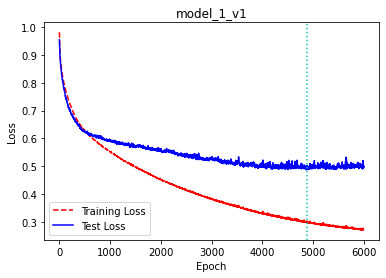

In [25]:
learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_1_v1'
model_l_v_e_filename = 'loss_vs_epochs_images/model_1_v1_le.png'
model_l_v_e_title = 'model_1_v1'
model_history_filename = 'history/history_model_1_v1'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 6000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [35]:
best_m1_v1 = load_model(model_filename)
evaluate_model(best_m1_v1, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8031

Test accuracy: 80.3%, test loss: 0.495241


In [14]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m1_v1.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    Even though we got the same test accuracy, we get an improvement test loss from 0.510767 to 0.495241
    This means that a lower learning rate was better. Now we will try an even lower learning rate:
   ##### MODEL 1: V2: learning_rate = 0.001

In [38]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/6000

Epoch 1: val_loss improved from inf to 0.49920, saving model to models\model_1_v2
INFO:tensorflow:Assets written to: models\model_1_v2\assets
13/13 - 1s - loss: 0.2701 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8187 - 698ms/epoch - 54ms/step
Epoch 2/6000

Epoch 2: val_loss improved from 0.49920 to 0.49871, saving model to models\model_1_v2
INFO:tensorflow:Assets written to: models\model_1_v2\assets
13/13 - 0s - loss: 0.2703 - accuracy: 0.8936 - val_loss: 0.4987 - val_accuracy: 0.8135 - 296ms/epoch - 23ms/step
Epoch 3/6000

Epoch 3: val_loss improved from 0.49871 to 0.49798, saving model to models\model_1_v2
INFO:tensorflow:Assets written to: models\model_1_v2\assets
13/13 - 0s - loss: 0.2700 - accuracy: 0.8936 - val_loss: 0.4980 - val_accuracy: 0.8135 - 288ms/epoch - 22ms/step
Epoch 4/6000

Epoch 4: val_loss improved from 0.49798 to 0.49746, saving model to models\model_1_v2
INFO:tensorflow:Assets written to: models\model_1_v2\assets
13/13 - 0s - loss: 0.2701

Epoch 43/6000

Epoch 43: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2699 - accuracy: 0.8936 - val_loss: 0.4970 - val_accuracy: 0.8187 - 35ms/epoch - 3ms/step
Epoch 44/6000

Epoch 44: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2700 - accuracy: 0.8936 - val_loss: 0.4968 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 45/6000

Epoch 45: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2700 - accuracy: 0.8936 - val_loss: 0.4969 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 46/6000

Epoch 46: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2699 - accuracy: 0.8936 - val_loss: 0.4978 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 47/6000

Epoch 47: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2703 - accuracy: 0.8923 - val_loss: 0.4976 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 48/6000

Epoch 48: val_loss did not improve from 0.49533
13/13 - 0s - loss: 0.2700 - accuracy: 0.8923 - val_loss: 0.4978 - v

Epoch 89/6000

Epoch 89: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2700 - accuracy: 0.8936 - val_loss: 0.4991 - val_accuracy: 0.8187 - 50ms/epoch - 4ms/step
Epoch 90/6000

Epoch 90: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2700 - accuracy: 0.8936 - val_loss: 0.4987 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 91/6000

Epoch 91: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2698 - accuracy: 0.8936 - val_loss: 0.4979 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 92/6000

Epoch 92: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2697 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8031 - 47ms/epoch - 4ms/step
Epoch 93/6000

Epoch 93: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2696 - accuracy: 0.8885 - val_loss: 0.4978 - val_accuracy: 0.8031 - 48ms/epoch - 4ms/step
Epoch 94/6000

Epoch 94: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2695 - accuracy: 0.8911 - val_loss: 0.4981 - v

Epoch 136/6000

Epoch 136: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2695 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 137/6000

Epoch 137: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2695 - accuracy: 0.8885 - val_loss: 0.4978 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 138/6000

Epoch 138: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2695 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 139/6000

Epoch 139: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2693 - accuracy: 0.8936 - val_loss: 0.4977 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 140/6000

Epoch 140: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2694 - accuracy: 0.8911 - val_loss: 0.4977 - val_accuracy: 0.8083 - 34ms/epoch - 3ms/step
Epoch 141/6000

Epoch 141: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2694 - accuracy: 0.8911 - val_loss

Epoch 183/6000

Epoch 183: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8923 - val_loss: 0.4972 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 184/6000

Epoch 184: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2693 - accuracy: 0.8936 - val_loss: 0.4974 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step
Epoch 185/6000

Epoch 185: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2692 - accuracy: 0.8936 - val_loss: 0.4984 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step
Epoch 186/6000

Epoch 186: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2695 - accuracy: 0.8936 - val_loss: 0.4983 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step
Epoch 187/6000

Epoch 187: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8936 - val_loss: 0.4986 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step
Epoch 188/6000

Epoch 188: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2692 - accuracy: 0.8936 - val_loss

Epoch 230/6000

Epoch 230: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8936 - val_loss: 0.4996 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 231/6000

Epoch 231: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8936 - val_loss: 0.4998 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 232/6000

Epoch 232: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8923 - val_loss: 0.4995 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 233/6000

Epoch 233: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2689 - accuracy: 0.8936 - val_loss: 0.4985 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 234/6000

Epoch 234: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8936 - val_loss: 0.4988 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 235/6000

Epoch 235: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8911 - val_loss

Epoch 277/6000

Epoch 277: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2690 - accuracy: 0.8936 - val_loss: 0.4987 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 278/6000

Epoch 278: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2688 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 279/6000

Epoch 279: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2693 - accuracy: 0.8898 - val_loss: 0.4991 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 280/6000

Epoch 280: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2691 - accuracy: 0.8898 - val_loss: 0.4984 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 281/6000

Epoch 281: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2688 - accuracy: 0.8936 - val_loss: 0.4985 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 282/6000

Epoch 282: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2687 - accuracy: 0.8936 - val_loss

Epoch 324/6000

Epoch 324: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2687 - accuracy: 0.8936 - val_loss: 0.4981 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 325/6000

Epoch 325: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2686 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 326/6000

Epoch 326: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2688 - accuracy: 0.8923 - val_loss: 0.4978 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 327/6000

Epoch 327: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2686 - accuracy: 0.8936 - val_loss: 0.4973 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 328/6000

Epoch 328: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2688 - accuracy: 0.8936 - val_loss: 0.4982 - val_accuracy: 0.7927 - 35ms/epoch - 3ms/step
Epoch 329/6000

Epoch 329: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2697 - accuracy: 0.8885 - val_loss

Epoch 371/6000

Epoch 371: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2684 - accuracy: 0.8936 - val_loss: 0.5004 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 372/6000

Epoch 372: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2687 - accuracy: 0.8936 - val_loss: 0.5001 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 373/6000

Epoch 373: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2685 - accuracy: 0.8936 - val_loss: 0.5004 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 374/6000

Epoch 374: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2684 - accuracy: 0.8923 - val_loss: 0.4988 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 375/6000

Epoch 375: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2687 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 376/6000

Epoch 376: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2686 - accuracy: 0.8936 - val_loss

Epoch 418/6000

Epoch 418: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2685 - accuracy: 0.8923 - val_loss: 0.4973 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 419/6000

Epoch 419: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2683 - accuracy: 0.8911 - val_loss: 0.4968 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 420/6000

Epoch 420: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2686 - accuracy: 0.8923 - val_loss: 0.4971 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 421/6000

Epoch 421: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2685 - accuracy: 0.8923 - val_loss: 0.4982 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 422/6000

Epoch 422: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2685 - accuracy: 0.8936 - val_loss: 0.4981 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 423/6000

Epoch 423: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2684 - accuracy: 0.8936 - val_loss

Epoch 465/6000

Epoch 465: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.4970 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 466/6000

Epoch 466: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.4977 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 467/6000

Epoch 467: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2682 - accuracy: 0.8936 - val_loss: 0.4976 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 468/6000

Epoch 468: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2682 - accuracy: 0.8936 - val_loss: 0.4969 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 469/6000

Epoch 469: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2682 - accuracy: 0.8936 - val_loss: 0.4969 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 470/6000

Epoch 470: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2684 - accuracy: 0.8923 - val_loss

Epoch 512/6000

Epoch 512: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2682 - accuracy: 0.8936 - val_loss: 0.4991 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 513/6000

Epoch 513: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2683 - accuracy: 0.8936 - val_loss: 0.4988 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 514/6000

Epoch 514: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 515/6000

Epoch 515: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 516/6000

Epoch 516: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.4994 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 517/6000

Epoch 517: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss

Epoch 559/6000

Epoch 559: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2679 - accuracy: 0.8936 - val_loss: 0.4995 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 560/6000

Epoch 560: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2677 - accuracy: 0.8936 - val_loss: 0.5000 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 561/6000

Epoch 561: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.4998 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 562/6000

Epoch 562: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2679 - accuracy: 0.8936 - val_loss: 0.5008 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 563/6000

Epoch 563: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.5007 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 564/6000

Epoch 564: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2679 - accuracy: 0.8936 - val_loss

Epoch 606/6000

Epoch 606: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss: 0.4977 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 607/6000

Epoch 607: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2676 - accuracy: 0.8936 - val_loss: 0.4979 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 608/6000

Epoch 608: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss: 0.4982 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 609/6000

Epoch 609: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2676 - accuracy: 0.8936 - val_loss: 0.4982 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 610/6000

Epoch 610: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2675 - accuracy: 0.8936 - val_loss: 0.4981 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 611/6000

Epoch 611: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2677 - accuracy: 0.8911 - val_loss

Epoch 653/6000

Epoch 653: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2675 - accuracy: 0.8936 - val_loss: 0.4978 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 654/6000

Epoch 654: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2673 - accuracy: 0.8936 - val_loss: 0.4973 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 655/6000

Epoch 655: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2675 - accuracy: 0.8936 - val_loss: 0.4974 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 656/6000

Epoch 656: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss: 0.4987 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 657/6000

Epoch 657: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2675 - accuracy: 0.8936 - val_loss: 0.4985 - val_accuracy: 0.8187 - 47ms/epoch - 4ms/step
Epoch 658/6000

Epoch 658: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss

Epoch 700/6000

Epoch 700: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2672 - accuracy: 0.8936 - val_loss: 0.4991 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 701/6000

Epoch 701: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss: 0.5009 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 702/6000

Epoch 702: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.5013 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 703/6000

Epoch 703: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.5011 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 704/6000

Epoch 704: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.4998 - val_accuracy: 0.8187 - 43ms/epoch - 3ms/step
Epoch 705/6000

Epoch 705: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2676 - accuracy: 0.8936 - val_loss

Epoch 747/6000

Epoch 747: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2683 - accuracy: 0.8936 - val_loss: 0.5000 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 748/6000

Epoch 748: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2674 - accuracy: 0.8936 - val_loss: 0.5014 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 749/6000

Epoch 749: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2679 - accuracy: 0.8936 - val_loss: 0.5005 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 750/6000

Epoch 750: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2676 - accuracy: 0.8936 - val_loss: 0.4994 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 751/6000

Epoch 751: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2672 - accuracy: 0.8936 - val_loss: 0.4990 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 752/6000

Epoch 752: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2671 - accuracy: 0.8936 - val_loss

Epoch 794/6000

Epoch 794: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2671 - accuracy: 0.8936 - val_loss: 0.4987 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 795/6000

Epoch 795: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2670 - accuracy: 0.8936 - val_loss: 0.4983 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 796/6000

Epoch 796: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2669 - accuracy: 0.8936 - val_loss: 0.4982 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 797/6000

Epoch 797: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2669 - accuracy: 0.8936 - val_loss: 0.4969 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 798/6000

Epoch 798: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2669 - accuracy: 0.8936 - val_loss: 0.4974 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 799/6000

Epoch 799: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2670 - accuracy: 0.8923 - val_loss

Epoch 841/6000

Epoch 841: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2671 - accuracy: 0.8923 - val_loss: 0.4964 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 842/6000

Epoch 842: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2671 - accuracy: 0.8936 - val_loss: 0.4969 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 843/6000

Epoch 843: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2668 - accuracy: 0.8936 - val_loss: 0.4965 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 844/6000

Epoch 844: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2668 - accuracy: 0.8936 - val_loss: 0.4967 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 845/6000

Epoch 845: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2668 - accuracy: 0.8923 - val_loss: 0.4971 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 846/6000

Epoch 846: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2668 - accuracy: 0.8936 - val_loss

Epoch 888/6000

Epoch 888: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2667 - accuracy: 0.8923 - val_loss: 0.4994 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 889/6000

Epoch 889: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2667 - accuracy: 0.8936 - val_loss: 0.4993 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 890/6000

Epoch 890: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2666 - accuracy: 0.8936 - val_loss: 0.4996 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 891/6000

Epoch 891: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2665 - accuracy: 0.8936 - val_loss: 0.4996 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 892/6000

Epoch 892: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2666 - accuracy: 0.8936 - val_loss: 0.5001 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 893/6000

Epoch 893: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2666 - accuracy: 0.8949 - val_loss

Epoch 935/6000

Epoch 935: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2664 - accuracy: 0.8936 - val_loss: 0.4995 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 936/6000

Epoch 936: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2663 - accuracy: 0.8936 - val_loss: 0.4996 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 937/6000

Epoch 937: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2664 - accuracy: 0.8936 - val_loss: 0.5001 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 938/6000

Epoch 938: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2665 - accuracy: 0.8936 - val_loss: 0.5000 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 939/6000

Epoch 939: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2663 - accuracy: 0.8936 - val_loss: 0.5007 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 940/6000

Epoch 940: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2664 - accuracy: 0.8936 - val_loss

Epoch 982/6000

Epoch 982: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2670 - accuracy: 0.8936 - val_loss: 0.5024 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 983/6000

Epoch 983: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2668 - accuracy: 0.8936 - val_loss: 0.5031 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 984/6000

Epoch 984: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2669 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 985/6000

Epoch 985: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2667 - accuracy: 0.8923 - val_loss: 0.5015 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 986/6000

Epoch 986: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2664 - accuracy: 0.8936 - val_loss: 0.5013 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 987/6000

Epoch 987: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2663 - accuracy: 0.8936 - val_loss

13/13 - 0s - loss: 0.2664 - accuracy: 0.8911 - val_loss: 0.4988 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 1029/6000

Epoch 1029: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2662 - accuracy: 0.8936 - val_loss: 0.4984 - val_accuracy: 0.7927 - 39ms/epoch - 3ms/step
Epoch 1030/6000

Epoch 1030: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2663 - accuracy: 0.8923 - val_loss: 0.4984 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 1031/6000

Epoch 1031: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2661 - accuracy: 0.8911 - val_loss: 0.4986 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 1032/6000

Epoch 1032: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2660 - accuracy: 0.8923 - val_loss: 0.4986 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 1033/6000

Epoch 1033: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2660 - accuracy: 0.8936 - val_loss: 0.4990 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step

Epoch 1075/6000

Epoch 1075: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2661 - accuracy: 0.8911 - val_loss: 0.5000 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step
Epoch 1076/6000

Epoch 1076: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2659 - accuracy: 0.8936 - val_loss: 0.5011 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 1077/6000

Epoch 1077: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2658 - accuracy: 0.8936 - val_loss: 0.5010 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 1078/6000

Epoch 1078: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2659 - accuracy: 0.8949 - val_loss: 0.5015 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 1079/6000

Epoch 1079: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2660 - accuracy: 0.8936 - val_loss: 0.5013 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 1080/6000

Epoch 1080: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2660 - accuracy: 0.892


Epoch 1121: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2658 - accuracy: 0.8936 - val_loss: 0.5010 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 1122/6000

Epoch 1122: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2658 - accuracy: 0.8936 - val_loss: 0.5008 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 1123/6000

Epoch 1123: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2657 - accuracy: 0.8936 - val_loss: 0.5007 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1124/6000

Epoch 1124: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2656 - accuracy: 0.8936 - val_loss: 0.5023 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 1125/6000

Epoch 1125: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2661 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1126/6000

Epoch 1126: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2659 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2654 - accuracy: 0.8923 - val_loss: 0.5023 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 1168/6000

Epoch 1168: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2655 - accuracy: 0.8949 - val_loss: 0.5021 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 1169/6000

Epoch 1169: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2654 - accuracy: 0.8936 - val_loss: 0.5021 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 1170/6000

Epoch 1170: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2655 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 1171/6000

Epoch 1171: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2655 - accuracy: 0.8911 - val_loss: 0.5011 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 1172/6000

Epoch 1172: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2654 - accuracy: 0.8936 - val_loss: 0.5023 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step

Epoch 1214/6000

Epoch 1214: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2653 - accuracy: 0.8923 - val_loss: 0.5023 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1215/6000

Epoch 1215: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2654 - accuracy: 0.8936 - val_loss: 0.5022 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1216/6000

Epoch 1216: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2653 - accuracy: 0.8936 - val_loss: 0.5020 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1217/6000

Epoch 1217: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2652 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1218/6000

Epoch 1218: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2659 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1219/6000

Epoch 1219: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2656 - accuracy: 0.893


Epoch 1260: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2649 - accuracy: 0.8923 - val_loss: 0.4993 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 1261/6000

Epoch 1261: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2652 - accuracy: 0.8936 - val_loss: 0.4992 - val_accuracy: 0.8187 - 47ms/epoch - 4ms/step
Epoch 1262/6000

Epoch 1262: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2650 - accuracy: 0.8962 - val_loss: 0.4992 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 1263/6000

Epoch 1263: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2650 - accuracy: 0.8936 - val_loss: 0.4999 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 1264/6000

Epoch 1264: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2653 - accuracy: 0.8936 - val_loss: 0.4997 - val_accuracy: 0.8187 - 36ms/epoch - 3ms/step
Epoch 1265/6000

Epoch 1265: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2651 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2649 - accuracy: 0.8949 - val_loss: 0.5006 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1307/6000

Epoch 1307: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2648 - accuracy: 0.8936 - val_loss: 0.5019 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 1308/6000

Epoch 1308: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2651 - accuracy: 0.8936 - val_loss: 0.5010 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 1309/6000

Epoch 1309: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2652 - accuracy: 0.8936 - val_loss: 0.5008 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1310/6000

Epoch 1310: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2649 - accuracy: 0.8936 - val_loss: 0.5008 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1311/6000

Epoch 1311: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2648 - accuracy: 0.8936 - val_loss: 0.5009 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step

Epoch 1353/6000

Epoch 1353: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2647 - accuracy: 0.8936 - val_loss: 0.4995 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 1354/6000

Epoch 1354: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2648 - accuracy: 0.8936 - val_loss: 0.4990 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step
Epoch 1355/6000

Epoch 1355: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.8923 - val_loss: 0.4991 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1356/6000

Epoch 1356: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.8936 - val_loss: 0.4989 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1357/6000

Epoch 1357: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2647 - accuracy: 0.8936 - val_loss: 0.4981 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 1358/6000

Epoch 1358: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.893


Epoch 1399: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2644 - accuracy: 0.8936 - val_loss: 0.5002 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 1400/6000

Epoch 1400: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2645 - accuracy: 0.8936 - val_loss: 0.4999 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 1401/6000

Epoch 1401: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2643 - accuracy: 0.8923 - val_loss: 0.4987 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1402/6000

Epoch 1402: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.8936 - val_loss: 0.4986 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 1403/6000

Epoch 1403: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2644 - accuracy: 0.8936 - val_loss: 0.4980 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 1404/6000

Epoch 1404: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2647 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2645 - accuracy: 0.8936 - val_loss: 0.4989 - val_accuracy: 0.8083 - 65ms/epoch - 5ms/step
Epoch 1446/6000

Epoch 1446: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2644 - accuracy: 0.8936 - val_loss: 0.4985 - val_accuracy: 0.8083 - 54ms/epoch - 4ms/step
Epoch 1447/6000

Epoch 1447: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.8936 - val_loss: 0.4990 - val_accuracy: 0.8187 - 50ms/epoch - 4ms/step
Epoch 1448/6000

Epoch 1448: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2643 - accuracy: 0.8911 - val_loss: 0.4993 - val_accuracy: 0.8031 - 50ms/epoch - 4ms/step
Epoch 1449/6000

Epoch 1449: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2645 - accuracy: 0.8936 - val_loss: 0.4993 - val_accuracy: 0.8031 - 49ms/epoch - 4ms/step
Epoch 1450/6000

Epoch 1450: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2646 - accuracy: 0.8936 - val_loss: 0.4991 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step

Epoch 1492/6000

Epoch 1492: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2641 - accuracy: 0.8936 - val_loss: 0.5028 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 1493/6000

Epoch 1493: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2642 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 1494/6000

Epoch 1494: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2642 - accuracy: 0.8936 - val_loss: 0.5020 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 1495/6000

Epoch 1495: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2642 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 1496/6000

Epoch 1496: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2641 - accuracy: 0.8936 - val_loss: 0.5017 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 1497/6000

Epoch 1497: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2641 - accuracy: 0.893


Epoch 1538: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5012 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 1539/6000

Epoch 1539: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step
Epoch 1540/6000

Epoch 1540: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2641 - accuracy: 0.8936 - val_loss: 0.5023 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 1541/6000

Epoch 1541: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5024 - val_accuracy: 0.8135 - 53ms/epoch - 4ms/step
Epoch 1542/6000

Epoch 1542: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2639 - accuracy: 0.8936 - val_loss: 0.5032 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 1543/6000

Epoch 1543: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2640 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2638 - accuracy: 0.8885 - val_loss: 0.5017 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 1585/6000

Epoch 1585: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 1586/6000

Epoch 1586: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 1587/6000

Epoch 1587: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.8923 - val_loss: 0.5020 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 1588/6000

Epoch 1588: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 1589/6000

Epoch 1589: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5024 - val_accuracy: 0.8135 - 63ms/epoch - 5ms/step

Epoch 1631/6000

Epoch 1631: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8031 - 29ms/epoch - 2ms/step
Epoch 1632/6000

Epoch 1632: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2639 - accuracy: 0.8936 - val_loss: 0.5016 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 1633/6000

Epoch 1633: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2640 - accuracy: 0.8936 - val_loss: 0.5016 - val_accuracy: 0.8031 - 47ms/epoch - 4ms/step
Epoch 1634/6000

Epoch 1634: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8936 - val_loss: 0.5018 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step
Epoch 1635/6000

Epoch 1635: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.8936 - val_loss: 0.5021 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 1636/6000

Epoch 1636: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.893


Epoch 1677: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8936 - val_loss: 0.5029 - val_accuracy: 0.8031 - 45ms/epoch - 3ms/step
Epoch 1678/6000

Epoch 1678: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2638 - accuracy: 0.8923 - val_loss: 0.5021 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 1679/6000

Epoch 1679: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2633 - accuracy: 0.8936 - val_loss: 0.5022 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 1680/6000

Epoch 1680: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 1681/6000

Epoch 1681: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8936 - val_loss: 0.5028 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1682/6000

Epoch 1682: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2635 - accuracy: 0.8936 - val_loss: 0.5007 - val_accuracy: 0.7979 - 36ms/epoch - 3ms/step
Epoch 1724/6000

Epoch 1724: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8923 - val_loss: 0.5007 - val_accuracy: 0.7979 - 36ms/epoch - 3ms/step
Epoch 1725/6000

Epoch 1725: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2637 - accuracy: 0.8923 - val_loss: 0.5008 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 1726/6000

Epoch 1726: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2634 - accuracy: 0.8911 - val_loss: 0.5009 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 1727/6000

Epoch 1727: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2633 - accuracy: 0.8923 - val_loss: 0.5013 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 1728/6000

Epoch 1728: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2631 - accuracy: 0.8949 - val_loss: 0.5022 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step

Epoch 1770/6000

Epoch 1770: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2632 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.7927 - 47ms/epoch - 4ms/step
Epoch 1771/6000

Epoch 1771: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2635 - accuracy: 0.8911 - val_loss: 0.5040 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 1772/6000

Epoch 1772: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2632 - accuracy: 0.8923 - val_loss: 0.5040 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step
Epoch 1773/6000

Epoch 1773: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2631 - accuracy: 0.8936 - val_loss: 0.5045 - val_accuracy: 0.7979 - 43ms/epoch - 3ms/step
Epoch 1774/6000

Epoch 1774: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2632 - accuracy: 0.8949 - val_loss: 0.5053 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 1775/6000

Epoch 1775: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2631 - accuracy: 0.893


Epoch 1816: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 1817/6000

Epoch 1817: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 1818/6000

Epoch 1818: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2628 - accuracy: 0.8936 - val_loss: 0.5028 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 1819/6000

Epoch 1819: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8936 - val_loss: 0.5030 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 1820/6000

Epoch 1820: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2630 - accuracy: 0.8911 - val_loss: 0.5040 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 1821/6000

Epoch 1821: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2628 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2628 - accuracy: 0.8936 - val_loss: 0.5009 - val_accuracy: 0.7979 - 41ms/epoch - 3ms/step
Epoch 1863/6000

Epoch 1863: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8898 - val_loss: 0.5009 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 1864/6000

Epoch 1864: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8833 - val_loss: 0.5009 - val_accuracy: 0.7979 - 42ms/epoch - 3ms/step
Epoch 1865/6000

Epoch 1865: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8923 - val_loss: 0.5010 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step
Epoch 1866/6000

Epoch 1866: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2628 - accuracy: 0.8936 - val_loss: 0.5020 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 1867/6000

Epoch 1867: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2628 - accuracy: 0.8936 - val_loss: 0.5030 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step

Epoch 1909/6000

Epoch 1909: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2630 - accuracy: 0.8911 - val_loss: 0.5013 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 1910/6000

Epoch 1910: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8923 - val_loss: 0.5014 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 1911/6000

Epoch 1911: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2626 - accuracy: 0.8911 - val_loss: 0.5015 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 1912/6000

Epoch 1912: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2627 - accuracy: 0.8911 - val_loss: 0.5017 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 1913/6000

Epoch 1913: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2627 - accuracy: 0.8923 - val_loss: 0.5020 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 1914/6000

Epoch 1914: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2626 - accuracy: 0.894


Epoch 1955: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2624 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 1956/6000

Epoch 1956: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2625 - accuracy: 0.8923 - val_loss: 0.5031 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 1957/6000

Epoch 1957: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2626 - accuracy: 0.8936 - val_loss: 0.5029 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 1958/6000

Epoch 1958: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2625 - accuracy: 0.8936 - val_loss: 0.5029 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 1959/6000

Epoch 1959: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2624 - accuracy: 0.8936 - val_loss: 0.5021 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step
Epoch 1960/6000

Epoch 1960: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2624 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2625 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.7927 - 37ms/epoch - 3ms/step
Epoch 2002/6000

Epoch 2002: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2629 - accuracy: 0.8911 - val_loss: 0.5027 - val_accuracy: 0.7979 - 37ms/epoch - 3ms/step
Epoch 2003/6000

Epoch 2003: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2625 - accuracy: 0.8936 - val_loss: 0.5028 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 2004/6000

Epoch 2004: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2622 - accuracy: 0.8936 - val_loss: 0.5027 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2005/6000

Epoch 2005: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2623 - accuracy: 0.8923 - val_loss: 0.5027 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2006/6000

Epoch 2006: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2623 - accuracy: 0.8936 - val_loss: 0.5038 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step

Epoch 2048/6000

Epoch 2048: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2622 - accuracy: 0.8936 - val_loss: 0.5038 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 2049/6000

Epoch 2049: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2623 - accuracy: 0.8936 - val_loss: 0.5036 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 2050/6000

Epoch 2050: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2623 - accuracy: 0.8936 - val_loss: 0.5032 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 2051/6000

Epoch 2051: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2621 - accuracy: 0.8923 - val_loss: 0.5029 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 2052/6000

Epoch 2052: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2621 - accuracy: 0.8936 - val_loss: 0.5033 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2053/6000

Epoch 2053: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2621 - accuracy: 0.892


Epoch 2094: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2622 - accuracy: 0.8936 - val_loss: 0.5028 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 2095/6000

Epoch 2095: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2622 - accuracy: 0.8911 - val_loss: 0.5035 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 2096/6000

Epoch 2096: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2620 - accuracy: 0.8936 - val_loss: 0.5030 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2097/6000

Epoch 2097: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2620 - accuracy: 0.8923 - val_loss: 0.5037 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 2098/6000

Epoch 2098: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2620 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2099/6000

Epoch 2099: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2620 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2619 - accuracy: 0.8936 - val_loss: 0.5040 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 2141/6000

Epoch 2141: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8936 - val_loss: 0.5031 - val_accuracy: 0.8187 - 43ms/epoch - 3ms/step
Epoch 2142/6000

Epoch 2142: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2619 - accuracy: 0.8936 - val_loss: 0.5025 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 2143/6000

Epoch 2143: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8936 - val_loss: 0.5024 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 2144/6000

Epoch 2144: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8936 - val_loss: 0.5024 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 2145/6000

Epoch 2145: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8936 - val_loss: 0.5014 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step

Epoch 2187/6000

Epoch 2187: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2621 - accuracy: 0.8936 - val_loss: 0.5041 - val_accuracy: 0.8031 - 34ms/epoch - 3ms/step
Epoch 2188/6000

Epoch 2188: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8923 - val_loss: 0.5040 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 2189/6000

Epoch 2189: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2617 - accuracy: 0.8936 - val_loss: 0.5039 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 2190/6000

Epoch 2190: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2617 - accuracy: 0.8975 - val_loss: 0.5039 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 2191/6000

Epoch 2191: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2616 - accuracy: 0.8923 - val_loss: 0.5041 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2192/6000

Epoch 2192: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2616 - accuracy: 0.893


Epoch 2233: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2615 - accuracy: 0.8898 - val_loss: 0.5038 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 2234/6000

Epoch 2234: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2615 - accuracy: 0.8911 - val_loss: 0.5038 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 2235/6000

Epoch 2235: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.5047 - val_accuracy: 0.8031 - 46ms/epoch - 4ms/step
Epoch 2236/6000

Epoch 2236: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2618 - accuracy: 0.8936 - val_loss: 0.5050 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2237/6000

Epoch 2237: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.5049 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2238/6000

Epoch 2238: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 2280/6000

Epoch 2280: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2613 - accuracy: 0.8936 - val_loss: 0.5052 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2281/6000

Epoch 2281: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2613 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 2282/6000

Epoch 2282: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.5050 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 2283/6000

Epoch 2283: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2613 - accuracy: 0.8936 - val_loss: 0.5045 - val_accuracy: 0.7979 - 37ms/epoch - 3ms/step
Epoch 2284/6000

Epoch 2284: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2614 - accuracy: 0.8936 - val_loss: 0.5045 - val_accuracy: 0.8135 - 35ms/epoch - 3ms/step

Epoch 2326/6000

Epoch 2326: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2612 - accuracy: 0.8923 - val_loss: 0.5039 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 2327/6000

Epoch 2327: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2613 - accuracy: 0.8936 - val_loss: 0.5039 - val_accuracy: 0.7979 - 40ms/epoch - 3ms/step
Epoch 2328/6000

Epoch 2328: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2612 - accuracy: 0.8923 - val_loss: 0.5040 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2329/6000

Epoch 2329: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2612 - accuracy: 0.8936 - val_loss: 0.5050 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 2330/6000

Epoch 2330: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2613 - accuracy: 0.8936 - val_loss: 0.5050 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2331/6000

Epoch 2331: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2611 - accuracy: 0.893


Epoch 2372: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2612 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2373/6000

Epoch 2373: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2611 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 2374/6000

Epoch 2374: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2610 - accuracy: 0.8923 - val_loss: 0.5053 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 2375/6000

Epoch 2375: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2611 - accuracy: 0.8936 - val_loss: 0.5047 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 2376/6000

Epoch 2376: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2610 - accuracy: 0.8923 - val_loss: 0.5048 - val_accuracy: 0.8187 - 34ms/epoch - 3ms/step
Epoch 2377/6000

Epoch 2377: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2611 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2609 - accuracy: 0.8936 - val_loss: 0.5057 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 2419/6000

Epoch 2419: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2609 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 2420/6000

Epoch 2420: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2608 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8031 - 48ms/epoch - 4ms/step
Epoch 2421/6000

Epoch 2421: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2608 - accuracy: 0.8936 - val_loss: 0.5050 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 2422/6000

Epoch 2422: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2610 - accuracy: 0.8936 - val_loss: 0.5052 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 2423/6000

Epoch 2423: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2609 - accuracy: 0.8936 - val_loss: 0.5049 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step

Epoch 2465/6000

Epoch 2465: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2607 - accuracy: 0.8936 - val_loss: 0.5047 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2466/6000

Epoch 2466: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2607 - accuracy: 0.8923 - val_loss: 0.5054 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2467/6000

Epoch 2467: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2606 - accuracy: 0.8923 - val_loss: 0.5056 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2468/6000

Epoch 2468: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2607 - accuracy: 0.8936 - val_loss: 0.5061 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 2469/6000

Epoch 2469: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2607 - accuracy: 0.8936 - val_loss: 0.5063 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 2470/6000

Epoch 2470: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2608 - accuracy: 0.893


Epoch 2511: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2605 - accuracy: 0.8936 - val_loss: 0.5056 - val_accuracy: 0.8031 - 53ms/epoch - 4ms/step
Epoch 2512/6000

Epoch 2512: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2605 - accuracy: 0.8949 - val_loss: 0.5054 - val_accuracy: 0.8031 - 50ms/epoch - 4ms/step
Epoch 2513/6000

Epoch 2513: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2514/6000

Epoch 2514: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5057 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 2515/6000

Epoch 2515: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5063 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 2516/6000

Epoch 2516: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2606 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2606 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8031 - 44ms/epoch - 3ms/step
Epoch 2558/6000

Epoch 2558: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2605 - accuracy: 0.8936 - val_loss: 0.5054 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 2559/6000

Epoch 2559: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5069 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 2560/6000

Epoch 2560: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2605 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step
Epoch 2561/6000

Epoch 2561: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2605 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 2562/6000

Epoch 2562: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8187 - 41ms/epoch - 3ms/step

Epoch 2604/6000

Epoch 2604: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2603 - accuracy: 0.8949 - val_loss: 0.5071 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 2605/6000

Epoch 2605: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5062 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 2606/6000

Epoch 2606: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 2607/6000

Epoch 2607: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2610 - accuracy: 0.8949 - val_loss: 0.5059 - val_accuracy: 0.8031 - 48ms/epoch - 4ms/step
Epoch 2608/6000

Epoch 2608: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2607 - accuracy: 0.8936 - val_loss: 0.5058 - val_accuracy: 0.8031 - 47ms/epoch - 4ms/step
Epoch 2609/6000

Epoch 2609: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2606 - accuracy: 0.893


Epoch 2650: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.5054 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2651/6000

Epoch 2651: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2602 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 2652/6000

Epoch 2652: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.5052 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 2653/6000

Epoch 2653: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.5040 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2654/6000

Epoch 2654: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.5032 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 2655/6000

Epoch 2655: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8911 - val_loss: 0.

13/13 - 0s - loss: 0.2607 - accuracy: 0.8975 - val_loss: 0.5035 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 2697/6000

Epoch 2697: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2603 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 2698/6000

Epoch 2698: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8923 - val_loss: 0.5036 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2699/6000

Epoch 2699: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2600 - accuracy: 0.8936 - val_loss: 0.5033 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 2700/6000

Epoch 2700: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2599 - accuracy: 0.8936 - val_loss: 0.5036 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 2701/6000

Epoch 2701: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.5037 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step

Epoch 2743/6000

Epoch 2743: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2600 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 2744/6000

Epoch 2744: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2598 - accuracy: 0.8949 - val_loss: 0.5054 - val_accuracy: 0.8031 - 46ms/epoch - 4ms/step
Epoch 2745/6000

Epoch 2745: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2599 - accuracy: 0.8936 - val_loss: 0.5058 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 2746/6000

Epoch 2746: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2599 - accuracy: 0.8936 - val_loss: 0.5063 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 2747/6000

Epoch 2747: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2600 - accuracy: 0.8936 - val_loss: 0.5064 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 2748/6000

Epoch 2748: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2599 - accuracy: 0.892


Epoch 2789: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2600 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.7979 - 39ms/epoch - 3ms/step
Epoch 2790/6000

Epoch 2790: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2598 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.7979 - 38ms/epoch - 3ms/step
Epoch 2791/6000

Epoch 2791: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2597 - accuracy: 0.8911 - val_loss: 0.5051 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2792/6000

Epoch 2792: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2597 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 2793/6000

Epoch 2793: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8936 - val_loss: 0.5061 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 2794/6000

Epoch 2794: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2600 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2596 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2836/6000

Epoch 2836: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2595 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 2837/6000

Epoch 2837: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 2838/6000

Epoch 2838: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2597 - accuracy: 0.8949 - val_loss: 0.5056 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 2839/6000

Epoch 2839: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8911 - val_loss: 0.5058 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 2840/6000

Epoch 2840: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2595 - accuracy: 0.8936 - val_loss: 0.5058 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step

Epoch 2882/6000

Epoch 2882: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2598 - accuracy: 0.8923 - val_loss: 0.5069 - val_accuracy: 0.8187 - 51ms/epoch - 4ms/step
Epoch 2883/6000

Epoch 2883: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8911 - val_loss: 0.5066 - val_accuracy: 0.8083 - 52ms/epoch - 4ms/step
Epoch 2884/6000

Epoch 2884: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8936 - val_loss: 0.5069 - val_accuracy: 0.8187 - 52ms/epoch - 4ms/step
Epoch 2885/6000

Epoch 2885: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2597 - accuracy: 0.8911 - val_loss: 0.5066 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 2886/6000

Epoch 2886: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8911 - val_loss: 0.5055 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 2887/6000

Epoch 2887: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2595 - accuracy: 0.893


Epoch 2928: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2593 - accuracy: 0.8936 - val_loss: 0.5067 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2929/6000

Epoch 2929: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2592 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 2930/6000

Epoch 2930: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2592 - accuracy: 0.8923 - val_loss: 0.5066 - val_accuracy: 0.8135 - 55ms/epoch - 4ms/step
Epoch 2931/6000

Epoch 2931: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2593 - accuracy: 0.8923 - val_loss: 0.5064 - val_accuracy: 0.8135 - 55ms/epoch - 4ms/step
Epoch 2932/6000

Epoch 2932: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2593 - accuracy: 0.8936 - val_loss: 0.5060 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 2933/6000

Epoch 2933: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2592 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2591 - accuracy: 0.8936 - val_loss: 0.5074 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 2975/6000

Epoch 2975: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2593 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.7979 - 42ms/epoch - 3ms/step
Epoch 2976/6000

Epoch 2976: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2592 - accuracy: 0.8949 - val_loss: 0.5073 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 2977/6000

Epoch 2977: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2592 - accuracy: 0.8949 - val_loss: 0.5076 - val_accuracy: 0.8187 - 43ms/epoch - 3ms/step
Epoch 2978/6000

Epoch 2978: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2596 - accuracy: 0.8936 - val_loss: 0.5071 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 2979/6000

Epoch 2979: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2594 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step

Epoch 3021/6000

Epoch 3021: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2591 - accuracy: 0.8936 - val_loss: 0.5071 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 3022/6000

Epoch 3022: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2590 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.8031 - 33ms/epoch - 3ms/step
Epoch 3023/6000

Epoch 3023: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2590 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 3024/6000

Epoch 3024: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2590 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8031 - 35ms/epoch - 3ms/step
Epoch 3025/6000

Epoch 3025: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2593 - accuracy: 0.8936 - val_loss: 0.5072 - val_accuracy: 0.8031 - 45ms/epoch - 3ms/step
Epoch 3026/6000

Epoch 3026: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2589 - accuracy: 0.893


Epoch 3067: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2589 - accuracy: 0.8936 - val_loss: 0.5073 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 3068/6000

Epoch 3068: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2587 - accuracy: 0.8936 - val_loss: 0.5072 - val_accuracy: 0.8031 - 54ms/epoch - 4ms/step
Epoch 3069/6000

Epoch 3069: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8936 - val_loss: 0.5085 - val_accuracy: 0.8031 - 52ms/epoch - 4ms/step
Epoch 3070/6000

Epoch 3070: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2589 - accuracy: 0.8936 - val_loss: 0.5083 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 3071/6000

Epoch 3071: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8936 - val_loss: 0.5068 - val_accuracy: 0.8135 - 59ms/epoch - 5ms/step
Epoch 3072/6000

Epoch 3072: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2587 - accuracy: 0.8936 - val_loss: 0.5041 - val_accuracy: 0.7979 - 54ms/epoch - 4ms/step
Epoch 3114/6000

Epoch 3114: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8936 - val_loss: 0.5033 - val_accuracy: 0.8135 - 55ms/epoch - 4ms/step
Epoch 3115/6000

Epoch 3115: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2589 - accuracy: 0.8936 - val_loss: 0.5035 - val_accuracy: 0.8083 - 55ms/epoch - 4ms/step
Epoch 3116/6000

Epoch 3116: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8949 - val_loss: 0.5041 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 3117/6000

Epoch 3117: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8936 - val_loss: 0.5045 - val_accuracy: 0.8135 - 60ms/epoch - 5ms/step
Epoch 3118/6000

Epoch 3118: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2588 - accuracy: 0.8949 - val_loss: 0.5047 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step

Epoch 3160/6000

Epoch 3160: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2587 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 3161/6000

Epoch 3161: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2587 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.8031 - 48ms/epoch - 4ms/step
Epoch 3162/6000

Epoch 3162: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2585 - accuracy: 0.8936 - val_loss: 0.5052 - val_accuracy: 0.8031 - 57ms/epoch - 4ms/step
Epoch 3163/6000

Epoch 3163: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2585 - accuracy: 0.8936 - val_loss: 0.5051 - val_accuracy: 0.8031 - 51ms/epoch - 4ms/step
Epoch 3164/6000

Epoch 3164: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2585 - accuracy: 0.8923 - val_loss: 0.5048 - val_accuracy: 0.8031 - 51ms/epoch - 4ms/step
Epoch 3165/6000

Epoch 3165: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2585 - accuracy: 0.893


Epoch 3206: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5062 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 3207/6000

Epoch 3207: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2584 - accuracy: 0.8923 - val_loss: 0.5062 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 3208/6000

Epoch 3208: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8949 - val_loss: 0.5057 - val_accuracy: 0.8031 - 49ms/epoch - 4ms/step
Epoch 3209/6000

Epoch 3209: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5061 - val_accuracy: 0.8031 - 50ms/epoch - 4ms/step
Epoch 3210/6000

Epoch 3210: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5068 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 3211/6000

Epoch 3211: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5082 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 3253/6000

Epoch 3253: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2582 - accuracy: 0.8923 - val_loss: 0.5082 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 3254/6000

Epoch 3254: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5081 - val_accuracy: 0.8031 - 34ms/epoch - 3ms/step
Epoch 3255/6000

Epoch 3255: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2582 - accuracy: 0.8936 - val_loss: 0.5084 - val_accuracy: 0.8031 - 55ms/epoch - 4ms/step
Epoch 3256/6000

Epoch 3256: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2582 - accuracy: 0.8936 - val_loss: 0.5091 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 3257/6000

Epoch 3257: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2585 - accuracy: 0.8936 - val_loss: 0.5086 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step

Epoch 3299/6000

Epoch 3299: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8923 - val_loss: 0.5090 - val_accuracy: 0.8135 - 53ms/epoch - 4ms/step
Epoch 3300/6000

Epoch 3300: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5088 - val_accuracy: 0.8083 - 64ms/epoch - 5ms/step
Epoch 3301/6000

Epoch 3301: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2581 - accuracy: 0.8923 - val_loss: 0.5088 - val_accuracy: 0.8083 - 67ms/epoch - 5ms/step
Epoch 3302/6000

Epoch 3302: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2581 - accuracy: 0.8936 - val_loss: 0.5083 - val_accuracy: 0.7979 - 59ms/epoch - 5ms/step
Epoch 3303/6000

Epoch 3303: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2580 - accuracy: 0.8949 - val_loss: 0.5089 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 3304/6000

Epoch 3304: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2580 - accuracy: 0.893


Epoch 3345: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2582 - accuracy: 0.8898 - val_loss: 0.5102 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 3346/6000

Epoch 3346: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2584 - accuracy: 0.8923 - val_loss: 0.5095 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 3347/6000

Epoch 3347: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5093 - val_accuracy: 0.8187 - 35ms/epoch - 3ms/step
Epoch 3348/6000

Epoch 3348: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8936 - val_loss: 0.5090 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 3349/6000

Epoch 3349: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2582 - accuracy: 0.8911 - val_loss: 0.5079 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 3350/6000

Epoch 3350: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2580 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2579 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 3392/6000

Epoch 3392: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2579 - accuracy: 0.8936 - val_loss: 0.5047 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 3393/6000

Epoch 3393: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2580 - accuracy: 0.8898 - val_loss: 0.5048 - val_accuracy: 0.8083 - 58ms/epoch - 4ms/step
Epoch 3394/6000

Epoch 3394: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2579 - accuracy: 0.8936 - val_loss: 0.5048 - val_accuracy: 0.8083 - 60ms/epoch - 5ms/step
Epoch 3395/6000

Epoch 3395: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2579 - accuracy: 0.8923 - val_loss: 0.5047 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 3396/6000

Epoch 3396: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2579 - accuracy: 0.8949 - val_loss: 0.5048 - val_accuracy: 0.8031 - 53ms/epoch - 4ms/step

Epoch 3438/6000

Epoch 3438: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8923 - val_loss: 0.5045 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 3439/6000

Epoch 3439: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2577 - accuracy: 0.8936 - val_loss: 0.5049 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 3440/6000

Epoch 3440: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8936 - val_loss: 0.5048 - val_accuracy: 0.8031 - 45ms/epoch - 3ms/step
Epoch 3441/6000

Epoch 3441: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8936 - val_loss: 0.5048 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 3442/6000

Epoch 3442: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8923 - val_loss: 0.5046 - val_accuracy: 0.7979 - 43ms/epoch - 3ms/step
Epoch 3443/6000

Epoch 3443: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2580 - accuracy: 0.891


Epoch 3484: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8936 - val_loss: 0.5060 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 3485/6000

Epoch 3485: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2577 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8187 - 34ms/epoch - 3ms/step
Epoch 3486/6000

Epoch 3486: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2577 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.8083 - 67ms/epoch - 5ms/step
Epoch 3487/6000

Epoch 3487: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2576 - accuracy: 0.8936 - val_loss: 0.5049 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 3488/6000

Epoch 3488: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step
Epoch 3489/6000

Epoch 3489: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8911 - val_loss: 0.

13/13 - 0s - loss: 0.2576 - accuracy: 0.8936 - val_loss: 0.5078 - val_accuracy: 0.8031 - 201ms/epoch - 15ms/step
Epoch 3531/6000

Epoch 3531: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2583 - accuracy: 0.8975 - val_loss: 0.5077 - val_accuracy: 0.8031 - 69ms/epoch - 5ms/step
Epoch 3532/6000

Epoch 3532: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2581 - accuracy: 0.8962 - val_loss: 0.5073 - val_accuracy: 0.8083 - 67ms/epoch - 5ms/step
Epoch 3533/6000

Epoch 3533: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2581 - accuracy: 0.8962 - val_loss: 0.5071 - val_accuracy: 0.8083 - 54ms/epoch - 4ms/step
Epoch 3534/6000

Epoch 3534: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2578 - accuracy: 0.8936 - val_loss: 0.5068 - val_accuracy: 0.8031 - 81ms/epoch - 6ms/step
Epoch 3535/6000

Epoch 3535: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.5069 - val_accuracy: 0.8031 - 92ms/epoch - 7ms/st

Epoch 3577/6000

Epoch 3577: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2577 - accuracy: 0.8988 - val_loss: 0.5047 - val_accuracy: 0.8031 - 52ms/epoch - 4ms/step
Epoch 3578/6000

Epoch 3578: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2576 - accuracy: 0.8975 - val_loss: 0.5047 - val_accuracy: 0.8083 - 54ms/epoch - 4ms/step
Epoch 3579/6000

Epoch 3579: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2574 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8031 - 50ms/epoch - 4ms/step
Epoch 3580/6000

Epoch 3580: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8988 - val_loss: 0.5064 - val_accuracy: 0.8083 - 57ms/epoch - 4ms/step
Epoch 3581/6000

Epoch 3581: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.5060 - val_accuracy: 0.8083 - 52ms/epoch - 4ms/step
Epoch 3582/6000

Epoch 3582: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2574 - accuracy: 0.892


Epoch 3623: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2573 - accuracy: 0.8936 - val_loss: 0.5074 - val_accuracy: 0.8031 - 46ms/epoch - 4ms/step
Epoch 3624/6000

Epoch 3624: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2572 - accuracy: 0.8936 - val_loss: 0.5062 - val_accuracy: 0.8083 - 68ms/epoch - 5ms/step
Epoch 3625/6000

Epoch 3625: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2574 - accuracy: 0.8936 - val_loss: 0.5057 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 3626/6000

Epoch 3626: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.5057 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 3627/6000

Epoch 3627: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.5058 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 3628/6000

Epoch 3628: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2574 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2571 - accuracy: 0.8936 - val_loss: 0.5057 - val_accuracy: 0.8083 - 55ms/epoch - 4ms/step
Epoch 3670/6000

Epoch 3670: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2570 - accuracy: 0.8936 - val_loss: 0.5054 - val_accuracy: 0.8083 - 58ms/epoch - 4ms/step
Epoch 3671/6000

Epoch 3671: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2570 - accuracy: 0.8936 - val_loss: 0.5054 - val_accuracy: 0.8083 - 56ms/epoch - 4ms/step
Epoch 3672/6000

Epoch 3672: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2570 - accuracy: 0.8936 - val_loss: 0.5043 - val_accuracy: 0.7979 - 48ms/epoch - 4ms/step
Epoch 3673/6000

Epoch 3673: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2572 - accuracy: 0.8936 - val_loss: 0.5043 - val_accuracy: 0.7979 - 43ms/epoch - 3ms/step
Epoch 3674/6000

Epoch 3674: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2571 - accuracy: 0.8923 - val_loss: 0.5049 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step

Epoch 3716/6000

Epoch 3716: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2570 - accuracy: 0.8975 - val_loss: 0.5069 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 3717/6000

Epoch 3717: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2573 - accuracy: 0.8949 - val_loss: 0.5070 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 3718/6000

Epoch 3718: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2572 - accuracy: 0.8936 - val_loss: 0.5067 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 3719/6000

Epoch 3719: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2572 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 3720/6000

Epoch 3720: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.8949 - val_loss: 0.5080 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 3721/6000

Epoch 3721: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.893


Epoch 3762: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5071 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 3763/6000

Epoch 3763: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5075 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 3764/6000

Epoch 3764: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.8936 - val_loss: 0.5071 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 3765/6000

Epoch 3765: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5064 - val_accuracy: 0.8135 - 84ms/epoch - 6ms/step
Epoch 3766/6000

Epoch 3766: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.8988 - val_loss: 0.5063 - val_accuracy: 0.8135 - 85ms/epoch - 7ms/step
Epoch 3767/6000

Epoch 3767: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2569 - accuracy: 0.8936 - val_loss: 0.5072 - val_accuracy: 0.8238 - 41ms/epoch - 3ms/step
Epoch 3809/6000

Epoch 3809: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2570 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 3810/6000

Epoch 3810: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 3811/6000

Epoch 3811: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5061 - val_accuracy: 0.8031 - 41ms/epoch - 3ms/step
Epoch 3812/6000

Epoch 3812: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 3813/6000

Epoch 3813: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step

Epoch 3855/6000

Epoch 3855: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8962 - val_loss: 0.5067 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 3856/6000

Epoch 3856: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 3857/6000

Epoch 3857: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5054 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 3858/6000

Epoch 3858: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8949 - val_loss: 0.5064 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 3859/6000

Epoch 3859: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2569 - accuracy: 0.8936 - val_loss: 0.5062 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 3860/6000

Epoch 3860: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2568 - accuracy: 0.893


Epoch 3901: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2565 - accuracy: 0.8936 - val_loss: 0.5063 - val_accuracy: 0.8083 - 64ms/epoch - 5ms/step
Epoch 3902/6000

Epoch 3902: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2563 - accuracy: 0.8936 - val_loss: 0.5048 - val_accuracy: 0.7979 - 80ms/epoch - 6ms/step
Epoch 3903/6000

Epoch 3903: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8923 - val_loss: 0.5041 - val_accuracy: 0.8031 - 75ms/epoch - 6ms/step
Epoch 3904/6000

Epoch 3904: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8975 - val_loss: 0.5042 - val_accuracy: 0.8135 - 67ms/epoch - 5ms/step
Epoch 3905/6000

Epoch 3905: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8975 - val_loss: 0.5046 - val_accuracy: 0.8083 - 87ms/epoch - 7ms/step
Epoch 3906/6000

Epoch 3906: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8949 - val_loss: 0.

13/13 - 0s - loss: 0.2562 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 3948/6000

Epoch 3948: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2562 - accuracy: 0.8949 - val_loss: 0.5071 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 3949/6000

Epoch 3949: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2564 - accuracy: 0.8936 - val_loss: 0.5072 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 3950/6000

Epoch 3950: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2565 - accuracy: 0.8988 - val_loss: 0.5061 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 3951/6000

Epoch 3951: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2565 - accuracy: 0.8988 - val_loss: 0.5062 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 3952/6000

Epoch 3952: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2564 - accuracy: 0.8949 - val_loss: 0.5060 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step

Epoch 3994/6000

Epoch 3994: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2567 - accuracy: 0.8936 - val_loss: 0.5100 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 3995/6000

Epoch 3995: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2566 - accuracy: 0.8936 - val_loss: 0.5095 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 3996/6000

Epoch 3996: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2564 - accuracy: 0.8936 - val_loss: 0.5091 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 3997/6000

Epoch 3997: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2562 - accuracy: 0.8936 - val_loss: 0.5092 - val_accuracy: 0.8083 - 34ms/epoch - 3ms/step
Epoch 3998/6000

Epoch 3998: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2562 - accuracy: 0.8949 - val_loss: 0.5087 - val_accuracy: 0.8031 - 32ms/epoch - 2ms/step
Epoch 3999/6000

Epoch 3999: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2562 - accuracy: 0.893


Epoch 4040: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2560 - accuracy: 0.8949 - val_loss: 0.5080 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 4041/6000

Epoch 4041: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2560 - accuracy: 0.8936 - val_loss: 0.5065 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 4042/6000

Epoch 4042: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2562 - accuracy: 0.8988 - val_loss: 0.5064 - val_accuracy: 0.8083 - 52ms/epoch - 4ms/step
Epoch 4043/6000

Epoch 4043: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2564 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8083 - 56ms/epoch - 4ms/step
Epoch 4044/6000

Epoch 4044: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2563 - accuracy: 0.8988 - val_loss: 0.5079 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4045/6000

Epoch 4045: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2559 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2560 - accuracy: 0.8936 - val_loss: 0.5071 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 4087/6000

Epoch 4087: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2559 - accuracy: 0.8936 - val_loss: 0.5085 - val_accuracy: 0.8135 - 34ms/epoch - 3ms/step
Epoch 4088/6000

Epoch 4088: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2560 - accuracy: 0.8936 - val_loss: 0.5087 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 4089/6000

Epoch 4089: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2561 - accuracy: 0.8923 - val_loss: 0.5085 - val_accuracy: 0.8031 - 48ms/epoch - 4ms/step
Epoch 4090/6000

Epoch 4090: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8936 - val_loss: 0.5078 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step
Epoch 4091/6000

Epoch 4091: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2560 - accuracy: 0.8936 - val_loss: 0.5078 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step

Epoch 4133/6000

Epoch 4133: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2557 - accuracy: 0.8949 - val_loss: 0.5084 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 4134/6000

Epoch 4134: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8936 - val_loss: 0.5080 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 4135/6000

Epoch 4135: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2557 - accuracy: 0.8936 - val_loss: 0.5081 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 4136/6000

Epoch 4136: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8936 - val_loss: 0.5083 - val_accuracy: 0.7979 - 45ms/epoch - 3ms/step
Epoch 4137/6000

Epoch 4137: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2557 - accuracy: 0.8923 - val_loss: 0.5083 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 4138/6000

Epoch 4138: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2557 - accuracy: 0.893


Epoch 4179: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2559 - accuracy: 0.8936 - val_loss: 0.5079 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 4180/6000

Epoch 4180: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2559 - accuracy: 0.8936 - val_loss: 0.5079 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 4181/6000

Epoch 4181: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2556 - accuracy: 0.8923 - val_loss: 0.5072 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 4182/6000

Epoch 4182: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8936 - val_loss: 0.5074 - val_accuracy: 0.8083 - 47ms/epoch - 4ms/step
Epoch 4183/6000

Epoch 4183: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2556 - accuracy: 0.8923 - val_loss: 0.5072 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 4184/6000

Epoch 4184: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2556 - accuracy: 0.8936 - val_loss: 0.

13/13 - 0s - loss: 0.2557 - accuracy: 0.8962 - val_loss: 0.5063 - val_accuracy: 0.8135 - 49ms/epoch - 4ms/step
Epoch 4226/6000

Epoch 4226: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2554 - accuracy: 0.8988 - val_loss: 0.5063 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 4227/6000

Epoch 4227: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2555 - accuracy: 0.8988 - val_loss: 0.5064 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 4228/6000

Epoch 4228: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2555 - accuracy: 0.8975 - val_loss: 0.5064 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 4229/6000

Epoch 4229: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2554 - accuracy: 0.8975 - val_loss: 0.5067 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 4230/6000

Epoch 4230: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2555 - accuracy: 0.8988 - val_loss: 0.5076 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step

Epoch 4272/6000

Epoch 4272: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2560 - accuracy: 0.8988 - val_loss: 0.5052 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 4273/6000

Epoch 4273: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8988 - val_loss: 0.5051 - val_accuracy: 0.8187 - 52ms/epoch - 4ms/step
Epoch 4274/6000

Epoch 4274: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2557 - accuracy: 0.8988 - val_loss: 0.5052 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 4275/6000

Epoch 4275: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2559 - accuracy: 0.8988 - val_loss: 0.5051 - val_accuracy: 0.8135 - 59ms/epoch - 5ms/step
Epoch 4276/6000

Epoch 4276: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2558 - accuracy: 0.8988 - val_loss: 0.5056 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 4277/6000

Epoch 4277: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2556 - accuracy: 0.898


Epoch 4318: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2555 - accuracy: 0.8936 - val_loss: 0.5066 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 4319/6000

Epoch 4319: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2553 - accuracy: 0.8936 - val_loss: 0.5064 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 4320/6000

Epoch 4320: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2553 - accuracy: 0.8936 - val_loss: 0.5067 - val_accuracy: 0.8083 - 51ms/epoch - 4ms/step
Epoch 4321/6000

Epoch 4321: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2553 - accuracy: 0.8936 - val_loss: 0.5069 - val_accuracy: 0.8083 - 57ms/epoch - 4ms/step
Epoch 4322/6000

Epoch 4322: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2553 - accuracy: 0.8936 - val_loss: 0.5059 - val_accuracy: 0.8135 - 54ms/epoch - 4ms/step
Epoch 4323/6000

Epoch 4323: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2553 - accuracy: 0.8949 - val_loss: 0.

13/13 - 0s - loss: 0.2551 - accuracy: 0.8936 - val_loss: 0.5082 - val_accuracy: 0.8083 - 34ms/epoch - 3ms/step
Epoch 4365/6000

Epoch 4365: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2551 - accuracy: 0.8949 - val_loss: 0.5078 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 4366/6000

Epoch 4366: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.8936 - val_loss: 0.5077 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 4367/6000

Epoch 4367: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.8936 - val_loss: 0.5077 - val_accuracy: 0.8083 - 53ms/epoch - 4ms/step
Epoch 4368/6000

Epoch 4368: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2551 - accuracy: 0.8936 - val_loss: 0.5080 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 4369/6000

Epoch 4369: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2551 - accuracy: 0.8936 - val_loss: 0.5079 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step

Epoch 4411/6000

Epoch 4411: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2549 - accuracy: 0.8923 - val_loss: 0.5078 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 4412/6000

Epoch 4412: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2549 - accuracy: 0.8988 - val_loss: 0.5079 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 4413/6000

Epoch 4413: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2549 - accuracy: 0.8988 - val_loss: 0.5080 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 4414/6000

Epoch 4414: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2548 - accuracy: 0.8949 - val_loss: 0.5072 - val_accuracy: 0.8083 - 37ms/epoch - 3ms/step
Epoch 4415/6000

Epoch 4415: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2551 - accuracy: 0.8988 - val_loss: 0.5075 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4416/6000

Epoch 4416: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2552 - accuracy: 0.898


Epoch 4457: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.8988 - val_loss: 0.5089 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 4458/6000

Epoch 4458: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2549 - accuracy: 0.8949 - val_loss: 0.5097 - val_accuracy: 0.8135 - 54ms/epoch - 4ms/step
Epoch 4459/6000

Epoch 4459: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2552 - accuracy: 0.8988 - val_loss: 0.5103 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 4460/6000

Epoch 4460: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.8988 - val_loss: 0.5100 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 4461/6000

Epoch 4461: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2549 - accuracy: 0.8988 - val_loss: 0.5099 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 4462/6000

Epoch 4462: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2548 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2548 - accuracy: 0.8936 - val_loss: 0.5062 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 4504/6000

Epoch 4504: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2547 - accuracy: 0.8975 - val_loss: 0.5064 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 4505/6000

Epoch 4505: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2546 - accuracy: 0.8962 - val_loss: 0.5065 - val_accuracy: 0.8135 - 45ms/epoch - 3ms/step
Epoch 4506/6000

Epoch 4506: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2546 - accuracy: 0.8975 - val_loss: 0.5084 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 4507/6000

Epoch 4507: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2552 - accuracy: 0.8936 - val_loss: 0.5075 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 4508/6000

Epoch 4508: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2548 - accuracy: 0.8936 - val_loss: 0.5075 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step

Epoch 4550/6000

Epoch 4550: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2547 - accuracy: 0.8962 - val_loss: 0.5084 - val_accuracy: 0.8031 - 36ms/epoch - 3ms/step
Epoch 4551/6000

Epoch 4551: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.9001 - val_loss: 0.5089 - val_accuracy: 0.8135 - 36ms/epoch - 3ms/step
Epoch 4552/6000

Epoch 4552: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2551 - accuracy: 0.8975 - val_loss: 0.5091 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 4553/6000

Epoch 4553: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2548 - accuracy: 0.8975 - val_loss: 0.5090 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 4554/6000

Epoch 4554: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2548 - accuracy: 0.8962 - val_loss: 0.5085 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 4555/6000

Epoch 4555: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2547 - accuracy: 0.897


Epoch 4596: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2545 - accuracy: 0.8988 - val_loss: 0.5072 - val_accuracy: 0.8135 - 61ms/epoch - 5ms/step
Epoch 4597/6000

Epoch 4597: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8988 - val_loss: 0.5070 - val_accuracy: 0.8135 - 55ms/epoch - 4ms/step
Epoch 4598/6000

Epoch 4598: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8031 - 52ms/epoch - 4ms/step
Epoch 4599/6000

Epoch 4599: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2544 - accuracy: 0.8975 - val_loss: 0.5080 - val_accuracy: 0.8031 - 54ms/epoch - 4ms/step
Epoch 4600/6000

Epoch 4600: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2550 - accuracy: 0.8975 - val_loss: 0.5086 - val_accuracy: 0.8031 - 40ms/epoch - 3ms/step
Epoch 4601/6000

Epoch 4601: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2547 - accuracy: 0.8975 - val_loss: 0.

13/13 - 0s - loss: 0.2542 - accuracy: 0.8936 - val_loss: 0.5078 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 4643/6000

Epoch 4643: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8936 - val_loss: 0.5076 - val_accuracy: 0.8135 - 31ms/epoch - 2ms/step
Epoch 4644/6000

Epoch 4644: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8936 - val_loss: 0.5074 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 4645/6000

Epoch 4645: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8949 - val_loss: 0.5074 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 4646/6000

Epoch 4646: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8936 - val_loss: 0.5072 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 4647/6000

Epoch 4647: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2541 - accuracy: 0.8936 - val_loss: 0.5070 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step

Epoch 4689/6000

Epoch 4689: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.8936 - val_loss: 0.5053 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 4690/6000

Epoch 4690: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2544 - accuracy: 0.9001 - val_loss: 0.5051 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step
Epoch 4691/6000

Epoch 4691: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2543 - accuracy: 0.9001 - val_loss: 0.5053 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 4692/6000

Epoch 4692: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2542 - accuracy: 0.9014 - val_loss: 0.5055 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 4693/6000

Epoch 4693: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2541 - accuracy: 0.8988 - val_loss: 0.5058 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 4694/6000

Epoch 4694: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2540 - accuracy: 0.893


Epoch 4735: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2544 - accuracy: 0.8936 - val_loss: 0.5055 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4736/6000

Epoch 4736: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2541 - accuracy: 0.8988 - val_loss: 0.5047 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 4737/6000

Epoch 4737: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2540 - accuracy: 0.8988 - val_loss: 0.5041 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step
Epoch 4738/6000

Epoch 4738: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2542 - accuracy: 0.8988 - val_loss: 0.5038 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 4739/6000

Epoch 4739: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2540 - accuracy: 0.8975 - val_loss: 0.5042 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 4740/6000

Epoch 4740: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2541 - accuracy: 0.8975 - val_loss: 0.

13/13 - 0s - loss: 0.2538 - accuracy: 0.8975 - val_loss: 0.5059 - val_accuracy: 0.8135 - 58ms/epoch - 4ms/step
Epoch 4782/6000

Epoch 4782: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.5066 - val_accuracy: 0.8135 - 108ms/epoch - 8ms/step
Epoch 4783/6000

Epoch 4783: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2537 - accuracy: 0.8949 - val_loss: 0.5071 - val_accuracy: 0.8083 - 82ms/epoch - 6ms/step
Epoch 4784/6000

Epoch 4784: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8936 - val_loss: 0.5078 - val_accuracy: 0.8135 - 77ms/epoch - 6ms/step
Epoch 4785/6000

Epoch 4785: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8936 - val_loss: 0.5075 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 4786/6000

Epoch 4786: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2539 - accuracy: 0.8936 - val_loss: 0.5068 - val_accuracy: 0.8135 - 34ms/epoch - 3ms/ste

Epoch 4828/6000

Epoch 4828: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2540 - accuracy: 0.8988 - val_loss: 0.5073 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4829/6000

Epoch 4829: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.5073 - val_accuracy: 0.8083 - 51ms/epoch - 4ms/step
Epoch 4830/6000

Epoch 4830: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.5072 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 4831/6000

Epoch 4831: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2540 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8187 - 37ms/epoch - 3ms/step
Epoch 4832/6000

Epoch 4832: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2537 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8187 - 45ms/epoch - 3ms/step
Epoch 4833/6000

Epoch 4833: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2537 - accuracy: 0.898


Epoch 4874: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.9001 - val_loss: 0.5062 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 4875/6000

Epoch 4875: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.8988 - val_loss: 0.5062 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 4876/6000

Epoch 4876: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8988 - val_loss: 0.5062 - val_accuracy: 0.8083 - 32ms/epoch - 2ms/step
Epoch 4877/6000

Epoch 4877: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8975 - val_loss: 0.5062 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 4878/6000

Epoch 4878: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.8988 - val_loss: 0.5053 - val_accuracy: 0.8083 - 36ms/epoch - 3ms/step
Epoch 4879/6000

Epoch 4879: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2539 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2538 - accuracy: 0.8962 - val_loss: 0.5057 - val_accuracy: 0.8031 - 53ms/epoch - 4ms/step
Epoch 4921/6000

Epoch 4921: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8962 - val_loss: 0.5062 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 4922/6000

Epoch 4922: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.8975 - val_loss: 0.5059 - val_accuracy: 0.8083 - 55ms/epoch - 4ms/step
Epoch 4923/6000

Epoch 4923: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2534 - accuracy: 0.8975 - val_loss: 0.5060 - val_accuracy: 0.8187 - 59ms/epoch - 5ms/step
Epoch 4924/6000

Epoch 4924: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2534 - accuracy: 0.8988 - val_loss: 0.5057 - val_accuracy: 0.8187 - 62ms/epoch - 5ms/step
Epoch 4925/6000

Epoch 4925: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.9001 - val_loss: 0.5059 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step

Epoch 4967/6000

Epoch 4967: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2534 - accuracy: 0.8975 - val_loss: 0.5074 - val_accuracy: 0.8031 - 37ms/epoch - 3ms/step
Epoch 4968/6000

Epoch 4968: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8975 - val_loss: 0.5058 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4969/6000

Epoch 4969: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8975 - val_loss: 0.5056 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4970/6000

Epoch 4970: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8962 - val_loss: 0.5061 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 4971/6000

Epoch 4971: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2537 - accuracy: 0.8975 - val_loss: 0.5058 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 4972/6000

Epoch 4972: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2537 - accuracy: 0.900


Epoch 5013: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.8975 - val_loss: 0.5097 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 5014/6000

Epoch 5014: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2535 - accuracy: 0.8962 - val_loss: 0.5108 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 5015/6000

Epoch 5015: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.5108 - val_accuracy: 0.8031 - 50ms/epoch - 4ms/step
Epoch 5016/6000

Epoch 5016: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.9014 - val_loss: 0.5093 - val_accuracy: 0.8083 - 53ms/epoch - 4ms/step
Epoch 5017/6000

Epoch 5017: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2538 - accuracy: 0.8949 - val_loss: 0.5094 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 5018/6000

Epoch 5018: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2536 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.5071 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5060/6000

Epoch 5060: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2531 - accuracy: 0.8975 - val_loss: 0.5072 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 5061/6000

Epoch 5061: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.5073 - val_accuracy: 0.8083 - 43ms/epoch - 3ms/step
Epoch 5062/6000

Epoch 5062: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.5087 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5063/6000

Epoch 5063: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2532 - accuracy: 0.8949 - val_loss: 0.5080 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5064/6000

Epoch 5064: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.5081 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step

Epoch 5106/6000

Epoch 5106: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2531 - accuracy: 0.8988 - val_loss: 0.5055 - val_accuracy: 0.8187 - 51ms/epoch - 4ms/step
Epoch 5107/6000

Epoch 5107: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2533 - accuracy: 0.8988 - val_loss: 0.5044 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5108/6000

Epoch 5108: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2532 - accuracy: 0.8988 - val_loss: 0.5048 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5109/6000

Epoch 5109: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2534 - accuracy: 0.8988 - val_loss: 0.5051 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5110/6000

Epoch 5110: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2532 - accuracy: 0.8988 - val_loss: 0.5051 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5111/6000

Epoch 5111: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2531 - accuracy: 0.898


Epoch 5152: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.8975 - val_loss: 0.5062 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5153/6000

Epoch 5153: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2528 - accuracy: 0.8975 - val_loss: 0.5059 - val_accuracy: 0.8187 - 45ms/epoch - 3ms/step
Epoch 5154/6000

Epoch 5154: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2527 - accuracy: 0.8988 - val_loss: 0.5069 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 5155/6000

Epoch 5155: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.5075 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 5156/6000

Epoch 5156: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2529 - accuracy: 0.9001 - val_loss: 0.5075 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 5157/6000

Epoch 5157: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2530 - accuracy: 0.9001 - val_loss: 0.

13/13 - 0s - loss: 0.2528 - accuracy: 0.8988 - val_loss: 0.5069 - val_accuracy: 0.8083 - 61ms/epoch - 5ms/step
Epoch 5199/6000

Epoch 5199: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2528 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8083 - 55ms/epoch - 4ms/step
Epoch 5200/6000

Epoch 5200: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2528 - accuracy: 0.8988 - val_loss: 0.5066 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 5201/6000

Epoch 5201: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.9001 - val_loss: 0.5070 - val_accuracy: 0.8135 - 42ms/epoch - 3ms/step
Epoch 5202/6000

Epoch 5202: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.9001 - val_loss: 0.5056 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5203/6000

Epoch 5203: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2528 - accuracy: 0.8988 - val_loss: 0.5055 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step

Epoch 5245/6000

Epoch 5245: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8135 - 47ms/epoch - 4ms/step
Epoch 5246/6000

Epoch 5246: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.8988 - val_loss: 0.5066 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5247/6000

Epoch 5247: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5065 - val_accuracy: 0.8135 - 61ms/epoch - 5ms/step
Epoch 5248/6000

Epoch 5248: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.8988 - val_loss: 0.5069 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5249/6000

Epoch 5249: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5066 - val_accuracy: 0.8135 - 60ms/epoch - 5ms/step
Epoch 5250/6000

Epoch 5250: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.898


Epoch 5291: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2527 - accuracy: 0.8949 - val_loss: 0.5083 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5292/6000

Epoch 5292: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.9001 - val_loss: 0.5082 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 5293/6000

Epoch 5293: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2527 - accuracy: 0.8949 - val_loss: 0.5073 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 5294/6000

Epoch 5294: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2524 - accuracy: 0.8949 - val_loss: 0.5088 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 5295/6000

Epoch 5295: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8949 - val_loss: 0.5086 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 5296/6000

Epoch 5296: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8962 - val_loss: 0.

13/13 - 0s - loss: 0.2522 - accuracy: 0.9001 - val_loss: 0.5096 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 5338/6000

Epoch 5338: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.8975 - val_loss: 0.5092 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 5339/6000

Epoch 5339: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.9001 - val_loss: 0.5103 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 5340/6000

Epoch 5340: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.9001 - val_loss: 0.5101 - val_accuracy: 0.8083 - 50ms/epoch - 4ms/step
Epoch 5341/6000

Epoch 5341: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.9001 - val_loss: 0.5104 - val_accuracy: 0.8083 - 58ms/epoch - 4ms/step
Epoch 5342/6000

Epoch 5342: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5113 - val_accuracy: 0.8031 - 43ms/epoch - 3ms/step

Epoch 5384/6000

Epoch 5384: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.9001 - val_loss: 0.5072 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 5385/6000

Epoch 5385: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5074 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 5386/6000

Epoch 5386: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5072 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 5387/6000

Epoch 5387: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2525 - accuracy: 0.8988 - val_loss: 0.5083 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5388/6000

Epoch 5388: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2526 - accuracy: 0.8988 - val_loss: 0.5081 - val_accuracy: 0.8135 - 46ms/epoch - 4ms/step
Epoch 5389/6000

Epoch 5389: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2524 - accuracy: 0.897


Epoch 5430: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.9001 - val_loss: 0.5089 - val_accuracy: 0.8135 - 49ms/epoch - 4ms/step
Epoch 5431/6000

Epoch 5431: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2520 - accuracy: 0.9001 - val_loss: 0.5089 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 5432/6000

Epoch 5432: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5094 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5433/6000

Epoch 5433: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5092 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 5434/6000

Epoch 5434: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2520 - accuracy: 0.9001 - val_loss: 0.5087 - val_accuracy: 0.8187 - 49ms/epoch - 4ms/step
Epoch 5435/6000

Epoch 5435: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.9001 - val_loss: 0.

13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5087 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5477/6000

Epoch 5477: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2522 - accuracy: 0.9001 - val_loss: 0.5075 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5478/6000

Epoch 5478: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5082 - val_accuracy: 0.8187 - 56ms/epoch - 4ms/step
Epoch 5479/6000

Epoch 5479: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2523 - accuracy: 0.9001 - val_loss: 0.5076 - val_accuracy: 0.8187 - 46ms/epoch - 4ms/step
Epoch 5480/6000

Epoch 5480: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2522 - accuracy: 0.9001 - val_loss: 0.5071 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 5481/6000

Epoch 5481: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5070 - val_accuracy: 0.8187 - 48ms/epoch - 4ms/step

Epoch 5523/6000

Epoch 5523: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2519 - accuracy: 0.9014 - val_loss: 0.5087 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 5524/6000

Epoch 5524: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2519 - accuracy: 0.9001 - val_loss: 0.5086 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5525/6000

Epoch 5525: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5088 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5526/6000

Epoch 5526: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5088 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5527/6000

Epoch 5527: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2520 - accuracy: 0.9001 - val_loss: 0.5087 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5528/6000

Epoch 5528: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.900


Epoch 5569: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2524 - accuracy: 0.9001 - val_loss: 0.5087 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 5570/6000

Epoch 5570: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.5080 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5571/6000

Epoch 5571: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5078 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 5572/6000

Epoch 5572: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5083 - val_accuracy: 0.8135 - 44ms/epoch - 3ms/step
Epoch 5573/6000

Epoch 5573: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5086 - val_accuracy: 0.8135 - 41ms/epoch - 3ms/step
Epoch 5574/6000

Epoch 5574: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2517 - accuracy: 0.9001 - val_loss: 0.5061 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 5616/6000

Epoch 5616: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.9001 - val_loss: 0.5066 - val_accuracy: 0.8135 - 33ms/epoch - 3ms/step
Epoch 5617/6000

Epoch 5617: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2517 - accuracy: 0.9001 - val_loss: 0.5055 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 5618/6000

Epoch 5618: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2517 - accuracy: 0.9001 - val_loss: 0.5054 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 5619/6000

Epoch 5619: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2517 - accuracy: 0.9001 - val_loss: 0.5047 - val_accuracy: 0.8187 - 43ms/epoch - 3ms/step
Epoch 5620/6000

Epoch 5620: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.9001 - val_loss: 0.5048 - val_accuracy: 0.8187 - 44ms/epoch - 3ms/step

Epoch 5662/6000

Epoch 5662: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.8988 - val_loss: 0.5069 - val_accuracy: 0.8187 - 36ms/epoch - 3ms/step
Epoch 5663/6000

Epoch 5663: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2518 - accuracy: 0.9001 - val_loss: 0.5056 - val_accuracy: 0.8135 - 32ms/epoch - 2ms/step
Epoch 5664/6000

Epoch 5664: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.9014 - val_loss: 0.5054 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 5665/6000

Epoch 5665: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.8975 - val_loss: 0.5058 - val_accuracy: 0.8083 - 33ms/epoch - 3ms/step
Epoch 5666/6000

Epoch 5666: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2514 - accuracy: 0.9001 - val_loss: 0.5058 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 5667/6000

Epoch 5667: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2514 - accuracy: 0.900


Epoch 5708: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2513 - accuracy: 0.9001 - val_loss: 0.5056 - val_accuracy: 0.8135 - 51ms/epoch - 4ms/step
Epoch 5709/6000

Epoch 5709: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2515 - accuracy: 0.9001 - val_loss: 0.5053 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 5710/6000

Epoch 5710: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2515 - accuracy: 0.9001 - val_loss: 0.5054 - val_accuracy: 0.8135 - 50ms/epoch - 4ms/step
Epoch 5711/6000

Epoch 5711: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2514 - accuracy: 0.9001 - val_loss: 0.5055 - val_accuracy: 0.8135 - 48ms/epoch - 4ms/step
Epoch 5712/6000

Epoch 5712: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2514 - accuracy: 0.9001 - val_loss: 0.5055 - val_accuracy: 0.8135 - 55ms/epoch - 4ms/step
Epoch 5713/6000

Epoch 5713: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2513 - accuracy: 0.9001 - val_loss: 0.

13/13 - 0s - loss: 0.2512 - accuracy: 0.9001 - val_loss: 0.5054 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 5755/6000

Epoch 5755: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2514 - accuracy: 0.8988 - val_loss: 0.5046 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step
Epoch 5756/6000

Epoch 5756: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2516 - accuracy: 0.9001 - val_loss: 0.5049 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5757/6000

Epoch 5757: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2515 - accuracy: 0.9001 - val_loss: 0.5060 - val_accuracy: 0.8083 - 38ms/epoch - 3ms/step
Epoch 5758/6000

Epoch 5758: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2515 - accuracy: 0.9001 - val_loss: 0.5061 - val_accuracy: 0.8083 - 35ms/epoch - 3ms/step
Epoch 5759/6000

Epoch 5759: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2512 - accuracy: 0.9001 - val_loss: 0.5065 - val_accuracy: 0.8083 - 42ms/epoch - 3ms/step

Epoch 5801/6000

Epoch 5801: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2515 - accuracy: 0.8949 - val_loss: 0.5092 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 5802/6000

Epoch 5802: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2513 - accuracy: 0.8975 - val_loss: 0.5087 - val_accuracy: 0.8031 - 38ms/epoch - 3ms/step
Epoch 5803/6000

Epoch 5803: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2512 - accuracy: 0.8949 - val_loss: 0.5082 - val_accuracy: 0.8083 - 48ms/epoch - 4ms/step
Epoch 5804/6000

Epoch 5804: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2513 - accuracy: 0.8975 - val_loss: 0.5080 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step
Epoch 5805/6000

Epoch 5805: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2511 - accuracy: 0.8988 - val_loss: 0.5078 - val_accuracy: 0.8083 - 44ms/epoch - 3ms/step
Epoch 5806/6000

Epoch 5806: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2511 - accuracy: 0.900


Epoch 5847: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2512 - accuracy: 0.8988 - val_loss: 0.5058 - val_accuracy: 0.8187 - 36ms/epoch - 3ms/step
Epoch 5848/6000

Epoch 5848: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2511 - accuracy: 0.9001 - val_loss: 0.5057 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 5849/6000

Epoch 5849: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2510 - accuracy: 0.8949 - val_loss: 0.5054 - val_accuracy: 0.8135 - 37ms/epoch - 3ms/step
Epoch 5850/6000

Epoch 5850: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2511 - accuracy: 0.8988 - val_loss: 0.5041 - val_accuracy: 0.8135 - 39ms/epoch - 3ms/step
Epoch 5851/6000

Epoch 5851: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2513 - accuracy: 0.8988 - val_loss: 0.5037 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5852/6000

Epoch 5852: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2510 - accuracy: 0.8988 - val_loss: 0.

13/13 - 0s - loss: 0.2512 - accuracy: 0.9001 - val_loss: 0.5064 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5894/6000

Epoch 5894: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2511 - accuracy: 0.8936 - val_loss: 0.5060 - val_accuracy: 0.8083 - 46ms/epoch - 4ms/step
Epoch 5895/6000

Epoch 5895: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2510 - accuracy: 0.9001 - val_loss: 0.5062 - val_accuracy: 0.8135 - 38ms/epoch - 3ms/step
Epoch 5896/6000

Epoch 5896: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2510 - accuracy: 0.9001 - val_loss: 0.5064 - val_accuracy: 0.8083 - 41ms/epoch - 3ms/step
Epoch 5897/6000

Epoch 5897: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2509 - accuracy: 0.8962 - val_loss: 0.5069 - val_accuracy: 0.8135 - 40ms/epoch - 3ms/step
Epoch 5898/6000

Epoch 5898: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2509 - accuracy: 0.9001 - val_loss: 0.5072 - val_accuracy: 0.8135 - 43ms/epoch - 3ms/step

Epoch 5940/6000

Epoch 5940: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2507 - accuracy: 0.9001 - val_loss: 0.5075 - val_accuracy: 0.8187 - 36ms/epoch - 3ms/step
Epoch 5941/6000

Epoch 5941: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2512 - accuracy: 0.8988 - val_loss: 0.5068 - val_accuracy: 0.8187 - 39ms/epoch - 3ms/step
Epoch 5942/6000

Epoch 5942: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2509 - accuracy: 0.9001 - val_loss: 0.5068 - val_accuracy: 0.8187 - 40ms/epoch - 3ms/step
Epoch 5943/6000

Epoch 5943: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2509 - accuracy: 0.9001 - val_loss: 0.5064 - val_accuracy: 0.8187 - 42ms/epoch - 3ms/step
Epoch 5944/6000

Epoch 5944: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2508 - accuracy: 0.9001 - val_loss: 0.5066 - val_accuracy: 0.8187 - 38ms/epoch - 3ms/step
Epoch 5945/6000

Epoch 5945: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2506 - accuracy: 0.900


Epoch 5986: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2507 - accuracy: 0.9014 - val_loss: 0.5071 - val_accuracy: 0.8083 - 45ms/epoch - 3ms/step
Epoch 5987/6000

Epoch 5987: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2506 - accuracy: 0.9014 - val_loss: 0.5069 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5988/6000

Epoch 5988: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2507 - accuracy: 0.9001 - val_loss: 0.5072 - val_accuracy: 0.8083 - 40ms/epoch - 3ms/step
Epoch 5989/6000

Epoch 5989: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2507 - accuracy: 0.9001 - val_loss: 0.5071 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5990/6000

Epoch 5990: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2507 - accuracy: 0.9001 - val_loss: 0.5060 - val_accuracy: 0.8083 - 39ms/epoch - 3ms/step
Epoch 5991/6000

Epoch 5991: val_loss did not improve from 0.49524
13/13 - 0s - loss: 0.2508 - accuracy: 0.9001 - val_loss: 0.

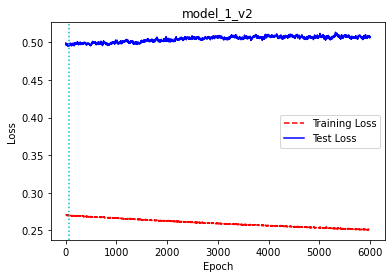

In [27]:
learning_rate = 0.001
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_1_v2'
model_l_v_e_filename = 'loss_vs_epochs_images/model_1_v2_le.png'
model_l_v_e_title = 'model_1_v2'
model_history_filename = 'history/history_model_1_v2'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 6000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [36]:
best_m1_v2 = load_model(model_filename)
evaluate_model(best_m1_v2, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8031

Test accuracy: 80.3%, test loss: 0.495241


In [37]:
output_filename_test_ds_labeled = 'test-ds-m1_v2.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    Here we got the same results as before.    
   ##### MODEL 1: V3: 
       learning_rate = 0.005
       batch_size = 32
       Dense 64 parameters

In [39]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/10000

Epoch 1: val_loss improved from inf to 0.46595, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 1s - loss: 0.3280 - accuracy: 0.8768 - val_loss: 0.4660 - val_accuracy: 0.8031 - 549ms/epoch - 22ms/step
Epoch 2/10000

Epoch 2: val_loss improved from 0.46595 to 0.46540, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3277 - accuracy: 0.8768 - val_loss: 0.4654 - val_accuracy: 0.8031 - 305ms/epoch - 12ms/step
Epoch 3/10000

Epoch 3: val_loss improved from 0.46540 to 0.46527, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3277 - accuracy: 0.8742 - val_loss: 0.4653 - val_accuracy: 0.8031 - 450ms/epoch - 18ms/step
Epoch 4/10000

Epoch 4: val_loss improved from 0.46527 to 0.46469, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.

25/25 - 0s - loss: 0.3267 - accuracy: 0.8768 - val_loss: 0.4650 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 43/10000

Epoch 43: val_loss did not improve from 0.46424
25/25 - 0s - loss: 0.3267 - accuracy: 0.8768 - val_loss: 0.4647 - val_accuracy: 0.8031 - 53ms/epoch - 2ms/step
Epoch 44/10000

Epoch 44: val_loss did not improve from 0.46424
25/25 - 0s - loss: 0.3266 - accuracy: 0.8768 - val_loss: 0.4650 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 45/10000

Epoch 45: val_loss did not improve from 0.46424
25/25 - 0s - loss: 0.3266 - accuracy: 0.8768 - val_loss: 0.4649 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 46/10000

Epoch 46: val_loss did not improve from 0.46424
25/25 - 0s - loss: 0.3266 - accuracy: 0.8755 - val_loss: 0.4651 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 47/10000

Epoch 47: val_loss did not improve from 0.46424
25/25 - 0s - loss: 0.3265 - accuracy: 0.8768 - val_loss: 0.4645 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 48/10000

Epoch 86/10000

Epoch 86: val_loss did not improve from 0.46333
25/25 - 0s - loss: 0.3255 - accuracy: 0.8768 - val_loss: 0.4639 - val_accuracy: 0.8031 - 66ms/epoch - 3ms/step
Epoch 87/10000

Epoch 87: val_loss did not improve from 0.46333
25/25 - 0s - loss: 0.3254 - accuracy: 0.8768 - val_loss: 0.4639 - val_accuracy: 0.8031 - 82ms/epoch - 3ms/step
Epoch 88/10000

Epoch 88: val_loss did not improve from 0.46333
25/25 - 0s - loss: 0.3256 - accuracy: 0.8768 - val_loss: 0.4638 - val_accuracy: 0.8031 - 85ms/epoch - 3ms/step
Epoch 89/10000

Epoch 89: val_loss improved from 0.46333 to 0.46313, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3254 - accuracy: 0.8755 - val_loss: 0.4631 - val_accuracy: 0.8083 - 397ms/epoch - 16ms/step
Epoch 90/10000

Epoch 90: val_loss did not improve from 0.46313
25/25 - 0s - loss: 0.3255 - accuracy: 0.8794 - val_loss: 0.4634 - val_accuracy: 0.8031 - 64ms/epoch - 3ms/step
Epoch 91/10000

Epoch 91

Epoch 131/10000

Epoch 131: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3245 - accuracy: 0.8768 - val_loss: 0.4628 - val_accuracy: 0.8031 - 57ms/epoch - 2ms/step
Epoch 132/10000

Epoch 132: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3244 - accuracy: 0.8768 - val_loss: 0.4626 - val_accuracy: 0.8031 - 76ms/epoch - 3ms/step
Epoch 133/10000

Epoch 133: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3244 - accuracy: 0.8768 - val_loss: 0.4626 - val_accuracy: 0.8031 - 85ms/epoch - 3ms/step
Epoch 134/10000

Epoch 134: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3243 - accuracy: 0.8768 - val_loss: 0.4626 - val_accuracy: 0.8031 - 69ms/epoch - 3ms/step
Epoch 135/10000

Epoch 135: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3243 - accuracy: 0.8768 - val_loss: 0.4625 - val_accuracy: 0.8031 - 63ms/epoch - 3ms/step
Epoch 136/10000

Epoch 136: val_loss did not improve from 0.46192
25/25 - 0s - loss: 0.3243 - accuracy: 0.8768 - va

25/25 - 0s - loss: 0.3232 - accuracy: 0.8768 - val_loss: 0.4620 - val_accuracy: 0.8031 - 61ms/epoch - 2ms/step
Epoch 177/10000

Epoch 177: val_loss did not improve from 0.46153
25/25 - 0s - loss: 0.3232 - accuracy: 0.8768 - val_loss: 0.4621 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 178/10000

Epoch 178: val_loss did not improve from 0.46153
25/25 - 0s - loss: 0.3232 - accuracy: 0.8768 - val_loss: 0.4621 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 179/10000

Epoch 179: val_loss did not improve from 0.46153
25/25 - 0s - loss: 0.3232 - accuracy: 0.8768 - val_loss: 0.4619 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 180/10000

Epoch 180: val_loss did not improve from 0.46153
25/25 - 0s - loss: 0.3231 - accuracy: 0.8768 - val_loss: 0.4618 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 181/10000

Epoch 181: val_loss did not improve from 0.46153
25/25 - 0s - loss: 0.3231 - accuracy: 0.8768 - val_loss: 0.4618 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoc

Epoch 222/10000

Epoch 222: val_loss did not improve from 0.46134
25/25 - 0s - loss: 0.3222 - accuracy: 0.8755 - val_loss: 0.4619 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 223/10000

Epoch 223: val_loss did not improve from 0.46134
25/25 - 0s - loss: 0.3220 - accuracy: 0.8755 - val_loss: 0.4618 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 224/10000

Epoch 224: val_loss did not improve from 0.46134
25/25 - 0s - loss: 0.3220 - accuracy: 0.8781 - val_loss: 0.4617 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 225/10000

Epoch 225: val_loss did not improve from 0.46134
25/25 - 0s - loss: 0.3220 - accuracy: 0.8768 - val_loss: 0.4619 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 226/10000

Epoch 226: val_loss improved from 0.46134 to 0.46125, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3220 - accuracy: 0.8755 - val_loss: 0.4613 - val_accuracy: 0.8031 - 385ms/epoch - 15ms/step
Epoch 227/1000

INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3211 - accuracy: 0.8768 - val_loss: 0.4597 - val_accuracy: 0.8031 - 421ms/epoch - 17ms/step
Epoch 264/10000

Epoch 264: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3211 - accuracy: 0.8768 - val_loss: 0.4604 - val_accuracy: 0.8031 - 73ms/epoch - 3ms/step
Epoch 265/10000

Epoch 265: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3210 - accuracy: 0.8768 - val_loss: 0.4601 - val_accuracy: 0.8031 - 69ms/epoch - 3ms/step
Epoch 266/10000

Epoch 266: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3210 - accuracy: 0.8755 - val_loss: 0.4604 - val_accuracy: 0.8031 - 73ms/epoch - 3ms/step
Epoch 267/10000

Epoch 267: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3210 - accuracy: 0.8755 - val_loss: 0.4601 - val_accuracy: 0.8031 - 74ms/epoch - 3ms/step
Epoch 268/10000

Epoch 268: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3210 - accuracy: 0.8755 - val_lo

25/25 - 0s - loss: 0.3201 - accuracy: 0.8768 - val_loss: 0.4622 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 310/10000

Epoch 310: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3199 - accuracy: 0.8768 - val_loss: 0.4620 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 311/10000

Epoch 311: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3200 - accuracy: 0.8768 - val_loss: 0.4621 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 312/10000

Epoch 312: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3199 - accuracy: 0.8768 - val_loss: 0.4621 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 313/10000

Epoch 313: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3199 - accuracy: 0.8768 - val_loss: 0.4616 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 314/10000

Epoch 314: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3198 - accuracy: 0.8768 - val_loss: 0.4615 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoc

Epoch 356/10000

Epoch 356: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3188 - accuracy: 0.8781 - val_loss: 0.4606 - val_accuracy: 0.8031 - 48ms/epoch - 2ms/step
Epoch 357/10000

Epoch 357: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3187 - accuracy: 0.8781 - val_loss: 0.4607 - val_accuracy: 0.8083 - 70ms/epoch - 3ms/step
Epoch 358/10000

Epoch 358: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3188 - accuracy: 0.8794 - val_loss: 0.4601 - val_accuracy: 0.8083 - 46ms/epoch - 2ms/step
Epoch 359/10000

Epoch 359: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3188 - accuracy: 0.8794 - val_loss: 0.4604 - val_accuracy: 0.8083 - 47ms/epoch - 2ms/step
Epoch 360/10000

Epoch 360: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3188 - accuracy: 0.8781 - val_loss: 0.4603 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 361/10000

Epoch 361: val_loss did not improve from 0.45971
25/25 - 0s - loss: 0.3187 - accuracy: 0.8794 - va

Epoch 402/10000

Epoch 402: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3178 - accuracy: 0.8794 - val_loss: 0.4609 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 403/10000

Epoch 403: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3178 - accuracy: 0.8794 - val_loss: 0.4607 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 404/10000

Epoch 404: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3176 - accuracy: 0.8794 - val_loss: 0.4609 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 405/10000

Epoch 405: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3176 - accuracy: 0.8794 - val_loss: 0.4610 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 406/10000

Epoch 406: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3175 - accuracy: 0.8794 - val_loss: 0.4603 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 407/10000

Epoch 407: val_loss did not improve from 0.45969
25/25 - 0s - loss: 0.3177 - accuracy: 0.8794 - va

25/25 - 0s - loss: 0.3166 - accuracy: 0.8794 - val_loss: 0.4598 - val_accuracy: 0.8083 - 47ms/epoch - 2ms/step
Epoch 448/10000

Epoch 448: val_loss did not improve from 0.45881
25/25 - 0s - loss: 0.3166 - accuracy: 0.8794 - val_loss: 0.4597 - val_accuracy: 0.8083 - 49ms/epoch - 2ms/step
Epoch 449/10000

Epoch 449: val_loss did not improve from 0.45881
25/25 - 0s - loss: 0.3167 - accuracy: 0.8794 - val_loss: 0.4594 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 450/10000

Epoch 450: val_loss did not improve from 0.45881
25/25 - 0s - loss: 0.3168 - accuracy: 0.8781 - val_loss: 0.4589 - val_accuracy: 0.8083 - 50ms/epoch - 2ms/step
Epoch 451/10000

Epoch 451: val_loss did not improve from 0.45881
25/25 - 0s - loss: 0.3167 - accuracy: 0.8794 - val_loss: 0.4595 - val_accuracy: 0.8083 - 48ms/epoch - 2ms/step
Epoch 452/10000

Epoch 452: val_loss did not improve from 0.45881
25/25 - 0s - loss: 0.3165 - accuracy: 0.8794 - val_loss: 0.4596 - val_accuracy: 0.8083 - 49ms/epoch - 2ms/step
Epoc

Epoch 493/10000

Epoch 493: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3156 - accuracy: 0.8794 - val_loss: 0.4591 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 494/10000

Epoch 494: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3156 - accuracy: 0.8781 - val_loss: 0.4589 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 495/10000

Epoch 495: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3155 - accuracy: 0.8794 - val_loss: 0.4591 - val_accuracy: 0.8083 - 49ms/epoch - 2ms/step
Epoch 496/10000

Epoch 496: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3155 - accuracy: 0.8794 - val_loss: 0.4583 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 497/10000

Epoch 497: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3156 - accuracy: 0.8781 - val_loss: 0.4590 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 498/10000

Epoch 498: val_loss did not improve from 0.45805
25/25 - 0s - loss: 0.3155 - accuracy: 0.8794 - va

25/25 - 0s - loss: 0.3145 - accuracy: 0.8807 - val_loss: 0.4587 - val_accuracy: 0.8031 - 69ms/epoch - 3ms/step
Epoch 539/10000

Epoch 539: val_loss did not improve from 0.45759
25/25 - 0s - loss: 0.3145 - accuracy: 0.8807 - val_loss: 0.4583 - val_accuracy: 0.8031 - 71ms/epoch - 3ms/step
Epoch 540/10000

Epoch 540: val_loss did not improve from 0.45759
25/25 - 0s - loss: 0.3146 - accuracy: 0.8794 - val_loss: 0.4586 - val_accuracy: 0.8031 - 70ms/epoch - 3ms/step
Epoch 541/10000

Epoch 541: val_loss did not improve from 0.45759
25/25 - 0s - loss: 0.3146 - accuracy: 0.8755 - val_loss: 0.4586 - val_accuracy: 0.8031 - 72ms/epoch - 3ms/step
Epoch 542/10000

Epoch 542: val_loss did not improve from 0.45759
25/25 - 0s - loss: 0.3145 - accuracy: 0.8794 - val_loss: 0.4583 - val_accuracy: 0.8031 - 71ms/epoch - 3ms/step
Epoch 543/10000

Epoch 543: val_loss did not improve from 0.45759
25/25 - 0s - loss: 0.3144 - accuracy: 0.8768 - val_loss: 0.4596 - val_accuracy: 0.8031 - 70ms/epoch - 3ms/step
Epoc


Epoch 584: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3135 - accuracy: 0.8794 - val_loss: 0.4582 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 585/10000

Epoch 585: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3134 - accuracy: 0.8794 - val_loss: 0.4582 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 586/10000

Epoch 586: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3133 - accuracy: 0.8794 - val_loss: 0.4580 - val_accuracy: 0.8083 - 58ms/epoch - 2ms/step
Epoch 587/10000

Epoch 587: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3133 - accuracy: 0.8794 - val_loss: 0.4584 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 588/10000

Epoch 588: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3134 - accuracy: 0.8794 - val_loss: 0.4581 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 589/10000

Epoch 589: val_loss did not improve from 0.45686
25/25 - 0s - loss: 0.3132 - accuracy: 0.8794 - val_loss: 0.4575 -

25/25 - 0s - loss: 0.3124 - accuracy: 0.8794 - val_loss: 0.4569 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 630/10000

Epoch 630: val_loss did not improve from 0.45634
25/25 - 0s - loss: 0.3123 - accuracy: 0.8807 - val_loss: 0.4567 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 631/10000

Epoch 631: val_loss did not improve from 0.45634
25/25 - 0s - loss: 0.3122 - accuracy: 0.8807 - val_loss: 0.4565 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 632/10000

Epoch 632: val_loss did not improve from 0.45634
25/25 - 0s - loss: 0.3123 - accuracy: 0.8794 - val_loss: 0.4567 - val_accuracy: 0.8083 - 53ms/epoch - 2ms/step
Epoch 633/10000

Epoch 633: val_loss did not improve from 0.45634
25/25 - 0s - loss: 0.3123 - accuracy: 0.8794 - val_loss: 0.4578 - val_accuracy: 0.8083 - 53ms/epoch - 2ms/step
Epoch 634/10000

Epoch 634: val_loss did not improve from 0.45634
25/25 - 0s - loss: 0.3123 - accuracy: 0.8794 - val_loss: 0.4574 - val_accuracy: 0.8083 - 58ms/epoch - 2ms/step
Epoc


Epoch 675: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3114 - accuracy: 0.8781 - val_loss: 0.4573 - val_accuracy: 0.8083 - 66ms/epoch - 3ms/step
Epoch 676/10000

Epoch 676: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3114 - accuracy: 0.8794 - val_loss: 0.4572 - val_accuracy: 0.8083 - 70ms/epoch - 3ms/step
Epoch 677/10000

Epoch 677: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3113 - accuracy: 0.8794 - val_loss: 0.4573 - val_accuracy: 0.8083 - 73ms/epoch - 3ms/step
Epoch 678/10000

Epoch 678: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3112 - accuracy: 0.8794 - val_loss: 0.4569 - val_accuracy: 0.8083 - 89ms/epoch - 4ms/step
Epoch 679/10000

Epoch 679: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3112 - accuracy: 0.8794 - val_loss: 0.4574 - val_accuracy: 0.8083 - 81ms/epoch - 3ms/step
Epoch 680/10000

Epoch 680: val_loss did not improve from 0.45591
25/25 - 0s - loss: 0.3112 - accuracy: 0.8794 - val_loss: 0.4574 -

25/25 - 0s - loss: 0.3105 - accuracy: 0.8781 - val_loss: 0.4557 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 721/10000

Epoch 721: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3104 - accuracy: 0.8794 - val_loss: 0.4568 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 722/10000

Epoch 722: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3102 - accuracy: 0.8794 - val_loss: 0.4567 - val_accuracy: 0.8083 - 53ms/epoch - 2ms/step
Epoch 723/10000

Epoch 723: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3102 - accuracy: 0.8794 - val_loss: 0.4571 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 724/10000

Epoch 724: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3102 - accuracy: 0.8794 - val_loss: 0.4569 - val_accuracy: 0.8083 - 61ms/epoch - 2ms/step
Epoch 725/10000

Epoch 725: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3102 - accuracy: 0.8820 - val_loss: 0.4566 - val_accuracy: 0.8083 - 59ms/epoch - 2ms/step
Epoc

Epoch 767/10000

Epoch 767: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3092 - accuracy: 0.8794 - val_loss: 0.4557 - val_accuracy: 0.8083 - 49ms/epoch - 2ms/step
Epoch 768/10000

Epoch 768: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3093 - accuracy: 0.8794 - val_loss: 0.4561 - val_accuracy: 0.8083 - 48ms/epoch - 2ms/step
Epoch 769/10000

Epoch 769: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3093 - accuracy: 0.8794 - val_loss: 0.4562 - val_accuracy: 0.8083 - 46ms/epoch - 2ms/step
Epoch 770/10000

Epoch 770: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3092 - accuracy: 0.8794 - val_loss: 0.4564 - val_accuracy: 0.8083 - 48ms/epoch - 2ms/step
Epoch 771/10000

Epoch 771: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3093 - accuracy: 0.8768 - val_loss: 0.4561 - val_accuracy: 0.8083 - 44ms/epoch - 2ms/step
Epoch 772/10000

Epoch 772: val_loss did not improve from 0.45541
25/25 - 0s - loss: 0.3092 - accuracy: 0.8794 - va

Epoch 812/10000

Epoch 812: val_loss improved from 0.45513 to 0.45470, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3084 - accuracy: 0.8794 - val_loss: 0.4547 - val_accuracy: 0.8083 - 287ms/epoch - 11ms/step
Epoch 813/10000

Epoch 813: val_loss did not improve from 0.45470
25/25 - 0s - loss: 0.3083 - accuracy: 0.8794 - val_loss: 0.4550 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 814/10000

Epoch 814: val_loss did not improve from 0.45470
25/25 - 0s - loss: 0.3082 - accuracy: 0.8794 - val_loss: 0.4551 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 815/10000

Epoch 815: val_loss did not improve from 0.45470
25/25 - 0s - loss: 0.3082 - accuracy: 0.8820 - val_loss: 0.4549 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 816/10000

Epoch 816: val_loss did not improve from 0.45470
25/25 - 0s - loss: 0.3082 - accuracy: 0.8794 - val_loss: 0.4549 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 817/1000

25/25 - 0s - loss: 0.3073 - accuracy: 0.8794 - val_loss: 0.4553 - val_accuracy: 0.8083 - 58ms/epoch - 2ms/step
Epoch 858/10000

Epoch 858: val_loss did not improve from 0.45443
25/25 - 0s - loss: 0.3072 - accuracy: 0.8794 - val_loss: 0.4551 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 859/10000

Epoch 859: val_loss did not improve from 0.45443
25/25 - 0s - loss: 0.3071 - accuracy: 0.8794 - val_loss: 0.4548 - val_accuracy: 0.8083 - 61ms/epoch - 2ms/step
Epoch 860/10000

Epoch 860: val_loss did not improve from 0.45443
25/25 - 0s - loss: 0.3072 - accuracy: 0.8794 - val_loss: 0.4548 - val_accuracy: 0.8083 - 67ms/epoch - 3ms/step
Epoch 861/10000

Epoch 861: val_loss did not improve from 0.45443
25/25 - 0s - loss: 0.3072 - accuracy: 0.8794 - val_loss: 0.4551 - val_accuracy: 0.8083 - 58ms/epoch - 2ms/step
Epoch 862/10000

Epoch 862: val_loss did not improve from 0.45443
25/25 - 0s - loss: 0.3072 - accuracy: 0.8794 - val_loss: 0.4559 - val_accuracy: 0.8083 - 69ms/epoch - 3ms/step
Epoc

Epoch 901/10000

Epoch 901: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3063 - accuracy: 0.8820 - val_loss: 0.4544 - val_accuracy: 0.8083 - 58ms/epoch - 2ms/step
Epoch 902/10000

Epoch 902: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3063 - accuracy: 0.8794 - val_loss: 0.4542 - val_accuracy: 0.8083 - 66ms/epoch - 3ms/step
Epoch 903/10000

Epoch 903: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3063 - accuracy: 0.8781 - val_loss: 0.4537 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 904/10000

Epoch 904: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3063 - accuracy: 0.8794 - val_loss: 0.4539 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 905/10000

Epoch 905: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3062 - accuracy: 0.8781 - val_loss: 0.4541 - val_accuracy: 0.8083 - 51ms/epoch - 2ms/step
Epoch 906/10000

Epoch 906: val_loss did not improve from 0.45364
25/25 - 0s - loss: 0.3062 - accuracy: 0.8781 - va

25/25 - 0s - loss: 0.3054 - accuracy: 0.8794 - val_loss: 0.4537 - val_accuracy: 0.8083 - 77ms/epoch - 3ms/step
Epoch 947/10000

Epoch 947: val_loss did not improve from 0.45348
25/25 - 0s - loss: 0.3054 - accuracy: 0.8807 - val_loss: 0.4535 - val_accuracy: 0.8031 - 65ms/epoch - 3ms/step
Epoch 948/10000

Epoch 948: val_loss did not improve from 0.45348
25/25 - 0s - loss: 0.3054 - accuracy: 0.8820 - val_loss: 0.4536 - val_accuracy: 0.8031 - 64ms/epoch - 3ms/step
Epoch 949/10000

Epoch 949: val_loss did not improve from 0.45348
25/25 - 0s - loss: 0.3053 - accuracy: 0.8846 - val_loss: 0.4536 - val_accuracy: 0.8031 - 68ms/epoch - 3ms/step
Epoch 950/10000

Epoch 950: val_loss improved from 0.45348 to 0.45334, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3053 - accuracy: 0.8846 - val_loss: 0.4533 - val_accuracy: 0.8083 - 343ms/epoch - 14ms/step
Epoch 951/10000

Epoch 951: val_loss did not improve from 0.45334
25/25 - 0s - l

INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3044 - accuracy: 0.8872 - val_loss: 0.4520 - val_accuracy: 0.8031 - 320ms/epoch - 13ms/step
Epoch 991/10000

Epoch 991: val_loss did not improve from 0.45202
25/25 - 0s - loss: 0.3044 - accuracy: 0.8833 - val_loss: 0.4532 - val_accuracy: 0.8031 - 47ms/epoch - 2ms/step
Epoch 992/10000

Epoch 992: val_loss did not improve from 0.45202
25/25 - 0s - loss: 0.3045 - accuracy: 0.8872 - val_loss: 0.4529 - val_accuracy: 0.8031 - 48ms/epoch - 2ms/step
Epoch 993/10000

Epoch 993: val_loss improved from 0.45202 to 0.45179, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.3045 - accuracy: 0.8872 - val_loss: 0.4518 - val_accuracy: 0.8031 - 311ms/epoch - 12ms/step
Epoch 994/10000

Epoch 994: val_loss did not improve from 0.45179
25/25 - 0s - loss: 0.3044 - accuracy: 0.8872 - val_loss: 0.4524 - val_accuracy: 0.8031 - 47ms/epoch - 2ms/step
Epoch 995/10000

E

Epoch 1035/10000

Epoch 1035: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3035 - accuracy: 0.8846 - val_loss: 0.4526 - val_accuracy: 0.8031 - 79ms/epoch - 3ms/step
Epoch 1036/10000

Epoch 1036: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3035 - accuracy: 0.8872 - val_loss: 0.4525 - val_accuracy: 0.8031 - 66ms/epoch - 3ms/step
Epoch 1037/10000

Epoch 1037: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3036 - accuracy: 0.8846 - val_loss: 0.4524 - val_accuracy: 0.8031 - 64ms/epoch - 3ms/step
Epoch 1038/10000

Epoch 1038: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3035 - accuracy: 0.8885 - val_loss: 0.4524 - val_accuracy: 0.8031 - 64ms/epoch - 3ms/step
Epoch 1039/10000

Epoch 1039: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3035 - accuracy: 0.8872 - val_loss: 0.4526 - val_accuracy: 0.8031 - 60ms/epoch - 2ms/step
Epoch 1040/10000

Epoch 1040: val_loss did not improve from 0.45171
25/25 - 0s - loss: 0.3035 - accuracy:

25/25 - 0s - loss: 0.3026 - accuracy: 0.8846 - val_loss: 0.4520 - val_accuracy: 0.8031 - 65ms/epoch - 3ms/step
Epoch 1081/10000

Epoch 1081: val_loss did not improve from 0.45160
25/25 - 0s - loss: 0.3027 - accuracy: 0.8846 - val_loss: 0.4517 - val_accuracy: 0.8031 - 67ms/epoch - 3ms/step
Epoch 1082/10000

Epoch 1082: val_loss did not improve from 0.45160
25/25 - 0s - loss: 0.3026 - accuracy: 0.8846 - val_loss: 0.4517 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 1083/10000

Epoch 1083: val_loss did not improve from 0.45160
25/25 - 0s - loss: 0.3026 - accuracy: 0.8846 - val_loss: 0.4520 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 1084/10000

Epoch 1084: val_loss did not improve from 0.45160
25/25 - 0s - loss: 0.3026 - accuracy: 0.8846 - val_loss: 0.4517 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 1085/10000

Epoch 1085: val_loss improved from 0.45160 to 0.45157, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 

25/25 - 0s - loss: 0.3017 - accuracy: 0.8872 - val_loss: 0.4512 - val_accuracy: 0.8031 - 53ms/epoch - 2ms/step
Epoch 1124/10000

Epoch 1124: val_loss did not improve from 0.45021
25/25 - 0s - loss: 0.3017 - accuracy: 0.8846 - val_loss: 0.4521 - val_accuracy: 0.8031 - 53ms/epoch - 2ms/step
Epoch 1125/10000

Epoch 1125: val_loss did not improve from 0.45021
25/25 - 0s - loss: 0.3019 - accuracy: 0.8872 - val_loss: 0.4511 - val_accuracy: 0.8031 - 75ms/epoch - 3ms/step
Epoch 1126/10000

Epoch 1126: val_loss did not improve from 0.45021
25/25 - 0s - loss: 0.3018 - accuracy: 0.8872 - val_loss: 0.4519 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1127/10000

Epoch 1127: val_loss did not improve from 0.45021
25/25 - 0s - loss: 0.3018 - accuracy: 0.8872 - val_loss: 0.4520 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 1128/10000

Epoch 1128: val_loss did not improve from 0.45021
25/25 - 0s - loss: 0.3018 - accuracy: 0.8872 - val_loss: 0.4517 - val_accuracy: 0.8031 - 64ms/epoch - 3ms


Epoch 1168: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3009 - accuracy: 0.8872 - val_loss: 0.4507 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1169/10000

Epoch 1169: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3009 - accuracy: 0.8872 - val_loss: 0.4505 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 1170/10000

Epoch 1170: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3008 - accuracy: 0.8872 - val_loss: 0.4505 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 1171/10000

Epoch 1171: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3008 - accuracy: 0.8872 - val_loss: 0.4501 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 1172/10000

Epoch 1172: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3007 - accuracy: 0.8872 - val_loss: 0.4505 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1173/10000

Epoch 1173: val_loss did not improve from 0.44995
25/25 - 0s - loss: 0.3008 - accuracy: 0.8872 - val_los

Epoch 1212/10000

Epoch 1212: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.3000 - accuracy: 0.8872 - val_loss: 0.4501 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 1213/10000

Epoch 1213: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.3000 - accuracy: 0.8872 - val_loss: 0.4491 - val_accuracy: 0.8031 - 52ms/epoch - 2ms/step
Epoch 1214/10000

Epoch 1214: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.3000 - accuracy: 0.8872 - val_loss: 0.4492 - val_accuracy: 0.8031 - 53ms/epoch - 2ms/step
Epoch 1215/10000

Epoch 1215: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2999 - accuracy: 0.8872 - val_loss: 0.4490 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1216/10000

Epoch 1216: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2999 - accuracy: 0.8872 - val_loss: 0.4494 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1217/10000

Epoch 1217: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.3001 - accuracy:

Epoch 1258/10000

Epoch 1258: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2991 - accuracy: 0.8872 - val_loss: 0.4506 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 1259/10000

Epoch 1259: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2991 - accuracy: 0.8872 - val_loss: 0.4507 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1260/10000

Epoch 1260: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2991 - accuracy: 0.8872 - val_loss: 0.4507 - val_accuracy: 0.8031 - 62ms/epoch - 2ms/step
Epoch 1261/10000

Epoch 1261: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2990 - accuracy: 0.8872 - val_loss: 0.4502 - val_accuracy: 0.8031 - 62ms/epoch - 2ms/step
Epoch 1262/10000

Epoch 1262: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2990 - accuracy: 0.8872 - val_loss: 0.4502 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 1263/10000

Epoch 1263: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2990 - accuracy:

Epoch 1304/10000

Epoch 1304: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2982 - accuracy: 0.8872 - val_loss: 0.4506 - val_accuracy: 0.8031 - 57ms/epoch - 2ms/step
Epoch 1305/10000

Epoch 1305: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2982 - accuracy: 0.8872 - val_loss: 0.4508 - val_accuracy: 0.8031 - 59ms/epoch - 2ms/step
Epoch 1306/10000

Epoch 1306: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2982 - accuracy: 0.8872 - val_loss: 0.4500 - val_accuracy: 0.8031 - 60ms/epoch - 2ms/step
Epoch 1307/10000

Epoch 1307: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2982 - accuracy: 0.8872 - val_loss: 0.4499 - val_accuracy: 0.8031 - 65ms/epoch - 3ms/step
Epoch 1308/10000

Epoch 1308: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2981 - accuracy: 0.8872 - val_loss: 0.4498 - val_accuracy: 0.8031 - 58ms/epoch - 2ms/step
Epoch 1309/10000

Epoch 1309: val_loss did not improve from 0.44896
25/25 - 0s - loss: 0.2980 - accuracy:

25/25 - 0s - loss: 0.2975 - accuracy: 0.8885 - val_loss: 0.4496 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 1350/10000

Epoch 1350: val_loss did not improve from 0.44846
25/25 - 0s - loss: 0.2974 - accuracy: 0.8885 - val_loss: 0.4492 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1351/10000

Epoch 1351: val_loss did not improve from 0.44846
25/25 - 0s - loss: 0.2974 - accuracy: 0.8872 - val_loss: 0.4493 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 1352/10000

Epoch 1352: val_loss did not improve from 0.44846
25/25 - 0s - loss: 0.2973 - accuracy: 0.8872 - val_loss: 0.4494 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1353/10000

Epoch 1353: val_loss did not improve from 0.44846
25/25 - 0s - loss: 0.2973 - accuracy: 0.8872 - val_loss: 0.4496 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1354/10000

Epoch 1354: val_loss did not improve from 0.44846
25/25 - 0s - loss: 0.2973 - accuracy: 0.8872 - val_loss: 0.4496 - val_accuracy: 0.8031 - 56ms/epoch - 2ms

Epoch 1395/10000

Epoch 1395: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2965 - accuracy: 0.8885 - val_loss: 0.4483 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1396/10000

Epoch 1396: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2965 - accuracy: 0.8872 - val_loss: 0.4487 - val_accuracy: 0.8031 - 57ms/epoch - 2ms/step
Epoch 1397/10000

Epoch 1397: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2965 - accuracy: 0.8872 - val_loss: 0.4493 - val_accuracy: 0.8031 - 57ms/epoch - 2ms/step
Epoch 1398/10000

Epoch 1398: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2964 - accuracy: 0.8872 - val_loss: 0.4491 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1399/10000

Epoch 1399: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2964 - accuracy: 0.8872 - val_loss: 0.4492 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1400/10000

Epoch 1400: val_loss did not improve from 0.44810
25/25 - 0s - loss: 0.2963 - accuracy:

Epoch 1440/10000

Epoch 1440: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2958 - accuracy: 0.8898 - val_loss: 0.4482 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1441/10000

Epoch 1441: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2957 - accuracy: 0.8872 - val_loss: 0.4478 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 1442/10000

Epoch 1442: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2956 - accuracy: 0.8872 - val_loss: 0.4483 - val_accuracy: 0.8031 - 52ms/epoch - 2ms/step
Epoch 1443/10000

Epoch 1443: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2955 - accuracy: 0.8872 - val_loss: 0.4483 - val_accuracy: 0.8031 - 52ms/epoch - 2ms/step
Epoch 1444/10000

Epoch 1444: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2956 - accuracy: 0.8872 - val_loss: 0.4485 - val_accuracy: 0.8031 - 55ms/epoch - 2ms/step
Epoch 1445/10000

Epoch 1445: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2955 - accuracy:

Epoch 1486/10000

Epoch 1486: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2949 - accuracy: 0.8872 - val_loss: 0.4485 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 1487/10000

Epoch 1487: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2948 - accuracy: 0.8872 - val_loss: 0.4484 - val_accuracy: 0.8031 - 50ms/epoch - 2ms/step
Epoch 1488/10000

Epoch 1488: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2947 - accuracy: 0.8833 - val_loss: 0.4483 - val_accuracy: 0.8031 - 52ms/epoch - 2ms/step
Epoch 1489/10000

Epoch 1489: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2947 - accuracy: 0.8885 - val_loss: 0.4482 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 1490/10000

Epoch 1490: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2947 - accuracy: 0.8859 - val_loss: 0.4479 - val_accuracy: 0.8031 - 54ms/epoch - 2ms/step
Epoch 1491/10000

Epoch 1491: val_loss did not improve from 0.44696
25/25 - 0s - loss: 0.2947 - accuracy:


Epoch 1530: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2939 - accuracy: 0.8898 - val_loss: 0.4473 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 1531/10000

Epoch 1531: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2940 - accuracy: 0.8898 - val_loss: 0.4471 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 1532/10000

Epoch 1532: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2939 - accuracy: 0.8898 - val_loss: 0.4474 - val_accuracy: 0.8083 - 50ms/epoch - 2ms/step
Epoch 1533/10000

Epoch 1533: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2939 - accuracy: 0.8898 - val_loss: 0.4473 - val_accuracy: 0.8083 - 50ms/epoch - 2ms/step
Epoch 1534/10000

Epoch 1534: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2939 - accuracy: 0.8898 - val_loss: 0.4470 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 1535/10000

Epoch 1535: val_loss did not improve from 0.44622
25/25 - 0s - loss: 0.2938 - accuracy: 0.8898 - val_los

Epoch 1575/10000

Epoch 1575: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2930 - accuracy: 0.8898 - val_loss: 0.4468 - val_accuracy: 0.8083 - 61ms/epoch - 2ms/step
Epoch 1576/10000

Epoch 1576: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2931 - accuracy: 0.8898 - val_loss: 0.4463 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 1577/10000

Epoch 1577: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2931 - accuracy: 0.8898 - val_loss: 0.4461 - val_accuracy: 0.8031 - 57ms/epoch - 2ms/step
Epoch 1578/10000

Epoch 1578: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2931 - accuracy: 0.8872 - val_loss: 0.4461 - val_accuracy: 0.8031 - 69ms/epoch - 3ms/step
Epoch 1579/10000

Epoch 1579: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2931 - accuracy: 0.8846 - val_loss: 0.4464 - val_accuracy: 0.8031 - 66ms/epoch - 3ms/step
Epoch 1580/10000

Epoch 1580: val_loss did not improve from 0.44603
25/25 - 0s - loss: 0.2934 - accuracy:

Epoch 1620/10000

Epoch 1620: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2923 - accuracy: 0.8898 - val_loss: 0.4462 - val_accuracy: 0.8083 - 72ms/epoch - 3ms/step
Epoch 1621/10000

Epoch 1621: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2923 - accuracy: 0.8898 - val_loss: 0.4463 - val_accuracy: 0.8083 - 73ms/epoch - 3ms/step
Epoch 1622/10000

Epoch 1622: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2922 - accuracy: 0.8898 - val_loss: 0.4458 - val_accuracy: 0.8083 - 73ms/epoch - 3ms/step
Epoch 1623/10000

Epoch 1623: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2922 - accuracy: 0.8898 - val_loss: 0.4453 - val_accuracy: 0.8031 - 73ms/epoch - 3ms/step
Epoch 1624/10000

Epoch 1624: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2922 - accuracy: 0.8872 - val_loss: 0.4457 - val_accuracy: 0.8083 - 75ms/epoch - 3ms/step
Epoch 1625/10000

Epoch 1625: val_loss did not improve from 0.44518
25/25 - 0s - loss: 0.2921 - accuracy:

25/25 - 0s - loss: 0.2915 - accuracy: 0.8898 - val_loss: 0.4458 - val_accuracy: 0.8083 - 63ms/epoch - 3ms/step
Epoch 1666/10000

Epoch 1666: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2914 - accuracy: 0.8898 - val_loss: 0.4465 - val_accuracy: 0.8083 - 67ms/epoch - 3ms/step
Epoch 1667/10000

Epoch 1667: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2915 - accuracy: 0.8898 - val_loss: 0.4462 - val_accuracy: 0.8083 - 72ms/epoch - 3ms/step
Epoch 1668/10000

Epoch 1668: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2914 - accuracy: 0.8898 - val_loss: 0.4461 - val_accuracy: 0.8083 - 73ms/epoch - 3ms/step
Epoch 1669/10000

Epoch 1669: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2914 - accuracy: 0.8898 - val_loss: 0.4462 - val_accuracy: 0.8083 - 74ms/epoch - 3ms/step
Epoch 1670/10000

Epoch 1670: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2914 - accuracy: 0.8898 - val_loss: 0.4470 - val_accuracy: 0.8083 - 70ms/epoch - 3ms

25/25 - 0s - loss: 0.2907 - accuracy: 0.8898 - val_loss: 0.4470 - val_accuracy: 0.8083 - 61ms/epoch - 2ms/step
Epoch 1712/10000

Epoch 1712: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2907 - accuracy: 0.8898 - val_loss: 0.4467 - val_accuracy: 0.8083 - 59ms/epoch - 2ms/step
Epoch 1713/10000

Epoch 1713: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2905 - accuracy: 0.8898 - val_loss: 0.4465 - val_accuracy: 0.8083 - 49ms/epoch - 2ms/step
Epoch 1714/10000

Epoch 1714: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2906 - accuracy: 0.8898 - val_loss: 0.4452 - val_accuracy: 0.8031 - 71ms/epoch - 3ms/step
Epoch 1715/10000

Epoch 1715: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2907 - accuracy: 0.8898 - val_loss: 0.4452 - val_accuracy: 0.8031 - 60ms/epoch - 2ms/step
Epoch 1716/10000

Epoch 1716: val_loss did not improve from 0.44487
25/25 - 0s - loss: 0.2907 - accuracy: 0.8885 - val_loss: 0.4456 - val_accuracy: 0.8083 - 55ms/epoch - 2ms

Epoch 1756/10000

Epoch 1756: val_loss did not improve from 0.44461
25/25 - 0s - loss: 0.2898 - accuracy: 0.8898 - val_loss: 0.4452 - val_accuracy: 0.8083 - 52ms/epoch - 2ms/step
Epoch 1757/10000

Epoch 1757: val_loss did not improve from 0.44461
25/25 - 0s - loss: 0.2898 - accuracy: 0.8936 - val_loss: 0.4446 - val_accuracy: 0.8083 - 51ms/epoch - 2ms/step
Epoch 1758/10000

Epoch 1758: val_loss did not improve from 0.44461
25/25 - 0s - loss: 0.2898 - accuracy: 0.8911 - val_loss: 0.4447 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 1759/10000

Epoch 1759: val_loss improved from 0.44461 to 0.44449, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2898 - accuracy: 0.8898 - val_loss: 0.4445 - val_accuracy: 0.8083 - 317ms/epoch - 13ms/step
Epoch 1760/10000

Epoch 1760: val_loss improved from 0.44449 to 0.44442, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - los


Epoch 1800: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2894 - accuracy: 0.8936 - val_loss: 0.4453 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 1801/10000

Epoch 1801: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2891 - accuracy: 0.8936 - val_loss: 0.4451 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 1802/10000

Epoch 1802: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2890 - accuracy: 0.8936 - val_loss: 0.4452 - val_accuracy: 0.8083 - 62ms/epoch - 2ms/step
Epoch 1803/10000

Epoch 1803: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2891 - accuracy: 0.8911 - val_loss: 0.4452 - val_accuracy: 0.8083 - 48ms/epoch - 2ms/step
Epoch 1804/10000

Epoch 1804: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2891 - accuracy: 0.8936 - val_loss: 0.4462 - val_accuracy: 0.8083 - 60ms/epoch - 2ms/step
Epoch 1805/10000

Epoch 1805: val_loss did not improve from 0.44432
25/25 - 0s - loss: 0.2891 - accuracy: 0.8923 - val_los


Epoch 1843: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2884 - accuracy: 0.8936 - val_loss: 0.4442 - val_accuracy: 0.8083 - 73ms/epoch - 3ms/step
Epoch 1844/10000

Epoch 1844: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2885 - accuracy: 0.8936 - val_loss: 0.4439 - val_accuracy: 0.8083 - 82ms/epoch - 3ms/step
Epoch 1845/10000

Epoch 1845: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2882 - accuracy: 0.8936 - val_loss: 0.4438 - val_accuracy: 0.8083 - 72ms/epoch - 3ms/step
Epoch 1846/10000

Epoch 1846: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2883 - accuracy: 0.8949 - val_loss: 0.4442 - val_accuracy: 0.8083 - 66ms/epoch - 3ms/step
Epoch 1847/10000

Epoch 1847: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2883 - accuracy: 0.8936 - val_loss: 0.4443 - val_accuracy: 0.8083 - 55ms/epoch - 2ms/step
Epoch 1848/10000

Epoch 1848: val_loss did not improve from 0.44338
25/25 - 0s - loss: 0.2883 - accuracy: 0.8936 - val_los

25/25 - 0s - loss: 0.2876 - accuracy: 0.8936 - val_loss: 0.4443 - val_accuracy: 0.8083 - 72ms/epoch - 3ms/step
Epoch 1889/10000

Epoch 1889: val_loss did not improve from 0.44334
25/25 - 0s - loss: 0.2879 - accuracy: 0.8936 - val_loss: 0.4435 - val_accuracy: 0.8083 - 68ms/epoch - 3ms/step
Epoch 1890/10000

Epoch 1890: val_loss improved from 0.44334 to 0.44319, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2877 - accuracy: 0.8936 - val_loss: 0.4432 - val_accuracy: 0.8083 - 365ms/epoch - 15ms/step
Epoch 1891/10000

Epoch 1891: val_loss did not improve from 0.44319
25/25 - 0s - loss: 0.2878 - accuracy: 0.8936 - val_loss: 0.4432 - val_accuracy: 0.8083 - 62ms/epoch - 2ms/step
Epoch 1892/10000

Epoch 1892: val_loss did not improve from 0.44319
25/25 - 0s - loss: 0.2878 - accuracy: 0.8936 - val_loss: 0.4437 - val_accuracy: 0.8083 - 63ms/epoch - 3ms/step
Epoch 1893/10000

Epoch 1893: val_loss did not improve from 0.44319
25/2

Epoch 1931/10000

Epoch 1931: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2868 - accuracy: 0.8949 - val_loss: 0.4447 - val_accuracy: 0.8083 - 65ms/epoch - 3ms/step
Epoch 1932/10000

Epoch 1932: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2871 - accuracy: 0.8923 - val_loss: 0.4439 - val_accuracy: 0.8083 - 72ms/epoch - 3ms/step
Epoch 1933/10000

Epoch 1933: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2869 - accuracy: 0.8936 - val_loss: 0.4436 - val_accuracy: 0.8083 - 62ms/epoch - 2ms/step
Epoch 1934/10000

Epoch 1934: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2869 - accuracy: 0.8936 - val_loss: 0.4434 - val_accuracy: 0.8083 - 75ms/epoch - 3ms/step
Epoch 1935/10000

Epoch 1935: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2868 - accuracy: 0.8936 - val_loss: 0.4431 - val_accuracy: 0.8083 - 80ms/epoch - 3ms/step
Epoch 1936/10000

Epoch 1936: val_loss did not improve from 0.44221
25/25 - 0s - loss: 0.2868 - accuracy:

25/25 - 0s - loss: 0.2863 - accuracy: 0.8949 - val_loss: 0.4425 - val_accuracy: 0.8135 - 90ms/epoch - 4ms/step
Epoch 1977/10000

Epoch 1977: val_loss did not improve from 0.44192
25/25 - 0s - loss: 0.2861 - accuracy: 0.8949 - val_loss: 0.4434 - val_accuracy: 0.8083 - 65ms/epoch - 3ms/step
Epoch 1978/10000

Epoch 1978: val_loss did not improve from 0.44192
25/25 - 0s - loss: 0.2861 - accuracy: 0.8936 - val_loss: 0.4430 - val_accuracy: 0.8083 - 44ms/epoch - 2ms/step
Epoch 1979/10000

Epoch 1979: val_loss did not improve from 0.44192
25/25 - 0s - loss: 0.2862 - accuracy: 0.8936 - val_loss: 0.4429 - val_accuracy: 0.8083 - 43ms/epoch - 2ms/step
Epoch 1980/10000

Epoch 1980: val_loss did not improve from 0.44192
25/25 - 0s - loss: 0.2862 - accuracy: 0.8936 - val_loss: 0.4427 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 1981/10000

Epoch 1981: val_loss did not improve from 0.44192
25/25 - 0s - loss: 0.2862 - accuracy: 0.8936 - val_loss: 0.4428 - val_accuracy: 0.8083 - 59ms/epoch - 2ms

Epoch 2022/10000

Epoch 2022: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2853 - accuracy: 0.8936 - val_loss: 0.4436 - val_accuracy: 0.8083 - 78ms/epoch - 3ms/step
Epoch 2023/10000

Epoch 2023: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2853 - accuracy: 0.8936 - val_loss: 0.4435 - val_accuracy: 0.8083 - 59ms/epoch - 2ms/step
Epoch 2024/10000

Epoch 2024: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2855 - accuracy: 0.8936 - val_loss: 0.4437 - val_accuracy: 0.8083 - 70ms/epoch - 3ms/step
Epoch 2025/10000

Epoch 2025: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2854 - accuracy: 0.8949 - val_loss: 0.4441 - val_accuracy: 0.8083 - 64ms/epoch - 3ms/step
Epoch 2026/10000

Epoch 2026: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2854 - accuracy: 0.8923 - val_loss: 0.4441 - val_accuracy: 0.8083 - 70ms/epoch - 3ms/step
Epoch 2027/10000

Epoch 2027: val_loss did not improve from 0.44174
25/25 - 0s - loss: 0.2853 - accuracy:

Epoch 2067/10000

Epoch 2067: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2846 - accuracy: 0.8949 - val_loss: 0.4422 - val_accuracy: 0.8135 - 71ms/epoch - 3ms/step
Epoch 2068/10000

Epoch 2068: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2846 - accuracy: 0.8949 - val_loss: 0.4427 - val_accuracy: 0.8083 - 56ms/epoch - 2ms/step
Epoch 2069/10000

Epoch 2069: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2846 - accuracy: 0.8936 - val_loss: 0.4428 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 2070/10000

Epoch 2070: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2845 - accuracy: 0.8923 - val_loss: 0.4423 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 2071/10000

Epoch 2071: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2845 - accuracy: 0.8949 - val_loss: 0.4424 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 2072/10000

Epoch 2072: val_loss did not improve from 0.44147
25/25 - 0s - loss: 0.2846 - accuracy:

Epoch 2110/10000

Epoch 2110: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2840 - accuracy: 0.8949 - val_loss: 0.4412 - val_accuracy: 0.8135 - 80ms/epoch - 3ms/step
Epoch 2111/10000

Epoch 2111: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2840 - accuracy: 0.8949 - val_loss: 0.4414 - val_accuracy: 0.8135 - 66ms/epoch - 3ms/step
Epoch 2112/10000

Epoch 2112: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2839 - accuracy: 0.8949 - val_loss: 0.4412 - val_accuracy: 0.8135 - 72ms/epoch - 3ms/step
Epoch 2113/10000

Epoch 2113: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2839 - accuracy: 0.8949 - val_loss: 0.4412 - val_accuracy: 0.8135 - 84ms/epoch - 3ms/step
Epoch 2114/10000

Epoch 2114: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2839 - accuracy: 0.8949 - val_loss: 0.4414 - val_accuracy: 0.8135 - 75ms/epoch - 3ms/step
Epoch 2115/10000

Epoch 2115: val_loss did not improve from 0.44024
25/25 - 0s - loss: 0.2840 - accuracy:

Epoch 2153/10000

Epoch 2153: val_loss did not improve from 0.43956
25/25 - 0s - loss: 0.2833 - accuracy: 0.8936 - val_loss: 0.4398 - val_accuracy: 0.8135 - 77ms/epoch - 3ms/step
Epoch 2154/10000

Epoch 2154: val_loss improved from 0.43956 to 0.43869, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2834 - accuracy: 0.8975 - val_loss: 0.4387 - val_accuracy: 0.8135 - 362ms/epoch - 14ms/step
Epoch 2155/10000

Epoch 2155: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2835 - accuracy: 0.8949 - val_loss: 0.4390 - val_accuracy: 0.8135 - 60ms/epoch - 2ms/step
Epoch 2156/10000

Epoch 2156: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2833 - accuracy: 0.8949 - val_loss: 0.4394 - val_accuracy: 0.8135 - 59ms/epoch - 2ms/step
Epoch 2157/10000

Epoch 2157: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2832 - accuracy: 0.8923 - val_loss: 0.4391 - val_accuracy: 0.8135 - 54ms/epoch - 2ms/step
Epoc

25/25 - 0s - loss: 0.2826 - accuracy: 0.8949 - val_loss: 0.4398 - val_accuracy: 0.8135 - 52ms/epoch - 2ms/step
Epoch 2199/10000

Epoch 2199: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2826 - accuracy: 0.8949 - val_loss: 0.4402 - val_accuracy: 0.8135 - 43ms/epoch - 2ms/step
Epoch 2200/10000

Epoch 2200: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2825 - accuracy: 0.8949 - val_loss: 0.4406 - val_accuracy: 0.8135 - 43ms/epoch - 2ms/step
Epoch 2201/10000

Epoch 2201: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2826 - accuracy: 0.8949 - val_loss: 0.4396 - val_accuracy: 0.8135 - 49ms/epoch - 2ms/step
Epoch 2202/10000

Epoch 2202: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2825 - accuracy: 0.8949 - val_loss: 0.4395 - val_accuracy: 0.8135 - 49ms/epoch - 2ms/step
Epoch 2203/10000

Epoch 2203: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2826 - accuracy: 0.8949 - val_loss: 0.4394 - val_accuracy: 0.8135 - 42ms/epoch - 2ms

25/25 - 0s - loss: 0.2819 - accuracy: 0.8936 - val_loss: 0.4399 - val_accuracy: 0.8135 - 61ms/epoch - 2ms/step
Epoch 2245/10000

Epoch 2245: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2819 - accuracy: 0.8962 - val_loss: 0.4401 - val_accuracy: 0.8135 - 50ms/epoch - 2ms/step
Epoch 2246/10000

Epoch 2246: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2819 - accuracy: 0.8936 - val_loss: 0.4401 - val_accuracy: 0.8135 - 55ms/epoch - 2ms/step
Epoch 2247/10000

Epoch 2247: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2820 - accuracy: 0.8898 - val_loss: 0.4396 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2248/10000

Epoch 2248: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2820 - accuracy: 0.8936 - val_loss: 0.4394 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2249/10000

Epoch 2249: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2820 - accuracy: 0.8949 - val_loss: 0.4396 - val_accuracy: 0.8135 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2812 - accuracy: 0.8962 - val_loss: 0.4398 - val_accuracy: 0.8135 - 72ms/epoch - 3ms/step
Epoch 2291/10000

Epoch 2291: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2813 - accuracy: 0.8936 - val_loss: 0.4395 - val_accuracy: 0.8135 - 78ms/epoch - 3ms/step
Epoch 2292/10000

Epoch 2292: val_loss did not improve from 0.43869
25/25 - 0s - loss: 0.2811 - accuracy: 0.8949 - val_loss: 0.4389 - val_accuracy: 0.8135 - 74ms/epoch - 3ms/step
Epoch 2293/10000

Epoch 2293: val_loss improved from 0.43869 to 0.43851, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2812 - accuracy: 0.8923 - val_loss: 0.4385 - val_accuracy: 0.8135 - 325ms/epoch - 13ms/step
Epoch 2294/10000

Epoch 2294: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2812 - accuracy: 0.8949 - val_loss: 0.4386 - val_accuracy: 0.8135 - 73ms/epoch - 3ms/step
Epoch 2295/10000

Epoch 2295: val_loss did not improve from 0.43851
25/2

Epoch 2336/10000

Epoch 2336: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2805 - accuracy: 0.8949 - val_loss: 0.4409 - val_accuracy: 0.8135 - 75ms/epoch - 3ms/step
Epoch 2337/10000

Epoch 2337: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2807 - accuracy: 0.8949 - val_loss: 0.4404 - val_accuracy: 0.8135 - 72ms/epoch - 3ms/step
Epoch 2338/10000

Epoch 2338: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2805 - accuracy: 0.8949 - val_loss: 0.4413 - val_accuracy: 0.8135 - 69ms/epoch - 3ms/step
Epoch 2339/10000

Epoch 2339: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2805 - accuracy: 0.8949 - val_loss: 0.4411 - val_accuracy: 0.8135 - 66ms/epoch - 3ms/step
Epoch 2340/10000

Epoch 2340: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2806 - accuracy: 0.8936 - val_loss: 0.4408 - val_accuracy: 0.8135 - 67ms/epoch - 3ms/step
Epoch 2341/10000

Epoch 2341: val_loss did not improve from 0.43851
25/25 - 0s - loss: 0.2805 - accuracy:


Epoch 2380: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2798 - accuracy: 0.8949 - val_loss: 0.4384 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2381/10000

Epoch 2381: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2799 - accuracy: 0.8949 - val_loss: 0.4381 - val_accuracy: 0.8135 - 65ms/epoch - 3ms/step
Epoch 2382/10000

Epoch 2382: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2801 - accuracy: 0.8949 - val_loss: 0.4388 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2383/10000

Epoch 2383: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2799 - accuracy: 0.8949 - val_loss: 0.4386 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 2384/10000

Epoch 2384: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2799 - accuracy: 0.8949 - val_loss: 0.4385 - val_accuracy: 0.8135 - 52ms/epoch - 2ms/step
Epoch 2385/10000

Epoch 2385: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2798 - accuracy: 0.8949 - val_los

Epoch 2426/10000

Epoch 2426: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2793 - accuracy: 0.8949 - val_loss: 0.4386 - val_accuracy: 0.8135 - 68ms/epoch - 3ms/step
Epoch 2427/10000

Epoch 2427: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2791 - accuracy: 0.8949 - val_loss: 0.4384 - val_accuracy: 0.8135 - 74ms/epoch - 3ms/step
Epoch 2428/10000

Epoch 2428: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2792 - accuracy: 0.8949 - val_loss: 0.4380 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2429/10000

Epoch 2429: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2791 - accuracy: 0.8949 - val_loss: 0.4382 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 2430/10000

Epoch 2430: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2792 - accuracy: 0.8949 - val_loss: 0.4384 - val_accuracy: 0.8135 - 76ms/epoch - 3ms/step
Epoch 2431/10000

Epoch 2431: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2791 - accuracy:

Epoch 2472/10000

Epoch 2472: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2785 - accuracy: 0.8949 - val_loss: 0.4391 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2473/10000

Epoch 2473: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2785 - accuracy: 0.8949 - val_loss: 0.4388 - val_accuracy: 0.8135 - 60ms/epoch - 2ms/step
Epoch 2474/10000

Epoch 2474: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2786 - accuracy: 0.8949 - val_loss: 0.4384 - val_accuracy: 0.8135 - 59ms/epoch - 2ms/step
Epoch 2475/10000

Epoch 2475: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2786 - accuracy: 0.8949 - val_loss: 0.4374 - val_accuracy: 0.8135 - 64ms/epoch - 3ms/step
Epoch 2476/10000

Epoch 2476: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2786 - accuracy: 0.8949 - val_loss: 0.4378 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2477/10000

Epoch 2477: val_loss did not improve from 0.43730
25/25 - 0s - loss: 0.2786 - accuracy:


Epoch 2516: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2779 - accuracy: 0.8949 - val_loss: 0.4377 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 2517/10000

Epoch 2517: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2780 - accuracy: 0.8962 - val_loss: 0.4373 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2518/10000

Epoch 2518: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2778 - accuracy: 0.8949 - val_loss: 0.4372 - val_accuracy: 0.8135 - 68ms/epoch - 3ms/step
Epoch 2519/10000

Epoch 2519: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2778 - accuracy: 0.8936 - val_loss: 0.4366 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 2520/10000

Epoch 2520: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2778 - accuracy: 0.8936 - val_loss: 0.4364 - val_accuracy: 0.8135 - 52ms/epoch - 2ms/step
Epoch 2521/10000

Epoch 2521: val_loss did not improve from 0.43591
25/25 - 0s - loss: 0.2777 - accuracy: 0.8949 - val_los

25/25 - 0s - loss: 0.2775 - accuracy: 0.8949 - val_loss: 0.4365 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 2562/10000

Epoch 2562: val_loss did not improve from 0.43587
25/25 - 0s - loss: 0.2772 - accuracy: 0.8936 - val_loss: 0.4365 - val_accuracy: 0.8135 - 71ms/epoch - 3ms/step
Epoch 2563/10000

Epoch 2563: val_loss did not improve from 0.43587
25/25 - 0s - loss: 0.2773 - accuracy: 0.8949 - val_loss: 0.4369 - val_accuracy: 0.8135 - 59ms/epoch - 2ms/step
Epoch 2564/10000

Epoch 2564: val_loss did not improve from 0.43587
25/25 - 0s - loss: 0.2772 - accuracy: 0.8962 - val_loss: 0.4368 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 2565/10000

Epoch 2565: val_loss did not improve from 0.43587
25/25 - 0s - loss: 0.2773 - accuracy: 0.8923 - val_loss: 0.4368 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 2566/10000

Epoch 2566: val_loss did not improve from 0.43587
25/25 - 0s - loss: 0.2773 - accuracy: 0.8949 - val_loss: 0.4367 - val_accuracy: 0.8135 - 60ms/epoch - 2ms

Epoch 2606/10000

Epoch 2606: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2766 - accuracy: 0.8949 - val_loss: 0.4356 - val_accuracy: 0.8135 - 69ms/epoch - 3ms/step
Epoch 2607/10000

Epoch 2607: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2768 - accuracy: 0.8923 - val_loss: 0.4356 - val_accuracy: 0.8135 - 66ms/epoch - 3ms/step
Epoch 2608/10000

Epoch 2608: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2768 - accuracy: 0.8949 - val_loss: 0.4353 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2609/10000

Epoch 2609: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2768 - accuracy: 0.8949 - val_loss: 0.4353 - val_accuracy: 0.8135 - 61ms/epoch - 2ms/step
Epoch 2610/10000

Epoch 2610: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2765 - accuracy: 0.8949 - val_loss: 0.4353 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2611/10000

Epoch 2611: val_loss did not improve from 0.43403
25/25 - 0s - loss: 0.2765 - accuracy:

25/25 - 0s - loss: 0.2760 - accuracy: 0.8949 - val_loss: 0.4352 - val_accuracy: 0.8135 - 73ms/epoch - 3ms/step
Epoch 2652/10000

Epoch 2652: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2760 - accuracy: 0.8936 - val_loss: 0.4358 - val_accuracy: 0.8135 - 71ms/epoch - 3ms/step
Epoch 2653/10000

Epoch 2653: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2760 - accuracy: 0.8949 - val_loss: 0.4357 - val_accuracy: 0.8135 - 72ms/epoch - 3ms/step
Epoch 2654/10000

Epoch 2654: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2760 - accuracy: 0.8962 - val_loss: 0.4362 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 2655/10000

Epoch 2655: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2760 - accuracy: 0.8962 - val_loss: 0.4358 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 2656/10000

Epoch 2656: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2759 - accuracy: 0.8949 - val_loss: 0.4353 - val_accuracy: 0.8135 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.4362 - val_accuracy: 0.8135 - 56ms/epoch - 2ms/step
Epoch 2698/10000

Epoch 2698: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.4360 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2699/10000

Epoch 2699: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2755 - accuracy: 0.8936 - val_loss: 0.4357 - val_accuracy: 0.8135 - 65ms/epoch - 3ms/step
Epoch 2700/10000

Epoch 2700: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.4357 - val_accuracy: 0.8135 - 69ms/epoch - 3ms/step
Epoch 2701/10000

Epoch 2701: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2754 - accuracy: 0.8949 - val_loss: 0.4361 - val_accuracy: 0.8135 - 58ms/epoch - 2ms/step
Epoch 2702/10000

Epoch 2702: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2754 - accuracy: 0.8962 - val_loss: 0.4358 - val_accuracy: 0.8135 - 65ms/epoch - 3ms

25/25 - 0s - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.4353 - val_accuracy: 0.8135 - 50ms/epoch - 2ms/step
Epoch 2744/10000

Epoch 2744: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.4353 - val_accuracy: 0.8135 - 52ms/epoch - 2ms/step
Epoch 2745/10000

Epoch 2745: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2748 - accuracy: 0.8923 - val_loss: 0.4354 - val_accuracy: 0.8135 - 49ms/epoch - 2ms/step
Epoch 2746/10000

Epoch 2746: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.4357 - val_accuracy: 0.8187 - 52ms/epoch - 2ms/step
Epoch 2747/10000

Epoch 2747: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2747 - accuracy: 0.8962 - val_loss: 0.4354 - val_accuracy: 0.8135 - 51ms/epoch - 2ms/step
Epoch 2748/10000

Epoch 2748: val_loss did not improve from 0.43316
25/25 - 0s - loss: 0.2747 - accuracy: 0.8949 - val_loss: 0.4356 - val_accuracy: 0.8187 - 48ms/epoch - 2ms

Epoch 2789/10000

Epoch 2789: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2743 - accuracy: 0.8949 - val_loss: 0.4341 - val_accuracy: 0.8187 - 53ms/epoch - 2ms/step
Epoch 2790/10000

Epoch 2790: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2742 - accuracy: 0.8949 - val_loss: 0.4339 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoch 2791/10000

Epoch 2791: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2741 - accuracy: 0.8962 - val_loss: 0.4337 - val_accuracy: 0.8187 - 66ms/epoch - 3ms/step
Epoch 2792/10000

Epoch 2792: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2743 - accuracy: 0.8962 - val_loss: 0.4345 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 2793/10000

Epoch 2793: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2742 - accuracy: 0.8962 - val_loss: 0.4344 - val_accuracy: 0.8187 - 51ms/epoch - 2ms/step
Epoch 2794/10000

Epoch 2794: val_loss did not improve from 0.43255
25/25 - 0s - loss: 0.2742 - accuracy:

Epoch 2834/10000

Epoch 2834: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2736 - accuracy: 0.8923 - val_loss: 0.4325 - val_accuracy: 0.8135 - 69ms/epoch - 3ms/step
Epoch 2835/10000

Epoch 2835: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2738 - accuracy: 0.8949 - val_loss: 0.4331 - val_accuracy: 0.8135 - 80ms/epoch - 3ms/step
Epoch 2836/10000

Epoch 2836: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2738 - accuracy: 0.8949 - val_loss: 0.4329 - val_accuracy: 0.8135 - 73ms/epoch - 3ms/step
Epoch 2837/10000

Epoch 2837: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2739 - accuracy: 0.8962 - val_loss: 0.4332 - val_accuracy: 0.8135 - 62ms/epoch - 2ms/step
Epoch 2838/10000

Epoch 2838: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2736 - accuracy: 0.8949 - val_loss: 0.4332 - val_accuracy: 0.8135 - 69ms/epoch - 3ms/step
Epoch 2839/10000

Epoch 2839: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2738 - accuracy:

Epoch 2880/10000

Epoch 2880: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2731 - accuracy: 0.8949 - val_loss: 0.4331 - val_accuracy: 0.8187 - 45ms/epoch - 2ms/step
Epoch 2881/10000

Epoch 2881: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2730 - accuracy: 0.8988 - val_loss: 0.4330 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 2882/10000

Epoch 2882: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2729 - accuracy: 0.8949 - val_loss: 0.4328 - val_accuracy: 0.8135 - 68ms/epoch - 3ms/step
Epoch 2883/10000

Epoch 2883: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2730 - accuracy: 0.8962 - val_loss: 0.4329 - val_accuracy: 0.8187 - 75ms/epoch - 3ms/step
Epoch 2884/10000

Epoch 2884: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2730 - accuracy: 0.8962 - val_loss: 0.4333 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 2885/10000

Epoch 2885: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2729 - accuracy:

Epoch 2926/10000

Epoch 2926: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2725 - accuracy: 0.8936 - val_loss: 0.4336 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 2927/10000

Epoch 2927: val_loss did not improve from 0.43224
25/25 - 0s - loss: 0.2723 - accuracy: 0.8949 - val_loss: 0.4335 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 2928/10000

Epoch 2928: val_loss improved from 0.43224 to 0.43210, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2724 - accuracy: 0.8975 - val_loss: 0.4321 - val_accuracy: 0.8187 - 458ms/epoch - 18ms/step
Epoch 2929/10000

Epoch 2929: val_loss did not improve from 0.43210
25/25 - 0s - loss: 0.2725 - accuracy: 0.8949 - val_loss: 0.4325 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 2930/10000

Epoch 2930: val_loss did not improve from 0.43210
25/25 - 0s - loss: 0.2725 - accuracy: 0.8936 - val_loss: 0.4325 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoc


Epoch 2970: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8962 - val_loss: 0.4331 - val_accuracy: 0.8187 - 54ms/epoch - 2ms/step
Epoch 2971/10000

Epoch 2971: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8923 - val_loss: 0.4328 - val_accuracy: 0.8187 - 54ms/epoch - 2ms/step
Epoch 2972/10000

Epoch 2972: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8975 - val_loss: 0.4328 - val_accuracy: 0.8187 - 49ms/epoch - 2ms/step
Epoch 2973/10000

Epoch 2973: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8949 - val_loss: 0.4327 - val_accuracy: 0.8187 - 51ms/epoch - 2ms/step
Epoch 2974/10000

Epoch 2974: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8936 - val_loss: 0.4325 - val_accuracy: 0.8187 - 55ms/epoch - 2ms/step
Epoch 2975/10000

Epoch 2975: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2718 - accuracy: 0.8936 - val_los

Epoch 3016/10000

Epoch 3016: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2713 - accuracy: 0.8962 - val_loss: 0.4336 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 3017/10000

Epoch 3017: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2714 - accuracy: 0.8962 - val_loss: 0.4335 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 3018/10000

Epoch 3018: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2716 - accuracy: 0.8962 - val_loss: 0.4336 - val_accuracy: 0.8187 - 79ms/epoch - 3ms/step
Epoch 3019/10000

Epoch 3019: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2714 - accuracy: 0.8962 - val_loss: 0.4337 - val_accuracy: 0.8187 - 56ms/epoch - 2ms/step
Epoch 3020/10000

Epoch 3020: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2712 - accuracy: 0.8962 - val_loss: 0.4331 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 3021/10000

Epoch 3021: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2713 - accuracy:

Epoch 3062/10000

Epoch 3062: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2707 - accuracy: 0.8962 - val_loss: 0.4323 - val_accuracy: 0.8187 - 66ms/epoch - 3ms/step
Epoch 3063/10000

Epoch 3063: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2707 - accuracy: 0.8949 - val_loss: 0.4323 - val_accuracy: 0.8187 - 80ms/epoch - 3ms/step
Epoch 3064/10000

Epoch 3064: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2707 - accuracy: 0.8949 - val_loss: 0.4336 - val_accuracy: 0.8187 - 81ms/epoch - 3ms/step
Epoch 3065/10000

Epoch 3065: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2708 - accuracy: 0.8975 - val_loss: 0.4333 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 3066/10000

Epoch 3066: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2707 - accuracy: 0.8975 - val_loss: 0.4333 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 3067/10000

Epoch 3067: val_loss did not improve from 0.43147
25/25 - 0s - loss: 0.2707 - accuracy:

Epoch 3107/10000

Epoch 3107: val_loss did not improve from 0.43077
25/25 - 0s - loss: 0.2701 - accuracy: 0.8988 - val_loss: 0.4319 - val_accuracy: 0.8187 - 54ms/epoch - 2ms/step
Epoch 3108/10000

Epoch 3108: val_loss did not improve from 0.43077
25/25 - 0s - loss: 0.2701 - accuracy: 0.8975 - val_loss: 0.4317 - val_accuracy: 0.8187 - 57ms/epoch - 2ms/step
Epoch 3109/10000

Epoch 3109: val_loss improved from 0.43077 to 0.43003, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2701 - accuracy: 0.8949 - val_loss: 0.4300 - val_accuracy: 0.8187 - 321ms/epoch - 13ms/step
Epoch 3110/10000

Epoch 3110: val_loss did not improve from 0.43003
25/25 - 0s - loss: 0.2702 - accuracy: 0.8962 - val_loss: 0.4305 - val_accuracy: 0.8187 - 67ms/epoch - 3ms/step
Epoch 3111/10000

Epoch 3111: val_loss did not improve from 0.43003
25/25 - 0s - loss: 0.2701 - accuracy: 0.8949 - val_loss: 0.4305 - val_accuracy: 0.8187 - 83ms/epoch - 3ms/step
Epoc

INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2696 - accuracy: 0.8962 - val_loss: 0.4296 - val_accuracy: 0.8187 - 341ms/epoch - 14ms/step
Epoch 3153/10000

Epoch 3153: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2699 - accuracy: 0.8962 - val_loss: 0.4302 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 3154/10000

Epoch 3154: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2696 - accuracy: 0.8962 - val_loss: 0.4313 - val_accuracy: 0.8187 - 63ms/epoch - 3ms/step
Epoch 3155/10000

Epoch 3155: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2695 - accuracy: 0.8936 - val_loss: 0.4314 - val_accuracy: 0.8187 - 51ms/epoch - 2ms/step
Epoch 3156/10000

Epoch 3156: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2695 - accuracy: 0.8962 - val_loss: 0.4312 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 3157/10000

Epoch 3157: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2695 - accuracy: 0.896

Epoch 3198/10000

Epoch 3198: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2689 - accuracy: 0.8962 - val_loss: 0.4305 - val_accuracy: 0.8187 - 76ms/epoch - 3ms/step
Epoch 3199/10000

Epoch 3199: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2691 - accuracy: 0.8949 - val_loss: 0.4315 - val_accuracy: 0.8187 - 75ms/epoch - 3ms/step
Epoch 3200/10000

Epoch 3200: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2690 - accuracy: 0.8962 - val_loss: 0.4316 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 3201/10000

Epoch 3201: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2690 - accuracy: 0.8962 - val_loss: 0.4317 - val_accuracy: 0.8187 - 72ms/epoch - 3ms/step
Epoch 3202/10000

Epoch 3202: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2690 - accuracy: 0.8962 - val_loss: 0.4316 - val_accuracy: 0.8187 - 78ms/epoch - 3ms/step
Epoch 3203/10000

Epoch 3203: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2689 - accuracy:

Epoch 3244/10000

Epoch 3244: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2685 - accuracy: 0.8949 - val_loss: 0.4320 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 3245/10000

Epoch 3245: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2684 - accuracy: 0.8975 - val_loss: 0.4313 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 3246/10000

Epoch 3246: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2685 - accuracy: 0.8949 - val_loss: 0.4313 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 3247/10000

Epoch 3247: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2684 - accuracy: 0.8949 - val_loss: 0.4313 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 3248/10000

Epoch 3248: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2684 - accuracy: 0.8962 - val_loss: 0.4315 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 3249/10000

Epoch 3249: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2684 - accuracy:

Epoch 3290/10000

Epoch 3290: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2680 - accuracy: 0.8949 - val_loss: 0.4303 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 3291/10000

Epoch 3291: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2682 - accuracy: 0.8975 - val_loss: 0.4307 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 3292/10000

Epoch 3292: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2679 - accuracy: 0.8949 - val_loss: 0.4311 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 3293/10000

Epoch 3293: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2679 - accuracy: 0.8988 - val_loss: 0.4318 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 3294/10000

Epoch 3294: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2678 - accuracy: 0.8962 - val_loss: 0.4320 - val_accuracy: 0.8187 - 75ms/epoch - 3ms/step
Epoch 3295/10000

Epoch 3295: val_loss did not improve from 0.42956
25/25 - 0s - loss: 0.2679 - accuracy:

Epoch 3336/10000

Epoch 3336: val_loss improved from 0.42956 to 0.42936, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2674 - accuracy: 0.8962 - val_loss: 0.4294 - val_accuracy: 0.8187 - 389ms/epoch - 16ms/step
Epoch 3337/10000

Epoch 3337: val_loss did not improve from 0.42936
25/25 - 0s - loss: 0.2675 - accuracy: 0.8962 - val_loss: 0.4297 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 3338/10000

Epoch 3338: val_loss did not improve from 0.42936
25/25 - 0s - loss: 0.2673 - accuracy: 0.8949 - val_loss: 0.4298 - val_accuracy: 0.8187 - 76ms/epoch - 3ms/step
Epoch 3339/10000

Epoch 3339: val_loss did not improve from 0.42936
25/25 - 0s - loss: 0.2673 - accuracy: 0.8962 - val_loss: 0.4295 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 3340/10000

Epoch 3340: val_loss did not improve from 0.42936
25/25 - 0s - loss: 0.2674 - accuracy: 0.8962 - val_loss: 0.4299 - val_accuracy: 0.8187 - 75ms/epoch - 3ms/step
Epoc


Epoch 3380: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2668 - accuracy: 0.8975 - val_loss: 0.4297 - val_accuracy: 0.8187 - 46ms/epoch - 2ms/step
Epoch 3381/10000

Epoch 3381: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2668 - accuracy: 0.8962 - val_loss: 0.4299 - val_accuracy: 0.8187 - 46ms/epoch - 2ms/step
Epoch 3382/10000

Epoch 3382: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2670 - accuracy: 0.8962 - val_loss: 0.4299 - val_accuracy: 0.8238 - 46ms/epoch - 2ms/step
Epoch 3383/10000

Epoch 3383: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2669 - accuracy: 0.8962 - val_loss: 0.4303 - val_accuracy: 0.8238 - 45ms/epoch - 2ms/step
Epoch 3384/10000

Epoch 3384: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2670 - accuracy: 0.8975 - val_loss: 0.4304 - val_accuracy: 0.8238 - 45ms/epoch - 2ms/step
Epoch 3385/10000

Epoch 3385: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2669 - accuracy: 0.8975 - val_los

Epoch 3426/10000

Epoch 3426: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2664 - accuracy: 0.8988 - val_loss: 0.4295 - val_accuracy: 0.8238 - 49ms/epoch - 2ms/step
Epoch 3427/10000

Epoch 3427: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2663 - accuracy: 0.8975 - val_loss: 0.4297 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3428/10000

Epoch 3428: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2663 - accuracy: 0.8988 - val_loss: 0.4297 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 3429/10000

Epoch 3429: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2662 - accuracy: 0.8975 - val_loss: 0.4295 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 3430/10000

Epoch 3430: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2662 - accuracy: 0.8975 - val_loss: 0.4293 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 3431/10000

Epoch 3431: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2663 - accuracy:

Epoch 3472/10000

Epoch 3472: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2659 - accuracy: 0.8975 - val_loss: 0.4292 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 3473/10000

Epoch 3473: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2658 - accuracy: 0.8975 - val_loss: 0.4294 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 3474/10000

Epoch 3474: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2658 - accuracy: 0.8975 - val_loss: 0.4294 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 3475/10000

Epoch 3475: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2658 - accuracy: 0.8975 - val_loss: 0.4297 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoch 3476/10000

Epoch 3476: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2657 - accuracy: 0.8975 - val_loss: 0.4295 - val_accuracy: 0.8238 - 88ms/epoch - 4ms/step
Epoch 3477/10000

Epoch 3477: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2658 - accuracy:

Epoch 3518/10000

Epoch 3518: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2653 - accuracy: 0.8988 - val_loss: 0.4299 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 3519/10000

Epoch 3519: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2653 - accuracy: 0.8949 - val_loss: 0.4299 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 3520/10000

Epoch 3520: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2652 - accuracy: 0.8988 - val_loss: 0.4309 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3521/10000

Epoch 3521: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2654 - accuracy: 0.8962 - val_loss: 0.4301 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 3522/10000

Epoch 3522: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2654 - accuracy: 0.8975 - val_loss: 0.4309 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 3523/10000

Epoch 3523: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2654 - accuracy:

Epoch 3564/10000

Epoch 3564: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2648 - accuracy: 0.8988 - val_loss: 0.4299 - val_accuracy: 0.8238 - 43ms/epoch - 2ms/step
Epoch 3565/10000

Epoch 3565: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2648 - accuracy: 0.8988 - val_loss: 0.4297 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 3566/10000

Epoch 3566: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2647 - accuracy: 0.8975 - val_loss: 0.4297 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3567/10000

Epoch 3567: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2648 - accuracy: 0.8962 - val_loss: 0.4299 - val_accuracy: 0.8238 - 44ms/epoch - 2ms/step
Epoch 3568/10000

Epoch 3568: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2648 - accuracy: 0.8988 - val_loss: 0.4294 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 3569/10000

Epoch 3569: val_loss did not improve from 0.42821
25/25 - 0s - loss: 0.2648 - accuracy:

Epoch 3609/10000

Epoch 3609: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2643 - accuracy: 0.8975 - val_loss: 0.4287 - val_accuracy: 0.8238 - 81ms/epoch - 3ms/step
Epoch 3610/10000

Epoch 3610: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2644 - accuracy: 0.8988 - val_loss: 0.4288 - val_accuracy: 0.8238 - 75ms/epoch - 3ms/step
Epoch 3611/10000

Epoch 3611: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2642 - accuracy: 0.8988 - val_loss: 0.4286 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 3612/10000

Epoch 3612: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2642 - accuracy: 0.8988 - val_loss: 0.4287 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 3613/10000

Epoch 3613: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2642 - accuracy: 0.8975 - val_loss: 0.4282 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 3614/10000

Epoch 3614: val_loss did not improve from 0.42792
25/25 - 0s - loss: 0.2645 - accuracy:

Epoch 3654/10000

Epoch 3654: val_loss did not improve from 0.42702
25/25 - 0s - loss: 0.2639 - accuracy: 0.8962 - val_loss: 0.4274 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 3655/10000

Epoch 3655: val_loss improved from 0.42702 to 0.42688, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2638 - accuracy: 0.8975 - val_loss: 0.4269 - val_accuracy: 0.8238 - 354ms/epoch - 14ms/step
Epoch 3656/10000

Epoch 3656: val_loss did not improve from 0.42688
25/25 - 0s - loss: 0.2640 - accuracy: 0.8975 - val_loss: 0.4272 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 3657/10000

Epoch 3657: val_loss did not improve from 0.42688
25/25 - 0s - loss: 0.2639 - accuracy: 0.8975 - val_loss: 0.4275 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 3658/10000

Epoch 3658: val_loss did not improve from 0.42688
25/25 - 0s - loss: 0.2638 - accuracy: 0.8975 - val_loss: 0.4280 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoc

Epoch 3699/10000

Epoch 3699: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2633 - accuracy: 0.8975 - val_loss: 0.4285 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 3700/10000

Epoch 3700: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2633 - accuracy: 0.8975 - val_loss: 0.4284 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 3701/10000

Epoch 3701: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2634 - accuracy: 0.8975 - val_loss: 0.4279 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 3702/10000

Epoch 3702: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2633 - accuracy: 0.8975 - val_loss: 0.4280 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 3703/10000

Epoch 3703: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2633 - accuracy: 0.8975 - val_loss: 0.4285 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3704/10000

Epoch 3704: val_loss did not improve from 0.42651
25/25 - 0s - loss: 0.2634 - accuracy:

Epoch 3744/10000

Epoch 3744: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2628 - accuracy: 0.8988 - val_loss: 0.4264 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 3745/10000

Epoch 3745: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2629 - accuracy: 0.8988 - val_loss: 0.4266 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 3746/10000

Epoch 3746: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2628 - accuracy: 0.8988 - val_loss: 0.4262 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 3747/10000

Epoch 3747: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2628 - accuracy: 0.8975 - val_loss: 0.4263 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 3748/10000

Epoch 3748: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2629 - accuracy: 0.8975 - val_loss: 0.4266 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 3749/10000

Epoch 3749: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2628 - accuracy:

Epoch 3790/10000

Epoch 3790: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2625 - accuracy: 0.8988 - val_loss: 0.4280 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 3791/10000

Epoch 3791: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2623 - accuracy: 0.8975 - val_loss: 0.4269 - val_accuracy: 0.8290 - 47ms/epoch - 2ms/step
Epoch 3792/10000

Epoch 3792: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2624 - accuracy: 0.8975 - val_loss: 0.4271 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 3793/10000

Epoch 3793: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2623 - accuracy: 0.8962 - val_loss: 0.4271 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 3794/10000

Epoch 3794: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2624 - accuracy: 0.8962 - val_loss: 0.4273 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 3795/10000

Epoch 3795: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2623 - accuracy:

Epoch 3836/10000

Epoch 3836: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2618 - accuracy: 0.8988 - val_loss: 0.4275 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 3837/10000

Epoch 3837: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2619 - accuracy: 0.8975 - val_loss: 0.4277 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 3838/10000

Epoch 3838: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2619 - accuracy: 0.8949 - val_loss: 0.4272 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 3839/10000

Epoch 3839: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2619 - accuracy: 0.8988 - val_loss: 0.4276 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 3840/10000

Epoch 3840: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2619 - accuracy: 0.8962 - val_loss: 0.4275 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 3841/10000

Epoch 3841: val_loss did not improve from 0.42511
25/25 - 0s - loss: 0.2619 - accuracy:

25/25 - 0s - loss: 0.2614 - accuracy: 0.8988 - val_loss: 0.4255 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 3882/10000

Epoch 3882: val_loss did not improve from 0.42472
25/25 - 0s - loss: 0.2615 - accuracy: 0.8988 - val_loss: 0.4252 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 3883/10000

Epoch 3883: val_loss did not improve from 0.42472
25/25 - 0s - loss: 0.2614 - accuracy: 0.8988 - val_loss: 0.4250 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3884/10000

Epoch 3884: val_loss did not improve from 0.42472
25/25 - 0s - loss: 0.2615 - accuracy: 0.8988 - val_loss: 0.4253 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 3885/10000

Epoch 3885: val_loss did not improve from 0.42472
25/25 - 0s - loss: 0.2613 - accuracy: 0.8988 - val_loss: 0.4258 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 3886/10000

Epoch 3886: val_loss did not improve from 0.42472
25/25 - 0s - loss: 0.2614 - accuracy: 0.8988 - val_loss: 0.4254 - val_accuracy: 0.8290 - 65ms/epoch - 3ms

Epoch 3927/10000

Epoch 3927: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2611 - accuracy: 0.8975 - val_loss: 0.4254 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 3928/10000

Epoch 3928: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2610 - accuracy: 0.8962 - val_loss: 0.4250 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 3929/10000

Epoch 3929: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2611 - accuracy: 0.8975 - val_loss: 0.4249 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 3930/10000

Epoch 3930: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2610 - accuracy: 0.8975 - val_loss: 0.4255 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 3931/10000

Epoch 3931: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2611 - accuracy: 0.8975 - val_loss: 0.4254 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 3932/10000

Epoch 3932: val_loss did not improve from 0.42466
25/25 - 0s - loss: 0.2609 - accuracy:

25/25 - 0s - loss: 0.2605 - accuracy: 0.8988 - val_loss: 0.4256 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 3973/10000

Epoch 3973: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2605 - accuracy: 0.8975 - val_loss: 0.4257 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 3974/10000

Epoch 3974: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2604 - accuracy: 0.8988 - val_loss: 0.4254 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 3975/10000

Epoch 3975: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2604 - accuracy: 0.8962 - val_loss: 0.4258 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 3976/10000

Epoch 3976: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2605 - accuracy: 0.8988 - val_loss: 0.4255 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 3977/10000

Epoch 3977: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2605 - accuracy: 0.8975 - val_loss: 0.4254 - val_accuracy: 0.8290 - 63ms/epoch - 3ms

25/25 - 0s - loss: 0.2600 - accuracy: 0.8988 - val_loss: 0.4262 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 4019/10000

Epoch 4019: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2600 - accuracy: 0.8988 - val_loss: 0.4269 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4020/10000

Epoch 4020: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2599 - accuracy: 0.8988 - val_loss: 0.4267 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 4021/10000

Epoch 4021: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2600 - accuracy: 0.8988 - val_loss: 0.4266 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 4022/10000

Epoch 4022: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2600 - accuracy: 0.8988 - val_loss: 0.4260 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 4023/10000

Epoch 4023: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2600 - accuracy: 0.8975 - val_loss: 0.4259 - val_accuracy: 0.8290 - 73ms/epoch - 3ms

25/25 - 0s - loss: 0.2596 - accuracy: 0.8988 - val_loss: 0.4260 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 4065/10000

Epoch 4065: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2596 - accuracy: 0.8988 - val_loss: 0.4257 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4066/10000

Epoch 4066: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2597 - accuracy: 0.8975 - val_loss: 0.4254 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4067/10000

Epoch 4067: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2596 - accuracy: 0.8975 - val_loss: 0.4250 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4068/10000

Epoch 4068: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2595 - accuracy: 0.8975 - val_loss: 0.4257 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4069/10000

Epoch 4069: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2597 - accuracy: 0.8962 - val_loss: 0.4261 - val_accuracy: 0.8290 - 63ms/epoch - 3ms

25/25 - 0s - loss: 0.2592 - accuracy: 0.8988 - val_loss: 0.4243 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4111/10000

Epoch 4111: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2592 - accuracy: 0.8962 - val_loss: 0.4251 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4112/10000

Epoch 4112: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2591 - accuracy: 0.8975 - val_loss: 0.4249 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 4113/10000

Epoch 4113: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2592 - accuracy: 0.8949 - val_loss: 0.4255 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4114/10000

Epoch 4114: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2591 - accuracy: 0.8975 - val_loss: 0.4253 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 4115/10000

Epoch 4115: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2591 - accuracy: 0.8988 - val_loss: 0.4251 - val_accuracy: 0.8290 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2587 - accuracy: 0.8988 - val_loss: 0.4253 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 4157/10000

Epoch 4157: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2588 - accuracy: 0.8988 - val_loss: 0.4249 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 4158/10000

Epoch 4158: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2588 - accuracy: 0.8988 - val_loss: 0.4249 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 4159/10000

Epoch 4159: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2586 - accuracy: 0.8975 - val_loss: 0.4256 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 4160/10000

Epoch 4160: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2586 - accuracy: 0.8975 - val_loss: 0.4255 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 4161/10000

Epoch 4161: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2587 - accuracy: 0.8962 - val_loss: 0.4256 - val_accuracy: 0.8290 - 71ms/epoch - 3ms

25/25 - 0s - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.4257 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 4203/10000

Epoch 4203: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2581 - accuracy: 0.8988 - val_loss: 0.4253 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 4204/10000

Epoch 4204: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2582 - accuracy: 0.8975 - val_loss: 0.4262 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 4205/10000

Epoch 4205: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.4255 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 4206/10000

Epoch 4206: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.4256 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 4207/10000

Epoch 4207: val_loss did not improve from 0.42399
25/25 - 0s - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.4253 - val_accuracy: 0.8290 - 51ms/epoch - 2ms

Epoch 4248/10000

Epoch 4248: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2579 - accuracy: 0.8975 - val_loss: 0.4256 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 4249/10000

Epoch 4249: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2579 - accuracy: 0.8962 - val_loss: 0.4261 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 4250/10000

Epoch 4250: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2580 - accuracy: 0.8988 - val_loss: 0.4244 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4251/10000

Epoch 4251: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2578 - accuracy: 0.8975 - val_loss: 0.4243 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4252/10000

Epoch 4252: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2578 - accuracy: 0.8975 - val_loss: 0.4247 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4253/10000

Epoch 4253: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2579 - accuracy:

Epoch 4294/10000

Epoch 4294: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2574 - accuracy: 0.8962 - val_loss: 0.4242 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 4295/10000

Epoch 4295: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2574 - accuracy: 0.8988 - val_loss: 0.4255 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4296/10000

Epoch 4296: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2575 - accuracy: 0.8988 - val_loss: 0.4252 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 4297/10000

Epoch 4297: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2575 - accuracy: 0.8988 - val_loss: 0.4246 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 4298/10000

Epoch 4298: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2574 - accuracy: 0.8988 - val_loss: 0.4243 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 4299/10000

Epoch 4299: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2573 - accuracy:

Epoch 4340/10000

Epoch 4340: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2571 - accuracy: 0.8988 - val_loss: 0.4237 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 4341/10000

Epoch 4341: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2571 - accuracy: 0.8988 - val_loss: 0.4231 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 4342/10000

Epoch 4342: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2571 - accuracy: 0.8988 - val_loss: 0.4234 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 4343/10000

Epoch 4343: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2569 - accuracy: 0.8988 - val_loss: 0.4234 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 4344/10000

Epoch 4344: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2569 - accuracy: 0.8988 - val_loss: 0.4234 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 4345/10000

Epoch 4345: val_loss did not improve from 0.42277
25/25 - 0s - loss: 0.2569 - accuracy:


Epoch 4384: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2565 - accuracy: 0.8988 - val_loss: 0.4230 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4385/10000

Epoch 4385: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2567 - accuracy: 0.8988 - val_loss: 0.4230 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4386/10000

Epoch 4386: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2565 - accuracy: 0.8962 - val_loss: 0.4228 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4387/10000

Epoch 4387: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2565 - accuracy: 0.8975 - val_loss: 0.4230 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4388/10000

Epoch 4388: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2565 - accuracy: 0.8975 - val_loss: 0.4231 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 4389/10000

Epoch 4389: val_loss did not improve from 0.42216
25/25 - 0s - loss: 0.2565 - accuracy: 0.8975 - val_los

25/25 - 0s - loss: 0.2561 - accuracy: 0.8962 - val_loss: 0.4228 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4430/10000

Epoch 4430: val_loss did not improve from 0.42184
25/25 - 0s - loss: 0.2562 - accuracy: 0.8975 - val_loss: 0.4230 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4431/10000

Epoch 4431: val_loss did not improve from 0.42184
25/25 - 0s - loss: 0.2562 - accuracy: 0.8962 - val_loss: 0.4226 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 4432/10000

Epoch 4432: val_loss did not improve from 0.42184
25/25 - 0s - loss: 0.2563 - accuracy: 0.8975 - val_loss: 0.4230 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4433/10000

Epoch 4433: val_loss did not improve from 0.42184
25/25 - 0s - loss: 0.2562 - accuracy: 0.8936 - val_loss: 0.4232 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 4434/10000

Epoch 4434: val_loss did not improve from 0.42184
25/25 - 0s - loss: 0.2563 - accuracy: 0.8962 - val_loss: 0.4227 - val_accuracy: 0.8290 - 63ms/epoch - 3ms

Epoch 4474/10000

Epoch 4474: val_loss did not improve from 0.42001
25/25 - 0s - loss: 0.2561 - accuracy: 0.8975 - val_loss: 0.4206 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 4475/10000

Epoch 4475: val_loss did not improve from 0.42001
25/25 - 0s - loss: 0.2558 - accuracy: 0.8975 - val_loss: 0.4210 - val_accuracy: 0.8290 - 47ms/epoch - 2ms/step
Epoch 4476/10000

Epoch 4476: val_loss improved from 0.42001 to 0.41962, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2559 - accuracy: 0.8962 - val_loss: 0.4196 - val_accuracy: 0.8290 - 287ms/epoch - 11ms/step
Epoch 4477/10000

Epoch 4477: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2561 - accuracy: 0.8975 - val_loss: 0.4201 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 4478/10000

Epoch 4478: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2559 - accuracy: 0.8975 - val_loss: 0.4204 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoc

25/25 - 0s - loss: 0.2555 - accuracy: 0.8975 - val_loss: 0.4213 - val_accuracy: 0.8290 - 86ms/epoch - 3ms/step
Epoch 4520/10000

Epoch 4520: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2554 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 4521/10000

Epoch 4521: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2553 - accuracy: 0.9001 - val_loss: 0.4221 - val_accuracy: 0.8290 - 126ms/epoch - 5ms/step
Epoch 4522/10000

Epoch 4522: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2554 - accuracy: 0.8962 - val_loss: 0.4230 - val_accuracy: 0.8290 - 134ms/epoch - 5ms/step
Epoch 4523/10000

Epoch 4523: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2554 - accuracy: 0.8988 - val_loss: 0.4225 - val_accuracy: 0.8290 - 84ms/epoch - 3ms/step
Epoch 4524/10000

Epoch 4524: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2554 - accuracy: 0.8988 - val_loss: 0.4222 - val_accuracy: 0.8290 - 72ms/epoch - 3

25/25 - 0s - loss: 0.2550 - accuracy: 0.8988 - val_loss: 0.4227 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 4566/10000

Epoch 4566: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2551 - accuracy: 0.8936 - val_loss: 0.4223 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 4567/10000

Epoch 4567: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2551 - accuracy: 0.8975 - val_loss: 0.4223 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4568/10000

Epoch 4568: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2549 - accuracy: 0.8975 - val_loss: 0.4223 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4569/10000

Epoch 4569: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2550 - accuracy: 0.8975 - val_loss: 0.4226 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 4570/10000

Epoch 4570: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2549 - accuracy: 0.8975 - val_loss: 0.4228 - val_accuracy: 0.8290 - 96ms/epoch - 4ms

25/25 - 0s - loss: 0.2546 - accuracy: 0.8975 - val_loss: 0.4224 - val_accuracy: 0.8290 - 42ms/epoch - 2ms/step
Epoch 4612/10000

Epoch 4612: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2546 - accuracy: 0.9001 - val_loss: 0.4223 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 4613/10000

Epoch 4613: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2545 - accuracy: 0.8975 - val_loss: 0.4237 - val_accuracy: 0.8290 - 40ms/epoch - 2ms/step
Epoch 4614/10000

Epoch 4614: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2546 - accuracy: 0.8988 - val_loss: 0.4231 - val_accuracy: 0.8290 - 39ms/epoch - 2ms/step
Epoch 4615/10000

Epoch 4615: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2546 - accuracy: 0.8962 - val_loss: 0.4227 - val_accuracy: 0.8290 - 39ms/epoch - 2ms/step
Epoch 4616/10000

Epoch 4616: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2546 - accuracy: 0.8975 - val_loss: 0.4226 - val_accuracy: 0.8290 - 41ms/epoch - 2ms

25/25 - 0s - loss: 0.2541 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 97ms/epoch - 4ms/step
Epoch 4658/10000

Epoch 4658: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2542 - accuracy: 0.8975 - val_loss: 0.4214 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4659/10000

Epoch 4659: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2542 - accuracy: 0.8975 - val_loss: 0.4215 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4660/10000

Epoch 4660: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2542 - accuracy: 0.8962 - val_loss: 0.4214 - val_accuracy: 0.8290 - 142ms/epoch - 6ms/step
Epoch 4661/10000

Epoch 4661: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2541 - accuracy: 0.8988 - val_loss: 0.4215 - val_accuracy: 0.8290 - 109ms/epoch - 4ms/step
Epoch 4662/10000

Epoch 4662: val_loss did not improve from 0.41962
25/25 - 0s - loss: 0.2542 - accuracy: 0.8988 - val_loss: 0.4215 - val_accuracy: 0.8290 - 79ms/epoch - 3

Epoch 4703/10000

Epoch 4703: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.4207 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 4704/10000

Epoch 4704: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2538 - accuracy: 0.8988 - val_loss: 0.4203 - val_accuracy: 0.8290 - 84ms/epoch - 3ms/step
Epoch 4705/10000

Epoch 4705: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2537 - accuracy: 0.8975 - val_loss: 0.4204 - val_accuracy: 0.8290 - 86ms/epoch - 3ms/step
Epoch 4706/10000

Epoch 4706: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2537 - accuracy: 0.8988 - val_loss: 0.4208 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 4707/10000

Epoch 4707: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2537 - accuracy: 0.8988 - val_loss: 0.4222 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 4708/10000

Epoch 4708: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2538 - accuracy:

Epoch 4749/10000

Epoch 4749: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2534 - accuracy: 0.8975 - val_loss: 0.4214 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4750/10000

Epoch 4750: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2534 - accuracy: 0.8975 - val_loss: 0.4221 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 4751/10000

Epoch 4751: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2537 - accuracy: 0.8975 - val_loss: 0.4217 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4752/10000

Epoch 4752: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2535 - accuracy: 0.8988 - val_loss: 0.4221 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 4753/10000

Epoch 4753: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2535 - accuracy: 0.8975 - val_loss: 0.4220 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 4754/10000

Epoch 4754: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2533 - accuracy:

Epoch 4795/10000

Epoch 4795: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2531 - accuracy: 0.8988 - val_loss: 0.4207 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 4796/10000

Epoch 4796: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2531 - accuracy: 0.8962 - val_loss: 0.4215 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 4797/10000

Epoch 4797: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.4214 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 4798/10000

Epoch 4798: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.4213 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 4799/10000

Epoch 4799: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2530 - accuracy: 0.8988 - val_loss: 0.4219 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 4800/10000

Epoch 4800: val_loss did not improve from 0.41941
25/25 - 0s - loss: 0.2531 - accuracy:

Epoch 4840/10000

Epoch 4840: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2527 - accuracy: 0.8988 - val_loss: 0.4202 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4841/10000

Epoch 4841: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2528 - accuracy: 0.9001 - val_loss: 0.4201 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4842/10000

Epoch 4842: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2526 - accuracy: 0.8962 - val_loss: 0.4201 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4843/10000

Epoch 4843: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2527 - accuracy: 0.8975 - val_loss: 0.4198 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 4844/10000

Epoch 4844: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2526 - accuracy: 0.9001 - val_loss: 0.4205 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 4845/10000

Epoch 4845: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2528 - accuracy:

Epoch 4886/10000

Epoch 4886: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2524 - accuracy: 0.8988 - val_loss: 0.4221 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4887/10000

Epoch 4887: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2523 - accuracy: 0.8988 - val_loss: 0.4230 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 4888/10000

Epoch 4888: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2524 - accuracy: 0.8988 - val_loss: 0.4231 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4889/10000

Epoch 4889: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2524 - accuracy: 0.8988 - val_loss: 0.4228 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4890/10000

Epoch 4890: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2523 - accuracy: 0.8962 - val_loss: 0.4224 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4891/10000

Epoch 4891: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2523 - accuracy:

Epoch 4932/10000

Epoch 4932: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2519 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 4933/10000

Epoch 4933: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2519 - accuracy: 0.8962 - val_loss: 0.4207 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 4934/10000

Epoch 4934: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2519 - accuracy: 0.8975 - val_loss: 0.4208 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4935/10000

Epoch 4935: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2520 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 43ms/epoch - 2ms/step
Epoch 4936/10000

Epoch 4936: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2522 - accuracy: 0.8988 - val_loss: 0.4213 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 4937/10000

Epoch 4937: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2525 - accuracy:

Epoch 4978/10000

Epoch 4978: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2517 - accuracy: 0.8975 - val_loss: 0.4205 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4979/10000

Epoch 4979: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2516 - accuracy: 0.8975 - val_loss: 0.4205 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 4980/10000

Epoch 4980: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2516 - accuracy: 0.8949 - val_loss: 0.4209 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 4981/10000

Epoch 4981: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2515 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 4982/10000

Epoch 4982: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2515 - accuracy: 0.9001 - val_loss: 0.4211 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 4983/10000

Epoch 4983: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2515 - accuracy:

Epoch 5024/10000

Epoch 5024: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2512 - accuracy: 0.8962 - val_loss: 0.4203 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 5025/10000

Epoch 5025: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2512 - accuracy: 0.8975 - val_loss: 0.4202 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 5026/10000

Epoch 5026: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2511 - accuracy: 0.8962 - val_loss: 0.4202 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 5027/10000

Epoch 5027: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2513 - accuracy: 0.8975 - val_loss: 0.4203 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5028/10000

Epoch 5028: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2512 - accuracy: 0.8962 - val_loss: 0.4203 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5029/10000

Epoch 5029: val_loss did not improve from 0.41925
25/25 - 0s - loss: 0.2510 - accuracy:

25/25 - 0s - loss: 0.2509 - accuracy: 0.8988 - val_loss: 0.4217 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5070/10000

Epoch 5070: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2508 - accuracy: 0.8988 - val_loss: 0.4212 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5071/10000

Epoch 5071: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2512 - accuracy: 0.8975 - val_loss: 0.4213 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 5072/10000

Epoch 5072: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2508 - accuracy: 0.8988 - val_loss: 0.4214 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 5073/10000

Epoch 5073: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2510 - accuracy: 0.8988 - val_loss: 0.4213 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5074/10000

Epoch 5074: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2509 - accuracy: 0.8988 - val_loss: 0.4206 - val_accuracy: 0.8290 - 78ms/epoch - 3ms

25/25 - 0s - loss: 0.2505 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5116/10000

Epoch 5116: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2509 - accuracy: 0.8975 - val_loss: 0.4199 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 5117/10000

Epoch 5117: val_loss did not improve from 0.41888
25/25 - 0s - loss: 0.2507 - accuracy: 0.9001 - val_loss: 0.4199 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 5118/10000

Epoch 5118: val_loss improved from 0.41888 to 0.41863, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2509 - accuracy: 0.8949 - val_loss: 0.4186 - val_accuracy: 0.8290 - 316ms/epoch - 13ms/step
Epoch 5119/10000

Epoch 5119: val_loss improved from 0.41863 to 0.41812, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2508 - accuracy: 0.8988 - val_loss: 0.4181 - val_accuracy: 0.82


Epoch 5160: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2501 - accuracy: 0.8988 - val_loss: 0.4181 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 5161/10000

Epoch 5161: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2503 - accuracy: 0.8975 - val_loss: 0.4184 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5162/10000

Epoch 5162: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2503 - accuracy: 0.8988 - val_loss: 0.4189 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5163/10000

Epoch 5163: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2502 - accuracy: 0.8988 - val_loss: 0.4190 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 5164/10000

Epoch 5164: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2502 - accuracy: 0.8988 - val_loss: 0.4191 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 5165/10000

Epoch 5165: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2502 - accuracy: 0.8988 - val_los

Epoch 5206/10000

Epoch 5206: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2498 - accuracy: 0.8988 - val_loss: 0.4191 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5207/10000

Epoch 5207: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2497 - accuracy: 0.8988 - val_loss: 0.4190 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5208/10000

Epoch 5208: val_loss did not improve from 0.41812
25/25 - 0s - loss: 0.2498 - accuracy: 0.8962 - val_loss: 0.4189 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 5209/10000

Epoch 5209: val_loss improved from 0.41812 to 0.41738, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2498 - accuracy: 0.8988 - val_loss: 0.4174 - val_accuracy: 0.8290 - 321ms/epoch - 13ms/step
Epoch 5210/10000

Epoch 5210: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2499 - accuracy: 0.8988 - val_loss: 0.4177 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoc

25/25 - 0s - loss: 0.2493 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 5252/10000

Epoch 5252: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2495 - accuracy: 0.8975 - val_loss: 0.4193 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5253/10000

Epoch 5253: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2494 - accuracy: 0.8988 - val_loss: 0.4189 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 5254/10000

Epoch 5254: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2495 - accuracy: 0.8988 - val_loss: 0.4185 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 5255/10000

Epoch 5255: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2494 - accuracy: 0.8962 - val_loss: 0.4186 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 5256/10000

Epoch 5256: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2495 - accuracy: 0.8975 - val_loss: 0.4188 - val_accuracy: 0.8290 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2492 - accuracy: 0.8988 - val_loss: 0.4179 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5298/10000

Epoch 5298: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2492 - accuracy: 0.8962 - val_loss: 0.4181 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5299/10000

Epoch 5299: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2491 - accuracy: 0.8988 - val_loss: 0.4184 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 5300/10000

Epoch 5300: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2494 - accuracy: 0.8975 - val_loss: 0.4187 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5301/10000

Epoch 5301: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2491 - accuracy: 0.8988 - val_loss: 0.4188 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 5302/10000

Epoch 5302: val_loss did not improve from 0.41738
25/25 - 0s - loss: 0.2491 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 57ms/epoch - 2ms

Epoch 5342/10000

Epoch 5342: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2488 - accuracy: 0.8988 - val_loss: 0.4173 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5343/10000

Epoch 5343: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2489 - accuracy: 0.8988 - val_loss: 0.4167 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5344/10000

Epoch 5344: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2487 - accuracy: 0.8988 - val_loss: 0.4173 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5345/10000

Epoch 5345: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2487 - accuracy: 0.8988 - val_loss: 0.4175 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5346/10000

Epoch 5346: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2486 - accuracy: 0.8988 - val_loss: 0.4185 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5347/10000

Epoch 5347: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2487 - accuracy:

Epoch 5388/10000

Epoch 5388: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2485 - accuracy: 0.8962 - val_loss: 0.4183 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5389/10000

Epoch 5389: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2485 - accuracy: 0.8975 - val_loss: 0.4182 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5390/10000

Epoch 5390: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2485 - accuracy: 0.8975 - val_loss: 0.4182 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5391/10000

Epoch 5391: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2483 - accuracy: 0.8975 - val_loss: 0.4185 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5392/10000

Epoch 5392: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2486 - accuracy: 0.8975 - val_loss: 0.4188 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 5393/10000

Epoch 5393: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2485 - accuracy:

Epoch 5434/10000

Epoch 5434: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2482 - accuracy: 0.8975 - val_loss: 0.4183 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5435/10000

Epoch 5435: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2481 - accuracy: 0.8988 - val_loss: 0.4194 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5436/10000

Epoch 5436: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2481 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 5437/10000

Epoch 5437: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2481 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5438/10000

Epoch 5438: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2482 - accuracy: 0.8988 - val_loss: 0.4195 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5439/10000

Epoch 5439: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2482 - accuracy:

Epoch 5480/10000

Epoch 5480: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2479 - accuracy: 0.8949 - val_loss: 0.4174 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5481/10000

Epoch 5481: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2478 - accuracy: 0.8975 - val_loss: 0.4174 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5482/10000

Epoch 5482: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2478 - accuracy: 0.8988 - val_loss: 0.4174 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 5483/10000

Epoch 5483: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.4175 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 5484/10000

Epoch 5484: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2478 - accuracy: 0.8988 - val_loss: 0.4167 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 5485/10000

Epoch 5485: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2478 - accuracy:

Epoch 5526/10000

Epoch 5526: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.4196 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5527/10000

Epoch 5527: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.4193 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5528/10000

Epoch 5528: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2476 - accuracy: 0.8988 - val_loss: 0.4191 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5529/10000

Epoch 5529: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2474 - accuracy: 0.8988 - val_loss: 0.4190 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5530/10000

Epoch 5530: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.4188 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 5531/10000

Epoch 5531: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2474 - accuracy:

Epoch 5572/10000

Epoch 5572: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2473 - accuracy: 0.8988 - val_loss: 0.4185 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5573/10000

Epoch 5573: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2472 - accuracy: 0.8988 - val_loss: 0.4181 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5574/10000

Epoch 5574: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2471 - accuracy: 0.8988 - val_loss: 0.4192 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5575/10000

Epoch 5575: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2472 - accuracy: 0.8988 - val_loss: 0.4189 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5576/10000

Epoch 5576: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2471 - accuracy: 0.8988 - val_loss: 0.4188 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5577/10000

Epoch 5577: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2470 - accuracy:

Epoch 5618/10000

Epoch 5618: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2468 - accuracy: 0.8975 - val_loss: 0.4185 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5619/10000

Epoch 5619: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2468 - accuracy: 0.8988 - val_loss: 0.4194 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5620/10000

Epoch 5620: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2471 - accuracy: 0.8988 - val_loss: 0.4186 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5621/10000

Epoch 5621: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2469 - accuracy: 0.8988 - val_loss: 0.4184 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5622/10000

Epoch 5622: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2470 - accuracy: 0.8988 - val_loss: 0.4188 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5623/10000

Epoch 5623: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2469 - accuracy:

Epoch 5664/10000

Epoch 5664: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2466 - accuracy: 0.8988 - val_loss: 0.4181 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5665/10000

Epoch 5665: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2467 - accuracy: 0.8988 - val_loss: 0.4177 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5666/10000

Epoch 5666: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2467 - accuracy: 0.8988 - val_loss: 0.4173 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5667/10000

Epoch 5667: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2466 - accuracy: 0.8988 - val_loss: 0.4174 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 5668/10000

Epoch 5668: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2468 - accuracy: 0.8988 - val_loss: 0.4157 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5669/10000

Epoch 5669: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2467 - accuracy:

Epoch 5710/10000

Epoch 5710: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2463 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5711/10000

Epoch 5711: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2462 - accuracy: 0.8988 - val_loss: 0.4173 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5712/10000

Epoch 5712: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2462 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 5713/10000

Epoch 5713: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2461 - accuracy: 0.8988 - val_loss: 0.4165 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5714/10000

Epoch 5714: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2462 - accuracy: 0.8988 - val_loss: 0.4168 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 5715/10000

Epoch 5715: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2461 - accuracy:

Epoch 5756/10000

Epoch 5756: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2458 - accuracy: 0.8988 - val_loss: 0.4162 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5757/10000

Epoch 5757: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2459 - accuracy: 0.8936 - val_loss: 0.4165 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5758/10000

Epoch 5758: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2459 - accuracy: 0.8975 - val_loss: 0.4170 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5759/10000

Epoch 5759: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2458 - accuracy: 0.8975 - val_loss: 0.4173 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 5760/10000

Epoch 5760: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2459 - accuracy: 0.8988 - val_loss: 0.4175 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 5761/10000

Epoch 5761: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2458 - accuracy:

Epoch 5802/10000

Epoch 5802: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2456 - accuracy: 0.8975 - val_loss: 0.4180 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5803/10000

Epoch 5803: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2456 - accuracy: 0.8988 - val_loss: 0.4181 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5804/10000

Epoch 5804: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2458 - accuracy: 0.8988 - val_loss: 0.4178 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5805/10000

Epoch 5805: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2456 - accuracy: 0.8988 - val_loss: 0.4177 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 5806/10000

Epoch 5806: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2455 - accuracy: 0.8988 - val_loss: 0.4174 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 5807/10000

Epoch 5807: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2455 - accuracy:

Epoch 5848/10000

Epoch 5848: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2452 - accuracy: 0.8988 - val_loss: 0.4163 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 5849/10000

Epoch 5849: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2453 - accuracy: 0.8988 - val_loss: 0.4162 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5850/10000

Epoch 5850: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2452 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5851/10000

Epoch 5851: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2452 - accuracy: 0.8988 - val_loss: 0.4165 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5852/10000

Epoch 5852: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2453 - accuracy: 0.8988 - val_loss: 0.4167 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5853/10000

Epoch 5853: val_loss did not improve from 0.41547
25/25 - 0s - loss: 0.2452 - accuracy:

Epoch 5893/10000

Epoch 5893: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2450 - accuracy: 0.8988 - val_loss: 0.4152 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5894/10000

Epoch 5894: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2449 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5895/10000

Epoch 5895: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2451 - accuracy: 0.8988 - val_loss: 0.4161 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5896/10000

Epoch 5896: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2450 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 5897/10000

Epoch 5897: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2451 - accuracy: 0.8988 - val_loss: 0.4163 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5898/10000

Epoch 5898: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2449 - accuracy:

Epoch 5939/10000

Epoch 5939: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2446 - accuracy: 0.8988 - val_loss: 0.4169 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 5940/10000

Epoch 5940: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2448 - accuracy: 0.8988 - val_loss: 0.4168 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 5941/10000

Epoch 5941: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2447 - accuracy: 0.8988 - val_loss: 0.4165 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5942/10000

Epoch 5942: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2447 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5943/10000

Epoch 5943: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2447 - accuracy: 0.8949 - val_loss: 0.4162 - val_accuracy: 0.8290 - 82ms/epoch - 3ms/step
Epoch 5944/10000

Epoch 5944: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2447 - accuracy:

Epoch 5985/10000

Epoch 5985: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2443 - accuracy: 0.8988 - val_loss: 0.4161 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5986/10000

Epoch 5986: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2445 - accuracy: 0.8988 - val_loss: 0.4162 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5987/10000

Epoch 5987: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2444 - accuracy: 0.8988 - val_loss: 0.4159 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5988/10000

Epoch 5988: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2444 - accuracy: 0.8988 - val_loss: 0.4159 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 5989/10000

Epoch 5989: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2443 - accuracy: 0.8988 - val_loss: 0.4154 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 5990/10000

Epoch 5990: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2443 - accuracy:

Epoch 6031/10000

Epoch 6031: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2442 - accuracy: 0.8975 - val_loss: 0.4155 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6032/10000

Epoch 6032: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2441 - accuracy: 0.8988 - val_loss: 0.4156 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 6033/10000

Epoch 6033: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2443 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 6034/10000

Epoch 6034: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2442 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 6035/10000

Epoch 6035: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2441 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 6036/10000

Epoch 6036: val_loss did not improve from 0.41467
25/25 - 0s - loss: 0.2441 - accuracy:


Epoch 6075: val_loss did not improve from 0.41448
25/25 - 0s - loss: 0.2439 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 6076/10000

Epoch 6076: val_loss improved from 0.41448 to 0.41414, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2440 - accuracy: 0.8988 - val_loss: 0.4141 - val_accuracy: 0.8290 - 414ms/epoch - 17ms/step
Epoch 6077/10000

Epoch 6077: val_loss improved from 0.41414 to 0.41404, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2439 - accuracy: 0.8975 - val_loss: 0.4140 - val_accuracy: 0.8187 - 320ms/epoch - 13ms/step
Epoch 6078/10000

Epoch 6078: val_loss did not improve from 0.41404
25/25 - 0s - loss: 0.2440 - accuracy: 0.9014 - val_loss: 0.4143 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 6079/10000

Epoch 6079: val_loss did not improve from 0.41404
25/25 - 0s - loss: 0.2438 - acc

25/25 - 0s - loss: 0.2435 - accuracy: 0.8988 - val_loss: 0.4160 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 6120/10000

Epoch 6120: val_loss did not improve from 0.41376
25/25 - 0s - loss: 0.2435 - accuracy: 0.8988 - val_loss: 0.4159 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 6121/10000

Epoch 6121: val_loss did not improve from 0.41376
25/25 - 0s - loss: 0.2435 - accuracy: 0.8988 - val_loss: 0.4163 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6122/10000

Epoch 6122: val_loss did not improve from 0.41376
25/25 - 0s - loss: 0.2436 - accuracy: 0.8988 - val_loss: 0.4174 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 6123/10000

Epoch 6123: val_loss did not improve from 0.41376
25/25 - 0s - loss: 0.2435 - accuracy: 0.8988 - val_loss: 0.4179 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6124/10000

Epoch 6124: val_loss did not improve from 0.41376
25/25 - 0s - loss: 0.2438 - accuracy: 0.8988 - val_loss: 0.4173 - val_accuracy: 0.8290 - 54ms/epoch - 2ms

Epoch 6165/10000

Epoch 6165: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2433 - accuracy: 0.8962 - val_loss: 0.4148 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6166/10000

Epoch 6166: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2434 - accuracy: 0.8988 - val_loss: 0.4141 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6167/10000

Epoch 6167: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2432 - accuracy: 0.8988 - val_loss: 0.4143 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6168/10000

Epoch 6168: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2432 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6169/10000

Epoch 6169: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2435 - accuracy: 0.8975 - val_loss: 0.4145 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 6170/10000

Epoch 6170: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2433 - accuracy:

Epoch 6211/10000

Epoch 6211: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2430 - accuracy: 0.8988 - val_loss: 0.4156 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 6212/10000

Epoch 6212: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2429 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6213/10000

Epoch 6213: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2433 - accuracy: 0.8988 - val_loss: 0.4135 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6214/10000

Epoch 6214: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2432 - accuracy: 0.8988 - val_loss: 0.4139 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6215/10000

Epoch 6215: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2431 - accuracy: 0.8988 - val_loss: 0.4139 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 6216/10000

Epoch 6216: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2430 - accuracy:

Epoch 6257/10000

Epoch 6257: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2427 - accuracy: 0.8988 - val_loss: 0.4150 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 6258/10000

Epoch 6258: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2428 - accuracy: 0.8988 - val_loss: 0.4152 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 6259/10000

Epoch 6259: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2428 - accuracy: 0.8988 - val_loss: 0.4158 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6260/10000

Epoch 6260: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2427 - accuracy: 0.8988 - val_loss: 0.4161 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 6261/10000

Epoch 6261: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2428 - accuracy: 0.8988 - val_loss: 0.4169 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 6262/10000

Epoch 6262: val_loss did not improve from 0.41337
25/25 - 0s - loss: 0.2429 - accuracy:

25/25 - 0s - loss: 0.2426 - accuracy: 0.8988 - val_loss: 0.4162 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 6303/10000

Epoch 6303: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2425 - accuracy: 0.8988 - val_loss: 0.4161 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 6304/10000

Epoch 6304: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2424 - accuracy: 0.8988 - val_loss: 0.4159 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 6305/10000

Epoch 6305: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2426 - accuracy: 0.8975 - val_loss: 0.4146 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 6306/10000

Epoch 6306: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2424 - accuracy: 0.8988 - val_loss: 0.4147 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6307/10000

Epoch 6307: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2426 - accuracy: 0.8988 - val_loss: 0.4147 - val_accuracy: 0.8290 - 70ms/epoch - 3ms

25/25 - 0s - loss: 0.2423 - accuracy: 0.8975 - val_loss: 0.4162 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6349/10000

Epoch 6349: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2422 - accuracy: 0.8975 - val_loss: 0.4165 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 6350/10000

Epoch 6350: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2423 - accuracy: 0.8988 - val_loss: 0.4161 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 6351/10000

Epoch 6351: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2421 - accuracy: 0.8988 - val_loss: 0.4152 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 6352/10000

Epoch 6352: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2422 - accuracy: 0.8962 - val_loss: 0.4152 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 6353/10000

Epoch 6353: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2422 - accuracy: 0.8975 - val_loss: 0.4154 - val_accuracy: 0.8238 - 64ms/epoch - 3ms

25/25 - 0s - loss: 0.2418 - accuracy: 0.8988 - val_loss: 0.4150 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 6395/10000

Epoch 6395: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2418 - accuracy: 0.8988 - val_loss: 0.4151 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 6396/10000

Epoch 6396: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2420 - accuracy: 0.8988 - val_loss: 0.4149 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 6397/10000

Epoch 6397: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2418 - accuracy: 0.8988 - val_loss: 0.4149 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 6398/10000

Epoch 6398: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2419 - accuracy: 0.8988 - val_loss: 0.4146 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 6399/10000

Epoch 6399: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2419 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8290 - 82ms/epoch - 3ms

25/25 - 0s - loss: 0.2417 - accuracy: 0.8975 - val_loss: 0.4146 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 6441/10000

Epoch 6441: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2416 - accuracy: 0.8988 - val_loss: 0.4154 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6442/10000

Epoch 6442: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2417 - accuracy: 0.8988 - val_loss: 0.4146 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6443/10000

Epoch 6443: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2417 - accuracy: 0.8988 - val_loss: 0.4147 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 6444/10000

Epoch 6444: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2417 - accuracy: 0.8988 - val_loss: 0.4153 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6445/10000

Epoch 6445: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2415 - accuracy: 0.8988 - val_loss: 0.4154 - val_accuracy: 0.8290 - 71ms/epoch - 3ms

25/25 - 0s - loss: 0.2413 - accuracy: 0.8988 - val_loss: 0.4154 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 6487/10000

Epoch 6487: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2414 - accuracy: 0.8988 - val_loss: 0.4151 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 6488/10000

Epoch 6488: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2413 - accuracy: 0.8988 - val_loss: 0.4147 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6489/10000

Epoch 6489: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2415 - accuracy: 0.8988 - val_loss: 0.4148 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 6490/10000

Epoch 6490: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2415 - accuracy: 0.8975 - val_loss: 0.4152 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6491/10000

Epoch 6491: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2414 - accuracy: 0.9001 - val_loss: 0.4151 - val_accuracy: 0.8187 - 58ms/epoch - 2ms

25/25 - 0s - loss: 0.2414 - accuracy: 0.8988 - val_loss: 0.4175 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 6533/10000

Epoch 6533: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2413 - accuracy: 0.8962 - val_loss: 0.4168 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 6534/10000

Epoch 6534: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2411 - accuracy: 0.8988 - val_loss: 0.4167 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 6535/10000

Epoch 6535: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2411 - accuracy: 0.8988 - val_loss: 0.4179 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6536/10000

Epoch 6536: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2413 - accuracy: 0.8975 - val_loss: 0.4175 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 6537/10000

Epoch 6537: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2414 - accuracy: 0.8988 - val_loss: 0.4171 - val_accuracy: 0.8290 - 70ms/epoch - 3ms

25/25 - 0s - loss: 0.2411 - accuracy: 0.8988 - val_loss: 0.4160 - val_accuracy: 0.8238 - 75ms/epoch - 3ms/step
Epoch 6579/10000

Epoch 6579: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2409 - accuracy: 0.8988 - val_loss: 0.4158 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 6580/10000

Epoch 6580: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2409 - accuracy: 0.8975 - val_loss: 0.4158 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6581/10000

Epoch 6581: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2409 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 6582/10000

Epoch 6582: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2409 - accuracy: 0.8988 - val_loss: 0.4152 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 6583/10000

Epoch 6583: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2410 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8238 - 53ms/epoch - 2ms

25/25 - 0s - loss: 0.2407 - accuracy: 0.9014 - val_loss: 0.4153 - val_accuracy: 0.8187 - 75ms/epoch - 3ms/step
Epoch 6625/10000

Epoch 6625: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2408 - accuracy: 0.9001 - val_loss: 0.4146 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 6626/10000

Epoch 6626: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2409 - accuracy: 0.8988 - val_loss: 0.4145 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 6627/10000

Epoch 6627: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2407 - accuracy: 0.9001 - val_loss: 0.4147 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6628/10000

Epoch 6628: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2405 - accuracy: 0.8975 - val_loss: 0.4151 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 6629/10000

Epoch 6629: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2408 - accuracy: 0.9001 - val_loss: 0.4153 - val_accuracy: 0.8290 - 71ms/epoch - 3ms

25/25 - 0s - loss: 0.2404 - accuracy: 0.9014 - val_loss: 0.4134 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 6671/10000

Epoch 6671: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2404 - accuracy: 0.8988 - val_loss: 0.4137 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 6672/10000

Epoch 6672: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2406 - accuracy: 0.9014 - val_loss: 0.4142 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 6673/10000

Epoch 6673: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2403 - accuracy: 0.8988 - val_loss: 0.4140 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 6674/10000

Epoch 6674: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2405 - accuracy: 0.8962 - val_loss: 0.4144 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6675/10000

Epoch 6675: val_loss did not improve from 0.41332
25/25 - 0s - loss: 0.2404 - accuracy: 0.8962 - val_loss: 0.4143 - val_accuracy: 0.8290 - 81ms/epoch - 3ms

Epoch 6716/10000

Epoch 6716: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2402 - accuracy: 0.8988 - val_loss: 0.4160 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 6717/10000

Epoch 6717: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2400 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 6718/10000

Epoch 6718: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2402 - accuracy: 0.8988 - val_loss: 0.4151 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 6719/10000

Epoch 6719: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2401 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6720/10000

Epoch 6720: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2402 - accuracy: 0.8988 - val_loss: 0.4155 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6721/10000

Epoch 6721: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2401 - accuracy:

Epoch 6762/10000

Epoch 6762: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2398 - accuracy: 0.8975 - val_loss: 0.4150 - val_accuracy: 0.8238 - 80ms/epoch - 3ms/step
Epoch 6763/10000

Epoch 6763: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2398 - accuracy: 0.8962 - val_loss: 0.4149 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 6764/10000

Epoch 6764: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2399 - accuracy: 0.9014 - val_loss: 0.4153 - val_accuracy: 0.8187 - 73ms/epoch - 3ms/step
Epoch 6765/10000

Epoch 6765: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2399 - accuracy: 0.8988 - val_loss: 0.4151 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 6766/10000

Epoch 6766: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2399 - accuracy: 0.9001 - val_loss: 0.4154 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6767/10000

Epoch 6767: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2399 - accuracy:

Epoch 6808/10000

Epoch 6808: val_loss did not improve from 0.41320
25/25 - 0s - loss: 0.2397 - accuracy: 0.8988 - val_loss: 0.4134 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6809/10000

Epoch 6809: val_loss improved from 0.41320 to 0.41313, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 0s - loss: 0.2397 - accuracy: 0.8988 - val_loss: 0.4131 - val_accuracy: 0.8187 - 334ms/epoch - 13ms/step
Epoch 6810/10000

Epoch 6810: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2397 - accuracy: 0.8962 - val_loss: 0.4136 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6811/10000

Epoch 6811: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2396 - accuracy: 0.8988 - val_loss: 0.4137 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 6812/10000

Epoch 6812: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.4135 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoc

25/25 - 0s - loss: 0.2397 - accuracy: 0.8988 - val_loss: 0.4143 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 6854/10000

Epoch 6854: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2394 - accuracy: 0.8975 - val_loss: 0.4143 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 6855/10000

Epoch 6855: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.4150 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 6856/10000

Epoch 6856: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.4150 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 6857/10000

Epoch 6857: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2394 - accuracy: 0.8988 - val_loss: 0.4147 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 6858/10000

Epoch 6858: val_loss did not improve from 0.41313
25/25 - 0s - loss: 0.2394 - accuracy: 0.8988 - val_loss: 0.4145 - val_accuracy: 0.8290 - 74ms/epoch - 3ms

Epoch 6899/10000

Epoch 6899: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2393 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 6900/10000

Epoch 6900: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2391 - accuracy: 0.9014 - val_loss: 0.4142 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 6901/10000

Epoch 6901: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2391 - accuracy: 0.9014 - val_loss: 0.4142 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 6902/10000

Epoch 6902: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2392 - accuracy: 0.9001 - val_loss: 0.4147 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 6903/10000

Epoch 6903: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2390 - accuracy: 0.9001 - val_loss: 0.4141 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 6904/10000

Epoch 6904: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2391 - accuracy:

Epoch 6945/10000

Epoch 6945: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2389 - accuracy: 0.8988 - val_loss: 0.4142 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6946/10000

Epoch 6946: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2388 - accuracy: 0.8988 - val_loss: 0.4143 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6947/10000

Epoch 6947: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2389 - accuracy: 0.8988 - val_loss: 0.4140 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 6948/10000

Epoch 6948: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2389 - accuracy: 0.8988 - val_loss: 0.4136 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 6949/10000

Epoch 6949: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2388 - accuracy: 0.8988 - val_loss: 0.4132 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6950/10000

Epoch 6950: val_loss did not improve from 0.41255
25/25 - 0s - loss: 0.2387 - accuracy:

Epoch 6991/10000

Epoch 6991: val_loss improved from 0.41255 to 0.41128, saving model to models\model_1_v3
INFO:tensorflow:Assets written to: models\model_1_v3\assets
25/25 - 1s - loss: 0.2385 - accuracy: 0.9014 - val_loss: 0.4113 - val_accuracy: 0.8187 - 696ms/epoch - 28ms/step
Epoch 6992/10000

Epoch 6992: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2387 - accuracy: 0.9014 - val_loss: 0.4116 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 6993/10000

Epoch 6993: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2387 - accuracy: 0.9040 - val_loss: 0.4127 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6994/10000

Epoch 6994: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2385 - accuracy: 0.8988 - val_loss: 0.4133 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6995/10000

Epoch 6995: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2386 - accuracy: 0.8988 - val_loss: 0.4131 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoc

25/25 - 0s - loss: 0.2386 - accuracy: 0.8975 - val_loss: 0.4144 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 7037/10000

Epoch 7037: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2385 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 7038/10000

Epoch 7038: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2385 - accuracy: 0.8988 - val_loss: 0.4140 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 7039/10000

Epoch 7039: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2384 - accuracy: 0.8962 - val_loss: 0.4139 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 7040/10000

Epoch 7040: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2383 - accuracy: 0.8975 - val_loss: 0.4136 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 7041/10000

Epoch 7041: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2385 - accuracy: 0.8988 - val_loss: 0.4136 - val_accuracy: 0.8290 - 63ms/epoch - 3ms

25/25 - 0s - loss: 0.2382 - accuracy: 0.8988 - val_loss: 0.4131 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 7083/10000

Epoch 7083: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2383 - accuracy: 0.8988 - val_loss: 0.4129 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 7084/10000

Epoch 7084: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2381 - accuracy: 0.9014 - val_loss: 0.4132 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 7085/10000

Epoch 7085: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2384 - accuracy: 0.9014 - val_loss: 0.4135 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 7086/10000

Epoch 7086: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2382 - accuracy: 0.9014 - val_loss: 0.4133 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 7087/10000

Epoch 7087: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2383 - accuracy: 0.9014 - val_loss: 0.4139 - val_accuracy: 0.8238 - 59ms/epoch - 2ms

25/25 - 0s - loss: 0.2379 - accuracy: 0.9001 - val_loss: 0.4137 - val_accuracy: 0.8238 - 39ms/epoch - 2ms/step
Epoch 7129/10000

Epoch 7129: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2380 - accuracy: 0.8975 - val_loss: 0.4138 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 7130/10000

Epoch 7130: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2380 - accuracy: 0.8975 - val_loss: 0.4139 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 7131/10000

Epoch 7131: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2380 - accuracy: 0.8988 - val_loss: 0.4138 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 7132/10000

Epoch 7132: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2379 - accuracy: 0.8988 - val_loss: 0.4138 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 7133/10000

Epoch 7133: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2379 - accuracy: 0.8988 - val_loss: 0.4138 - val_accuracy: 0.8290 - 62ms/epoch - 2ms

25/25 - 0s - loss: 0.2377 - accuracy: 0.9001 - val_loss: 0.4146 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 7175/10000

Epoch 7175: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2376 - accuracy: 0.8988 - val_loss: 0.4135 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoch 7176/10000

Epoch 7176: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2378 - accuracy: 0.9001 - val_loss: 0.4142 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 7177/10000

Epoch 7177: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2377 - accuracy: 0.8988 - val_loss: 0.4142 - val_accuracy: 0.8187 - 68ms/epoch - 3ms/step
Epoch 7178/10000

Epoch 7178: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2378 - accuracy: 0.9001 - val_loss: 0.4141 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 7179/10000

Epoch 7179: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2377 - accuracy: 0.9014 - val_loss: 0.4142 - val_accuracy: 0.8238 - 66ms/epoch - 3ms

25/25 - 0s - loss: 0.2375 - accuracy: 0.9014 - val_loss: 0.4147 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoch 7221/10000

Epoch 7221: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2375 - accuracy: 0.9014 - val_loss: 0.4148 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 7222/10000

Epoch 7222: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2376 - accuracy: 0.9014 - val_loss: 0.4148 - val_accuracy: 0.8238 - 90ms/epoch - 4ms/step
Epoch 7223/10000

Epoch 7223: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2375 - accuracy: 0.9001 - val_loss: 0.4153 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 7224/10000

Epoch 7224: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2376 - accuracy: 0.8988 - val_loss: 0.4143 - val_accuracy: 0.8187 - 71ms/epoch - 3ms/step
Epoch 7225/10000

Epoch 7225: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2377 - accuracy: 0.8988 - val_loss: 0.4144 - val_accuracy: 0.8238 - 66ms/epoch - 3ms

25/25 - 0s - loss: 0.2373 - accuracy: 0.8988 - val_loss: 0.4128 - val_accuracy: 0.8187 - 77ms/epoch - 3ms/step
Epoch 7267/10000

Epoch 7267: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2372 - accuracy: 0.8988 - val_loss: 0.4125 - val_accuracy: 0.8187 - 72ms/epoch - 3ms/step
Epoch 7268/10000

Epoch 7268: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2373 - accuracy: 0.8988 - val_loss: 0.4126 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 7269/10000

Epoch 7269: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2372 - accuracy: 0.9027 - val_loss: 0.4130 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 7270/10000

Epoch 7270: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2373 - accuracy: 0.9001 - val_loss: 0.4128 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 7271/10000

Epoch 7271: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2372 - accuracy: 0.9014 - val_loss: 0.4126 - val_accuracy: 0.8187 - 64ms/epoch - 3ms

25/25 - 0s - loss: 0.2371 - accuracy: 0.9001 - val_loss: 0.4129 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 7313/10000

Epoch 7313: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2369 - accuracy: 0.9001 - val_loss: 0.4128 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 7314/10000

Epoch 7314: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2369 - accuracy: 0.9014 - val_loss: 0.4136 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 7315/10000

Epoch 7315: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2371 - accuracy: 0.9001 - val_loss: 0.4134 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 7316/10000

Epoch 7316: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2369 - accuracy: 0.9014 - val_loss: 0.4138 - val_accuracy: 0.8342 - 53ms/epoch - 2ms/step
Epoch 7317/10000

Epoch 7317: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2370 - accuracy: 0.9001 - val_loss: 0.4134 - val_accuracy: 0.8290 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2368 - accuracy: 0.9001 - val_loss: 0.4115 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 7359/10000

Epoch 7359: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2368 - accuracy: 0.9014 - val_loss: 0.4126 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 7360/10000

Epoch 7360: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2369 - accuracy: 0.9014 - val_loss: 0.4126 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 7361/10000

Epoch 7361: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2367 - accuracy: 0.9027 - val_loss: 0.4117 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 7362/10000

Epoch 7362: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2368 - accuracy: 0.9001 - val_loss: 0.4119 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 7363/10000

Epoch 7363: val_loss did not improve from 0.41128
25/25 - 0s - loss: 0.2367 - accuracy: 0.8988 - val_loss: 0.4120 - val_accuracy: 0.8290 - 70ms/epoch - 3ms


Epoch 7403: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2366 - accuracy: 0.9014 - val_loss: 0.4123 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 7404/10000

Epoch 7404: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2366 - accuracy: 0.9027 - val_loss: 0.4125 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 7405/10000

Epoch 7405: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2365 - accuracy: 0.9014 - val_loss: 0.4115 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 7406/10000

Epoch 7406: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2367 - accuracy: 0.9001 - val_loss: 0.4116 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 7407/10000

Epoch 7407: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2368 - accuracy: 0.9001 - val_loss: 0.4116 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 7408/10000

Epoch 7408: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2365 - accuracy: 0.9040 - val_los

Epoch 7449/10000

Epoch 7449: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2364 - accuracy: 0.9014 - val_loss: 0.4114 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 7450/10000

Epoch 7450: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2365 - accuracy: 0.9014 - val_loss: 0.4115 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 7451/10000

Epoch 7451: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2365 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 7452/10000

Epoch 7452: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2364 - accuracy: 0.9066 - val_loss: 0.4114 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 7453/10000

Epoch 7453: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2366 - accuracy: 0.9001 - val_loss: 0.4115 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 7454/10000

Epoch 7454: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2363 - accuracy:

Epoch 7495/10000

Epoch 7495: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2362 - accuracy: 0.9027 - val_loss: 0.4124 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 7496/10000

Epoch 7496: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2361 - accuracy: 0.8988 - val_loss: 0.4122 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 7497/10000

Epoch 7497: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2361 - accuracy: 0.9014 - val_loss: 0.4116 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 7498/10000

Epoch 7498: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2361 - accuracy: 0.9014 - val_loss: 0.4119 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 7499/10000

Epoch 7499: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2361 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 7500/10000

Epoch 7500: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2362 - accuracy:

Epoch 7541/10000

Epoch 7541: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2359 - accuracy: 0.9027 - val_loss: 0.4132 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 7542/10000

Epoch 7542: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2359 - accuracy: 0.9027 - val_loss: 0.4131 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 7543/10000

Epoch 7543: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2359 - accuracy: 0.9027 - val_loss: 0.4134 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 7544/10000

Epoch 7544: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2358 - accuracy: 0.9027 - val_loss: 0.4129 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 7545/10000

Epoch 7545: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2359 - accuracy: 0.9014 - val_loss: 0.4130 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 7546/10000

Epoch 7546: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2358 - accuracy:

Epoch 7587/10000

Epoch 7587: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2358 - accuracy: 0.9027 - val_loss: 0.4139 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 7588/10000

Epoch 7588: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2358 - accuracy: 0.9027 - val_loss: 0.4140 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 7589/10000

Epoch 7589: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2358 - accuracy: 0.9014 - val_loss: 0.4157 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 7590/10000

Epoch 7590: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2360 - accuracy: 0.9014 - val_loss: 0.4155 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 7591/10000

Epoch 7591: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2359 - accuracy: 0.9027 - val_loss: 0.4147 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 7592/10000

Epoch 7592: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2357 - accuracy:

Epoch 7633/10000

Epoch 7633: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2357 - accuracy: 0.9027 - val_loss: 0.4120 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 7634/10000

Epoch 7634: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2356 - accuracy: 0.9027 - val_loss: 0.4119 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 7635/10000

Epoch 7635: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2355 - accuracy: 0.9001 - val_loss: 0.4111 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 7636/10000

Epoch 7636: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2354 - accuracy: 0.9014 - val_loss: 0.4117 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 7637/10000

Epoch 7637: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2354 - accuracy: 0.9027 - val_loss: 0.4121 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 7638/10000

Epoch 7638: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2355 - accuracy:

Epoch 7679/10000

Epoch 7679: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2352 - accuracy: 0.9001 - val_loss: 0.4129 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 7680/10000

Epoch 7680: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2352 - accuracy: 0.8988 - val_loss: 0.4132 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 7681/10000

Epoch 7681: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2355 - accuracy: 0.9027 - val_loss: 0.4134 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 7682/10000

Epoch 7682: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2353 - accuracy: 0.9001 - val_loss: 0.4126 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 7683/10000

Epoch 7683: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2354 - accuracy: 0.8962 - val_loss: 0.4129 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 7684/10000

Epoch 7684: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2352 - accuracy:

Epoch 7725/10000

Epoch 7725: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2350 - accuracy: 0.9040 - val_loss: 0.4123 - val_accuracy: 0.8342 - 53ms/epoch - 2ms/step
Epoch 7726/10000

Epoch 7726: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2351 - accuracy: 0.8988 - val_loss: 0.4119 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 7727/10000

Epoch 7727: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2351 - accuracy: 0.9001 - val_loss: 0.4108 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 7728/10000

Epoch 7728: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2354 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 7729/10000

Epoch 7729: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2351 - accuracy: 0.9027 - val_loss: 0.4118 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 7730/10000

Epoch 7730: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2350 - accuracy:

Epoch 7771/10000

Epoch 7771: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2349 - accuracy: 0.9014 - val_loss: 0.4136 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 7772/10000

Epoch 7772: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2351 - accuracy: 0.9001 - val_loss: 0.4129 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 7773/10000

Epoch 7773: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2348 - accuracy: 0.9001 - val_loss: 0.4127 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 7774/10000

Epoch 7774: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2349 - accuracy: 0.9014 - val_loss: 0.4130 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 7775/10000

Epoch 7775: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2349 - accuracy: 0.8988 - val_loss: 0.4131 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 7776/10000

Epoch 7776: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2349 - accuracy:

Epoch 7817/10000

Epoch 7817: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2347 - accuracy: 0.9001 - val_loss: 0.4114 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 7818/10000

Epoch 7818: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2346 - accuracy: 0.9027 - val_loss: 0.4117 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 7819/10000

Epoch 7819: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2349 - accuracy: 0.9027 - val_loss: 0.4117 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 7820/10000

Epoch 7820: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2348 - accuracy: 0.9027 - val_loss: 0.4129 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 7821/10000

Epoch 7821: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2348 - accuracy: 0.9040 - val_loss: 0.4128 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 7822/10000

Epoch 7822: val_loss did not improve from 0.40987
25/25 - 0s - loss: 0.2347 - accuracy:

Epoch 7862/10000

Epoch 7862: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2343 - accuracy: 0.9027 - val_loss: 0.4102 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 7863/10000

Epoch 7863: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2345 - accuracy: 0.9027 - val_loss: 0.4104 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 7864/10000

Epoch 7864: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2344 - accuracy: 0.9014 - val_loss: 0.4104 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 7865/10000

Epoch 7865: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2344 - accuracy: 0.9027 - val_loss: 0.4103 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 7866/10000

Epoch 7866: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2343 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 7867/10000

Epoch 7867: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2344 - accuracy:

Epoch 7908/10000

Epoch 7908: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2342 - accuracy: 0.9014 - val_loss: 0.4123 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 7909/10000

Epoch 7909: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2343 - accuracy: 0.9027 - val_loss: 0.4118 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 7910/10000

Epoch 7910: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2343 - accuracy: 0.9014 - val_loss: 0.4122 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 7911/10000

Epoch 7911: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2344 - accuracy: 0.9014 - val_loss: 0.4117 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 7912/10000

Epoch 7912: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2342 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 7913/10000

Epoch 7913: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2341 - accuracy:

Epoch 7954/10000

Epoch 7954: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2339 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 7955/10000

Epoch 7955: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2339 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 7956/10000

Epoch 7956: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2340 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 7957/10000

Epoch 7957: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2339 - accuracy: 0.9027 - val_loss: 0.4106 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 7958/10000

Epoch 7958: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2341 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 7959/10000

Epoch 7959: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2341 - accuracy:

Epoch 8000/10000

Epoch 8000: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2339 - accuracy: 0.9040 - val_loss: 0.4110 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 8001/10000

Epoch 8001: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2339 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 8002/10000

Epoch 8002: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2341 - accuracy: 0.9014 - val_loss: 0.4110 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 8003/10000

Epoch 8003: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2340 - accuracy: 0.9027 - val_loss: 0.4106 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 8004/10000

Epoch 8004: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2342 - accuracy: 0.8988 - val_loss: 0.4108 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 8005/10000

Epoch 8005: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2340 - accuracy:

Epoch 8046/10000

Epoch 8046: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2338 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 8047/10000

Epoch 8047: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2337 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8048/10000

Epoch 8048: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2337 - accuracy: 0.9027 - val_loss: 0.4105 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 8049/10000

Epoch 8049: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2338 - accuracy: 0.9014 - val_loss: 0.4102 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 8050/10000

Epoch 8050: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2337 - accuracy: 0.9027 - val_loss: 0.4104 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 8051/10000

Epoch 8051: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2335 - accuracy:

Epoch 8092/10000

Epoch 8092: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2335 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 8093/10000

Epoch 8093: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2333 - accuracy: 0.9027 - val_loss: 0.4107 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 8094/10000

Epoch 8094: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2333 - accuracy: 0.9027 - val_loss: 0.4113 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 8095/10000

Epoch 8095: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2334 - accuracy: 0.9027 - val_loss: 0.4110 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 8096/10000

Epoch 8096: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2334 - accuracy: 0.9027 - val_loss: 0.4117 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 8097/10000

Epoch 8097: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2334 - accuracy:

Epoch 8138/10000

Epoch 8138: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2334 - accuracy: 0.9027 - val_loss: 0.4103 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 8139/10000

Epoch 8139: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2333 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 8140/10000

Epoch 8140: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2332 - accuracy: 0.9027 - val_loss: 0.4107 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 8141/10000

Epoch 8141: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2333 - accuracy: 0.9027 - val_loss: 0.4105 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 8142/10000

Epoch 8142: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2332 - accuracy: 0.9014 - val_loss: 0.4100 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 8143/10000

Epoch 8143: val_loss did not improve from 0.40880
25/25 - 0s - loss: 0.2333 - accuracy:

25/25 - 0s - loss: 0.2330 - accuracy: 0.9014 - val_loss: 0.4111 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 8184/10000

Epoch 8184: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2330 - accuracy: 0.9027 - val_loss: 0.4113 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 8185/10000

Epoch 8185: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2332 - accuracy: 0.9027 - val_loss: 0.4113 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 8186/10000

Epoch 8186: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2330 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 8187/10000

Epoch 8187: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2330 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 8188/10000

Epoch 8188: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2330 - accuracy: 0.9014 - val_loss: 0.4113 - val_accuracy: 0.8238 - 69ms/epoch - 3ms

25/25 - 0s - loss: 0.2328 - accuracy: 0.9027 - val_loss: 0.4112 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 8230/10000

Epoch 8230: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2330 - accuracy: 0.9014 - val_loss: 0.4112 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 8231/10000

Epoch 8231: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2328 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 8232/10000

Epoch 8232: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2328 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 8233/10000

Epoch 8233: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2328 - accuracy: 0.9027 - val_loss: 0.4116 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 8234/10000

Epoch 8234: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2329 - accuracy: 0.9027 - val_loss: 0.4116 - val_accuracy: 0.8290 - 49ms/epoch - 2ms

25/25 - 0s - loss: 0.2328 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 8276/10000

Epoch 8276: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2327 - accuracy: 0.9027 - val_loss: 0.4122 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 8277/10000

Epoch 8277: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2329 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 8278/10000

Epoch 8278: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2327 - accuracy: 0.9027 - val_loss: 0.4106 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 8279/10000

Epoch 8279: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2327 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 8280/10000

Epoch 8280: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2327 - accuracy: 0.9027 - val_loss: 0.4115 - val_accuracy: 0.8238 - 72ms/epoch - 3ms

25/25 - 0s - loss: 0.2325 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 8322/10000

Epoch 8322: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2324 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 8323/10000

Epoch 8323: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2326 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 8324/10000

Epoch 8324: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2324 - accuracy: 0.9027 - val_loss: 0.4110 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 8325/10000

Epoch 8325: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2324 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 8326/10000

Epoch 8326: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2325 - accuracy: 0.9027 - val_loss: 0.4123 - val_accuracy: 0.8290 - 69ms/epoch - 3ms

25/25 - 0s - loss: 0.2324 - accuracy: 0.9027 - val_loss: 0.4102 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 8368/10000

Epoch 8368: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2324 - accuracy: 0.9014 - val_loss: 0.4109 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 8369/10000

Epoch 8369: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2323 - accuracy: 0.9027 - val_loss: 0.4107 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 8370/10000

Epoch 8370: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2322 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 8371/10000

Epoch 8371: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2322 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8342 - 61ms/epoch - 2ms/step
Epoch 8372/10000

Epoch 8372: val_loss did not improve from 0.40829
25/25 - 0s - loss: 0.2325 - accuracy: 0.9001 - val_loss: 0.4112 - val_accuracy: 0.8342 - 59ms/epoch - 2ms


Epoch 8412: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2323 - accuracy: 0.9027 - val_loss: 0.4086 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 8413/10000

Epoch 8413: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2323 - accuracy: 0.9014 - val_loss: 0.4076 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 8414/10000

Epoch 8414: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2324 - accuracy: 0.9027 - val_loss: 0.4079 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 8415/10000

Epoch 8415: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2322 - accuracy: 0.9014 - val_loss: 0.4073 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 8416/10000

Epoch 8416: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2324 - accuracy: 0.9014 - val_loss: 0.4077 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8417/10000

Epoch 8417: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2323 - accuracy: 0.9027 - val_los

Epoch 8458/10000

Epoch 8458: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2320 - accuracy: 0.9014 - val_loss: 0.4093 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 8459/10000

Epoch 8459: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2318 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 8460/10000

Epoch 8460: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2320 - accuracy: 0.9027 - val_loss: 0.4091 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 8461/10000

Epoch 8461: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy: 0.9001 - val_loss: 0.4091 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 8462/10000

Epoch 8462: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy: 0.9040 - val_loss: 0.4098 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8463/10000

Epoch 8463: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2320 - accuracy:

Epoch 8504/10000

Epoch 8504: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy: 0.9001 - val_loss: 0.4113 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 8505/10000

Epoch 8505: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2318 - accuracy: 0.9027 - val_loss: 0.4112 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 8506/10000

Epoch 8506: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 8507/10000

Epoch 8507: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2317 - accuracy: 0.9027 - val_loss: 0.4113 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 8508/10000

Epoch 8508: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy: 0.9027 - val_loss: 0.4104 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 8509/10000

Epoch 8509: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2319 - accuracy:

Epoch 8550/10000

Epoch 8550: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2315 - accuracy: 0.9027 - val_loss: 0.4103 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8551/10000

Epoch 8551: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2316 - accuracy: 0.9001 - val_loss: 0.4105 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8552/10000

Epoch 8552: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2315 - accuracy: 0.9001 - val_loss: 0.4107 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 8553/10000

Epoch 8553: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2316 - accuracy: 0.9027 - val_loss: 0.4107 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 8554/10000

Epoch 8554: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8555/10000

Epoch 8555: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2316 - accuracy:

Epoch 8596/10000

Epoch 8596: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2313 - accuracy: 0.9001 - val_loss: 0.4109 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8597/10000

Epoch 8597: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2313 - accuracy: 0.9014 - val_loss: 0.4109 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 8598/10000

Epoch 8598: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 8599/10000

Epoch 8599: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2313 - accuracy: 0.9001 - val_loss: 0.4086 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 8600/10000

Epoch 8600: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy: 0.9001 - val_loss: 0.4092 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 8601/10000

Epoch 8601: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy:

Epoch 8642/10000

Epoch 8642: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy: 0.9027 - val_loss: 0.4098 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 8643/10000

Epoch 8643: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2312 - accuracy: 0.9053 - val_loss: 0.4101 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8644/10000

Epoch 8644: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2313 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 8645/10000

Epoch 8645: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2311 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8646/10000

Epoch 8646: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2313 - accuracy: 0.9027 - val_loss: 0.4098 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 8647/10000

Epoch 8647: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2312 - accuracy:

Epoch 8688/10000

Epoch 8688: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2311 - accuracy: 0.9001 - val_loss: 0.4100 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 8689/10000

Epoch 8689: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2311 - accuracy: 0.9027 - val_loss: 0.4110 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 8690/10000

Epoch 8690: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2311 - accuracy: 0.9014 - val_loss: 0.4100 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 8691/10000

Epoch 8691: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2310 - accuracy: 0.9014 - val_loss: 0.4099 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 8692/10000

Epoch 8692: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2311 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 8693/10000

Epoch 8693: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2314 - accuracy:

Epoch 8734/10000

Epoch 8734: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2309 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 8735/10000

Epoch 8735: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2308 - accuracy: 0.9014 - val_loss: 0.4095 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8736/10000

Epoch 8736: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2309 - accuracy: 0.9027 - val_loss: 0.4098 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 8737/10000

Epoch 8737: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2308 - accuracy: 0.9014 - val_loss: 0.4087 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 8738/10000

Epoch 8738: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2309 - accuracy: 0.9040 - val_loss: 0.4097 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 8739/10000

Epoch 8739: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2310 - accuracy:

Epoch 8780/10000

Epoch 8780: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2308 - accuracy: 0.9027 - val_loss: 0.4095 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 8781/10000

Epoch 8781: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2309 - accuracy: 0.9027 - val_loss: 0.4095 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 8782/10000

Epoch 8782: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2306 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8783/10000

Epoch 8783: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2307 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 8784/10000

Epoch 8784: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2309 - accuracy: 0.9014 - val_loss: 0.4092 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 8785/10000

Epoch 8785: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2307 - accuracy:

Epoch 8826/10000

Epoch 8826: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy: 0.9027 - val_loss: 0.4099 - val_accuracy: 0.8290 - 47ms/epoch - 2ms/step
Epoch 8827/10000

Epoch 8827: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2306 - accuracy: 0.9027 - val_loss: 0.4105 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 8828/10000

Epoch 8828: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy: 0.9027 - val_loss: 0.4105 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 8829/10000

Epoch 8829: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy: 0.8988 - val_loss: 0.4105 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8830/10000

Epoch 8830: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy: 0.9014 - val_loss: 0.4105 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 8831/10000

Epoch 8831: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy:

Epoch 8872/10000

Epoch 8872: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2304 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 8873/10000

Epoch 8873: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2305 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 8874/10000

Epoch 8874: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2306 - accuracy: 0.9027 - val_loss: 0.4097 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 8875/10000

Epoch 8875: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2307 - accuracy: 0.9014 - val_loss: 0.4097 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 8876/10000

Epoch 8876: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2306 - accuracy: 0.9027 - val_loss: 0.4099 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 8877/10000

Epoch 8877: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2304 - accuracy:

Epoch 8918/10000

Epoch 8918: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2302 - accuracy: 0.9001 - val_loss: 0.4096 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 8919/10000

Epoch 8919: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2302 - accuracy: 0.9001 - val_loss: 0.4097 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 8920/10000

Epoch 8920: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2302 - accuracy: 0.9027 - val_loss: 0.4098 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 8921/10000

Epoch 8921: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2301 - accuracy: 0.9027 - val_loss: 0.4101 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 8922/10000

Epoch 8922: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2302 - accuracy: 0.9040 - val_loss: 0.4108 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 8923/10000

Epoch 8923: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2304 - accuracy:

Epoch 8964/10000

Epoch 8964: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2300 - accuracy: 0.9014 - val_loss: 0.4102 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 8965/10000

Epoch 8965: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy: 0.9014 - val_loss: 0.4122 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 8966/10000

Epoch 8966: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2304 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 8967/10000

Epoch 8967: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2303 - accuracy: 0.9014 - val_loss: 0.4105 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 8968/10000

Epoch 8968: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2301 - accuracy: 0.9027 - val_loss: 0.4108 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 8969/10000

Epoch 8969: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2302 - accuracy:

Epoch 9010/10000

Epoch 9010: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2300 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 9011/10000

Epoch 9011: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2300 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 9012/10000

Epoch 9012: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 9013/10000

Epoch 9013: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy: 0.9001 - val_loss: 0.4092 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 9014/10000

Epoch 9014: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2298 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 9015/10000

Epoch 9015: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy:

Epoch 9056/10000

Epoch 9056: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2297 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 9057/10000

Epoch 9057: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9058/10000

Epoch 9058: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2298 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 9059/10000

Epoch 9059: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2299 - accuracy: 0.9027 - val_loss: 0.4098 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 9060/10000

Epoch 9060: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2298 - accuracy: 0.9027 - val_loss: 0.4102 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 9061/10000

Epoch 9061: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2300 - accuracy:

Epoch 9102/10000

Epoch 9102: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2296 - accuracy: 0.9040 - val_loss: 0.4095 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 9103/10000

Epoch 9103: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2295 - accuracy: 0.9027 - val_loss: 0.4114 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 9104/10000

Epoch 9104: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2298 - accuracy: 0.9027 - val_loss: 0.4112 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 9105/10000

Epoch 9105: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2297 - accuracy: 0.8988 - val_loss: 0.4093 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 9106/10000

Epoch 9106: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2296 - accuracy: 0.9027 - val_loss: 0.4102 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 9107/10000

Epoch 9107: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2296 - accuracy:

Epoch 9148/10000

Epoch 9148: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2295 - accuracy: 0.9027 - val_loss: 0.4095 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 9149/10000

Epoch 9149: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2295 - accuracy: 0.9027 - val_loss: 0.4094 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9150/10000

Epoch 9150: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2294 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9151/10000

Epoch 9151: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9014 - val_loss: 0.4113 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9152/10000

Epoch 9152: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2297 - accuracy: 0.9027 - val_loss: 0.4104 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 9153/10000

Epoch 9153: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2294 - accuracy:

Epoch 9194/10000

Epoch 9194: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9014 - val_loss: 0.4084 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 9195/10000

Epoch 9195: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9027 - val_loss: 0.4097 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 9196/10000

Epoch 9196: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2292 - accuracy: 0.9027 - val_loss: 0.4096 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 9197/10000

Epoch 9197: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 9198/10000

Epoch 9198: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 9199/10000

Epoch 9199: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2292 - accuracy:

Epoch 9240/10000

Epoch 9240: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2292 - accuracy: 0.9027 - val_loss: 0.4083 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 9241/10000

Epoch 9241: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2293 - accuracy: 0.9027 - val_loss: 0.4087 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 9242/10000

Epoch 9242: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2291 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 9243/10000

Epoch 9243: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2290 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 9244/10000

Epoch 9244: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2290 - accuracy: 0.9014 - val_loss: 0.4093 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 9245/10000

Epoch 9245: val_loss did not improve from 0.40653
25/25 - 0s - loss: 0.2291 - accuracy:

25/25 - 0s - loss: 0.2291 - accuracy: 0.9066 - val_loss: 0.4071 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 9286/10000

Epoch 9286: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2290 - accuracy: 0.9027 - val_loss: 0.4076 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 9287/10000

Epoch 9287: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2290 - accuracy: 0.9027 - val_loss: 0.4078 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 9288/10000

Epoch 9288: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2289 - accuracy: 0.9027 - val_loss: 0.4080 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 9289/10000

Epoch 9289: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2289 - accuracy: 0.9027 - val_loss: 0.4084 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 9290/10000

Epoch 9290: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2289 - accuracy: 0.9027 - val_loss: 0.4080 - val_accuracy: 0.8290 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2288 - accuracy: 0.8988 - val_loss: 0.4090 - val_accuracy: 0.8290 - 46ms/epoch - 2ms/step
Epoch 9332/10000

Epoch 9332: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2288 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 9333/10000

Epoch 9333: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2288 - accuracy: 0.9027 - val_loss: 0.4094 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 9334/10000

Epoch 9334: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2291 - accuracy: 0.9001 - val_loss: 0.4091 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 9335/10000

Epoch 9335: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2288 - accuracy: 0.9027 - val_loss: 0.4090 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 9336/10000

Epoch 9336: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2288 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8290 - 44ms/epoch - 2ms

25/25 - 0s - loss: 0.2285 - accuracy: 0.9014 - val_loss: 0.4090 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 9378/10000

Epoch 9378: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2287 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 9379/10000

Epoch 9379: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2286 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 9380/10000

Epoch 9380: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2285 - accuracy: 0.9027 - val_loss: 0.4086 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9381/10000

Epoch 9381: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2285 - accuracy: 0.9001 - val_loss: 0.4087 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 9382/10000

Epoch 9382: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2285 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8290 - 52ms/epoch - 2ms

25/25 - 0s - loss: 0.2285 - accuracy: 0.9014 - val_loss: 0.4084 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 9424/10000

Epoch 9424: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2284 - accuracy: 0.9027 - val_loss: 0.4085 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9425/10000

Epoch 9425: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2285 - accuracy: 0.9014 - val_loss: 0.4091 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 9426/10000

Epoch 9426: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2283 - accuracy: 0.9014 - val_loss: 0.4091 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 9427/10000

Epoch 9427: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2284 - accuracy: 0.9014 - val_loss: 0.4091 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 9428/10000

Epoch 9428: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2285 - accuracy: 0.9014 - val_loss: 0.4093 - val_accuracy: 0.8290 - 52ms/epoch - 2ms

25/25 - 0s - loss: 0.2283 - accuracy: 0.9027 - val_loss: 0.4085 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 9470/10000

Epoch 9470: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2283 - accuracy: 0.9027 - val_loss: 0.4079 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 9471/10000

Epoch 9471: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2283 - accuracy: 0.9040 - val_loss: 0.4080 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 9472/10000

Epoch 9472: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2283 - accuracy: 0.9027 - val_loss: 0.4083 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9473/10000

Epoch 9473: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2284 - accuracy: 0.9014 - val_loss: 0.4089 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 9474/10000

Epoch 9474: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2282 - accuracy: 0.9027 - val_loss: 0.4101 - val_accuracy: 0.8290 - 63ms/epoch - 3ms

25/25 - 0s - loss: 0.2281 - accuracy: 0.9027 - val_loss: 0.4070 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 9516/10000

Epoch 9516: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2281 - accuracy: 0.9027 - val_loss: 0.4070 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 9517/10000

Epoch 9517: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2281 - accuracy: 0.9027 - val_loss: 0.4080 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9518/10000

Epoch 9518: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2284 - accuracy: 0.9027 - val_loss: 0.4075 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9519/10000

Epoch 9519: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2284 - accuracy: 0.9027 - val_loss: 0.4071 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 9520/10000

Epoch 9520: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2281 - accuracy: 0.9027 - val_loss: 0.4065 - val_accuracy: 0.8290 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2280 - accuracy: 0.9014 - val_loss: 0.4087 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 9562/10000

Epoch 9562: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2280 - accuracy: 0.9027 - val_loss: 0.4085 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 9563/10000

Epoch 9563: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2280 - accuracy: 0.9027 - val_loss: 0.4084 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 9564/10000

Epoch 9564: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2280 - accuracy: 0.9001 - val_loss: 0.4085 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 9565/10000

Epoch 9565: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2280 - accuracy: 0.9014 - val_loss: 0.4094 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 9566/10000

Epoch 9566: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2280 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8290 - 59ms/epoch - 2ms

25/25 - 0s - loss: 0.2279 - accuracy: 0.9027 - val_loss: 0.4076 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 9608/10000

Epoch 9608: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2281 - accuracy: 0.9027 - val_loss: 0.4082 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 9609/10000

Epoch 9609: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2279 - accuracy: 0.9027 - val_loss: 0.4083 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 9610/10000

Epoch 9610: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2278 - accuracy: 0.9027 - val_loss: 0.4086 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 9611/10000

Epoch 9611: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2279 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 9612/10000

Epoch 9612: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2278 - accuracy: 0.9027 - val_loss: 0.4089 - val_accuracy: 0.8238 - 73ms/epoch - 3ms

25/25 - 0s - loss: 0.2278 - accuracy: 0.8988 - val_loss: 0.4093 - val_accuracy: 0.8290 - 46ms/epoch - 2ms/step
Epoch 9654/10000

Epoch 9654: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2278 - accuracy: 0.8975 - val_loss: 0.4092 - val_accuracy: 0.8290 - 46ms/epoch - 2ms/step
Epoch 9655/10000

Epoch 9655: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2277 - accuracy: 0.9001 - val_loss: 0.4091 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 9656/10000

Epoch 9656: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2278 - accuracy: 0.9014 - val_loss: 0.4087 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 9657/10000

Epoch 9657: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2277 - accuracy: 0.9027 - val_loss: 0.4092 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9658/10000

Epoch 9658: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2277 - accuracy: 0.9014 - val_loss: 0.4091 - val_accuracy: 0.8290 - 54ms/epoch - 2ms

25/25 - 0s - loss: 0.2276 - accuracy: 0.9027 - val_loss: 0.4091 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 9700/10000

Epoch 9700: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2277 - accuracy: 0.9027 - val_loss: 0.4091 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoch 9701/10000

Epoch 9701: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2275 - accuracy: 0.9014 - val_loss: 0.4093 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 9702/10000

Epoch 9702: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2276 - accuracy: 0.9001 - val_loss: 0.4092 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 9703/10000

Epoch 9703: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2275 - accuracy: 0.9027 - val_loss: 0.4096 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 9704/10000

Epoch 9704: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2274 - accuracy: 0.9014 - val_loss: 0.4097 - val_accuracy: 0.8238 - 78ms/epoch - 3ms

25/25 - 0s - loss: 0.2277 - accuracy: 0.9027 - val_loss: 0.4081 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 9746/10000

Epoch 9746: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2276 - accuracy: 0.9001 - val_loss: 0.4086 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 9747/10000

Epoch 9747: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2275 - accuracy: 0.8988 - val_loss: 0.4087 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 9748/10000

Epoch 9748: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2274 - accuracy: 0.9014 - val_loss: 0.4084 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 9749/10000

Epoch 9749: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2275 - accuracy: 0.8962 - val_loss: 0.4082 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 9750/10000

Epoch 9750: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2276 - accuracy: 0.9027 - val_loss: 0.4088 - val_accuracy: 0.8290 - 72ms/epoch - 3ms

25/25 - 0s - loss: 0.2274 - accuracy: 0.9027 - val_loss: 0.4096 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 9792/10000

Epoch 9792: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2272 - accuracy: 0.9001 - val_loss: 0.4103 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 9793/10000

Epoch 9793: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2273 - accuracy: 0.9014 - val_loss: 0.4101 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 9794/10000

Epoch 9794: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2276 - accuracy: 0.9001 - val_loss: 0.4100 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 9795/10000

Epoch 9795: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2275 - accuracy: 0.9027 - val_loss: 0.4100 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 9796/10000

Epoch 9796: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2273 - accuracy: 0.9014 - val_loss: 0.4112 - val_accuracy: 0.8290 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2273 - accuracy: 0.9014 - val_loss: 0.4082 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 9838/10000

Epoch 9838: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2271 - accuracy: 0.9027 - val_loss: 0.4081 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 9839/10000

Epoch 9839: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2271 - accuracy: 0.9027 - val_loss: 0.4094 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 9840/10000

Epoch 9840: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2272 - accuracy: 0.9027 - val_loss: 0.4091 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 9841/10000

Epoch 9841: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2272 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 9842/10000

Epoch 9842: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9027 - val_loss: 0.4091 - val_accuracy: 0.8238 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2271 - accuracy: 0.9027 - val_loss: 0.4087 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 9884/10000

Epoch 9884: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9027 - val_loss: 0.4086 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 9885/10000

Epoch 9885: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9027 - val_loss: 0.4090 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 9886/10000

Epoch 9886: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9001 - val_loss: 0.4097 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 9887/10000

Epoch 9887: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2272 - accuracy: 0.9014 - val_loss: 0.4097 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 9888/10000

Epoch 9888: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9027 - val_loss: 0.4096 - val_accuracy: 0.8238 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2269 - accuracy: 0.9014 - val_loss: 0.4109 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 9930/10000

Epoch 9930: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2268 - accuracy: 0.8988 - val_loss: 0.4105 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 9931/10000

Epoch 9931: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.8988 - val_loss: 0.4112 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 9932/10000

Epoch 9932: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9014 - val_loss: 0.4112 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 9933/10000

Epoch 9933: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2270 - accuracy: 0.9001 - val_loss: 0.4111 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 9934/10000

Epoch 9934: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8238 - 74ms/epoch - 3ms

25/25 - 0s - loss: 0.2267 - accuracy: 0.9027 - val_loss: 0.4111 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 9976/10000

Epoch 9976: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.9014 - val_loss: 0.4104 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 9977/10000

Epoch 9977: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.9027 - val_loss: 0.4109 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 9978/10000

Epoch 9978: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2269 - accuracy: 0.9027 - val_loss: 0.4117 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 9979/10000

Epoch 9979: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.9027 - val_loss: 0.4132 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 9980/10000

Epoch 9980: val_loss did not improve from 0.40581
25/25 - 0s - loss: 0.2267 - accuracy: 0.9040 - val_loss: 0.4128 - val_accuracy: 0.8290 - 51ms/epoch - 2ms

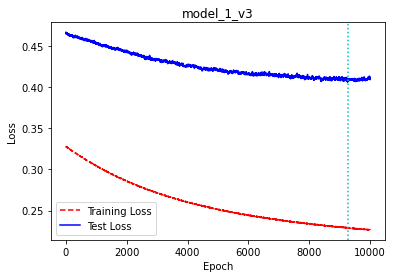

In [43]:
learning_rate = 0.001
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_1_v3'
model_l_v_e_filename = 'loss_vs_epochs_images/model_1_v3_le.png'
model_l_v_e_title = 'model_1_v3'
model_history_filename = 'history/history_model_1_v3'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 10000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [42]:
best_m1_v2 = load_model(model_filename)
evaluate_model(best_m1_v2, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8031

Test accuracy: 80.3%, test loss: 0.464396


In [41]:
output_filename_test_ds_labeled = 'test-ds-m1_v3.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


    Here we got the same results as before.    
   ##### MODEL 1: V4: 
       learning_rate = 0.005
       batch_size = 32
       optimizer: Adam
       Dense 128 parameters

Epoch 1/10000

Epoch 1: val_loss improved from inf to 0.69605, saving model to models\model_1_v4
INFO:tensorflow:Assets written to: models\model_1_v4\assets
25/25 - 1s - loss: 0.8634 - accuracy: 0.5850 - val_loss: 0.6960 - val_accuracy: 0.6995 - 667ms/epoch - 27ms/step
Epoch 2/10000

Epoch 2: val_loss improved from 0.69605 to 0.66208, saving model to models\model_1_v4
INFO:tensorflow:Assets written to: models\model_1_v4\assets
25/25 - 0s - loss: 0.7175 - accuracy: 0.6783 - val_loss: 0.6621 - val_accuracy: 0.6995 - 398ms/epoch - 16ms/step
Epoch 3/10000

Epoch 3: val_loss improved from 0.66208 to 0.61687, saving model to models\model_1_v4
INFO:tensorflow:Assets written to: models\model_1_v4\assets
25/25 - 0s - loss: 0.6437 - accuracy: 0.7237 - val_loss: 0.6169 - val_accuracy: 0.6995 - 383ms/epoch - 15ms/step
Epoch 4/10000

Epoch 4: val_loss improved from 0.61687 to 0.58789, saving model to models\model_1_v4
INFO:tensorflow:Assets written to: models\model_1_v4\assets
25/25 - 0s - loss: 0.

Epoch 39/10000

Epoch 39: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2557 - accuracy: 0.9027 - val_loss: 0.4587 - val_accuracy: 0.8446 - 59ms/epoch - 2ms/step
Epoch 40/10000

Epoch 40: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2815 - accuracy: 0.8872 - val_loss: 0.4422 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 41/10000

Epoch 41: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2555 - accuracy: 0.8794 - val_loss: 0.4102 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 42/10000

Epoch 42: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2458 - accuracy: 0.8794 - val_loss: 0.3995 - val_accuracy: 0.8135 - 70ms/epoch - 3ms/step
Epoch 43/10000

Epoch 43: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2609 - accuracy: 0.8755 - val_loss: 0.4016 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 44/10000

Epoch 44: val_loss did not improve from 0.39314
25/25 - 0s - loss: 0.2555 - accuracy: 0.8859 - val_loss: 0.42

Epoch 85/10000

Epoch 85: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2276 - accuracy: 0.8936 - val_loss: 0.4438 - val_accuracy: 0.8290 - 83ms/epoch - 3ms/step
Epoch 86/10000

Epoch 86: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2326 - accuracy: 0.8898 - val_loss: 0.4085 - val_accuracy: 0.8394 - 80ms/epoch - 3ms/step
Epoch 87/10000

Epoch 87: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2297 - accuracy: 0.8962 - val_loss: 0.4148 - val_accuracy: 0.8342 - 75ms/epoch - 3ms/step
Epoch 88/10000

Epoch 88: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2381 - accuracy: 0.8923 - val_loss: 0.4151 - val_accuracy: 0.8342 - 72ms/epoch - 3ms/step
Epoch 89/10000

Epoch 89: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2561 - accuracy: 0.8975 - val_loss: 0.3901 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 90/10000

Epoch 90: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2598 - accuracy: 0.8859 - val_loss: 0.39

Epoch 132/10000

Epoch 132: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2419 - accuracy: 0.8936 - val_loss: 0.4075 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 133/10000

Epoch 133: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2476 - accuracy: 0.8755 - val_loss: 0.4024 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 134/10000

Epoch 134: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2298 - accuracy: 0.8936 - val_loss: 0.3971 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 135/10000

Epoch 135: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2234 - accuracy: 0.8962 - val_loss: 0.3913 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 136/10000

Epoch 136: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2238 - accuracy: 0.8898 - val_loss: 0.3948 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 137/10000

Epoch 137: val_loss did not improve from 0.36969
25/25 - 0s - loss: 0.2217 - accuracy: 0.8949 - va

Epoch 178/10000

Epoch 178: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2195 - accuracy: 0.8949 - val_loss: 0.4297 - val_accuracy: 0.8342 - 72ms/epoch - 3ms/step
Epoch 179/10000

Epoch 179: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2195 - accuracy: 0.8820 - val_loss: 0.4037 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 180/10000

Epoch 180: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2215 - accuracy: 0.8949 - val_loss: 0.4134 - val_accuracy: 0.8446 - 74ms/epoch - 3ms/step
Epoch 181/10000

Epoch 181: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2169 - accuracy: 0.9001 - val_loss: 0.4075 - val_accuracy: 0.8342 - 71ms/epoch - 3ms/step
Epoch 182/10000

Epoch 182: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2198 - accuracy: 0.8885 - val_loss: 0.3982 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 183/10000

Epoch 183: val_loss did not improve from 0.35533
25/25 - 0s - loss: 0.2232 - accuracy: 0.8911 - va

Epoch 224/10000

Epoch 224: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2158 - accuracy: 0.8988 - val_loss: 0.3928 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 225/10000

Epoch 225: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2174 - accuracy: 0.8923 - val_loss: 0.3854 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 226/10000

Epoch 226: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2164 - accuracy: 0.9001 - val_loss: 0.3796 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 227/10000

Epoch 227: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2159 - accuracy: 0.8949 - val_loss: 0.4052 - val_accuracy: 0.8446 - 71ms/epoch - 3ms/step
Epoch 228/10000

Epoch 228: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2185 - accuracy: 0.9014 - val_loss: 0.3979 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 229/10000

Epoch 229: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2152 - accuracy: 0.8962 - va

25/25 - 0s - loss: 0.2179 - accuracy: 0.8962 - val_loss: 0.4068 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 271/10000

Epoch 271: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2222 - accuracy: 0.8885 - val_loss: 0.3803 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 272/10000

Epoch 272: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2302 - accuracy: 0.8833 - val_loss: 0.4117 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 273/10000

Epoch 273: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2207 - accuracy: 0.9001 - val_loss: 0.3957 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 274/10000

Epoch 274: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2175 - accuracy: 0.8962 - val_loss: 0.3861 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 275/10000

Epoch 275: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2160 - accuracy: 0.8962 - val_loss: 0.3882 - val_accuracy: 0.8187 - 67ms/epoch - 3ms/step
Epoc

Epoch 317/10000

Epoch 317: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2127 - accuracy: 0.8975 - val_loss: 0.3920 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 318/10000

Epoch 318: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2093 - accuracy: 0.8975 - val_loss: 0.3979 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 319/10000

Epoch 319: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2176 - accuracy: 0.8949 - val_loss: 0.4062 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 320/10000

Epoch 320: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2155 - accuracy: 0.8975 - val_loss: 0.3999 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 321/10000

Epoch 321: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2147 - accuracy: 0.8949 - val_loss: 0.3882 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 322/10000

Epoch 322: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2160 - accuracy: 0.8911 - va

25/25 - 0s - loss: 0.2096 - accuracy: 0.8988 - val_loss: 0.4164 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 364/10000

Epoch 364: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2141 - accuracy: 0.8988 - val_loss: 0.3824 - val_accuracy: 0.8342 - 68ms/epoch - 3ms/step
Epoch 365/10000

Epoch 365: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2145 - accuracy: 0.8975 - val_loss: 0.3944 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 366/10000

Epoch 366: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2107 - accuracy: 0.8988 - val_loss: 0.3870 - val_accuracy: 0.8342 - 73ms/epoch - 3ms/step
Epoch 367/10000

Epoch 367: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2098 - accuracy: 0.8975 - val_loss: 0.3970 - val_accuracy: 0.8342 - 66ms/epoch - 3ms/step
Epoch 368/10000

Epoch 368: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2117 - accuracy: 0.8923 - val_loss: 0.3990 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoc

Epoch 410/10000

Epoch 410: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2114 - accuracy: 0.8962 - val_loss: 0.3866 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 411/10000

Epoch 411: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2146 - accuracy: 0.8859 - val_loss: 0.3864 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 412/10000

Epoch 412: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2219 - accuracy: 0.8936 - val_loss: 0.3974 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 413/10000

Epoch 413: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2099 - accuracy: 0.9001 - val_loss: 0.3978 - val_accuracy: 0.8342 - 45ms/epoch - 2ms/step
Epoch 414/10000

Epoch 414: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2112 - accuracy: 0.8962 - val_loss: 0.3995 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 415/10000

Epoch 415: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2183 - accuracy: 0.8962 - va

25/25 - 0s - loss: 0.2154 - accuracy: 0.8962 - val_loss: 0.4142 - val_accuracy: 0.8290 - 84ms/epoch - 3ms/step
Epoch 457/10000

Epoch 457: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2115 - accuracy: 0.8962 - val_loss: 0.4188 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 458/10000

Epoch 458: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2086 - accuracy: 0.8898 - val_loss: 0.3965 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 459/10000

Epoch 459: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2079 - accuracy: 0.9001 - val_loss: 0.3890 - val_accuracy: 0.8342 - 69ms/epoch - 3ms/step
Epoch 460/10000

Epoch 460: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2083 - accuracy: 0.8962 - val_loss: 0.4002 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 461/10000

Epoch 461: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2119 - accuracy: 0.8923 - val_loss: 0.3699 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoc

Epoch 503/10000

Epoch 503: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2080 - accuracy: 0.8975 - val_loss: 0.4177 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 504/10000

Epoch 504: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2092 - accuracy: 0.8988 - val_loss: 0.4250 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 505/10000

Epoch 505: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2086 - accuracy: 0.9001 - val_loss: 0.4363 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 506/10000

Epoch 506: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2132 - accuracy: 0.8859 - val_loss: 0.4272 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 507/10000

Epoch 507: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2072 - accuracy: 0.9001 - val_loss: 0.4298 - val_accuracy: 0.8187 - 67ms/epoch - 3ms/step
Epoch 508/10000

Epoch 508: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2076 - accuracy: 0.8962 - va

25/25 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 0.4939 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 550/10000

Epoch 550: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.8975 - val_loss: 0.4966 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 551/10000

Epoch 551: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2078 - accuracy: 0.9001 - val_loss: 0.5037 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 552/10000

Epoch 552: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2061 - accuracy: 0.9040 - val_loss: 0.4927 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 553/10000

Epoch 553: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2071 - accuracy: 0.9001 - val_loss: 0.5250 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 554/10000

Epoch 554: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8988 - val_loss: 0.5308 - val_accuracy: 0.8187 - 63ms/epoch - 3ms/step
Epoc

Epoch 596/10000

Epoch 596: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 0.5587 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 597/10000

Epoch 597: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 0.5531 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 598/10000

Epoch 598: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 0.5570 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 599/10000

Epoch 599: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9001 - val_loss: 0.5680 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 600/10000

Epoch 600: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2090 - accuracy: 0.8949 - val_loss: 0.5543 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 601/10000

Epoch 601: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2078 - accuracy: 0.8988 - va

25/25 - 0s - loss: 0.2207 - accuracy: 0.9001 - val_loss: 0.6355 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 643/10000

Epoch 643: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2125 - accuracy: 0.8962 - val_loss: 0.6810 - val_accuracy: 0.8187 - 50ms/epoch - 2ms/step
Epoch 644/10000

Epoch 644: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2176 - accuracy: 0.9014 - val_loss: 0.6476 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 645/10000

Epoch 645: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 0.6839 - val_accuracy: 0.8187 - 78ms/epoch - 3ms/step
Epoch 646/10000

Epoch 646: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2132 - accuracy: 0.9027 - val_loss: 0.6652 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 647/10000

Epoch 647: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2072 - accuracy: 0.8988 - val_loss: 0.6616 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoc

Epoch 689/10000

Epoch 689: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.9001 - val_loss: 0.6967 - val_accuracy: 0.8187 - 68ms/epoch - 3ms/step
Epoch 690/10000

Epoch 690: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 0.6958 - val_accuracy: 0.8187 - 76ms/epoch - 3ms/step
Epoch 691/10000

Epoch 691: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 0.6777 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 692/10000

Epoch 692: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9001 - val_loss: 0.6820 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 693/10000

Epoch 693: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8975 - val_loss: 0.6715 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 694/10000

Epoch 694: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - va

25/25 - 0s - loss: 0.2070 - accuracy: 0.8975 - val_loss: 0.7531 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 736/10000

Epoch 736: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9001 - val_loss: 0.7497 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoch 737/10000

Epoch 737: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2059 - accuracy: 0.9027 - val_loss: 0.7258 - val_accuracy: 0.8342 - 65ms/epoch - 3ms/step
Epoch 738/10000

Epoch 738: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2069 - accuracy: 0.8975 - val_loss: 0.7270 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 739/10000

Epoch 739: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2065 - accuracy: 0.9040 - val_loss: 0.7365 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 740/10000

Epoch 740: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 0.7399 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoc

Epoch 782/10000

Epoch 782: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8975 - val_loss: 0.8231 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 783/10000

Epoch 783: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 0.7914 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 784/10000

Epoch 784: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8975 - val_loss: 0.8047 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 785/10000

Epoch 785: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9014 - val_loss: 0.8157 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 786/10000

Epoch 786: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 0.8165 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 787/10000

Epoch 787: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - va

25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 0.7812 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 829/10000

Epoch 829: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 0.7919 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 830/10000

Epoch 830: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9014 - val_loss: 0.7932 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 831/10000

Epoch 831: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.9027 - val_loss: 0.7772 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 832/10000

Epoch 832: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8975 - val_loss: 0.8130 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 833/10000

Epoch 833: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9027 - val_loss: 0.8198 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoc

Epoch 875/10000

Epoch 875: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9053 - val_loss: 0.7372 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 876/10000

Epoch 876: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9040 - val_loss: 0.7365 - val_accuracy: 0.8187 - 51ms/epoch - 2ms/step
Epoch 877/10000

Epoch 877: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8962 - val_loss: 0.7329 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 878/10000

Epoch 878: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8975 - val_loss: 0.7380 - val_accuracy: 0.8342 - 77ms/epoch - 3ms/step
Epoch 879/10000

Epoch 879: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 0.6862 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 880/10000

Epoch 880: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.8988 - va

25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 0.7085 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 922/10000

Epoch 922: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 0.7074 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 923/10000

Epoch 923: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 0.7054 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 924/10000

Epoch 924: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 0.7094 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 925/10000

Epoch 925: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 0.7081 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 926/10000

Epoch 926: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8988 - val_loss: 0.7131 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoc

Epoch 968/10000

Epoch 968: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9027 - val_loss: 0.6775 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 969/10000

Epoch 969: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9001 - val_loss: 0.6752 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 970/10000

Epoch 970: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 0.6832 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 971/10000

Epoch 971: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.8975 - val_loss: 0.6711 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 972/10000

Epoch 972: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9014 - val_loss: 0.6612 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 973/10000

Epoch 973: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.9027 - va

25/25 - 0s - loss: 0.2051 - accuracy: 0.9027 - val_loss: 0.7552 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 1015/10000

Epoch 1015: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 0.7485 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 1016/10000

Epoch 1016: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 0.7473 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 1017/10000

Epoch 1017: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 0.7363 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 1018/10000

Epoch 1018: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 0.7396 - val_accuracy: 0.8342 - 78ms/epoch - 3ms/step
Epoch 1019/10000

Epoch 1019: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 0.7345 - val_accuracy: 0.8290 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 0.6429 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 1061/10000

Epoch 1061: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 0.6474 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 1062/10000

Epoch 1062: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.8936 - val_loss: 0.6602 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 1063/10000

Epoch 1063: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.8936 - val_loss: 0.6584 - val_accuracy: 0.8342 - 70ms/epoch - 3ms/step
Epoch 1064/10000

Epoch 1064: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9014 - val_loss: 0.6566 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 1065/10000

Epoch 1065: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9040 - val_loss: 0.6372 - val_accuracy: 0.8290 - 70ms/epoch - 3ms

25/25 - 0s - loss: 0.2073 - accuracy: 0.8936 - val_loss: 0.7601 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 1107/10000

Epoch 1107: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2061 - accuracy: 0.8988 - val_loss: 0.7548 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 1108/10000

Epoch 1108: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2059 - accuracy: 0.8949 - val_loss: 0.7685 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 1109/10000

Epoch 1109: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.8988 - val_loss: 0.7691 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 1110/10000

Epoch 1110: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2055 - accuracy: 0.8962 - val_loss: 0.7114 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 1111/10000

Epoch 1111: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2058 - accuracy: 0.8975 - val_loss: 0.6980 - val_accuracy: 0.8187 - 73ms/epoch - 3ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.8975 - val_loss: 0.6989 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 1153/10000

Epoch 1153: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 0.7027 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 1154/10000

Epoch 1154: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 0.7083 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 1155/10000

Epoch 1155: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 0.7145 - val_accuracy: 0.8342 - 49ms/epoch - 2ms/step
Epoch 1156/10000

Epoch 1156: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 0.7133 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 1157/10000

Epoch 1157: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9001 - val_loss: 0.7103 - val_accuracy: 0.8238 - 47ms/epoch - 2ms

25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 0.7389 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 1199/10000

Epoch 1199: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 0.7379 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 1200/10000

Epoch 1200: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 0.7355 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 1201/10000

Epoch 1201: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 0.7565 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 1202/10000

Epoch 1202: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8988 - val_loss: 0.7685 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 1203/10000

Epoch 1203: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2068 - accuracy: 0.8962 - val_loss: 0.7372 - val_accuracy: 0.8187 - 55ms/epoch - 2ms

25/25 - 0s - loss: 0.2057 - accuracy: 0.9001 - val_loss: 0.7036 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 1245/10000

Epoch 1245: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9040 - val_loss: 0.6993 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 1246/10000

Epoch 1246: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 0.7029 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 1247/10000

Epoch 1247: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 0.7130 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 1248/10000

Epoch 1248: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8988 - val_loss: 0.7199 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 1249/10000

Epoch 1249: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 0.7154 - val_accuracy: 0.8342 - 62ms/epoch - 2ms

25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 0.7540 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 1291/10000

Epoch 1291: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8975 - val_loss: 0.7526 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 1292/10000

Epoch 1292: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 0.7568 - val_accuracy: 0.8342 - 61ms/epoch - 2ms/step
Epoch 1293/10000

Epoch 1293: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 0.7480 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 1294/10000

Epoch 1294: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 0.7564 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 1295/10000

Epoch 1295: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8962 - val_loss: 0.7532 - val_accuracy: 0.8290 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 0.7376 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 1337/10000

Epoch 1337: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 0.7447 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 1338/10000

Epoch 1338: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.8975 - val_loss: 0.7579 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 1339/10000

Epoch 1339: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.8988 - val_loss: 0.7536 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 1340/10000

Epoch 1340: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9014 - val_loss: 0.7527 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 1341/10000

Epoch 1341: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9001 - val_loss: 0.7614 - val_accuracy: 0.8290 - 54ms/epoch - 2ms

25/25 - 0s - loss: 0.2070 - accuracy: 0.9001 - val_loss: 0.7521 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 1383/10000

Epoch 1383: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - val_loss: 0.7435 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 1384/10000

Epoch 1384: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9027 - val_loss: 0.7565 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 1385/10000

Epoch 1385: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8911 - val_loss: 0.7856 - val_accuracy: 0.8083 - 64ms/epoch - 3ms/step
Epoch 1386/10000

Epoch 1386: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.8962 - val_loss: 0.7771 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 1387/10000

Epoch 1387: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9040 - val_loss: 0.7953 - val_accuracy: 0.8290 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 0.8110 - val_accuracy: 0.8187 - 66ms/epoch - 3ms/step
Epoch 1429/10000

Epoch 1429: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2132 - accuracy: 0.9001 - val_loss: 0.8169 - val_accuracy: 0.8187 - 73ms/epoch - 3ms/step
Epoch 1430/10000

Epoch 1430: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9027 - val_loss: 0.8094 - val_accuracy: 0.8187 - 57ms/epoch - 2ms/step
Epoch 1431/10000

Epoch 1431: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9027 - val_loss: 0.8158 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoch 1432/10000

Epoch 1432: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 0.8201 - val_accuracy: 0.8187 - 66ms/epoch - 3ms/step
Epoch 1433/10000

Epoch 1433: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.8988 - val_loss: 0.7469 - val_accuracy: 0.8238 - 69ms/epoch - 3ms

25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 0.7977 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 1475/10000

Epoch 1475: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 0.7933 - val_accuracy: 0.8187 - 54ms/epoch - 2ms/step
Epoch 1476/10000

Epoch 1476: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9027 - val_loss: 0.7916 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 1477/10000

Epoch 1477: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 0.7867 - val_accuracy: 0.8187 - 55ms/epoch - 2ms/step
Epoch 1478/10000

Epoch 1478: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2083 - accuracy: 0.9014 - val_loss: 0.7938 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 1479/10000

Epoch 1479: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2057 - accuracy: 0.9014 - val_loss: 0.7812 - val_accuracy: 0.8238 - 56ms/epoch - 2ms

25/25 - 0s - loss: 0.2028 - accuracy: 0.9040 - val_loss: 0.8102 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 1521/10000

Epoch 1521: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 0.8078 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 1522/10000

Epoch 1522: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 0.8151 - val_accuracy: 0.8187 - 52ms/epoch - 2ms/step
Epoch 1523/10000

Epoch 1523: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 0.8191 - val_accuracy: 0.8187 - 50ms/epoch - 2ms/step
Epoch 1524/10000

Epoch 1524: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 0.8112 - val_accuracy: 0.8187 - 54ms/epoch - 2ms/step
Epoch 1525/10000

Epoch 1525: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 0.8188 - val_accuracy: 0.8187 - 56ms/epoch - 2ms

25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 0.8177 - val_accuracy: 0.8187 - 52ms/epoch - 2ms/step
Epoch 1567/10000

Epoch 1567: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.8988 - val_loss: 0.8187 - val_accuracy: 0.8187 - 53ms/epoch - 2ms/step
Epoch 1568/10000

Epoch 1568: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.8988 - val_loss: 0.8061 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 1569/10000

Epoch 1569: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 0.8072 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 1570/10000

Epoch 1570: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 0.8235 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 1571/10000

Epoch 1571: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 0.8273 - val_accuracy: 0.8238 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 0.8561 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 1613/10000

Epoch 1613: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 0.8378 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 1614/10000

Epoch 1614: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 0.8507 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 1615/10000

Epoch 1615: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 0.8592 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 1616/10000

Epoch 1616: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 0.8704 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 1617/10000

Epoch 1617: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 0.8620 - val_accuracy: 0.8290 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2016 - accuracy: 0.9014 - val_loss: 0.8968 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoch 1659/10000

Epoch 1659: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2014 - accuracy: 0.9001 - val_loss: 0.8926 - val_accuracy: 0.8187 - 61ms/epoch - 2ms/step
Epoch 1660/10000

Epoch 1660: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2016 - accuracy: 0.9001 - val_loss: 0.9089 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 1661/10000

Epoch 1661: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 0.9073 - val_accuracy: 0.8187 - 70ms/epoch - 3ms/step
Epoch 1662/10000

Epoch 1662: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8975 - val_loss: 0.9210 - val_accuracy: 0.8187 - 79ms/epoch - 3ms/step
Epoch 1663/10000

Epoch 1663: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9014 - val_loss: 0.9039 - val_accuracy: 0.8187 - 77ms/epoch - 3ms

25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 0.9267 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 1705/10000

Epoch 1705: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 0.9072 - val_accuracy: 0.8238 - 79ms/epoch - 3ms/step
Epoch 1706/10000

Epoch 1706: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8988 - val_loss: 0.8996 - val_accuracy: 0.8238 - 87ms/epoch - 3ms/step
Epoch 1707/10000

Epoch 1707: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2014 - accuracy: 0.9027 - val_loss: 0.8958 - val_accuracy: 0.8290 - 89ms/epoch - 4ms/step
Epoch 1708/10000

Epoch 1708: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 0.8991 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 1709/10000

Epoch 1709: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9053 - val_loss: 0.9094 - val_accuracy: 0.8187 - 82ms/epoch - 3ms

25/25 - 0s - loss: 0.2017 - accuracy: 0.8988 - val_loss: 0.9321 - val_accuracy: 0.8187 - 70ms/epoch - 3ms/step
Epoch 1751/10000

Epoch 1751: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9040 - val_loss: 0.9417 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 1752/10000

Epoch 1752: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 0.9297 - val_accuracy: 0.8290 - 83ms/epoch - 3ms/step
Epoch 1753/10000

Epoch 1753: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 0.9352 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 1754/10000

Epoch 1754: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 0.9274 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 1755/10000

Epoch 1755: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 0.9277 - val_accuracy: 0.8290 - 64ms/epoch - 3ms

25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 0.8588 - val_accuracy: 0.8290 - 88ms/epoch - 4ms/step
Epoch 1797/10000

Epoch 1797: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 0.8507 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 1798/10000

Epoch 1798: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 0.8531 - val_accuracy: 0.8290 - 80ms/epoch - 3ms/step
Epoch 1799/10000

Epoch 1799: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 0.8655 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 1800/10000

Epoch 1800: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 0.8656 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 1801/10000

Epoch 1801: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.8988 - val_loss: 0.8541 - val_accuracy: 0.8342 - 53ms/epoch - 2ms

25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 0.9374 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 1843/10000

Epoch 1843: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8975 - val_loss: 0.9463 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 1844/10000

Epoch 1844: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 0.9424 - val_accuracy: 0.8394 - 80ms/epoch - 3ms/step
Epoch 1845/10000

Epoch 1845: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8962 - val_loss: 0.9456 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 1846/10000

Epoch 1846: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 0.9415 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 1847/10000

Epoch 1847: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.9014 - val_loss: 0.9418 - val_accuracy: 0.8342 - 76ms/epoch - 3ms

25/25 - 0s - loss: 0.2019 - accuracy: 0.9027 - val_loss: 0.9933 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 1889/10000

Epoch 1889: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2013 - accuracy: 0.9001 - val_loss: 0.9997 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 1890/10000

Epoch 1890: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9014 - val_loss: 0.9997 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 1891/10000

Epoch 1891: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.8988 - val_loss: 0.9967 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 1892/10000

Epoch 1892: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.0139 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 1893/10000

Epoch 1893: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9014 - val_loss: 1.0584 - val_accuracy: 0.8238 - 64ms/epoch - 3ms

25/25 - 0s - loss: 0.2123 - accuracy: 0.8975 - val_loss: 0.9548 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 1935/10000

Epoch 1935: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2122 - accuracy: 0.8988 - val_loss: 0.9645 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 1936/10000

Epoch 1936: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2140 - accuracy: 0.8988 - val_loss: 0.9701 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 1937/10000

Epoch 1937: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2115 - accuracy: 0.8988 - val_loss: 0.9701 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 1938/10000

Epoch 1938: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2123 - accuracy: 0.9001 - val_loss: 0.9835 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 1939/10000

Epoch 1939: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2105 - accuracy: 0.8988 - val_loss: 0.9736 - val_accuracy: 0.8290 - 56ms/epoch - 2ms

25/25 - 0s - loss: 0.2082 - accuracy: 0.8975 - val_loss: 1.0060 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 1981/10000

Epoch 1981: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2076 - accuracy: 0.9027 - val_loss: 1.0157 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 1982/10000

Epoch 1982: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2081 - accuracy: 0.9001 - val_loss: 1.0172 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 1983/10000

Epoch 1983: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2073 - accuracy: 0.9027 - val_loss: 1.0189 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 1984/10000

Epoch 1984: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2073 - accuracy: 0.9001 - val_loss: 1.0191 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 1985/10000

Epoch 1985: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2073 - accuracy: 0.9027 - val_loss: 1.0195 - val_accuracy: 0.8290 - 80ms/epoch - 3ms

25/25 - 0s - loss: 0.2032 - accuracy: 0.8949 - val_loss: 1.0153 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 2027/10000

Epoch 2027: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9027 - val_loss: 1.0116 - val_accuracy: 0.8342 - 53ms/epoch - 2ms/step
Epoch 2028/10000

Epoch 2028: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.0032 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 2029/10000

Epoch 2029: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.0014 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 2030/10000

Epoch 2030: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8962 - val_loss: 1.0159 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 2031/10000

Epoch 2031: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.0259 - val_accuracy: 0.8238 - 79ms/epoch - 3ms

25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.0072 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 2073/10000

Epoch 2073: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.0164 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 2074/10000

Epoch 2074: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.0225 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 2075/10000

Epoch 2075: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2016 - accuracy: 0.9027 - val_loss: 1.0179 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 2076/10000

Epoch 2076: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.0167 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 2077/10000

Epoch 2077: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.0230 - val_accuracy: 0.8290 - 75ms/epoch - 3ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.8975 - val_loss: 1.0688 - val_accuracy: 0.8342 - 138ms/epoch - 6ms/step
Epoch 2119/10000

Epoch 2119: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.0588 - val_accuracy: 0.8342 - 113ms/epoch - 5ms/step
Epoch 2120/10000

Epoch 2120: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.0594 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 2121/10000

Epoch 2121: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.0572 - val_accuracy: 0.8342 - 51ms/epoch - 2ms/step
Epoch 2122/10000

Epoch 2122: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8975 - val_loss: 1.0643 - val_accuracy: 0.8342 - 46ms/epoch - 2ms/step
Epoch 2123/10000

Epoch 2123: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.9027 - val_loss: 1.0596 - val_accuracy: 0.8342 - 61ms/epoch - 2

25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.1249 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 2165/10000

Epoch 2165: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.1086 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 2166/10000

Epoch 2166: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2014 - accuracy: 0.9027 - val_loss: 1.0996 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 2167/10000

Epoch 2167: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9027 - val_loss: 1.1012 - val_accuracy: 0.8238 - 84ms/epoch - 3ms/step
Epoch 2168/10000

Epoch 2168: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.1093 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 2169/10000

Epoch 2169: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.8975 - val_loss: 1.1040 - val_accuracy: 0.8342 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 1.1114 - val_accuracy: 0.8238 - 62ms/epoch - 2ms/step
Epoch 2211/10000

Epoch 2211: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2013 - accuracy: 0.9027 - val_loss: 1.1080 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 2212/10000

Epoch 2212: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.8988 - val_loss: 1.1103 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 2213/10000

Epoch 2213: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2014 - accuracy: 0.9014 - val_loss: 1.1145 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 2214/10000

Epoch 2214: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8975 - val_loss: 1.1173 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 2215/10000

Epoch 2215: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2012 - accuracy: 0.8975 - val_loss: 1.1194 - val_accuracy: 0.8238 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.1482 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 2257/10000

Epoch 2257: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.9027 - val_loss: 1.1300 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 2258/10000

Epoch 2258: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9027 - val_loss: 1.1514 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 2259/10000

Epoch 2259: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2010 - accuracy: 0.9027 - val_loss: 1.1452 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 2260/10000

Epoch 2260: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2015 - accuracy: 0.9014 - val_loss: 1.1434 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 2261/10000

Epoch 2261: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.1336 - val_accuracy: 0.8342 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2100 - accuracy: 0.8962 - val_loss: 1.0927 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 2303/10000

Epoch 2303: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2095 - accuracy: 0.8975 - val_loss: 1.0894 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 2304/10000

Epoch 2304: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2086 - accuracy: 0.9014 - val_loss: 1.0792 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 2305/10000

Epoch 2305: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2092 - accuracy: 0.9027 - val_loss: 1.0962 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 2306/10000

Epoch 2306: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2081 - accuracy: 0.9001 - val_loss: 1.1072 - val_accuracy: 0.8238 - 44ms/epoch - 2ms/step
Epoch 2307/10000

Epoch 2307: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2079 - accuracy: 0.9014 - val_loss: 1.1130 - val_accuracy: 0.8290 - 50ms/epoch - 2ms

25/25 - 0s - loss: 0.2054 - accuracy: 0.9027 - val_loss: 1.1926 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 2349/10000

Epoch 2349: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy: 0.9027 - val_loss: 1.1907 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 2350/10000

Epoch 2350: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy: 0.9027 - val_loss: 1.1789 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 2351/10000

Epoch 2351: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy: 0.9027 - val_loss: 1.1778 - val_accuracy: 0.8290 - 42ms/epoch - 2ms/step
Epoch 2352/10000

Epoch 2352: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2065 - accuracy: 0.9027 - val_loss: 1.1936 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 2353/10000

Epoch 2353: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2058 - accuracy: 0.9001 - val_loss: 1.1628 - val_accuracy: 0.8290 - 65ms/epoch - 3ms

25/25 - 0s - loss: 0.2054 - accuracy: 0.8988 - val_loss: 1.2449 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 2395/10000

Epoch 2395: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2077 - accuracy: 0.9014 - val_loss: 1.2201 - val_accuracy: 0.8342 - 51ms/epoch - 2ms/step
Epoch 2396/10000

Epoch 2396: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.8988 - val_loss: 1.2859 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 2397/10000

Epoch 2397: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2144 - accuracy: 0.8988 - val_loss: 1.2172 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 2398/10000

Epoch 2398: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.8988 - val_loss: 1.2315 - val_accuracy: 0.8342 - 47ms/epoch - 2ms/step
Epoch 2399/10000

Epoch 2399: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2059 - accuracy: 0.9014 - val_loss: 1.2150 - val_accuracy: 0.8290 - 59ms/epoch - 2ms

25/25 - 0s - loss: 0.2037 - accuracy: 0.8988 - val_loss: 1.1998 - val_accuracy: 0.8342 - 46ms/epoch - 2ms/step
Epoch 2441/10000

Epoch 2441: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9014 - val_loss: 1.1896 - val_accuracy: 0.8238 - 49ms/epoch - 2ms/step
Epoch 2442/10000

Epoch 2442: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.1917 - val_accuracy: 0.8238 - 46ms/epoch - 2ms/step
Epoch 2443/10000

Epoch 2443: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9014 - val_loss: 1.1892 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 2444/10000

Epoch 2444: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9014 - val_loss: 1.2585 - val_accuracy: 0.8238 - 45ms/epoch - 2ms/step
Epoch 2445/10000

Epoch 2445: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.2232 - val_accuracy: 0.8342 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.1995 - val_accuracy: 0.8342 - 95ms/epoch - 4ms/step
Epoch 2487/10000

Epoch 2487: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.2003 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 2488/10000

Epoch 2488: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9014 - val_loss: 1.1982 - val_accuracy: 0.8290 - 82ms/epoch - 3ms/step
Epoch 2489/10000

Epoch 2489: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8911 - val_loss: 1.2280 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 2490/10000

Epoch 2490: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.2184 - val_accuracy: 0.8342 - 83ms/epoch - 3ms/step
Epoch 2491/10000

Epoch 2491: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.2035 - val_accuracy: 0.8342 - 106ms/epoch - 4m

25/25 - 0s - loss: 0.2036 - accuracy: 0.8975 - val_loss: 1.2296 - val_accuracy: 0.8290 - 82ms/epoch - 3ms/step
Epoch 2533/10000

Epoch 2533: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_loss: 1.2963 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 2534/10000

Epoch 2534: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.2996 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 2535/10000

Epoch 2535: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.8962 - val_loss: 1.2679 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 2536/10000

Epoch 2536: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.2550 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 2537/10000

Epoch 2537: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.2654 - val_accuracy: 0.8290 - 78ms/epoch - 3ms

25/25 - 0s - loss: 0.2038 - accuracy: 0.8962 - val_loss: 1.2011 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 2579/10000

Epoch 2579: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.1920 - val_accuracy: 0.8238 - 56ms/epoch - 2ms/step
Epoch 2580/10000

Epoch 2580: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.2033 - val_accuracy: 0.8238 - 58ms/epoch - 2ms/step
Epoch 2581/10000

Epoch 2581: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8962 - val_loss: 1.2062 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 2582/10000

Epoch 2582: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8975 - val_loss: 1.2053 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 2583/10000

Epoch 2583: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8975 - val_loss: 1.2138 - val_accuracy: 0.8238 - 63ms/epoch - 3ms

25/25 - 0s - loss: 0.2031 - accuracy: 0.8975 - val_loss: 1.1877 - val_accuracy: 0.8342 - 82ms/epoch - 3ms/step
Epoch 2625/10000

Epoch 2625: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.1432 - val_accuracy: 0.8290 - 87ms/epoch - 3ms/step
Epoch 2626/10000

Epoch 2626: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.1582 - val_accuracy: 0.8290 - 97ms/epoch - 4ms/step
Epoch 2627/10000

Epoch 2627: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8988 - val_loss: 1.1645 - val_accuracy: 0.8238 - 81ms/epoch - 3ms/step
Epoch 2628/10000

Epoch 2628: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.1849 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 2629/10000

Epoch 2629: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.2543 - val_accuracy: 0.8394 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2017 - accuracy: 0.8988 - val_loss: 1.2171 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 2671/10000

Epoch 2671: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.2163 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 2672/10000

Epoch 2672: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.2366 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 2673/10000

Epoch 2673: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.2145 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 2674/10000

Epoch 2674: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8962 - val_loss: 1.2209 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 2675/10000

Epoch 2675: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.2281 - val_accuracy: 0.8394 - 69ms/epoch - 3ms

25/25 - 0s - loss: 0.2027 - accuracy: 0.8975 - val_loss: 1.2248 - val_accuracy: 0.8238 - 56ms/epoch - 2ms/step
Epoch 2717/10000

Epoch 2717: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9053 - val_loss: 1.2209 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 2718/10000

Epoch 2718: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9040 - val_loss: 1.2200 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 2719/10000

Epoch 2719: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.8949 - val_loss: 1.2257 - val_accuracy: 0.8342 - 53ms/epoch - 2ms/step
Epoch 2720/10000

Epoch 2720: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.2269 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 2721/10000

Epoch 2721: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8975 - val_loss: 1.2270 - val_accuracy: 0.8342 - 56ms/epoch - 2ms

25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.1923 - val_accuracy: 0.8238 - 61ms/epoch - 2ms/step
Epoch 2763/10000

Epoch 2763: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.1996 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 2764/10000

Epoch 2764: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.1776 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 2765/10000

Epoch 2765: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.1990 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 2766/10000

Epoch 2766: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.2584 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 2767/10000

Epoch 2767: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.2335 - val_accuracy: 0.8238 - 58ms/epoch - 2ms

25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.2113 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 2809/10000

Epoch 2809: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.2373 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 2810/10000

Epoch 2810: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.2489 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 2811/10000

Epoch 2811: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.2405 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 2812/10000

Epoch 2812: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.2617 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 2813/10000

Epoch 2813: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.3409 - val_accuracy: 0.8290 - 55ms/epoch - 2ms

25/25 - 0s - loss: 0.2032 - accuracy: 0.8975 - val_loss: 1.2910 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 2855/10000

Epoch 2855: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.2622 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 2856/10000

Epoch 2856: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.2742 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 2857/10000

Epoch 2857: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9001 - val_loss: 1.2830 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 2858/10000

Epoch 2858: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.2913 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 2859/10000

Epoch 2859: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.3146 - val_accuracy: 0.8238 - 78ms/epoch - 3ms

25/25 - 0s - loss: 0.2046 - accuracy: 0.9014 - val_loss: 1.3282 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 2901/10000

Epoch 2901: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.3415 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 2902/10000

Epoch 2902: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.3424 - val_accuracy: 0.8238 - 71ms/epoch - 3ms/step
Epoch 2903/10000

Epoch 2903: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.3445 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 2904/10000

Epoch 2904: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8936 - val_loss: 1.3587 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 2905/10000

Epoch 2905: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_loss: 1.3355 - val_accuracy: 0.8290 - 54ms/epoch - 2ms

25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.3856 - val_accuracy: 0.8187 - 83ms/epoch - 3ms/step
Epoch 2947/10000

Epoch 2947: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.3861 - val_accuracy: 0.8135 - 73ms/epoch - 3ms/step
Epoch 2948/10000

Epoch 2948: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.3938 - val_accuracy: 0.8187 - 55ms/epoch - 2ms/step
Epoch 2949/10000

Epoch 2949: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.3813 - val_accuracy: 0.8135 - 42ms/epoch - 2ms/step
Epoch 2950/10000

Epoch 2950: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.4584 - val_accuracy: 0.8135 - 56ms/epoch - 2ms/step
Epoch 2951/10000

Epoch 2951: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.3830 - val_accuracy: 0.8135 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.3232 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 2993/10000

Epoch 2993: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.3366 - val_accuracy: 0.8342 - 75ms/epoch - 3ms/step
Epoch 2994/10000

Epoch 2994: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8936 - val_loss: 1.3473 - val_accuracy: 0.8238 - 76ms/epoch - 3ms/step
Epoch 2995/10000

Epoch 2995: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9027 - val_loss: 1.3596 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 2996/10000

Epoch 2996: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.3756 - val_accuracy: 0.8135 - 68ms/epoch - 3ms/step
Epoch 2997/10000

Epoch 2997: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.3831 - val_accuracy: 0.8135 - 67ms/epoch - 3ms

25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.4468 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3039/10000

Epoch 3039: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9001 - val_loss: 1.4408 - val_accuracy: 0.8238 - 56ms/epoch - 2ms/step
Epoch 3040/10000

Epoch 3040: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.4298 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 3041/10000

Epoch 3041: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.4435 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 3042/10000

Epoch 3042: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.4492 - val_accuracy: 0.8342 - 71ms/epoch - 3ms/step
Epoch 3043/10000

Epoch 3043: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.4259 - val_accuracy: 0.8238 - 70ms/epoch - 3ms

25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.4035 - val_accuracy: 0.8083 - 57ms/epoch - 2ms/step
Epoch 3085/10000

Epoch 3085: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.3765 - val_accuracy: 0.8083 - 54ms/epoch - 2ms/step
Epoch 3086/10000

Epoch 3086: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2013 - accuracy: 0.9040 - val_loss: 1.4785 - val_accuracy: 0.8083 - 63ms/epoch - 3ms/step
Epoch 3087/10000

Epoch 3087: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8988 - val_loss: 1.4814 - val_accuracy: 0.8083 - 68ms/epoch - 3ms/step
Epoch 3088/10000

Epoch 3088: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.4565 - val_accuracy: 0.8135 - 74ms/epoch - 3ms/step
Epoch 3089/10000

Epoch 3089: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8988 - val_loss: 1.4569 - val_accuracy: 0.8083 - 69ms/epoch - 3ms

25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.4594 - val_accuracy: 0.8083 - 48ms/epoch - 2ms/step
Epoch 3131/10000

Epoch 3131: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.5504 - val_accuracy: 0.8187 - 57ms/epoch - 2ms/step
Epoch 3132/10000

Epoch 3132: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8936 - val_loss: 1.5447 - val_accuracy: 0.8083 - 116ms/epoch - 5ms/step
Epoch 3133/10000

Epoch 3133: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8975 - val_loss: 1.5147 - val_accuracy: 0.8083 - 66ms/epoch - 3ms/step
Epoch 3134/10000

Epoch 3134: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.5101 - val_accuracy: 0.8187 - 49ms/epoch - 2ms/step
Epoch 3135/10000

Epoch 3135: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.5098 - val_accuracy: 0.8135 - 57ms/epoch - 2m

25/25 - 0s - loss: 0.2018 - accuracy: 0.9027 - val_loss: 1.5081 - val_accuracy: 0.8135 - 66ms/epoch - 3ms/step
Epoch 3177/10000

Epoch 3177: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.8988 - val_loss: 1.5109 - val_accuracy: 0.8135 - 63ms/epoch - 3ms/step
Epoch 3178/10000

Epoch 3178: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2016 - accuracy: 0.9027 - val_loss: 1.4954 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 3179/10000

Epoch 3179: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2016 - accuracy: 0.8949 - val_loss: 1.4937 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 3180/10000

Epoch 3180: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.8988 - val_loss: 1.4093 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3181/10000

Epoch 3181: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.4102 - val_accuracy: 0.8187 - 65ms/epoch - 3ms

25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.3747 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 3223/10000

Epoch 3223: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.3787 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 3224/10000

Epoch 3224: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2012 - accuracy: 0.9001 - val_loss: 1.3724 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 3225/10000

Epoch 3225: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.3662 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3226/10000

Epoch 3226: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.3656 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 3227/10000

Epoch 3227: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8988 - val_loss: 1.3602 - val_accuracy: 0.8290 - 60ms/epoch - 2ms

25/25 - 0s - loss: 0.2032 - accuracy: 0.9040 - val_loss: 1.3564 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 3269/10000

Epoch 3269: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.3576 - val_accuracy: 0.8238 - 47ms/epoch - 2ms/step
Epoch 3270/10000

Epoch 3270: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.3561 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3271/10000

Epoch 3271: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.3547 - val_accuracy: 0.8342 - 51ms/epoch - 2ms/step
Epoch 3272/10000

Epoch 3272: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.3573 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 3273/10000

Epoch 3273: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9027 - val_loss: 1.3570 - val_accuracy: 0.8238 - 87ms/epoch - 3ms

25/25 - 0s - loss: 0.2053 - accuracy: 0.9001 - val_loss: 1.4281 - val_accuracy: 0.8290 - 88ms/epoch - 4ms/step
Epoch 3315/10000

Epoch 3315: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9014 - val_loss: 1.4254 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3316/10000

Epoch 3316: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9014 - val_loss: 1.4254 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 3317/10000

Epoch 3317: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 1.4350 - val_accuracy: 0.8238 - 44ms/epoch - 2ms/step
Epoch 3318/10000

Epoch 3318: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8975 - val_loss: 1.4319 - val_accuracy: 0.8238 - 42ms/epoch - 2ms/step
Epoch 3319/10000

Epoch 3319: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.9001 - val_loss: 1.4305 - val_accuracy: 0.8187 - 49ms/epoch - 2ms

25/25 - 0s - loss: 0.2056 - accuracy: 0.9001 - val_loss: 1.4806 - val_accuracy: 0.8187 - 63ms/epoch - 3ms/step
Epoch 3361/10000

Epoch 3361: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2057 - accuracy: 0.8988 - val_loss: 1.4780 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 3362/10000

Epoch 3362: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9014 - val_loss: 1.4783 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 3363/10000

Epoch 3363: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8988 - val_loss: 1.4531 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 3364/10000

Epoch 3364: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.8988 - val_loss: 1.4701 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 3365/10000

Epoch 3365: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.4492 - val_accuracy: 0.8290 - 73ms/epoch - 3ms

25/25 - 0s - loss: 0.2038 - accuracy: 0.9014 - val_loss: 1.5320 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 3407/10000

Epoch 3407: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.8962 - val_loss: 1.5365 - val_accuracy: 0.8238 - 50ms/epoch - 2ms/step
Epoch 3408/10000

Epoch 3408: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9027 - val_loss: 1.5397 - val_accuracy: 0.8187 - 52ms/epoch - 2ms/step
Epoch 3409/10000

Epoch 3409: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - val_loss: 1.5524 - val_accuracy: 0.8187 - 53ms/epoch - 2ms/step
Epoch 3410/10000

Epoch 3410: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9014 - val_loss: 1.5490 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 3411/10000

Epoch 3411: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9040 - val_loss: 1.5331 - val_accuracy: 0.8290 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.6009 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 3453/10000

Epoch 3453: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9014 - val_loss: 1.6039 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 3454/10000

Epoch 3454: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.8988 - val_loss: 1.6013 - val_accuracy: 0.8187 - 73ms/epoch - 3ms/step
Epoch 3455/10000

Epoch 3455: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.6167 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 3456/10000

Epoch 3456: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.8988 - val_loss: 1.6215 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 3457/10000

Epoch 3457: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9027 - val_loss: 1.6120 - val_accuracy: 0.8238 - 48ms/epoch - 2ms

25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 1.4492 - val_accuracy: 0.8187 - 51ms/epoch - 2ms/step
Epoch 3499/10000

Epoch 3499: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8975 - val_loss: 1.4389 - val_accuracy: 0.8187 - 55ms/epoch - 2ms/step
Epoch 3500/10000

Epoch 3500: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.8988 - val_loss: 1.4559 - val_accuracy: 0.8187 - 63ms/epoch - 3ms/step
Epoch 3501/10000

Epoch 3501: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8975 - val_loss: 1.4422 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 3502/10000

Epoch 3502: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.4486 - val_accuracy: 0.8187 - 73ms/epoch - 3ms/step
Epoch 3503/10000

Epoch 3503: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8949 - val_loss: 1.4515 - val_accuracy: 0.8187 - 62ms/epoch - 2ms

25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.4940 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 3545/10000

Epoch 3545: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.8975 - val_loss: 1.4828 - val_accuracy: 0.8238 - 47ms/epoch - 2ms/step
Epoch 3546/10000

Epoch 3546: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9001 - val_loss: 1.4819 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 3547/10000

Epoch 3547: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9001 - val_loss: 1.4763 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 3548/10000

Epoch 3548: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.4830 - val_accuracy: 0.8187 - 50ms/epoch - 2ms/step
Epoch 3549/10000

Epoch 3549: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.4781 - val_accuracy: 0.8238 - 58ms/epoch - 2ms

25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.5007 - val_accuracy: 0.8342 - 93ms/epoch - 4ms/step
Epoch 3591/10000

Epoch 3591: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9001 - val_loss: 1.4981 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 3592/10000

Epoch 3592: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.4983 - val_accuracy: 0.8342 - 51ms/epoch - 2ms/step
Epoch 3593/10000

Epoch 3593: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 1.4957 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 3594/10000

Epoch 3594: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9001 - val_loss: 1.5099 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3595/10000

Epoch 3595: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8949 - val_loss: 1.5105 - val_accuracy: 0.8238 - 58ms/epoch - 2ms

25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5232 - val_accuracy: 0.8187 - 56ms/epoch - 2ms/step
Epoch 3637/10000

Epoch 3637: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5274 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 3638/10000

Epoch 3638: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.9027 - val_loss: 1.5453 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 3639/10000

Epoch 3639: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.5480 - val_accuracy: 0.8187 - 56ms/epoch - 2ms/step
Epoch 3640/10000

Epoch 3640: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5494 - val_accuracy: 0.8187 - 67ms/epoch - 3ms/step
Epoch 3641/10000

Epoch 3641: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8988 - val_loss: 1.5459 - val_accuracy: 0.8187 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2035 - accuracy: 0.8975 - val_loss: 1.5888 - val_accuracy: 0.8238 - 49ms/epoch - 2ms/step
Epoch 3683/10000

Epoch 3683: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.5696 - val_accuracy: 0.8238 - 51ms/epoch - 2ms/step
Epoch 3684/10000

Epoch 3684: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8988 - val_loss: 1.5628 - val_accuracy: 0.8290 - 52ms/epoch - 2ms/step
Epoch 3685/10000

Epoch 3685: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5696 - val_accuracy: 0.8187 - 52ms/epoch - 2ms/step
Epoch 3686/10000

Epoch 3686: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2118 - accuracy: 0.9001 - val_loss: 1.4737 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 3687/10000

Epoch 3687: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.4735 - val_accuracy: 0.8187 - 51ms/epoch - 2ms

25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.4810 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 3729/10000

Epoch 3729: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 1.4657 - val_accuracy: 0.8342 - 65ms/epoch - 3ms/step
Epoch 3730/10000

Epoch 3730: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9040 - val_loss: 1.4802 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 3731/10000

Epoch 3731: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.4798 - val_accuracy: 0.8238 - 73ms/epoch - 3ms/step
Epoch 3732/10000

Epoch 3732: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8949 - val_loss: 1.4795 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 3733/10000

Epoch 3733: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.4764 - val_accuracy: 0.8290 - 65ms/epoch - 3ms

25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.4723 - val_accuracy: 0.8187 - 70ms/epoch - 3ms/step
Epoch 3775/10000

Epoch 3775: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9027 - val_loss: 1.4623 - val_accuracy: 0.8187 - 77ms/epoch - 3ms/step
Epoch 3776/10000

Epoch 3776: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9014 - val_loss: 1.4969 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 3777/10000

Epoch 3777: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.4958 - val_accuracy: 0.8187 - 65ms/epoch - 3ms/step
Epoch 3778/10000

Epoch 3778: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9014 - val_loss: 1.4987 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 3779/10000

Epoch 3779: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.8975 - val_loss: 1.4725 - val_accuracy: 0.8238 - 66ms/epoch - 3ms

25/25 - 0s - loss: 0.2043 - accuracy: 0.8975 - val_loss: 1.5488 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 3821/10000

Epoch 3821: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.5509 - val_accuracy: 0.8187 - 68ms/epoch - 3ms/step
Epoch 3822/10000

Epoch 3822: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.5675 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 3823/10000

Epoch 3823: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.8988 - val_loss: 1.5607 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 3824/10000

Epoch 3824: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.5619 - val_accuracy: 0.8187 - 76ms/epoch - 3ms/step
Epoch 3825/10000

Epoch 3825: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.5643 - val_accuracy: 0.8238 - 73ms/epoch - 3ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.9040 - val_loss: 1.5880 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 3867/10000

Epoch 3867: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.5788 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 3868/10000

Epoch 3868: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9014 - val_loss: 1.5634 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 3869/10000

Epoch 3869: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8988 - val_loss: 1.5383 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 3870/10000

Epoch 3870: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.5114 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 3871/10000

Epoch 3871: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9001 - val_loss: 1.5081 - val_accuracy: 0.8187 - 71ms/epoch - 3ms

25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.5115 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 3913/10000

Epoch 3913: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9001 - val_loss: 1.5083 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 3914/10000

Epoch 3914: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9001 - val_loss: 1.5120 - val_accuracy: 0.8342 - 66ms/epoch - 3ms/step
Epoch 3915/10000

Epoch 3915: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.8962 - val_loss: 1.5155 - val_accuracy: 0.8342 - 64ms/epoch - 3ms/step
Epoch 3916/10000

Epoch 3916: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9040 - val_loss: 1.5175 - val_accuracy: 0.8342 - 61ms/epoch - 2ms/step
Epoch 3917/10000

Epoch 3917: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.5086 - val_accuracy: 0.8290 - 59ms/epoch - 2ms

25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5066 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3959/10000

Epoch 3959: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5070 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 3960/10000

Epoch 3960: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.5077 - val_accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 3961/10000

Epoch 3961: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.5087 - val_accuracy: 0.8238 - 48ms/epoch - 2ms/step
Epoch 3962/10000

Epoch 3962: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8962 - val_loss: 1.5132 - val_accuracy: 0.8238 - 56ms/epoch - 2ms/step
Epoch 3963/10000

Epoch 3963: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.5061 - val_accuracy: 0.8290 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.5360 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 4005/10000

Epoch 4005: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9014 - val_loss: 1.5367 - val_accuracy: 0.8238 - 60ms/epoch - 2ms/step
Epoch 4006/10000

Epoch 4006: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.5397 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 4007/10000

Epoch 4007: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.8988 - val_loss: 1.5251 - val_accuracy: 0.8238 - 65ms/epoch - 3ms/step
Epoch 4008/10000

Epoch 4008: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.8988 - val_loss: 1.5362 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 4009/10000

Epoch 4009: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9014 - val_loss: 1.5328 - val_accuracy: 0.8238 - 57ms/epoch - 2ms

25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.5797 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 4051/10000

Epoch 4051: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9014 - val_loss: 1.5916 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 4052/10000

Epoch 4052: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.9014 - val_loss: 1.5914 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 4053/10000

Epoch 4053: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9001 - val_loss: 1.5893 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 4054/10000

Epoch 4054: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.8988 - val_loss: 1.5724 - val_accuracy: 0.8238 - 67ms/epoch - 3ms/step
Epoch 4055/10000

Epoch 4055: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9001 - val_loss: 1.5783 - val_accuracy: 0.8238 - 65ms/epoch - 3ms

25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.5870 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 4097/10000

Epoch 4097: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.5875 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 4098/10000

Epoch 4098: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6029 - val_accuracy: 0.8342 - 74ms/epoch - 3ms/step
Epoch 4099/10000

Epoch 4099: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.6008 - val_accuracy: 0.8238 - 72ms/epoch - 3ms/step
Epoch 4100/10000

Epoch 4100: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.5888 - val_accuracy: 0.8290 - 82ms/epoch - 3ms/step
Epoch 4101/10000

Epoch 4101: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.8988 - val_loss: 1.5978 - val_accuracy: 0.8290 - 80ms/epoch - 3ms

25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.5776 - val_accuracy: 0.8238 - 68ms/epoch - 3ms/step
Epoch 4143/10000

Epoch 4143: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9040 - val_loss: 1.5864 - val_accuracy: 0.8342 - 72ms/epoch - 3ms/step
Epoch 4144/10000

Epoch 4144: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2059 - accuracy: 0.9027 - val_loss: 1.5955 - val_accuracy: 0.8342 - 73ms/epoch - 3ms/step
Epoch 4145/10000

Epoch 4145: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.8962 - val_loss: 1.5895 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 4146/10000

Epoch 4146: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.5896 - val_accuracy: 0.8342 - 64ms/epoch - 3ms/step
Epoch 4147/10000

Epoch 4147: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5917 - val_accuracy: 0.8342 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.6070 - val_accuracy: 0.8342 - 91ms/epoch - 4ms/step
Epoch 4189/10000

Epoch 4189: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 1.6028 - val_accuracy: 0.8238 - 43ms/epoch - 2ms/step
Epoch 4190/10000

Epoch 4190: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9027 - val_loss: 1.5952 - val_accuracy: 0.8238 - 45ms/epoch - 2ms/step
Epoch 4191/10000

Epoch 4191: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9027 - val_loss: 1.5985 - val_accuracy: 0.8238 - 46ms/epoch - 2ms/step
Epoch 4192/10000

Epoch 4192: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.5960 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4193/10000

Epoch 4193: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.5986 - val_accuracy: 0.8290 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.6231 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 4235/10000

Epoch 4235: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.5955 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 4236/10000

Epoch 4236: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8975 - val_loss: 1.6065 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 4237/10000

Epoch 4237: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.6160 - val_accuracy: 0.8394 - 68ms/epoch - 3ms/step
Epoch 4238/10000

Epoch 4238: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy: 0.9014 - val_loss: 1.6178 - val_accuracy: 0.8394 - 80ms/epoch - 3ms/step
Epoch 4239/10000

Epoch 4239: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.8962 - val_loss: 1.6539 - val_accuracy: 0.8238 - 84ms/epoch - 3ms

25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.4956 - val_accuracy: 0.8238 - 46ms/epoch - 2ms/step
Epoch 4281/10000

Epoch 4281: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.5044 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 4282/10000

Epoch 4282: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.4982 - val_accuracy: 0.8238 - 64ms/epoch - 3ms/step
Epoch 4283/10000

Epoch 4283: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.5136 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 4284/10000

Epoch 4284: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.5037 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 4285/10000

Epoch 4285: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.9001 - val_loss: 1.5069 - val_accuracy: 0.8290 - 68ms/epoch - 3ms

25/25 - 0s - loss: 0.2038 - accuracy: 0.8988 - val_loss: 1.4988 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4327/10000

Epoch 4327: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.4747 - val_accuracy: 0.8238 - 69ms/epoch - 3ms/step
Epoch 4328/10000

Epoch 4328: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.4935 - val_accuracy: 0.8187 - 69ms/epoch - 3ms/step
Epoch 4329/10000

Epoch 4329: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.4998 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 4330/10000

Epoch 4330: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9066 - val_loss: 1.5238 - val_accuracy: 0.8238 - 74ms/epoch - 3ms/step
Epoch 4331/10000

Epoch 4331: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.5319 - val_accuracy: 0.8238 - 61ms/epoch - 2ms

25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.5395 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 4373/10000

Epoch 4373: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.5538 - val_accuracy: 0.8187 - 59ms/epoch - 2ms/step
Epoch 4374/10000

Epoch 4374: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.5523 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4375/10000

Epoch 4375: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.5525 - val_accuracy: 0.8187 - 60ms/epoch - 2ms/step
Epoch 4376/10000

Epoch 4376: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.5580 - val_accuracy: 0.8135 - 57ms/epoch - 2ms/step
Epoch 4377/10000

Epoch 4377: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5623 - val_accuracy: 0.8187 - 53ms/epoch - 2ms

25/25 - 0s - loss: 0.2052 - accuracy: 0.8949 - val_loss: 1.4887 - val_accuracy: 0.8031 - 56ms/epoch - 2ms/step
Epoch 4419/10000

Epoch 4419: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.8988 - val_loss: 1.4818 - val_accuracy: 0.8135 - 64ms/epoch - 3ms/step
Epoch 4420/10000

Epoch 4420: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.4876 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 4421/10000

Epoch 4421: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9040 - val_loss: 1.4809 - val_accuracy: 0.8135 - 65ms/epoch - 3ms/step
Epoch 4422/10000

Epoch 4422: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.8962 - val_loss: 1.4818 - val_accuracy: 0.8187 - 64ms/epoch - 3ms/step
Epoch 4423/10000

Epoch 4423: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8962 - val_loss: 1.4777 - val_accuracy: 0.8187 - 99ms/epoch - 4ms

25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.4786 - val_accuracy: 0.8238 - 75ms/epoch - 3ms/step
Epoch 4465/10000

Epoch 4465: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.4852 - val_accuracy: 0.8238 - 77ms/epoch - 3ms/step
Epoch 4466/10000

Epoch 4466: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.4809 - val_accuracy: 0.8187 - 83ms/epoch - 3ms/step
Epoch 4467/10000

Epoch 4467: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.4799 - val_accuracy: 0.8187 - 92ms/epoch - 4ms/step
Epoch 4468/10000

Epoch 4468: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.4809 - val_accuracy: 0.8187 - 153ms/epoch - 6ms/step
Epoch 4469/10000

Epoch 4469: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.4819 - val_accuracy: 0.8187 - 145ms/epoch - 6


Epoch 4510: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.4904 - val_accuracy: 0.8135 - 50ms/epoch - 2ms/step
Epoch 4511/10000

Epoch 4511: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.4895 - val_accuracy: 0.8187 - 43ms/epoch - 2ms/step
Epoch 4512/10000

Epoch 4512: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.4914 - val_accuracy: 0.8187 - 62ms/epoch - 2ms/step
Epoch 4513/10000

Epoch 4513: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.4893 - val_accuracy: 0.8187 - 57ms/epoch - 2ms/step
Epoch 4514/10000

Epoch 4514: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.4855 - val_accuracy: 0.8187 - 177ms/epoch - 7ms/step
Epoch 4515/10000

Epoch 4515: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_lo

Epoch 4556/10000

Epoch 4556: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8949 - val_loss: 1.4906 - val_accuracy: 0.8238 - 89ms/epoch - 4ms/step
Epoch 4557/10000

Epoch 4557: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.4887 - val_accuracy: 0.8187 - 76ms/epoch - 3ms/step
Epoch 4558/10000

Epoch 4558: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.4903 - val_accuracy: 0.8187 - 83ms/epoch - 3ms/step
Epoch 4559/10000

Epoch 4559: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.4957 - val_accuracy: 0.8187 - 74ms/epoch - 3ms/step
Epoch 4560/10000

Epoch 4560: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.4918 - val_accuracy: 0.8290 - 85ms/epoch - 3ms/step
Epoch 4561/10000

Epoch 4561: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 4602/10000

Epoch 4602: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2009 - accuracy: 0.9027 - val_loss: 1.4687 - val_accuracy: 0.8238 - 49ms/epoch - 2ms/step
Epoch 4603/10000

Epoch 4603: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.4755 - val_accuracy: 0.8135 - 53ms/epoch - 2ms/step
Epoch 4604/10000

Epoch 4604: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.4644 - val_accuracy: 0.8135 - 55ms/epoch - 2ms/step
Epoch 4605/10000

Epoch 4605: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.4860 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 4606/10000

Epoch 4606: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.4894 - val_accuracy: 0.8238 - 54ms/epoch - 2ms/step
Epoch 4607/10000

Epoch 4607: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy:

Epoch 4648/10000

Epoch 4648: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.9027 - val_loss: 1.4818 - val_accuracy: 0.8342 - 40ms/epoch - 2ms/step
Epoch 4649/10000

Epoch 4649: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.9014 - val_loss: 1.4883 - val_accuracy: 0.8290 - 38ms/epoch - 2ms/step
Epoch 4650/10000

Epoch 4650: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 1.4919 - val_accuracy: 0.8342 - 39ms/epoch - 2ms/step
Epoch 4651/10000

Epoch 4651: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.4920 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 4652/10000

Epoch 4652: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2057 - accuracy: 0.9027 - val_loss: 1.5298 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 4653/10000

Epoch 4653: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2061 - accuracy:

Epoch 4694/10000

Epoch 4694: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2058 - accuracy: 0.8975 - val_loss: 1.5078 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 4695/10000

Epoch 4695: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.8962 - val_loss: 1.5014 - val_accuracy: 0.8187 - 48ms/epoch - 2ms/step
Epoch 4696/10000

Epoch 4696: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8975 - val_loss: 1.5057 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 4697/10000

Epoch 4697: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9001 - val_loss: 1.5009 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 4698/10000

Epoch 4698: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.9001 - val_loss: 1.5079 - val_accuracy: 0.8342 - 45ms/epoch - 2ms/step
Epoch 4699/10000

Epoch 4699: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy:

Epoch 4740/10000

Epoch 4740: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.4989 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 4741/10000

Epoch 4741: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.8988 - val_loss: 1.4949 - val_accuracy: 0.8342 - 80ms/epoch - 3ms/step
Epoch 4742/10000

Epoch 4742: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9027 - val_loss: 1.4955 - val_accuracy: 0.8342 - 95ms/epoch - 4ms/step
Epoch 4743/10000

Epoch 4743: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9014 - val_loss: 1.4956 - val_accuracy: 0.8342 - 103ms/epoch - 4ms/step
Epoch 4744/10000

Epoch 4744: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.8988 - val_loss: 1.5000 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 4745/10000

Epoch 4745: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy

Epoch 4786/10000

Epoch 4786: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9027 - val_loss: 1.4988 - val_accuracy: 0.8342 - 73ms/epoch - 3ms/step
Epoch 4787/10000

Epoch 4787: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.4908 - val_accuracy: 0.8342 - 86ms/epoch - 3ms/step
Epoch 4788/10000

Epoch 4788: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.4934 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 4789/10000

Epoch 4789: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.4908 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 4790/10000

Epoch 4790: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.4958 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 4791/10000

Epoch 4791: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy:

Epoch 4832/10000

Epoch 4832: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9014 - val_loss: 1.5033 - val_accuracy: 0.8394 - 114ms/epoch - 5ms/step
Epoch 4833/10000

Epoch 4833: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 1.5040 - val_accuracy: 0.8394 - 145ms/epoch - 6ms/step
Epoch 4834/10000

Epoch 4834: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.4977 - val_accuracy: 0.8394 - 133ms/epoch - 5ms/step
Epoch 4835/10000

Epoch 4835: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.4947 - val_accuracy: 0.8394 - 114ms/epoch - 5ms/step
Epoch 4836/10000

Epoch 4836: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 1.4937 - val_accuracy: 0.8394 - 144ms/epoch - 6ms/step
Epoch 4837/10000

Epoch 4837: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accu

Epoch 4878/10000

Epoch 4878: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9040 - val_loss: 1.4610 - val_accuracy: 0.8394 - 103ms/epoch - 4ms/step
Epoch 4879/10000

Epoch 4879: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.4651 - val_accuracy: 0.8394 - 104ms/epoch - 4ms/step
Epoch 4880/10000

Epoch 4880: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8988 - val_loss: 1.4825 - val_accuracy: 0.8394 - 83ms/epoch - 3ms/step
Epoch 4881/10000

Epoch 4881: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.4609 - val_accuracy: 0.8394 - 95ms/epoch - 4ms/step
Epoch 4882/10000

Epoch 4882: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.4603 - val_accuracy: 0.8394 - 107ms/epoch - 4ms/step
Epoch 4883/10000

Epoch 4883: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accura

Epoch 4924/10000

Epoch 4924: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2117 - accuracy: 0.8975 - val_loss: 1.5040 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 4925/10000

Epoch 4925: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.5026 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 4926/10000

Epoch 4926: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8988 - val_loss: 1.5090 - val_accuracy: 0.8342 - 71ms/epoch - 3ms/step
Epoch 4927/10000

Epoch 4927: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.5117 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 4928/10000

Epoch 4928: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.5093 - val_accuracy: 0.8394 - 107ms/epoch - 4ms/step
Epoch 4929/10000

Epoch 4929: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy

Epoch 4970/10000

Epoch 4970: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.8962 - val_loss: 1.4038 - val_accuracy: 0.8394 - 53ms/epoch - 2ms/step
Epoch 4971/10000

Epoch 4971: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.3999 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 4972/10000

Epoch 4972: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.3980 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 4973/10000

Epoch 4973: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.3983 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 4974/10000

Epoch 4974: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - val_loss: 1.3996 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 4975/10000

Epoch 4975: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy:

Epoch 5016/10000

Epoch 5016: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.4070 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 5017/10000

Epoch 5017: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.4052 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 5018/10000

Epoch 5018: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.4088 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 5019/10000

Epoch 5019: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.4099 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 5020/10000

Epoch 5020: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9027 - val_loss: 1.4156 - val_accuracy: 0.8394 - 46ms/epoch - 2ms/step
Epoch 5021/10000

Epoch 5021: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 5062/10000

Epoch 5062: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8988 - val_loss: 1.4263 - val_accuracy: 0.8394 - 53ms/epoch - 2ms/step
Epoch 5063/10000

Epoch 5063: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9027 - val_loss: 1.4209 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 5064/10000

Epoch 5064: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.4258 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 5065/10000

Epoch 5065: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.4291 - val_accuracy: 0.8394 - 44ms/epoch - 2ms/step
Epoch 5066/10000

Epoch 5066: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.4239 - val_accuracy: 0.8394 - 46ms/epoch - 2ms/step
Epoch 5067/10000

Epoch 5067: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy:

Epoch 5108/10000

Epoch 5108: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.8988 - val_loss: 1.6144 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5109/10000

Epoch 5109: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9027 - val_loss: 1.6194 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 5110/10000

Epoch 5110: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9027 - val_loss: 1.6048 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 5111/10000

Epoch 5111: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9014 - val_loss: 1.6079 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 5112/10000

Epoch 5112: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.6092 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 5113/10000

Epoch 5113: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy:

Epoch 5154/10000

Epoch 5154: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.6260 - val_accuracy: 0.8238 - 100ms/epoch - 4ms/step
Epoch 5155/10000

Epoch 5155: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9001 - val_loss: 1.6317 - val_accuracy: 0.8238 - 55ms/epoch - 2ms/step
Epoch 5156/10000

Epoch 5156: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9014 - val_loss: 1.6330 - val_accuracy: 0.8290 - 47ms/epoch - 2ms/step
Epoch 5157/10000

Epoch 5157: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.6398 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 5158/10000

Epoch 5158: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.6384 - val_accuracy: 0.8290 - 38ms/epoch - 2ms/step
Epoch 5159/10000

Epoch 5159: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy

Epoch 5200/10000

Epoch 5200: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.6414 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 5201/10000

Epoch 5201: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.6471 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 5202/10000

Epoch 5202: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8988 - val_loss: 1.6461 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5203/10000

Epoch 5203: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 1.6372 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5204/10000

Epoch 5204: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.6340 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5205/10000

Epoch 5205: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy:

Epoch 5246/10000

Epoch 5246: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.6455 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 5247/10000

Epoch 5247: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6502 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5248/10000

Epoch 5248: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.6517 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 5249/10000

Epoch 5249: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6458 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 5250/10000

Epoch 5250: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.6484 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 5251/10000

Epoch 5251: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy:

Epoch 5292/10000

Epoch 5292: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.6469 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 5293/10000

Epoch 5293: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 1.6565 - val_accuracy: 0.8187 - 58ms/epoch - 2ms/step
Epoch 5294/10000

Epoch 5294: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.8975 - val_loss: 1.6556 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 5295/10000

Epoch 5295: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9014 - val_loss: 1.6444 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5296/10000

Epoch 5296: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.6443 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5297/10000

Epoch 5297: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2248 - accuracy:

Epoch 5338/10000

Epoch 5338: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.8949 - val_loss: 1.6461 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 5339/10000

Epoch 5339: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6477 - val_accuracy: 0.8290 - 58ms/epoch - 2ms/step
Epoch 5340/10000

Epoch 5340: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9001 - val_loss: 1.6472 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5341/10000

Epoch 5341: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.6528 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 5342/10000

Epoch 5342: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2071 - accuracy: 0.8988 - val_loss: 1.6525 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 5343/10000

Epoch 5343: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy:

Epoch 5384/10000

Epoch 5384: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.7102 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5385/10000

Epoch 5385: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9040 - val_loss: 1.7086 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 5386/10000

Epoch 5386: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.7129 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5387/10000

Epoch 5387: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.7095 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5388/10000

Epoch 5388: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.7123 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 5389/10000

Epoch 5389: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy:

Epoch 5430/10000

Epoch 5430: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.7115 - val_accuracy: 0.8290 - 80ms/epoch - 3ms/step
Epoch 5431/10000

Epoch 5431: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.7103 - val_accuracy: 0.8238 - 82ms/epoch - 3ms/step
Epoch 5432/10000

Epoch 5432: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.7095 - val_accuracy: 0.8238 - 66ms/epoch - 3ms/step
Epoch 5433/10000

Epoch 5433: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.7121 - val_accuracy: 0.8238 - 85ms/epoch - 3ms/step
Epoch 5434/10000

Epoch 5434: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_loss: 1.7191 - val_accuracy: 0.8238 - 78ms/epoch - 3ms/step
Epoch 5435/10000

Epoch 5435: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 5476/10000

Epoch 5476: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2175 - accuracy: 0.8988 - val_loss: 1.7203 - val_accuracy: 0.8238 - 57ms/epoch - 2ms/step
Epoch 5477/10000

Epoch 5477: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8962 - val_loss: 1.7139 - val_accuracy: 0.8187 - 70ms/epoch - 3ms/step
Epoch 5478/10000

Epoch 5478: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - val_loss: 1.7202 - val_accuracy: 0.8238 - 70ms/epoch - 3ms/step
Epoch 5479/10000

Epoch 5479: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.7085 - val_accuracy: 0.8187 - 72ms/epoch - 3ms/step
Epoch 5480/10000

Epoch 5480: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.7081 - val_accuracy: 0.8238 - 59ms/epoch - 2ms/step
Epoch 5481/10000

Epoch 5481: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy:

Epoch 5522/10000

Epoch 5522: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.7210 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5523/10000

Epoch 5523: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.7249 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5524/10000

Epoch 5524: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.7216 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 5525/10000

Epoch 5525: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.7174 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5526/10000

Epoch 5526: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.7158 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5527/10000

Epoch 5527: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 5568/10000

Epoch 5568: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.7121 - val_accuracy: 0.8238 - 52ms/epoch - 2ms/step
Epoch 5569/10000

Epoch 5569: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.7152 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 5570/10000

Epoch 5570: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 1.7176 - val_accuracy: 0.8238 - 45ms/epoch - 2ms/step
Epoch 5571/10000

Epoch 5571: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.7125 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 5572/10000

Epoch 5572: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.7087 - val_accuracy: 0.8290 - 83ms/epoch - 3ms/step
Epoch 5573/10000

Epoch 5573: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy:

Epoch 5614/10000

Epoch 5614: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9040 - val_loss: 1.7178 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 5615/10000

Epoch 5615: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8975 - val_loss: 1.7153 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 5616/10000

Epoch 5616: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.7189 - val_accuracy: 0.8290 - 54ms/epoch - 2ms/step
Epoch 5617/10000

Epoch 5617: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.7175 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 5618/10000

Epoch 5618: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.7170 - val_accuracy: 0.8290 - 46ms/epoch - 2ms/step
Epoch 5619/10000

Epoch 5619: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 5660/10000

Epoch 5660: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.7165 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5661/10000

Epoch 5661: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.7147 - val_accuracy: 0.8290 - 84ms/epoch - 3ms/step
Epoch 5662/10000

Epoch 5662: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.7165 - val_accuracy: 0.8290 - 96ms/epoch - 4ms/step
Epoch 5663/10000

Epoch 5663: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.7164 - val_accuracy: 0.8290 - 87ms/epoch - 3ms/step
Epoch 5664/10000

Epoch 5664: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.7166 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5665/10000

Epoch 5665: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy:

Epoch 5706/10000

Epoch 5706: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2069 - accuracy: 0.9014 - val_loss: 1.7163 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 5707/10000

Epoch 5707: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8988 - val_loss: 1.7154 - val_accuracy: 0.8290 - 80ms/epoch - 3ms/step
Epoch 5708/10000

Epoch 5708: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.7122 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 5709/10000

Epoch 5709: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9014 - val_loss: 1.7485 - val_accuracy: 0.8290 - 90ms/epoch - 4ms/step
Epoch 5710/10000

Epoch 5710: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.7217 - val_accuracy: 0.8290 - 82ms/epoch - 3ms/step
Epoch 5711/10000

Epoch 5711: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy:

Epoch 5752/10000

Epoch 5752: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.7036 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 5753/10000

Epoch 5753: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9027 - val_loss: 1.6897 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 5754/10000

Epoch 5754: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2060 - accuracy: 0.9027 - val_loss: 1.6891 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5755/10000

Epoch 5755: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.6969 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 5756/10000

Epoch 5756: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9001 - val_loss: 1.7016 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5757/10000

Epoch 5757: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy:

Epoch 5798/10000

Epoch 5798: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9001 - val_loss: 1.7120 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5799/10000

Epoch 5799: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9001 - val_loss: 1.7079 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5800/10000

Epoch 5800: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.7031 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 5801/10000

Epoch 5801: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.7089 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 5802/10000

Epoch 5802: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9001 - val_loss: 1.7168 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 5803/10000

Epoch 5803: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 5844/10000

Epoch 5844: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9027 - val_loss: 1.7062 - val_accuracy: 0.8290 - 99ms/epoch - 4ms/step
Epoch 5845/10000

Epoch 5845: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8975 - val_loss: 1.7124 - val_accuracy: 0.8290 - 102ms/epoch - 4ms/step
Epoch 5846/10000

Epoch 5846: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.7107 - val_accuracy: 0.8290 - 78ms/epoch - 3ms/step
Epoch 5847/10000

Epoch 5847: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.8975 - val_loss: 1.7207 - val_accuracy: 0.8290 - 87ms/epoch - 3ms/step
Epoch 5848/10000

Epoch 5848: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9014 - val_loss: 1.7022 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 5849/10000

Epoch 5849: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy

Epoch 5890/10000

Epoch 5890: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.6955 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 5891/10000

Epoch 5891: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.6994 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 5892/10000

Epoch 5892: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9040 - val_loss: 1.6962 - val_accuracy: 0.8290 - 46ms/epoch - 2ms/step
Epoch 5893/10000

Epoch 5893: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9053 - val_loss: 1.7018 - val_accuracy: 0.8135 - 47ms/epoch - 2ms/step
Epoch 5894/10000

Epoch 5894: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9014 - val_loss: 1.6827 - val_accuracy: 0.8290 - 43ms/epoch - 2ms/step
Epoch 5895/10000

Epoch 5895: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy:

Epoch 5936/10000

Epoch 5936: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.6968 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 5937/10000

Epoch 5937: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.6951 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5938/10000

Epoch 5938: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.7239 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 5939/10000

Epoch 5939: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.7137 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 5940/10000

Epoch 5940: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.7071 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5941/10000

Epoch 5941: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 5982/10000

Epoch 5982: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.7283 - val_accuracy: 0.8290 - 80ms/epoch - 3ms/step
Epoch 5983/10000

Epoch 5983: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.7225 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 5984/10000

Epoch 5984: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9014 - val_loss: 1.7233 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 5985/10000

Epoch 5985: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.7302 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 5986/10000

Epoch 5986: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9001 - val_loss: 1.7292 - val_accuracy: 0.8290 - 62ms/epoch - 2ms/step
Epoch 5987/10000

Epoch 5987: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2084 - accuracy:

Epoch 6028/10000

Epoch 6028: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2055 - accuracy: 0.9027 - val_loss: 1.7378 - val_accuracy: 0.8238 - 63ms/epoch - 3ms/step
Epoch 6029/10000

Epoch 6029: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.7363 - val_accuracy: 0.8238 - 85ms/epoch - 3ms/step
Epoch 6030/10000

Epoch 6030: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9040 - val_loss: 1.7439 - val_accuracy: 0.8238 - 84ms/epoch - 3ms/step
Epoch 6031/10000

Epoch 6031: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.7502 - val_accuracy: 0.8238 - 86ms/epoch - 3ms/step
Epoch 6032/10000

Epoch 6032: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.7464 - val_accuracy: 0.8290 - 75ms/epoch - 3ms/step
Epoch 6033/10000

Epoch 6033: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy:

Epoch 6074/10000

Epoch 6074: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.7452 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 6075/10000

Epoch 6075: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9014 - val_loss: 1.7449 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 6076/10000

Epoch 6076: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.7464 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 6077/10000

Epoch 6077: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9001 - val_loss: 1.7541 - val_accuracy: 0.8290 - 98ms/epoch - 4ms/step
Epoch 6078/10000

Epoch 6078: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.7485 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6079/10000

Epoch 6079: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy:

Epoch 6120/10000

Epoch 6120: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.7557 - val_accuracy: 0.8290 - 45ms/epoch - 2ms/step
Epoch 6121/10000

Epoch 6121: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.7555 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6122/10000

Epoch 6122: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2076 - accuracy: 0.8962 - val_loss: 1.7658 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 6123/10000

Epoch 6123: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2080 - accuracy: 0.8975 - val_loss: 1.7525 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 6124/10000

Epoch 6124: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.7491 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6125/10000

Epoch 6125: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy:

Epoch 6166/10000

Epoch 6166: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.7104 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6167/10000

Epoch 6167: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.7260 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 6168/10000

Epoch 6168: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.7387 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6169/10000

Epoch 6169: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.7393 - val_accuracy: 0.8290 - 43ms/epoch - 2ms/step
Epoch 6170/10000

Epoch 6170: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.8975 - val_loss: 1.6568 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6171/10000

Epoch 6171: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2057 - accuracy:

Epoch 6212/10000

Epoch 6212: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.8988 - val_loss: 1.7308 - val_accuracy: 0.8290 - 84ms/epoch - 3ms/step
Epoch 6213/10000

Epoch 6213: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.7435 - val_accuracy: 0.8290 - 77ms/epoch - 3ms/step
Epoch 6214/10000

Epoch 6214: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.7460 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6215/10000

Epoch 6215: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9027 - val_loss: 1.7427 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 6216/10000

Epoch 6216: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9027 - val_loss: 1.7421 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 6217/10000

Epoch 6217: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy:

Epoch 6258/10000

Epoch 6258: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2055 - accuracy: 0.8936 - val_loss: 1.7275 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 6259/10000

Epoch 6259: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2078 - accuracy: 0.8975 - val_loss: 1.7355 - val_accuracy: 0.8290 - 44ms/epoch - 2ms/step
Epoch 6260/10000

Epoch 6260: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.7184 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 6261/10000

Epoch 6261: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.7251 - val_accuracy: 0.8290 - 56ms/epoch - 2ms/step
Epoch 6262/10000

Epoch 6262: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2069 - accuracy: 0.9014 - val_loss: 1.7319 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 6263/10000

Epoch 6263: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy:

Epoch 6304/10000

Epoch 6304: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.6655 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6305/10000

Epoch 6305: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.6679 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 6306/10000

Epoch 6306: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.6658 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 6307/10000

Epoch 6307: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.6686 - val_accuracy: 0.8290 - 71ms/epoch - 3ms/step
Epoch 6308/10000

Epoch 6308: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9014 - val_loss: 1.6753 - val_accuracy: 0.8290 - 79ms/epoch - 3ms/step
Epoch 6309/10000

Epoch 6309: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy:

Epoch 6350/10000

Epoch 6350: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.6761 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6351/10000

Epoch 6351: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.6710 - val_accuracy: 0.8290 - 51ms/epoch - 2ms/step
Epoch 6352/10000

Epoch 6352: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9053 - val_loss: 1.6690 - val_accuracy: 0.8290 - 69ms/epoch - 3ms/step
Epoch 6353/10000

Epoch 6353: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.6731 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 6354/10000

Epoch 6354: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.6778 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 6355/10000

Epoch 6355: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy:

Epoch 6396/10000

Epoch 6396: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8975 - val_loss: 1.6935 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 6397/10000

Epoch 6397: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6910 - val_accuracy: 0.8290 - 48ms/epoch - 2ms/step
Epoch 6398/10000

Epoch 6398: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9027 - val_loss: 1.6932 - val_accuracy: 0.8290 - 60ms/epoch - 2ms/step
Epoch 6399/10000

Epoch 6399: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.7020 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 6400/10000

Epoch 6400: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.7010 - val_accuracy: 0.8290 - 67ms/epoch - 3ms/step
Epoch 6401/10000

Epoch 6401: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy:

Epoch 6442/10000

Epoch 6442: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.6857 - val_accuracy: 0.8290 - 63ms/epoch - 3ms/step
Epoch 6443/10000

Epoch 6443: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.6859 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 6444/10000

Epoch 6444: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9001 - val_loss: 1.6824 - val_accuracy: 0.8290 - 64ms/epoch - 3ms/step
Epoch 6445/10000

Epoch 6445: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.6789 - val_accuracy: 0.8290 - 66ms/epoch - 3ms/step
Epoch 6446/10000

Epoch 6446: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.6831 - val_accuracy: 0.8290 - 68ms/epoch - 3ms/step
Epoch 6447/10000

Epoch 6447: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 6488/10000

Epoch 6488: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.6895 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 6489/10000

Epoch 6489: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8988 - val_loss: 1.6967 - val_accuracy: 0.8290 - 103ms/epoch - 4ms/step
Epoch 6490/10000

Epoch 6490: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.6937 - val_accuracy: 0.8290 - 73ms/epoch - 3ms/step
Epoch 6491/10000

Epoch 6491: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.6949 - val_accuracy: 0.8290 - 49ms/epoch - 2ms/step
Epoch 6492/10000

Epoch 6492: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.6959 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 6493/10000

Epoch 6493: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy

Epoch 6534/10000

Epoch 6534: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2066 - accuracy: 0.8949 - val_loss: 1.6267 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 6535/10000

Epoch 6535: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.6877 - val_accuracy: 0.8290 - 59ms/epoch - 2ms/step
Epoch 6536/10000

Epoch 6536: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8962 - val_loss: 1.6966 - val_accuracy: 0.8290 - 50ms/epoch - 2ms/step
Epoch 6537/10000

Epoch 6537: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_loss: 1.7010 - val_accuracy: 0.8290 - 41ms/epoch - 2ms/step
Epoch 6538/10000

Epoch 6538: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.7048 - val_accuracy: 0.8290 - 40ms/epoch - 2ms/step
Epoch 6539/10000

Epoch 6539: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy:

Epoch 6580/10000

Epoch 6580: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8975 - val_loss: 1.7102 - val_accuracy: 0.8290 - 55ms/epoch - 2ms/step
Epoch 6581/10000

Epoch 6581: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.7059 - val_accuracy: 0.8290 - 53ms/epoch - 2ms/step
Epoch 6582/10000

Epoch 6582: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.7189 - val_accuracy: 0.8290 - 57ms/epoch - 2ms/step
Epoch 6583/10000

Epoch 6583: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.9027 - val_loss: 1.7147 - val_accuracy: 0.8290 - 74ms/epoch - 3ms/step
Epoch 6584/10000

Epoch 6584: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9001 - val_loss: 1.7083 - val_accuracy: 0.8290 - 72ms/epoch - 3ms/step
Epoch 6585/10000

Epoch 6585: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy:

Epoch 6626/10000

Epoch 6626: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.6968 - val_accuracy: 0.8290 - 65ms/epoch - 3ms/step
Epoch 6627/10000

Epoch 6627: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.6978 - val_accuracy: 0.8290 - 61ms/epoch - 2ms/step
Epoch 6628/10000

Epoch 6628: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.7060 - val_accuracy: 0.8290 - 70ms/epoch - 3ms/step
Epoch 6629/10000

Epoch 6629: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.7086 - val_accuracy: 0.8290 - 85ms/epoch - 3ms/step
Epoch 6630/10000

Epoch 6630: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.7094 - val_accuracy: 0.8290 - 76ms/epoch - 3ms/step
Epoch 6631/10000

Epoch 6631: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 6672/10000

Epoch 6672: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.5564 - val_accuracy: 0.8342 - 79ms/epoch - 3ms/step
Epoch 6673/10000

Epoch 6673: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9001 - val_loss: 1.5613 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 6674/10000

Epoch 6674: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2066 - accuracy: 0.9027 - val_loss: 1.5643 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 6675/10000

Epoch 6675: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.5551 - val_accuracy: 0.8342 - 40ms/epoch - 2ms/step
Epoch 6676/10000

Epoch 6676: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8975 - val_loss: 1.5506 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 6677/10000

Epoch 6677: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy:

Epoch 6718/10000

Epoch 6718: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8975 - val_loss: 1.5442 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 6719/10000

Epoch 6719: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9040 - val_loss: 1.5448 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 6720/10000

Epoch 6720: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.8975 - val_loss: 1.5550 - val_accuracy: 0.8342 - 74ms/epoch - 3ms/step
Epoch 6721/10000

Epoch 6721: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.9027 - val_loss: 1.5285 - val_accuracy: 0.8342 - 72ms/epoch - 3ms/step
Epoch 6722/10000

Epoch 6722: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9027 - val_loss: 1.5366 - val_accuracy: 0.8342 - 88ms/epoch - 4ms/step
Epoch 6723/10000

Epoch 6723: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy:

Epoch 6764/10000

Epoch 6764: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.5535 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 6765/10000

Epoch 6765: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.5536 - val_accuracy: 0.8342 - 83ms/epoch - 3ms/step
Epoch 6766/10000

Epoch 6766: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.8988 - val_loss: 1.5558 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 6767/10000

Epoch 6767: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.5527 - val_accuracy: 0.8342 - 53ms/epoch - 2ms/step
Epoch 6768/10000

Epoch 6768: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.5474 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 6769/10000

Epoch 6769: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy:

Epoch 6810/10000

Epoch 6810: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.5433 - val_accuracy: 0.8342 - 68ms/epoch - 3ms/step
Epoch 6811/10000

Epoch 6811: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.8988 - val_loss: 1.5454 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 6812/10000

Epoch 6812: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.5486 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 6813/10000

Epoch 6813: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.5443 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 6814/10000

Epoch 6814: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9040 - val_loss: 1.5469 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 6815/10000

Epoch 6815: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy:

Epoch 6856/10000

Epoch 6856: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.5446 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 6857/10000

Epoch 6857: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.5535 - val_accuracy: 0.8342 - 84ms/epoch - 3ms/step
Epoch 6858/10000

Epoch 6858: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.9027 - val_loss: 1.5474 - val_accuracy: 0.8342 - 70ms/epoch - 3ms/step
Epoch 6859/10000

Epoch 6859: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9040 - val_loss: 1.5441 - val_accuracy: 0.8342 - 69ms/epoch - 3ms/step
Epoch 6860/10000

Epoch 6860: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.5465 - val_accuracy: 0.8342 - 72ms/epoch - 3ms/step
Epoch 6861/10000

Epoch 6861: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 6902/10000

Epoch 6902: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.5338 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 6903/10000

Epoch 6903: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.5375 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 6904/10000

Epoch 6904: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9014 - val_loss: 1.5384 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 6905/10000

Epoch 6905: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.5403 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 6906/10000

Epoch 6906: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5359 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 6907/10000

Epoch 6907: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy:

Epoch 6948/10000

Epoch 6948: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.5581 - val_accuracy: 0.8342 - 66ms/epoch - 3ms/step
Epoch 6949/10000

Epoch 6949: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.5660 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 6950/10000

Epoch 6950: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5626 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 6951/10000

Epoch 6951: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9001 - val_loss: 1.5613 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 6952/10000

Epoch 6952: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8988 - val_loss: 1.5629 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 6953/10000

Epoch 6953: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy:

Epoch 6994/10000

Epoch 6994: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.9027 - val_loss: 1.5563 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 6995/10000

Epoch 6995: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2061 - accuracy: 0.9001 - val_loss: 1.5579 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 6996/10000

Epoch 6996: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5482 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 6997/10000

Epoch 6997: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.5459 - val_accuracy: 0.8342 - 71ms/epoch - 3ms/step
Epoch 6998/10000

Epoch 6998: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.8988 - val_loss: 1.5482 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 6999/10000

Epoch 6999: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy:

Epoch 7040/10000

Epoch 7040: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.5561 - val_accuracy: 0.8394 - 84ms/epoch - 3ms/step
Epoch 7041/10000

Epoch 7041: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8975 - val_loss: 1.5637 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 7042/10000

Epoch 7042: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.5636 - val_accuracy: 0.8342 - 69ms/epoch - 3ms/step
Epoch 7043/10000

Epoch 7043: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9014 - val_loss: 1.5646 - val_accuracy: 0.8342 - 64ms/epoch - 3ms/step
Epoch 7044/10000

Epoch 7044: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.5623 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 7045/10000

Epoch 7045: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy:

Epoch 7086/10000

Epoch 7086: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.5671 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 7087/10000

Epoch 7087: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.5808 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 7088/10000

Epoch 7088: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9027 - val_loss: 1.5726 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 7089/10000

Epoch 7089: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.5707 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 7090/10000

Epoch 7090: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.5706 - val_accuracy: 0.8342 - 52ms/epoch - 2ms/step
Epoch 7091/10000

Epoch 7091: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 7132/10000

Epoch 7132: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.5761 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 7133/10000

Epoch 7133: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.5724 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 7134/10000

Epoch 7134: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.5696 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7135/10000

Epoch 7135: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.5703 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 7136/10000

Epoch 7136: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.5686 - val_accuracy: 0.8394 - 51ms/epoch - 2ms/step
Epoch 7137/10000

Epoch 7137: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 7178/10000

Epoch 7178: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5661 - val_accuracy: 0.8342 - 69ms/epoch - 3ms/step
Epoch 7179/10000

Epoch 7179: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.5670 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 7180/10000

Epoch 7180: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.8975 - val_loss: 1.5718 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 7181/10000

Epoch 7181: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9001 - val_loss: 1.5637 - val_accuracy: 0.8394 - 53ms/epoch - 2ms/step
Epoch 7182/10000

Epoch 7182: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.5641 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 7183/10000

Epoch 7183: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 7224/10000

Epoch 7224: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.5799 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 7225/10000

Epoch 7225: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.5813 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7226/10000

Epoch 7226: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.5821 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 7227/10000

Epoch 7227: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 1.5791 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 7228/10000

Epoch 7228: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.5781 - val_accuracy: 0.8394 - 53ms/epoch - 2ms/step
Epoch 7229/10000

Epoch 7229: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy:

Epoch 7270/10000

Epoch 7270: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.5773 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 7271/10000

Epoch 7271: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.5768 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 7272/10000

Epoch 7272: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.5831 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 7273/10000

Epoch 7273: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8988 - val_loss: 1.5792 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 7274/10000

Epoch 7274: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9001 - val_loss: 1.5870 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 7275/10000

Epoch 7275: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy:

Epoch 7316/10000

Epoch 7316: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2102 - accuracy: 0.8975 - val_loss: 1.5824 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 7317/10000

Epoch 7317: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2069 - accuracy: 0.8975 - val_loss: 1.5756 - val_accuracy: 0.8394 - 68ms/epoch - 3ms/step
Epoch 7318/10000

Epoch 7318: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.5769 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 7319/10000

Epoch 7319: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5814 - val_accuracy: 0.8394 - 75ms/epoch - 3ms/step
Epoch 7320/10000

Epoch 7320: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.5805 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 7321/10000

Epoch 7321: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy:

Epoch 7362/10000

Epoch 7362: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.5939 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 7363/10000

Epoch 7363: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.5869 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 7364/10000

Epoch 7364: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.5878 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 7365/10000

Epoch 7365: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.5873 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 7366/10000

Epoch 7366: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.5928 - val_accuracy: 0.8342 - 80ms/epoch - 3ms/step
Epoch 7367/10000

Epoch 7367: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy:

Epoch 7408/10000

Epoch 7408: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.5865 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 7409/10000

Epoch 7409: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.5879 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 7410/10000

Epoch 7410: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9014 - val_loss: 1.5915 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 7411/10000

Epoch 7411: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.5859 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 7412/10000

Epoch 7412: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.5766 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 7413/10000

Epoch 7413: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy:

Epoch 7454/10000

Epoch 7454: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8988 - val_loss: 1.5951 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 7455/10000

Epoch 7455: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.5894 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 7456/10000

Epoch 7456: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.5923 - val_accuracy: 0.8394 - 85ms/epoch - 3ms/step
Epoch 7457/10000

Epoch 7457: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.5884 - val_accuracy: 0.8394 - 77ms/epoch - 3ms/step
Epoch 7458/10000

Epoch 7458: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.5796 - val_accuracy: 0.8394 - 77ms/epoch - 3ms/step
Epoch 7459/10000

Epoch 7459: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy:

Epoch 7500/10000

Epoch 7500: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.5808 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 7501/10000

Epoch 7501: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.8988 - val_loss: 1.5721 - val_accuracy: 0.8394 - 87ms/epoch - 3ms/step
Epoch 7502/10000

Epoch 7502: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 1.5775 - val_accuracy: 0.8342 - 78ms/epoch - 3ms/step
Epoch 7503/10000

Epoch 7503: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2054 - accuracy: 0.9027 - val_loss: 1.5804 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 7504/10000

Epoch 7504: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.8962 - val_loss: 1.5754 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 7505/10000

Epoch 7505: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy:

Epoch 7546/10000

Epoch 7546: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6067 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 7547/10000

Epoch 7547: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.6056 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 7548/10000

Epoch 7548: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.8975 - val_loss: 1.6032 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 7549/10000

Epoch 7549: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.5988 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7550/10000

Epoch 7550: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5993 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 7551/10000

Epoch 7551: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy:

Epoch 7592/10000

Epoch 7592: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.5950 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 7593/10000

Epoch 7593: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.5982 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 7594/10000

Epoch 7594: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5996 - val_accuracy: 0.8394 - 75ms/epoch - 3ms/step
Epoch 7595/10000

Epoch 7595: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.8988 - val_loss: 1.5983 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 7596/10000

Epoch 7596: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.5966 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 7597/10000

Epoch 7597: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy:

Epoch 7638/10000

Epoch 7638: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9014 - val_loss: 1.6145 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 7639/10000

Epoch 7639: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6128 - val_accuracy: 0.8394 - 88ms/epoch - 4ms/step
Epoch 7640/10000

Epoch 7640: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 1.6092 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 7641/10000

Epoch 7641: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.6124 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 7642/10000

Epoch 7642: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.6024 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 7643/10000

Epoch 7643: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy:

Epoch 7684/10000

Epoch 7684: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.6077 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 7685/10000

Epoch 7685: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.6033 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 7686/10000

Epoch 7686: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.6137 - val_accuracy: 0.8394 - 81ms/epoch - 3ms/step
Epoch 7687/10000

Epoch 7687: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2088 - accuracy: 0.8949 - val_loss: 1.6207 - val_accuracy: 0.8446 - 66ms/epoch - 3ms/step
Epoch 7688/10000

Epoch 7688: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8962 - val_loss: 1.6125 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 7689/10000

Epoch 7689: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 7730/10000

Epoch 7730: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6055 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 7731/10000

Epoch 7731: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.5962 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 7732/10000

Epoch 7732: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.6038 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 7733/10000

Epoch 7733: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.6056 - val_accuracy: 0.8394 - 79ms/epoch - 3ms/step
Epoch 7734/10000

Epoch 7734: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2078 - accuracy: 0.8923 - val_loss: 1.6125 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 7735/10000

Epoch 7735: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy:

Epoch 7776/10000

Epoch 7776: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.6178 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 7777/10000

Epoch 7777: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6172 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 7778/10000

Epoch 7778: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.6175 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 7779/10000

Epoch 7779: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.6142 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 7780/10000

Epoch 7780: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6139 - val_accuracy: 0.8394 - 77ms/epoch - 3ms/step
Epoch 7781/10000

Epoch 7781: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 7822/10000

Epoch 7822: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8988 - val_loss: 1.6230 - val_accuracy: 0.8394 - 81ms/epoch - 3ms/step
Epoch 7823/10000

Epoch 7823: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6218 - val_accuracy: 0.8394 - 80ms/epoch - 3ms/step
Epoch 7824/10000

Epoch 7824: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.6226 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 7825/10000

Epoch 7825: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.6237 - val_accuracy: 0.8394 - 88ms/epoch - 4ms/step
Epoch 7826/10000

Epoch 7826: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9014 - val_loss: 1.6241 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 7827/10000

Epoch 7827: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy:

Epoch 7868/10000

Epoch 7868: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8975 - val_loss: 1.6233 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7869/10000

Epoch 7869: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.8988 - val_loss: 1.6214 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 7870/10000

Epoch 7870: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2064 - accuracy: 0.8949 - val_loss: 1.5724 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 7871/10000

Epoch 7871: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2053 - accuracy: 0.9001 - val_loss: 1.6052 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 7872/10000

Epoch 7872: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.6140 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7873/10000

Epoch 7873: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy:

Epoch 7914/10000

Epoch 7914: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8975 - val_loss: 1.6249 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 7915/10000

Epoch 7915: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2046 - accuracy: 0.8962 - val_loss: 1.6246 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7916/10000

Epoch 7916: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8988 - val_loss: 1.6230 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 7917/10000

Epoch 7917: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.6214 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 7918/10000

Epoch 7918: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.6229 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 7919/10000

Epoch 7919: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy:

Epoch 7960/10000

Epoch 7960: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.6244 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 7961/10000

Epoch 7961: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.6297 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 7962/10000

Epoch 7962: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.6317 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 7963/10000

Epoch 7963: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6302 - val_accuracy: 0.8394 - 82ms/epoch - 3ms/step
Epoch 7964/10000

Epoch 7964: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8975 - val_loss: 1.6240 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 7965/10000

Epoch 7965: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy:

Epoch 8006/10000

Epoch 8006: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6266 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 8007/10000

Epoch 8007: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9014 - val_loss: 1.6243 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 8008/10000

Epoch 8008: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.6206 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 8009/10000

Epoch 8009: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9040 - val_loss: 1.6259 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 8010/10000

Epoch 8010: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.6245 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 8011/10000

Epoch 8011: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 8052/10000

Epoch 8052: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9040 - val_loss: 1.6388 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 8053/10000

Epoch 8053: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.8988 - val_loss: 1.6288 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 8054/10000

Epoch 8054: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9001 - val_loss: 1.6350 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 8055/10000

Epoch 8055: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6352 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 8056/10000

Epoch 8056: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9001 - val_loss: 1.6317 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 8057/10000

Epoch 8057: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy:

Epoch 8098/10000

Epoch 8098: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8975 - val_loss: 1.6315 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 8099/10000

Epoch 8099: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.6309 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 8100/10000

Epoch 8100: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.8988 - val_loss: 1.6332 - val_accuracy: 0.8394 - 75ms/epoch - 3ms/step
Epoch 8101/10000

Epoch 8101: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.6399 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 8102/10000

Epoch 8102: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.6335 - val_accuracy: 0.8394 - 77ms/epoch - 3ms/step
Epoch 8103/10000

Epoch 8103: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy:

Epoch 8144/10000

Epoch 8144: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.6300 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 8145/10000

Epoch 8145: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8988 - val_loss: 1.6292 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8146/10000

Epoch 8146: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9001 - val_loss: 1.6320 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 8147/10000

Epoch 8147: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6266 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 8148/10000

Epoch 8148: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6228 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 8149/10000

Epoch 8149: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy:

Epoch 8190/10000

Epoch 8190: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.6239 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 8191/10000

Epoch 8191: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.6341 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 8192/10000

Epoch 8192: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.6302 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8193/10000

Epoch 8193: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9001 - val_loss: 1.6382 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 8194/10000

Epoch 8194: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9014 - val_loss: 1.6335 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8195/10000

Epoch 8195: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 8236/10000

Epoch 8236: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2062 - accuracy: 0.8936 - val_loss: 1.6350 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 8237/10000

Epoch 8237: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.8962 - val_loss: 1.6304 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 8238/10000

Epoch 8238: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.8988 - val_loss: 1.6403 - val_accuracy: 0.8394 - 43ms/epoch - 2ms/step
Epoch 8239/10000

Epoch 8239: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.6299 - val_accuracy: 0.8394 - 46ms/epoch - 2ms/step
Epoch 8240/10000

Epoch 8240: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.6307 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8241/10000

Epoch 8241: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy:

Epoch 8282/10000

Epoch 8282: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9014 - val_loss: 1.6184 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 8283/10000

Epoch 8283: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6218 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8284/10000

Epoch 8284: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6265 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 8285/10000

Epoch 8285: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2017 - accuracy: 0.8988 - val_loss: 1.6325 - val_accuracy: 0.8394 - 42ms/epoch - 2ms/step
Epoch 8286/10000

Epoch 8286: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8988 - val_loss: 1.6367 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8287/10000

Epoch 8287: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy:

Epoch 8328/10000

Epoch 8328: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6304 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 8329/10000

Epoch 8329: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6277 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 8330/10000

Epoch 8330: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6324 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 8331/10000

Epoch 8331: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.6316 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 8332/10000

Epoch 8332: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.8975 - val_loss: 1.6294 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8333/10000

Epoch 8333: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy:

Epoch 8374/10000

Epoch 8374: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.6326 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 8375/10000

Epoch 8375: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.6347 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 8376/10000

Epoch 8376: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9001 - val_loss: 1.6322 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 8377/10000

Epoch 8377: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9027 - val_loss: 1.6294 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 8378/10000

Epoch 8378: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9001 - val_loss: 1.6314 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 8379/10000

Epoch 8379: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy:

Epoch 8420/10000

Epoch 8420: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8975 - val_loss: 1.6360 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 8421/10000

Epoch 8421: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.6306 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 8422/10000

Epoch 8422: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6270 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8423/10000

Epoch 8423: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9014 - val_loss: 1.6320 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 8424/10000

Epoch 8424: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6270 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 8425/10000

Epoch 8425: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy:

Epoch 8466/10000

Epoch 8466: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.8962 - val_loss: 1.6342 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 8467/10000

Epoch 8467: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9027 - val_loss: 1.6448 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 8468/10000

Epoch 8468: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8975 - val_loss: 1.6392 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 8469/10000

Epoch 8469: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.6342 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 8470/10000

Epoch 8470: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.6456 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 8471/10000

Epoch 8471: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2061 - accuracy:

Epoch 8512/10000

Epoch 8512: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6400 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 8513/10000

Epoch 8513: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2041 - accuracy: 0.9027 - val_loss: 1.6325 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 8514/10000

Epoch 8514: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.6308 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 8515/10000

Epoch 8515: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.8988 - val_loss: 1.6290 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 8516/10000

Epoch 8516: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2043 - accuracy: 0.9014 - val_loss: 1.6412 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 8517/10000

Epoch 8517: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy:

Epoch 8558/10000

Epoch 8558: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.6231 - val_accuracy: 0.8394 - 68ms/epoch - 3ms/step
Epoch 8559/10000

Epoch 8559: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9014 - val_loss: 1.6203 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 8560/10000

Epoch 8560: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2097 - accuracy: 0.8936 - val_loss: 1.6165 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 8561/10000

Epoch 8561: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.6224 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 8562/10000

Epoch 8562: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.8988 - val_loss: 1.6214 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 8563/10000

Epoch 8563: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy:

Epoch 8604/10000

Epoch 8604: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9014 - val_loss: 1.6253 - val_accuracy: 0.8394 - 68ms/epoch - 3ms/step
Epoch 8605/10000

Epoch 8605: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2049 - accuracy: 0.9027 - val_loss: 1.6297 - val_accuracy: 0.8394 - 78ms/epoch - 3ms/step
Epoch 8606/10000

Epoch 8606: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.6391 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 8607/10000

Epoch 8607: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.8988 - val_loss: 1.6322 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 8608/10000

Epoch 8608: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2064 - accuracy: 0.9001 - val_loss: 1.6396 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 8609/10000

Epoch 8609: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2075 - accuracy:

Epoch 8650/10000

Epoch 8650: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.6360 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 8651/10000

Epoch 8651: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.6316 - val_accuracy: 0.8446 - 58ms/epoch - 2ms/step
Epoch 8652/10000

Epoch 8652: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2047 - accuracy: 0.9001 - val_loss: 1.6373 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 8653/10000

Epoch 8653: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.8949 - val_loss: 1.6413 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 8654/10000

Epoch 8654: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.6312 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 8655/10000

Epoch 8655: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 8696/10000

Epoch 8696: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8988 - val_loss: 1.6478 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 8697/10000

Epoch 8697: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6363 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 8698/10000

Epoch 8698: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.6366 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8699/10000

Epoch 8699: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2032 - accuracy: 0.9014 - val_loss: 1.6335 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8700/10000

Epoch 8700: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.6379 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8701/10000

Epoch 8701: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy:

Epoch 8742/10000

Epoch 8742: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.9027 - val_loss: 1.6348 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 8743/10000

Epoch 8743: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.6460 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 8744/10000

Epoch 8744: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.6381 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 8745/10000

Epoch 8745: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.6326 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 8746/10000

Epoch 8746: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6419 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 8747/10000

Epoch 8747: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy:

Epoch 8788/10000

Epoch 8788: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2042 - accuracy: 0.9027 - val_loss: 1.6100 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 8789/10000

Epoch 8789: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.6292 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 8790/10000

Epoch 8790: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9027 - val_loss: 1.6375 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 8791/10000

Epoch 8791: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9027 - val_loss: 1.6357 - val_accuracy: 0.8394 - 45ms/epoch - 2ms/step
Epoch 8792/10000

Epoch 8792: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.6367 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 8793/10000

Epoch 8793: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy:

Epoch 8834/10000

Epoch 8834: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.6382 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 8835/10000

Epoch 8835: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9001 - val_loss: 1.6394 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 8836/10000

Epoch 8836: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.6202 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 8837/10000

Epoch 8837: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9014 - val_loss: 1.6203 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 8838/10000

Epoch 8838: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.8988 - val_loss: 1.6248 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 8839/10000

Epoch 8839: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 8880/10000

Epoch 8880: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.6368 - val_accuracy: 0.8342 - 73ms/epoch - 3ms/step
Epoch 8881/10000

Epoch 8881: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.6333 - val_accuracy: 0.8342 - 54ms/epoch - 2ms/step
Epoch 8882/10000

Epoch 8882: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9014 - val_loss: 1.6328 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 8883/10000

Epoch 8883: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9040 - val_loss: 1.6341 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 8884/10000

Epoch 8884: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.6323 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 8885/10000

Epoch 8885: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy:

Epoch 8926/10000

Epoch 8926: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.6291 - val_accuracy: 0.8342 - 87ms/epoch - 3ms/step
Epoch 8927/10000

Epoch 8927: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9001 - val_loss: 1.6335 - val_accuracy: 0.8342 - 73ms/epoch - 3ms/step
Epoch 8928/10000

Epoch 8928: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2096 - accuracy: 0.8962 - val_loss: 1.6412 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 8929/10000

Epoch 8929: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9001 - val_loss: 1.6318 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 8930/10000

Epoch 8930: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6318 - val_accuracy: 0.8342 - 75ms/epoch - 3ms/step
Epoch 8931/10000

Epoch 8931: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy:

Epoch 8972/10000

Epoch 8972: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6343 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 8973/10000

Epoch 8973: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.6329 - val_accuracy: 0.8394 - 71ms/epoch - 3ms/step
Epoch 8974/10000

Epoch 8974: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6330 - val_accuracy: 0.8342 - 66ms/epoch - 3ms/step
Epoch 8975/10000

Epoch 8975: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9001 - val_loss: 1.6306 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 8976/10000

Epoch 8976: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9001 - val_loss: 1.6242 - val_accuracy: 0.8342 - 78ms/epoch - 3ms/step
Epoch 8977/10000

Epoch 8977: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy:

Epoch 9018/10000

Epoch 9018: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9001 - val_loss: 1.6365 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9019/10000

Epoch 9019: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9040 - val_loss: 1.6336 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 9020/10000

Epoch 9020: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9014 - val_loss: 1.6296 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 9021/10000

Epoch 9021: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9027 - val_loss: 1.6341 - val_accuracy: 0.8394 - 53ms/epoch - 2ms/step
Epoch 9022/10000

Epoch 9022: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9027 - val_loss: 1.6379 - val_accuracy: 0.8394 - 48ms/epoch - 2ms/step
Epoch 9023/10000

Epoch 9023: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 9064/10000

Epoch 9064: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8962 - val_loss: 1.6348 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 9065/10000

Epoch 9065: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2060 - accuracy: 0.8949 - val_loss: 1.6234 - val_accuracy: 0.8446 - 58ms/epoch - 2ms/step
Epoch 9066/10000

Epoch 9066: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.8949 - val_loss: 1.6362 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 9067/10000

Epoch 9067: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.6245 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 9068/10000

Epoch 9068: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.6294 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 9069/10000

Epoch 9069: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy:

Epoch 9110/10000

Epoch 9110: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.9014 - val_loss: 1.6322 - val_accuracy: 0.8394 - 47ms/epoch - 2ms/step
Epoch 9111/10000

Epoch 9111: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9014 - val_loss: 1.6368 - val_accuracy: 0.8342 - 47ms/epoch - 2ms/step
Epoch 9112/10000

Epoch 9112: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.8975 - val_loss: 1.6273 - val_accuracy: 0.8342 - 46ms/epoch - 2ms/step
Epoch 9113/10000

Epoch 9113: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2058 - accuracy: 0.9027 - val_loss: 1.6236 - val_accuracy: 0.8342 - 50ms/epoch - 2ms/step
Epoch 9114/10000

Epoch 9114: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.9014 - val_loss: 1.6289 - val_accuracy: 0.8342 - 49ms/epoch - 2ms/step
Epoch 9115/10000

Epoch 9115: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 9156/10000

Epoch 9156: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.6255 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 9157/10000

Epoch 9157: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9027 - val_loss: 1.6282 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 9158/10000

Epoch 9158: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6328 - val_accuracy: 0.8342 - 57ms/epoch - 2ms/step
Epoch 9159/10000

Epoch 9159: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8988 - val_loss: 1.6284 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 9160/10000

Epoch 9160: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.8988 - val_loss: 1.6347 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 9161/10000

Epoch 9161: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy:

Epoch 9202/10000

Epoch 9202: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2044 - accuracy: 0.9014 - val_loss: 1.6227 - val_accuracy: 0.8342 - 68ms/epoch - 3ms/step
Epoch 9203/10000

Epoch 9203: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9014 - val_loss: 1.6332 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 9204/10000

Epoch 9204: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6265 - val_accuracy: 0.8342 - 56ms/epoch - 2ms/step
Epoch 9205/10000

Epoch 9205: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.6205 - val_accuracy: 0.8342 - 82ms/epoch - 3ms/step
Epoch 9206/10000

Epoch 9206: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.6362 - val_accuracy: 0.8342 - 52ms/epoch - 2ms/step
Epoch 9207/10000

Epoch 9207: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy:

Epoch 9248/10000

Epoch 9248: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6194 - val_accuracy: 0.8342 - 59ms/epoch - 2ms/step
Epoch 9249/10000

Epoch 9249: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6181 - val_accuracy: 0.8342 - 55ms/epoch - 2ms/step
Epoch 9250/10000

Epoch 9250: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.6180 - val_accuracy: 0.8342 - 64ms/epoch - 3ms/step
Epoch 9251/10000

Epoch 9251: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9027 - val_loss: 1.6267 - val_accuracy: 0.8342 - 68ms/epoch - 3ms/step
Epoch 9252/10000

Epoch 9252: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.6227 - val_accuracy: 0.8342 - 44ms/epoch - 2ms/step
Epoch 9253/10000

Epoch 9253: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy:

Epoch 9294/10000

Epoch 9294: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.6272 - val_accuracy: 0.8342 - 76ms/epoch - 3ms/step
Epoch 9295/10000

Epoch 9295: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9027 - val_loss: 1.6268 - val_accuracy: 0.8342 - 63ms/epoch - 3ms/step
Epoch 9296/10000

Epoch 9296: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9001 - val_loss: 1.6237 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9297/10000

Epoch 9297: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2064 - accuracy: 0.9040 - val_loss: 1.6224 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 9298/10000

Epoch 9298: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8975 - val_loss: 1.6257 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9299/10000

Epoch 9299: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy:

Epoch 9340/10000

Epoch 9340: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9001 - val_loss: 1.6190 - val_accuracy: 0.8342 - 67ms/epoch - 3ms/step
Epoch 9341/10000

Epoch 9341: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.6222 - val_accuracy: 0.8342 - 64ms/epoch - 3ms/step
Epoch 9342/10000

Epoch 9342: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9014 - val_loss: 1.6247 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 9343/10000

Epoch 9343: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6168 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 9344/10000

Epoch 9344: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2055 - accuracy: 0.8988 - val_loss: 1.6225 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9345/10000

Epoch 9345: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy:

Epoch 9386/10000

Epoch 9386: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2067 - accuracy: 0.8975 - val_loss: 1.5974 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 9387/10000

Epoch 9387: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2052 - accuracy: 0.9027 - val_loss: 1.6006 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 9388/10000

Epoch 9388: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.8988 - val_loss: 1.5972 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 9389/10000

Epoch 9389: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.5953 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9390/10000

Epoch 9390: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.8988 - val_loss: 1.5968 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 9391/10000

Epoch 9391: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy:

Epoch 9432/10000

Epoch 9432: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9001 - val_loss: 1.5970 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 9433/10000

Epoch 9433: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9027 - val_loss: 1.5935 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 9434/10000

Epoch 9434: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.5966 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 9435/10000

Epoch 9435: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.9027 - val_loss: 1.5969 - val_accuracy: 0.8342 - 58ms/epoch - 2ms/step
Epoch 9436/10000

Epoch 9436: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9014 - val_loss: 1.6049 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 9437/10000

Epoch 9437: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy:

Epoch 9478/10000

Epoch 9478: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6076 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 9479/10000

Epoch 9479: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy: 0.9027 - val_loss: 1.5902 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 9480/10000

Epoch 9480: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8988 - val_loss: 1.6003 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 9481/10000

Epoch 9481: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.5930 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 9482/10000

Epoch 9482: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8975 - val_loss: 1.5985 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9483/10000

Epoch 9483: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy:

Epoch 9524/10000

Epoch 9524: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9027 - val_loss: 1.5945 - val_accuracy: 0.8342 - 62ms/epoch - 2ms/step
Epoch 9525/10000

Epoch 9525: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.6047 - val_accuracy: 0.8342 - 52ms/epoch - 2ms/step
Epoch 9526/10000

Epoch 9526: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.6081 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 9527/10000

Epoch 9527: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.8975 - val_loss: 1.6069 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 9528/10000

Epoch 9528: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.5978 - val_accuracy: 0.8394 - 69ms/epoch - 3ms/step
Epoch 9529/10000

Epoch 9529: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy:

Epoch 9570/10000

Epoch 9570: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2038 - accuracy: 0.8962 - val_loss: 1.6080 - val_accuracy: 0.8394 - 73ms/epoch - 3ms/step
Epoch 9571/10000

Epoch 9571: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8949 - val_loss: 1.6109 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 9572/10000

Epoch 9572: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy: 0.8975 - val_loss: 1.6073 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9573/10000

Epoch 9573: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9001 - val_loss: 1.6076 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 9574/10000

Epoch 9574: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.6059 - val_accuracy: 0.8394 - 64ms/epoch - 3ms/step
Epoch 9575/10000

Epoch 9575: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2018 - accuracy:

Epoch 9616/10000

Epoch 9616: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2035 - accuracy: 0.9001 - val_loss: 1.6027 - val_accuracy: 0.8394 - 52ms/epoch - 2ms/step
Epoch 9617/10000

Epoch 9617: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2056 - accuracy: 0.9027 - val_loss: 1.5973 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9618/10000

Epoch 9618: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2040 - accuracy: 0.9040 - val_loss: 1.5851 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 9619/10000

Epoch 9619: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9001 - val_loss: 1.5876 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 9620/10000

Epoch 9620: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.5910 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9621/10000

Epoch 9621: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

Epoch 9662/10000

Epoch 9662: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9027 - val_loss: 1.6050 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9663/10000

Epoch 9663: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5965 - val_accuracy: 0.8394 - 51ms/epoch - 2ms/step
Epoch 9664/10000

Epoch 9664: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2016 - accuracy: 0.9027 - val_loss: 1.6055 - val_accuracy: 0.8394 - 38ms/epoch - 2ms/step
Epoch 9665/10000

Epoch 9665: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9014 - val_loss: 1.6049 - val_accuracy: 0.8394 - 40ms/epoch - 2ms/step
Epoch 9666/10000

Epoch 9666: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy: 0.9027 - val_loss: 1.6031 - val_accuracy: 0.8394 - 42ms/epoch - 2ms/step
Epoch 9667/10000

Epoch 9667: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2024 - accuracy:

Epoch 9708/10000

Epoch 9708: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2039 - accuracy: 0.9027 - val_loss: 1.6049 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 9709/10000

Epoch 9709: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8949 - val_loss: 1.6055 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 9710/10000

Epoch 9710: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8988 - val_loss: 1.6111 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 9711/10000

Epoch 9711: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2048 - accuracy: 0.9027 - val_loss: 1.6173 - val_accuracy: 0.8342 - 60ms/epoch - 2ms/step
Epoch 9712/10000

Epoch 9712: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2050 - accuracy: 0.9027 - val_loss: 1.6063 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9713/10000

Epoch 9713: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy:

Epoch 9754/10000

Epoch 9754: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.5812 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 9755/10000

Epoch 9755: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9001 - val_loss: 1.5792 - val_accuracy: 0.8394 - 58ms/epoch - 2ms/step
Epoch 9756/10000

Epoch 9756: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy: 0.9027 - val_loss: 1.5779 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 9757/10000

Epoch 9757: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2051 - accuracy: 0.9014 - val_loss: 1.5868 - val_accuracy: 0.8394 - 76ms/epoch - 3ms/step
Epoch 9758/10000

Epoch 9758: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2034 - accuracy: 0.8962 - val_loss: 1.5802 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 9759/10000

Epoch 9759: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2037 - accuracy:

Epoch 9800/10000

Epoch 9800: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2022 - accuracy: 0.9014 - val_loss: 1.5776 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 9801/10000

Epoch 9801: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.9027 - val_loss: 1.5839 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 9802/10000

Epoch 9802: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.8988 - val_loss: 1.5846 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 9803/10000

Epoch 9803: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.5820 - val_accuracy: 0.8394 - 60ms/epoch - 2ms/step
Epoch 9804/10000

Epoch 9804: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.8988 - val_loss: 1.5888 - val_accuracy: 0.8394 - 55ms/epoch - 2ms/step
Epoch 9805/10000

Epoch 9805: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2025 - accuracy:

Epoch 9846/10000

Epoch 9846: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.8988 - val_loss: 1.5783 - val_accuracy: 0.8394 - 54ms/epoch - 2ms/step
Epoch 9847/10000

Epoch 9847: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2029 - accuracy: 0.9001 - val_loss: 1.5785 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 9848/10000

Epoch 9848: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.5790 - val_accuracy: 0.8394 - 62ms/epoch - 2ms/step
Epoch 9849/10000

Epoch 9849: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2021 - accuracy: 0.9001 - val_loss: 1.5737 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 9850/10000

Epoch 9850: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9027 - val_loss: 1.5792 - val_accuracy: 0.8394 - 74ms/epoch - 3ms/step
Epoch 9851/10000

Epoch 9851: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy:

Epoch 9892/10000

Epoch 9892: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.9014 - val_loss: 1.5776 - val_accuracy: 0.8394 - 66ms/epoch - 3ms/step
Epoch 9893/10000

Epoch 9893: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.8988 - val_loss: 1.5846 - val_accuracy: 0.8394 - 61ms/epoch - 2ms/step
Epoch 9894/10000

Epoch 9894: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2023 - accuracy: 0.8988 - val_loss: 1.5805 - val_accuracy: 0.8394 - 82ms/epoch - 3ms/step
Epoch 9895/10000

Epoch 9895: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2019 - accuracy: 0.9027 - val_loss: 1.5835 - val_accuracy: 0.8394 - 70ms/epoch - 3ms/step
Epoch 9896/10000

Epoch 9896: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2028 - accuracy: 0.9014 - val_loss: 1.5881 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 9897/10000

Epoch 9897: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy:

Epoch 9938/10000

Epoch 9938: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2036 - accuracy: 0.9001 - val_loss: 1.5944 - val_accuracy: 0.8394 - 49ms/epoch - 2ms/step
Epoch 9939/10000

Epoch 9939: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy: 0.9001 - val_loss: 1.5919 - val_accuracy: 0.8394 - 83ms/epoch - 3ms/step
Epoch 9940/10000

Epoch 9940: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2020 - accuracy: 0.9027 - val_loss: 1.5872 - val_accuracy: 0.8394 - 65ms/epoch - 3ms/step
Epoch 9941/10000

Epoch 9941: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2033 - accuracy: 0.8962 - val_loss: 1.5841 - val_accuracy: 0.8394 - 56ms/epoch - 2ms/step
Epoch 9942/10000

Epoch 9942: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2115 - accuracy: 0.8911 - val_loss: 1.5881 - val_accuracy: 0.8394 - 72ms/epoch - 3ms/step
Epoch 9943/10000

Epoch 9943: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy:

Epoch 9984/10000

Epoch 9984: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2026 - accuracy: 0.9014 - val_loss: 1.5889 - val_accuracy: 0.8394 - 63ms/epoch - 3ms/step
Epoch 9985/10000

Epoch 9985: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2045 - accuracy: 0.8988 - val_loss: 1.5897 - val_accuracy: 0.8394 - 59ms/epoch - 2ms/step
Epoch 9986/10000

Epoch 9986: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9027 - val_loss: 1.5834 - val_accuracy: 0.8394 - 57ms/epoch - 2ms/step
Epoch 9987/10000

Epoch 9987: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2031 - accuracy: 0.9014 - val_loss: 1.5792 - val_accuracy: 0.8394 - 67ms/epoch - 3ms/step
Epoch 9988/10000

Epoch 9988: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2030 - accuracy: 0.9014 - val_loss: 1.5856 - val_accuracy: 0.8394 - 50ms/epoch - 2ms/step
Epoch 9989/10000

Epoch 9989: val_loss did not improve from 0.34255
25/25 - 0s - loss: 0.2027 - accuracy:

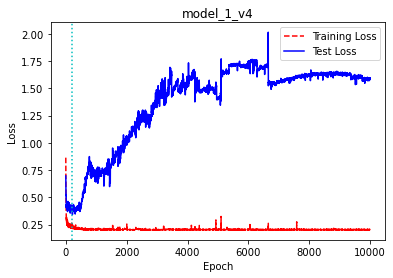

In [44]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.005
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_1_v4'
model_l_v_e_filename = 'loss_vs_epochs_images/model_1_v4_le.png'
model_l_v_e_title = 'model_1_v4'
model_history_filename = 'history/history_model_1_v4'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 10000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [45]:
best_m1_v4 = load_model(model_filename)
evaluate_model(best_m1_v4, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8497

Test accuracy: 85.0%, test loss: 0.342554
